## Install packages needed for our analysis

In [1]:

#install.packages("ggpubr")
#install.packages("devtools")
#devtools::install_github("ropensci/visdat")
# install.packages("Metrics")
#install.packages("caTools")
#install.packages("igraph")
#install.packages("factoextra")



In [2]:
#Ignore warnings globally in R 
options(warn=-1)

## Load packages using the library function

In [3]:
#import all the libraries needed for this analysis, by using the function library(),
#which is like the most common function call in R

library(readr);
library(tidyverse);
library(tidyr);
library(dplyr);
library(hash);
library(skimr);
library(devtools);
library(visdat);
library(lubridate)
library(broom)
library(ggfortify)
library(scales)
library(corrplot)
library(Hmisc)
library(reshape2)
library(ggplot2)
library(zoo)
library(ggpubr)
library(Metrics)
library(caTools)
library(caret)
library(cluster)
library(igraph)
library(randomForest)
library(factoextra)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.1     v purrr     1.0.1
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.1     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
hash-2.2.6.2 provided by Decision Patterns


Loading required package: usethis


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor


corrplot 0.92 loaded


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'reshape2'


The fol

## Get access to all datasets and merge them and Load them for analsysis

This code defines a function called get_access_to_the_files_from_all_directories(). When this function is called, it creates an empty hash table called files. Next, it populates this hash table with file names from five directories using the list.files() function.

The directories are assumed to be located in the relative path dataset_for_assessment and to contain CSV files with the extension ".csv". Each key in the hash table corresponds to a year from 2014 to 2018, and the corresponding value for each key is a list of the file names in that year's directory.

Finally, the function returns the populated hash table files.

Overall, this function is intended to retrieve a list of files from specific directories within a project, 
based on the file extension, and organize them in a hash table for easy access.

In [4]:
get_access_to_the_files_from_all_directories <- function () {
    files <- hash()

    files["2014"] <- list.files("dataset_for_assessment/2014", pattern=".csv")
    files["2015"] <- list.files("dataset_for_assessment/2015", pattern=".csv")
    files["2016"] <- list.files("dataset_for_assessment/2016", pattern=".csv")
    files["2017"] <- list.files("dataset_for_assessment/2017", pattern=".csv")
    files["2018"] <- list.files("dataset_for_assessment/2018", pattern=".csv")
  
    return(files)
}

In [5]:
#This function gives us access to the list of files within the specific directories when its called, 
#which can be useful for further data analysis or processing.

get_access_to_the_files_from_all_directories()

<hash> containing 5 key-value pair(s).
  2014 : principal_offence_category_april_2014.csv     principal_offence_category_august_2014.csv    principal_offence_category_december_2014.csv  principal_offence_category_february_2014.csv  principal_offence_category_january_2014.csv   principal_offence_category_july_2014.csv      principal_offence_category_june_2014.csv      principal_offence_category_march_2014.csv     principal_offence_category_may_2014.csv       principal_offence_category_november_2014.csv  principal_offence_category_october_2014.csv   principal_offence_category_september_2014.csv
  2015 : principal_offence_category_april_2015.csv     principal_offence_category_august_2015.csv    principal_offence_category_december_2015.csv  principal_offence_category_february_2015.csv  principal_offence_category_january_2015.csv   principal_offence_category_july_2015.csv      principal_offence_category_june_2015.csv      principal_offence_category_march_2015.csv     principal_offence_categ

Let's now write a function that merges the csv's together into one csv file. 
The function works by iterating over each year in the hash object and then iterating over each file within each year. For each file, it reads the contents of the file into a data frame using the read.csv function, and then adds the data frame to a list. The do.call(rbind, ...) function is used to combine all the data frames into a single data frame.

In [6]:
#This function is used to merge all the files from all the directories into one single file

merge_files <- function(hash) {
    year <- names(hash)

    combined_cps_data <- do.call(rbind, lapply(year, function(y) {
    do.call(rbind, lapply(hash[[y]], function(f) {
        f_name <- paste("dataset_for_assessment/", y, "/", f, sep="")
            df <- read.csv(f_name, stringsAsFactors = FALSE)
            df$year <- y
            df$month <- tolower(gsub(".csv", "", as.list(strsplit(f, "_")[[1]])[4]))
            df
    }))
  }))
  return(combined_cps_data)
}

Lets call the combined data to explore our merged files

In [7]:
#This function merges all the files from the directories into one dataframe

combined_cps_data <- merge_files(get_access_to_the_files_from_all_directories())

In [8]:
glimpse(combined_cps_data)

Rows: 2,150
Columns: 53
$ X                                                                  <chr> "Na~
$ Number.of.Homicide.Convictions                                     <int> 81,~
$ Percentage.of.Homicide.Convictions                                 <chr> "85~
$ Number.of.Homicide.Unsuccessful                                    <int> 14,~
$ Percentage.of.Homicide.Unsuccessful                                <chr> "14~
$ Number.of.Offences.Against.The.Person.Convictions                  <chr> "7,~
$ Percentage.of.Offences.Against.The.Person.Convictions              <chr> "74~
$ Number.of.Offences.Against.The.Person.Unsuccessful                 <chr> "2,~
$ Percentage.of.Offences.Against.The.Person.Unsuccessful             <chr> "25~
$ Number.of.Sexual.Offences.Convictions                              <chr> "69~
$ Percentage.of.Sexual.Offences.Convictions                          <chr> "72~
$ Number.of.Sexual.Offences.Unsuccessful                             <int> 269~
$ Percentage.of.

## Data Exploration and Cleaning

lets view the first 10 rows from our data

In [9]:
#visualize the first 10 rows of the combined_cps_data
head(combined_cps_data, 10)

X                  Number.of.Homicide.Convictions
1  National           81                            
2  Avon and Somerset   1                            
3  Bedfordshire        0                            
4  Cambridgeshire      0                            
5  Cheshire            1                            
6  Cleveland           0                            
7  Cumbria             0                            
8  Derbyshire          0                            
9  Devon and Cornwall  1                            
10 Dorset              0                            
   Percentage.of.Homicide.Convictions Number.of.Homicide.Unsuccessful
1  85.3%                              14                             
2  100.0%                              0                             
3  -                                   0                             
4  -                                   0                             
5  50.0%                               1                             
6  -                                   0                             
7  -                                   0                             
8  -                                   0                             
9  100.0%                              0                             
10 -                                   0                             
   Percentage.of.Homicide.Unsuccessful
1  14.7%                              
2  0.0%                               
3  -                                  
4  -                                  
5  50.0%                              
6  -                                  
7  -                                  
8  -                                  
9  0.0%                               
10 -                                  
   Number.of.Offences.Against.The.Person.Convictions
1  7,805                                            
2  167                                              
3  69                                               
4  99                                               
5  140                                              
6  85                                               
7  77                                               
8  151                                              
9  157                                              
10 73                                               
   Percentage.of.Offences.Against.The.Person.Convictions
1  74.1%                                                
2  78.8%                                                
3  75.0%                                                
4  81.1%                                                
5  74.9%                                                
6  67.5%                                                
7  80.2%                                                
8  72.6%                                                
9  75.8%                                                
10 82.0%                                                
   Number.of.Offences.Against.The.Person.Unsuccessful
1  2,722                                             
2  45                                                
3  23                                                
4  23                                                
5  47                                                
6  41                                                
7  19                                                
8  57                                                
9  50                                                
10 16                                                
   Percentage.of.Offences.Against.The.Person.Unsuccessful
1  25.9%                                                 
2  21.2%                                                 
3  25.0%                                                 
4  18.9%                                                 
5  25.1%                                                 
6  32.5%                                                 
7  19.8%   

Lets save the merged files into the folder. This is to help us for preprocessing.
This code writes the combined_cps_data data frame to a CSV file named "merged_cps_data.csv" in the "dataset_for_assessment" directory. The write.csv function is used for this purpose, with the data frame as the first argument and the file path as the second argument. The row.names argument is set to FALSE to exclude the row numbers in the output file.

In [10]:
#writing the merged data into a csv file

write.csv(combined_cps_data, "dataset_for_assessment/merged_cps_data.csv", row.names=FALSE)

## import the combine cps data for cleaning and other data pre processing steps

In [11]:
#reading the merged data from the csv file into a dataframe called combined_cps_data

combined_cps_data <- read.csv("dataset_for_assessment/merged_cps_data.csv")

In [12]:
head(combined_cps_data)

X                 Number.of.Homicide.Convictions
1 National          81                            
2 Avon and Somerset  1                            
3 Bedfordshire       0                            
4 Cambridgeshire     0                            
5 Cheshire           1                            
6 Cleveland          0                            
  Percentage.of.Homicide.Convictions Number.of.Homicide.Unsuccessful
1 85.3%                              14                             
2 100.0%                              0                             
3 -                                   0                             
4 -                                   0                             
5 50.0%                               1                             
6 -                                   0                             
  Percentage.of.Homicide.Unsuccessful
1 14.7%                              
2 0.0%                               
3 -                                  
4 -                                  
5 50.0%                              
6 -                                  
  Number.of.Offences.Against.The.Person.Convictions
1 7,805                                            
2 167                                              
3 69                                               
4 99                                               
5 140                                              
6 85                                               
  Percentage.of.Offences.Against.The.Person.Convictions
1 74.1%                                                
2 78.8%                                                
3 75.0%                                                
4 81.1%                                                
5 74.9%                                                
6 67.5%                                                
  Number.of.Offences.Against.The.Person.Unsuccessful
1 2,722                                             
2 45                                                
3 23                                                
4 23                                                
5 47                                                
6 41                                                
  Percentage.of.Offences.Against.The.Person.Unsuccessful
1 25.9%                                                 
2 21.2%                                                 
3 25.0%                                                 
4 18.9%                                                 
5 25.1%                                                 
6 32.5%                                                 
  Number.of.Sexual.Offences.Convictions ...
1 698                                   ...
2 36                                    ...
3 5                                     ...
4 6                                     ...
5 17                                    ...
6 11                                    ...
  Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful
1 513                                                           
2  16                                                           
3   6                                                           
4   2                                                           
5   6                                                           
6   5                                                           
  Percentage.of.All.Other.Offences..excluding.Motoring..Unsuccessful
1 16.3%                                                             
2 19.5%                                                             
3 35.3%                                                             
4 25.0%                                                             
5 10.7%                                                             
6 15.2%                                                             
  Number.of.Motoring.Offences.Convictions
1 8,283                                  
2 188                                   

There are so many missing datas, columns to rename, data types to change, columns to drop, and so on. So this should be fun.

In [13]:
#This shows the total number of rows and columns in our combined cps data

dim(combined_cps_data)

[1] 2150   53

In [14]:
#To interact with the table values even more, you can use the View() function

#View(combined_cps_data)

We then run the summary function to show each column, it’s data type and a few other
attributes which are especially useful for numeric attributes. Analyse the dataset with number of rows and columns (attributes). Analysing individual attributes helps to understand the data overview. We can see that for all the numeric attributes, it also displays min, 1st quartile, median, mean, 3rd quartile and max values. 

In [15]:
summary(combined_cps_data)

      X             Number.of.Homicide.Convictions
 Length:2150        Min.   :  0.000               
 Class :character   1st Qu.:  0.000               
 Mode  :character   Median :  1.000               
                    Mean   :  3.769               
                    3rd Qu.:  3.000               
                    Max.   :131.000               
 Percentage.of.Homicide.Convictions Number.of.Homicide.Unsuccessful
 Length:2150                        Min.   : 0.0000                
 Class :character                   1st Qu.: 0.0000                
 Mode  :character                   Median : 0.0000                
                                    Mean   : 0.9023                
                                    3rd Qu.: 1.0000                
                                    Max.   :35.0000                
 Percentage.of.Homicide.Unsuccessful
 Length:2150                        
 Class :character                   
 Mode  :character                   
                   

In [16]:
#Displays the type and a preview of all columns as a row using glimpse from “dplyr” library

glimpse(combined_cps_data)

Rows: 2,150
Columns: 53
$ X                                                                  <chr> "Na~
$ Number.of.Homicide.Convictions                                     <int> 81,~
$ Percentage.of.Homicide.Convictions                                 <chr> "85~
$ Number.of.Homicide.Unsuccessful                                    <int> 14,~
$ Percentage.of.Homicide.Unsuccessful                                <chr> "14~
$ Number.of.Offences.Against.The.Person.Convictions                  <chr> "7,~
$ Percentage.of.Offences.Against.The.Person.Convictions              <chr> "74~
$ Number.of.Offences.Against.The.Person.Unsuccessful                 <chr> "2,~
$ Percentage.of.Offences.Against.The.Person.Unsuccessful             <chr> "25~
$ Number.of.Sexual.Offences.Convictions                              <chr> "69~
$ Percentage.of.Sexual.Offences.Convictions                          <chr> "72~
$ Number.of.Sexual.Offences.Unsuccessful                             <int> 269~
$ Percentage.of.

Next we run the skim function from the skimr package. The skim function is a good addition
to the summary function. It displays most of the numerical attributes from summary, but it
also displays missing values, more quantile information and an inline histogram for each
variable!

In [17]:
#skim(combined_cps_data)

The Vis_dat() function is a great way to visualize the data type and missing data within a data
frame. 

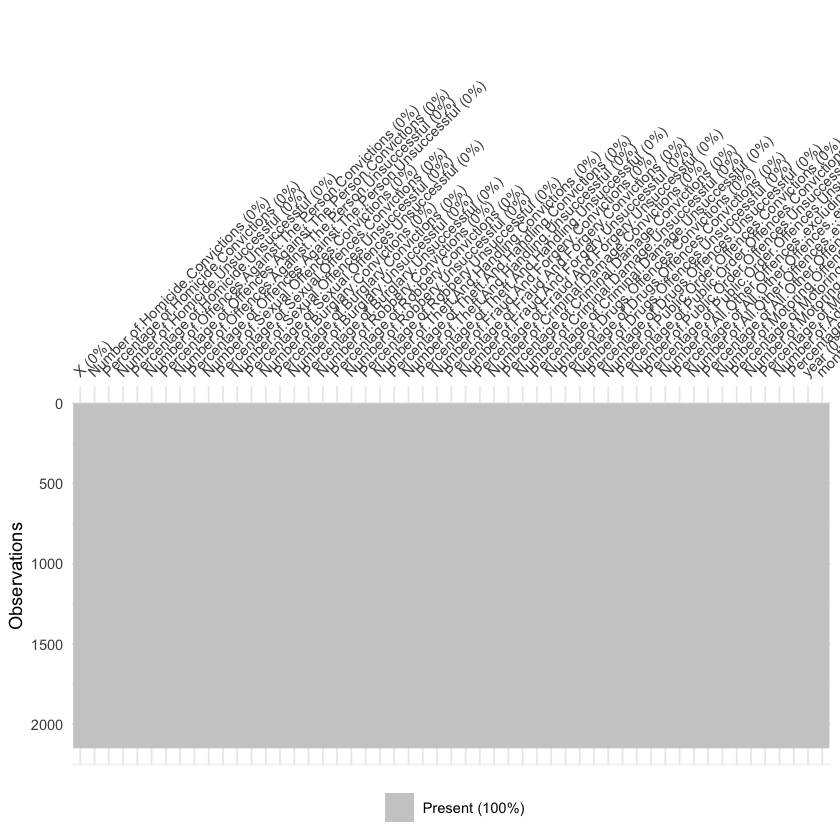

In [18]:
vis_miss(combined_cps_data)

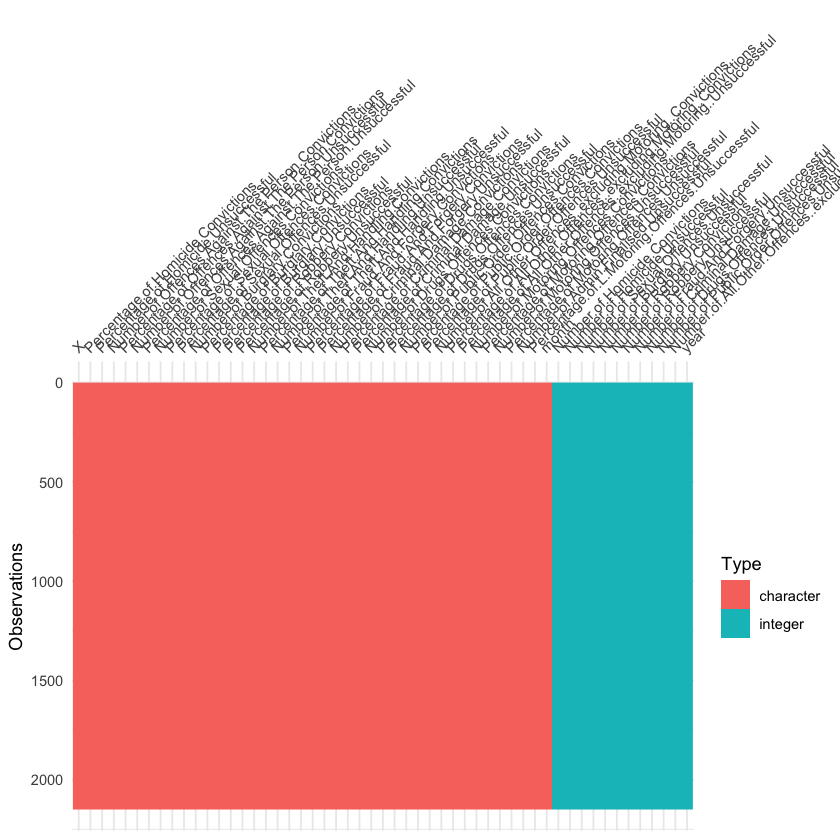

In [19]:
vis_dat(combined_cps_data)

Sometimes, the data that is received may have certain columns that contain irrelevant or incorrect information, which could lead to errors in our analysis and also making it difficult to work with or to visualize.  One of this is the percentage column in our data. This has to be dropped in order to work with neccessary variables in our dataset.


In order to drop the percentage column, there are different functions and method we could use, but the most common are
"grep() and contains()", but in the case of this project, I will be using the grep method because of it Speed and performance on our large data frame with many columns, but will make the code as readable as possible.

In [20]:
#This function is used to drop the percentage columns from the dataframe, because we are not going to use them for our analysis
drop_percentage_columns <- function(df) {
  column_names <- colnames(df)
  to_drop <- grep("Percentage", column_names, value = TRUE)
  df <- df[, !(column_names %in% to_drop)]
  return(df)
}

In [21]:
#This call the function drop_percentage_columns to drop the percentage columns from the dataframe and its stored in the variable combined_cps_data
combined_cps_data = drop_percentage_columns(combined_cps_data)

In [22]:
head(combined_cps_data, 4)

X                 Number.of.Homicide.Convictions
1 National          81                            
2 Avon and Somerset  1                            
3 Bedfordshire       0                            
4 Cambridgeshire     0                            
  Number.of.Homicide.Unsuccessful
1 14                             
2  0                             
3  0                             
4  0                             
  Number.of.Offences.Against.The.Person.Convictions
1 7,805                                            
2 167                                              
3 69                                               
4 99                                               
  Number.of.Offences.Against.The.Person.Unsuccessful
1 2,722                                             
2 45                                                
3 23                                                
4 23                                                
  Number.of.Sexual.Offences.Convictions Number.of.Sexual.Offences.Unsuccessful
1 698                                   269                                   
2 36                                      8                                   
3 5                                       1                                   
4 6                                       3                                   
  Number.of.Burglary.Convictions Number.of.Burglary.Unsuccessful
1 1,470                          226                            
2 37                               2                            
3 16                               1                            
4 8                                0                            
  Number.of.Robbery.Convictions ... Number.of.Drugs.Offences.Unsuccessful
1 517                           ... 279                                  
2   9                           ...   2                                  
3   4                           ...   2                                  
4   6                           ...   2                                  
  Number.of.Public.Order.Offences.Convictions
1 3,549                                      
2 68                                         
3 29                                         
4 45                                         
  Number.of.Public.Order.Offences.Unsuccessful
1 654                                         
2  11                                         
3   6                                         
4   9                                         
  Number.of.All.Other.Offences..excluding.Motoring..Convictions
1 2,640                                                        
2 66                                                           
3 11                                                           
4 6                                                            
  Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful
1 513                                                           
2  16                                                           
3   6                                                           
4   2                                                           
  Number.of.Motoring.Offences.Convictions
1 8,283                                  
2 188                                    
3 40                                     
4 79                                     
  Number.of.Motoring.Offences.Unsuccessful
1 1,314                                   
2 37                                      
3 5                                       
4 6                                       
  Number.of.Admin.Finalised.Unsuccessful year month
1 718                                    2014 april
2 24                                     2014 april
3 16                                     2014 april
4 4                                      2014 april

In [23]:
#Let's explore the structure of our dataframe again to check if the manipulations has been made.
#We should see that the numbers of columns has been reduced from 51 to 26 because we removed the columns with
#percentage mentioned. 

glimpse(combined_cps_data)

Rows: 2,150
Columns: 28
$ X                                                              <chr> "Nation~
$ Number.of.Homicide.Convictions                                 <int> 81, 1, ~
$ Number.of.Homicide.Unsuccessful                                <int> 14, 0, ~
$ Number.of.Offences.Against.The.Person.Convictions              <chr> "7,805"~
$ Number.of.Offences.Against.The.Person.Unsuccessful             <chr> "2,722"~
$ Number.of.Sexual.Offences.Convictions                          <chr> "698", ~
$ Number.of.Sexual.Offences.Unsuccessful                         <int> 269, 8,~
$ Number.of.Burglary.Convictions                                 <chr> "1,470"~
$ Number.of.Burglary.Unsuccessful                                <int> 226, 2,~
$ Number.of.Robbery.Convictions                                  <int> 517, 9,~
$ Number.of.Robbery.Unsuccessful                                 <int> 116, 3,~
$ Number.of.Theft.And.Handling.Convictions                       <chr> "10,045~
$ Number.of.Thef

Since our dataset involves date, year & months, we need to introduce/add a new column, then sort it. This process also
rearanges our dataframe.

In [24]:
head(combined_cps_data)

X                 Number.of.Homicide.Convictions
1 National          81                            
2 Avon and Somerset  1                            
3 Bedfordshire       0                            
4 Cambridgeshire     0                            
5 Cheshire           1                            
6 Cleveland          0                            
  Number.of.Homicide.Unsuccessful
1 14                             
2  0                             
3  0                             
4  0                             
5  1                             
6  0                             
  Number.of.Offences.Against.The.Person.Convictions
1 7,805                                            
2 167                                              
3 69                                               
4 99                                               
5 140                                              
6 85                                               
  Number.of.Offences.Against.The.Person.Unsuccessful
1 2,722                                             
2 45                                                
3 23                                                
4 23                                                
5 47                                                
6 41                                                
  Number.of.Sexual.Offences.Convictions Number.of.Sexual.Offences.Unsuccessful
1 698                                   269                                   
2 36                                      8                                   
3 5                                       1                                   
4 6                                       3                                   
5 17                                      3                                   
6 11                                      4                                   
  Number.of.Burglary.Convictions Number.of.Burglary.Unsuccessful
1 1,470                          226                            
2 37                               2                            
3 16                               1                            
4 8                                0                            
5 26                               3                            
6 25                              10                            
  Number.of.Robbery.Convictions ... Number.of.Drugs.Offences.Unsuccessful
1 517                           ... 279                                  
2   9                           ...   2                                  
3   4                           ...   2                                  
4   6                           ...   2                                  
5   1                           ...  10                                  
6   5                           ...   7                                  
  Number.of.Public.Order.Offences.Convictions
1 3,549                                      
2 68                                         
3 29                                         
4 45                                         
5 86                                         
6 74                                         
  Number.of.Public.Order.Offences.Unsuccessful
1 654                                         
2  11                                         
3   6                                         
4   9                                         
5   7                                         
6  27                                         
  Number.of.All.Other.Offences..excluding.Motoring..Convictions
1 2,640                                                        
2 66                                                           
3 11                                                           
4 6                                                            
5 50                                                           
6 28                                                           
  Number.of.All.Other.Offences..excluding.Motor

In [25]:
#Add a new column to the dataframe called yearandmonth, which is a combination of the year and month columns, then sort the dataframe by the new column
add_and_sort_by_yearandmonth <- function(df) {
  # Create a new column with year and month information
  df$yearandmonth <- format(as.Date(paste(df$year, df$month, "01", sep = "-"), "%Y-%b-%d"), "%Y-%m")
  
  # Sort the dataframe by the new column
  df <- df[order(df$yearandmonth), ]
  
  return(df)
}

In [26]:
#call the function add_and_sort_by_yearandmonth to add a new column to the dataframe called yearandmonth, saved in the variable combined_cps_data
combined_cps_data <- add_and_sort_by_yearandmonth(combined_cps_data)

In [27]:
head(combined_cps_data)

X                 Number.of.Homicide.Convictions
173 National          51                            
174 Avon and Somerset  0                            
175 Bedfordshire       0                            
176 Cambridgeshire     0                            
177 Cheshire           0                            
178 Cleveland          2                            
    Number.of.Homicide.Unsuccessful
173 11                             
174  0                             
175  1                             
176  0                             
177  0                             
178  3                             
    Number.of.Offences.Against.The.Person.Convictions
173 9,087                                            
174 228                                              
175 68                                               
176 101                                              
177 170                                              
178 119                                              
    Number.of.Offences.Against.The.Person.Unsuccessful
173 2,930                                             
174 62                                                
175 29                                                
176 21                                                
177 40                                                
178 44                                                
    Number.of.Sexual.Offences.Convictions
173 736                                  
174 35                                   
175 2                                    
176 10                                   
177 15                                   
178 11                                   
    Number.of.Sexual.Offences.Unsuccessful Number.of.Burglary.Convictions
173 286                                    1,715                         
174  17                                    49                            
175   1                                    7                             
176   3                                    18                            
177   1                                    38                            
178   6                                    36                            
    Number.of.Burglary.Unsuccessful Number.of.Robbery.Convictions ...
173 284                             522                           ...
174   1                               8                           ...
175   4                              16                           ...
176   4                               6                           ...
177   5                              10                           ...
178   2                               3                           ...
    Number.of.Public.Order.Offences.Convictions
173 4,752                                      
174 123                                        
175 30                                         
176 37                                         
177 77                                         
178 123                                        
    Number.of.Public.Order.Offences.Unsuccessful
173 797                                         
174  28                                         
175   9                                         
176   2                                         
177   8                                         
178  27                                         
    Number.of.All.Other.Offences..excluding.Motoring..Convictions
173 3,291                                                        
174 63                                                           
175 13                                                           
176 28                                                           
177 50                                                           
178 34                                                           
    Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful
173 586                                                           
174   9                                  

In [28]:
#We need to change the name of the column displaying the counties from "X" to "County". This helps us to have a clear
#and meaningful dataframe

names(combined_cps_data)[1] <- "County"

In [29]:
head(combined_cps_data)

County            Number.of.Homicide.Convictions
173 National          51                            
174 Avon and Somerset  0                            
175 Bedfordshire       0                            
176 Cambridgeshire     0                            
177 Cheshire           0                            
178 Cleveland          2                            
    Number.of.Homicide.Unsuccessful
173 11                             
174  0                             
175  1                             
176  0                             
177  0                             
178  3                             
    Number.of.Offences.Against.The.Person.Convictions
173 9,087                                            
174 228                                              
175 68                                               
176 101                                              
177 170                                              
178 119                                              
    Number.of.Offences.Against.The.Person.Unsuccessful
173 2,930                                             
174 62                                                
175 29                                                
176 21                                                
177 40                                                
178 44                                                
    Number.of.Sexual.Offences.Convictions
173 736                                  
174 35                                   
175 2                                    
176 10                                   
177 15                                   
178 11                                   
    Number.of.Sexual.Offences.Unsuccessful Number.of.Burglary.Convictions
173 286                                    1,715                         
174  17                                    49                            
175   1                                    7                             
176   3                                    18                            
177   1                                    38                            
178   6                                    36                            
    Number.of.Burglary.Unsuccessful Number.of.Robbery.Convictions ...
173 284                             522                           ...
174   1                               8                           ...
175   4                              16                           ...
176   4                               6                           ...
177   5                              10                           ...
178   2                               3                           ...
    Number.of.Public.Order.Offences.Convictions
173 4,752                                      
174 123                                        
175 30                                         
176 37                                         
177 77                                         
178 123                                        
    Number.of.Public.Order.Offences.Unsuccessful
173 797                                         
174  28                                         
175   9                                         
176   2                                         
177   8                                         
178  27                                         
    Number.of.All.Other.Offences..excluding.Motoring..Convictions
173 3,291                                                        
174 63                                                           
175 13                                                           
176 28                                                           
177 50                                                           
178 34                                                           
    Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful
173 586                                                           
174   9                                  

### Check for missing values

Let's check if we have any missing values in our data.Checking for missing values in datasets is important 
because missing data can have a significant impact on statistical analyses and machine learning models.
If missing values are not properly handled, they can cause biases in statistical analyses, reduce the accuracy 
of machine learning models, and potentially lead to incorrect conclusions.

In [30]:
sum(is.na(combined_cps_data))

[1] 0

### Re-arrange our Dataframe

The next thing to do is to rearrange the columns in our datasets, as this is useful for a variety of reasons. It makes our presentation more logical or intuitive order, to group variables for analysis, and simplify data manipulation. One of the most important column is the date. 

In [31]:
#I keep getting empty dataset error, so I had to check with the code below to see if something has happened to
#my dataset, fortunately, I had just rerun all my cells, and everything came back to normal.

#This code stores the value of ncol(combined_cps_data) in a variable called ncols, and then prints it to the console. 
#This can help you identify if the value is correct or not.

ncols <- ncol(combined_cps_data)
print(ncols)
df <- combined_cps_data[, c(1, (ncols-2):ncols, 2:(ncols-3))]

[1] 29


In [32]:
#rearrange the columns in the dataframe. This is done to make the dataframe more meaningful and easy to understand

rearrange_cols <- function(df) {
  ncols <- ncol(df)
  df_new <- df[, c(1, (ncols-2):ncols, 2:(ncols-3))]
  return(df_new)
}

In [33]:
combined_cps_data <- rearrange_cols(combined_cps_data)

This code defines a function called rearrange_cols() that takes a dataframe (df) as an input, rearranges its columns, and returns a new dataframe (df_new). The columns are rearranged such that the first column remains in its position, followed by the last three columns in the original dataframe, and then the remaining columns in their original order except the last three.

The function achieves this by first calculating the number of columns in the input dataframe using the ncol() function, and then selecting the columns using the column indices in a specific order. The c() function is used to concatenate a sequence of column indices to form the desired order.

The line combined_cps_data <- rearrange_cols(combined_cps_data) applies the rearrange_cols() function to the combined_cps_data dataframe and assigns the result to combined_cps_data. This effectively rearranges the columns of the original combined_cps_data dataframe.

### Remove special character

In [34]:
#To check the updated dataset

head(combined_cps_data)

County            year month   yearandmonth Number.of.Homicide.Convictions
173 National          2014 january 2014-01      51                            
174 Avon and Somerset 2014 january 2014-01       0                            
175 Bedfordshire      2014 january 2014-01       0                            
176 Cambridgeshire    2014 january 2014-01       0                            
177 Cheshire          2014 january 2014-01       0                            
178 Cleveland         2014 january 2014-01       2                            
    Number.of.Homicide.Unsuccessful
173 11                             
174  0                             
175  1                             
176  0                             
177  0                             
178  3                             
    Number.of.Offences.Against.The.Person.Convictions
173 9,087                                            
174 228                                              
175 68                                               
176 101                                              
177 170                                              
178 119                                              
    Number.of.Offences.Against.The.Person.Unsuccessful
173 2,930                                             
174 62                                                
175 29                                                
176 21                                                
177 40                                                
178 44                                                
    Number.of.Sexual.Offences.Convictions
173 736                                  
174 35                                   
175 2                                    
176 10                                   
177 15                                   
178 11                                   
    Number.of.Sexual.Offences.Unsuccessful ...
173 286                                    ...
174  17                                    ...
175   1                                    ...
176   3                                    ...
177   1                                    ...
178   6                                    ...
    Number.of.Criminal.Damage.Unsuccessful Number.of.Drugs.Offences.Convictions
173 472                                    4,988                               
174  14                                    148                                 
175   8                                    31                                  
176   3                                    47                                  
177   3                                    64                                  
178  13                                    65                                  
    Number.of.Drugs.Offences.Unsuccessful
173 305                                  
174   4                                  
175   3                                  
176   1                                  
177   3                                  
178   2                                  
    Number.of.Public.Order.Offences.Convictions
173 4,752                                      
174 123                                        
175 30                                         
176 37                                         
177 77                                         
178 123                                        
    Number.of.Public.Order.Offences.Unsuccessful
173 797                                         
174  28                                         
175   9                                         
176   2                                         
177   8                                         
178  27                                         
    Number.of.All.Other.Offences..excluding.Motoring..Convictions
173 3,291                                                        
174 63                                                           
175 13                                                           
176 28          

There are some irregularities in the columns name, we need to rename them to somethng shorter, as it can help ensure that data is easier to work with, less error-prone, and more understandable. There are lot of "Number.of." in our dataset which can cause problem for analysis later.

The code is defining a function called rename_col which takes a dataframe (df) as its argument. The function does the following:

It uses the gsub() function to replace the substring "Number.of." in the column names of the dataframe with an empty string "". This effectively removes the "Number.of." substring from the column names.
It uses gsub() again to replace any periods (.) in the column names with underscores (_). This is a common practice to make column names more readable and easier to work with.
It uses the tolower() function to convert all the column names to lowercase letters. This is also done for consistency and ease of use.
Finally, it returns the modified dataframe with the new column names.

I had an error here, " Error: '\.' is an unrecognized escape in character string starting ""\."
Traceback:"


I did my research, the error message is indicating that the escape character (\) before the "." in the second line of the code is not recognized. In regular expressions, "." is a special character that matches any single character. To match a literal "." character, you need to escape it with a backslash. However, in R, backslashes are also used as escape characters in character strings. Therefore, to include a literal backslash in a character string, you need to escape it with another backslash.

To fix the error, you can escape the backslash in the regular expression by adding another backslash before it. So I had to rewrite my function like this:

Overall, this function is useful for cleaning up messy column names in a data frame and standardizing them in a consistent, easy-to-read format.

In [35]:
#This function is used to rename the columns in the dataframe, and remove some characters that are not needed
rename_cols <- function(df){
  colnames(df) <- gsub("Number\\.of\\.", "", colnames(df))
  colnames(df) <- gsub("\\.", "_", colnames(df))
  colnames(df) <- tolower(colnames(df))
  return(df)
}

In [278]:
#call the function rename_cols to rename the columns in the dataframe, and remove some characters that are not needed
combined_cps_data <- rename_cols(combined_cps_data)

In [37]:
head(combined_cps_data)

county            year month   yearandmonth homicide_convictions
173 National          2014 january 2014-01      51                  
174 Avon and Somerset 2014 january 2014-01       0                  
175 Bedfordshire      2014 january 2014-01       0                  
176 Cambridgeshire    2014 january 2014-01       0                  
177 Cheshire          2014 january 2014-01       0                  
178 Cleveland         2014 january 2014-01       2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9,087                                  
174  0                    228                                    
175  1                    68                                     
176  0                    101                                    
177  0                    170                                    
178  3                    119                                    
    offences_against_the_person_unsuccessful sexual_offences_convictions
173 2,930                                    736                        
174 62                                       35                         
175 29                                       2                          
176 21                                       10                         
177 40                                       15                         
178 44                                       11                         
    sexual_offences_unsuccessful ... criminal_damage_unsuccessful
173 286                          ... 472                         
174  17                          ...  14                         
175   1                          ...   8                         
176   3                          ...   3                         
177   1                          ...   3                         
178   6                          ...  13                         
    drugs_offences_convictions drugs_offences_unsuccessful
173 4,988                      305                        
174 148                          4                        
175 31                           3                        
176 47                           1                        
177 64                           3                        
178 65                           2                        
    public_order_offences_convictions public_order_offences_unsuccessful
173 4,752                             797                               
174 123                                28                               
175 30                                  9                               
176 37                                  2                               
177 77                                  8                               
178 123                                27                               
    all_other_offences__excluding_motoring__convictions
173 3,291                                              
174 63                                                 
175 13                                                 
176 28                                                 
177 50                                                 
178 34                                                 
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12,945                        1,466                         
174 256                           40                            
175 171                           13                            
176 103                           16                            
177 264                           16          

In [38]:
#There are unneccessary commas between the numbers in our dataset making them appear as "character" instead of being
#an Integer. I had to remove them and convert these columns to integer.

rem_special_charandconv_tointerger <- function(df){
  df <- df %>% 
    mutate_all(list(~ gsub(",", "", .)))
  df[,5:ncol(df)] <- sapply(df[,5:ncol(df)], as.integer)
  return(df)
}

In [39]:
combined_cps_data <- rem_special_charandconv_tointerger(combined_cps_data)

In [40]:
head(combined_cps_data)

county            year month   yearandmonth homicide_convictions
173 National          2014 january 2014-01      51                  
174 Avon and Somerset 2014 january 2014-01       0                  
175 Bedfordshire      2014 january 2014-01       0                  
176 Cambridgeshire    2014 january 2014-01       0                  
177 Cheshire          2014 january 2014-01       0                  
178 Cleveland         2014 january 2014-01       2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9087                                   
174  0                     228                                   
175  1                      68                                   
176  0                     101                                   
177  0                     170                                   
178  3                     119                                   
    offences_against_the_person_unsuccessful sexual_offences_convictions
173 2930                                     736                        
174   62                                      35                        
175   29                                       2                        
176   21                                      10                        
177   40                                      15                        
178   44                                      11                        
    sexual_offences_unsuccessful ... criminal_damage_unsuccessful
173 286                          ... 472                         
174  17                          ...  14                         
175   1                          ...   8                         
176   3                          ...   3                         
177   1                          ...   3                         
178   6                          ...  13                         
    drugs_offences_convictions drugs_offences_unsuccessful
173 4988                       305                        
174  148                         4                        
175   31                         3                        
176   47                         1                        
177   64                         3                        
178   65                         2                        
    public_order_offences_convictions public_order_offences_unsuccessful
173 4752                              797                               
174  123                               28                               
175   30                                9                               
176   37                                2                               
177   77                                8                               
178  123                               27                               
    all_other_offences__excluding_motoring__convictions
173 3291                                               
174   63                                               
175   13                                               
176   28                                               
177   50                                               
178   34                                               
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12945                         1466                          
174   256                           40                          
175   171                           13                          
176   103                           16                          
177   264                           16        

The above code defines a function rem_special_charandconv_tointerger that takes a dataframe df as its input. The function first uses the %>% operator from the dplyr package to apply the mutate_all function to all columns of the dataframe. The mutate_all function is used to apply the same function to all columns of a dataframe. In this case, it applies the gsub function with the regular expression "," and an empty string "" to remove all commas in the column values.

Next, the function uses sapply to apply the as.integer function to all columns from the 5th column to the last column of the dataframe. This converts the character columns that have numbers to integer columns.

Finally, the function returns the modified dataframe df.

The function is then applied to the combined_cps_data dataframe using the rem_special_charandconv_tointerger function, and the resulting dataframe is printed using the head function.

In [41]:
#Now, I need to check the uniqueness of the months. This is done in order to remove noise around our dataset and also
#to make our data remain consistent and easy for further analysis.


check_unique_months <- unique(combined_cps_data$month)

In [42]:
check_unique_months

[1] "january"   "february"  "march"     "april"     "may"       "june"     
 [7] "july"      "august"    "september" "october"   "november"  "december" 
[13] "jul"       "aug"       "sep"       "oct"       "nov"       "dec"      
[19] "jan"       "feb"       "mar"

In [43]:
#As it is viewed from above code execution, there so many inconsistencies. So I will write a function that edit or
#change this months into a shortened form.

In [44]:
#This function is used to shorten the month names in the dataframe. This helps our code to be more consistent, and follow guildlines.

shorten_month_names <- function(df, month) {
  df[[month]] <- gsub("january", "jan", df[[month]])
  df[[month]] <- gsub("february", "feb", df[[month]])
  df[[month]] <- gsub("march", "mar", df[[month]])
  df[[month]] <- gsub("april", "apr", df[[month]])
  df[[month]] <- gsub("may", "may", df[[month]])  # no change needed
  df[[month]] <- gsub("june", "jun", df[[month]])
  df[[month]] <- gsub("july", "jul", df[[month]])
  df[[month]] <- gsub("august", "aug", df[[month]])
  df[[month]] <- gsub("september", "sep", df[[month]])
  df[[month]] <- gsub("october", "oct", df[[month]])
  df[[month]] <- gsub("november", "nov", df[[month]])
  df[[month]] <- gsub("december", "dec", df[[month]])
  return(df)
}

In [45]:
combined_cps_data <- shorten_month_names(combined_cps_data, "month")

In [46]:
head(combined_cps_data)

county            year month yearandmonth homicide_convictions
173 National          2014 jan   2014-01      51                  
174 Avon and Somerset 2014 jan   2014-01       0                  
175 Bedfordshire      2014 jan   2014-01       0                  
176 Cambridgeshire    2014 jan   2014-01       0                  
177 Cheshire          2014 jan   2014-01       0                  
178 Cleveland         2014 jan   2014-01       2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9087                                   
174  0                     228                                   
175  1                      68                                   
176  0                     101                                   
177  0                     170                                   
178  3                     119                                   
    offences_against_the_person_unsuccessful sexual_offences_convictions
173 2930                                     736                        
174   62                                      35                        
175   29                                       2                        
176   21                                      10                        
177   40                                      15                        
178   44                                      11                        
    sexual_offences_unsuccessful ... criminal_damage_unsuccessful
173 286                          ... 472                         
174  17                          ...  14                         
175   1                          ...   8                         
176   3                          ...   3                         
177   1                          ...   3                         
178   6                          ...  13                         
    drugs_offences_convictions drugs_offences_unsuccessful
173 4988                       305                        
174  148                         4                        
175   31                         3                        
176   47                         1                        
177   64                         3                        
178   65                         2                        
    public_order_offences_convictions public_order_offences_unsuccessful
173 4752                              797                               
174  123                               28                               
175   30                                9                               
176   37                                2                               
177   77                                8                               
178  123                               27                               
    all_other_offences__excluding_motoring__convictions
173 3291                                               
174   63                                               
175   13                                               
176   28                                               
177   50                                               
178   34                                               
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12945                         1466                          
174   256                           40                          
175   171                           13                          
176   103                           16                          
177   264                           16                      

This code defines a function called shorten_month_names that takes two arguments: df, which is a data frame, and month, which is the name of the column in the data frame that contains the month names that need to be shortened.

The function then applies the gsub function (which stands for "global substitution") to each row of the specified month column of the data frame. It replaces the full name of each month with its corresponding shortened abbreviation. For example, it replaces "january" with "jan", "february" with "feb", etc.

Finally, the function returns the modified data frame.

I later called the function with the dataframe as input
combined_cps_data <- shorten_month_names(combined_cps_data, "month")

-------------------------------------------------------------------------------------------------------------------
Using this, there are some months missing in the year columns, I had to find them out as part of the cleaning process.

combined_cps_data$month

In [47]:
#Get the missing months in the dataset. This is done to check if there are any missing months in the dataset.

get_missing_months <- function(df){
  years <- unique(df$year)
  missing_months <- list()

  for (year in years){
    months <- unique(df[df$year == year, "month"])
    all_months <- c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")
    diff <- setdiff(all_months, months)
    missing_months[[as.character(year)]] <- diff
  }

  return(missing_months)
}


In [48]:
get_missing_months(combined_cps_data)

$`2014`
character(0)

$`2015`
[1] "nov"

$`2016`
[1] "feb" "mar"

$`2017`
[1] "apr" "may" "jun"

$`2018`
[1] "apr" "may" "jun" "nov"

There are missing months in the datasets, but I would leave it for now because the dataset from the CPS website does not include these. Filling these missing months might be a case of inventing data or create over fitting for the model when doing linear regression.

In [49]:
# Check the size of your dataset
dataset_size <- dim(combined_cps_data)
num_rows <- dataset_size[1]
num_cols <- dataset_size[2]

# Print the number of rows and columns
cat("Number of rows:", num_rows, "\n")
cat("Number of columns:", num_cols, "\n")

Number of rows: 2150 
Number of columns: 29 


In [50]:
#We need to check the uniqueness of the counties in our dataset. This is done in order to remove noise around 
#our dataset and also create a new columns categorising the counties into either West, East, North, or West.

length(unique(combined_cps_data$county))

[1] 43

#### Categorizing the `Counties to Regions`

In [51]:
#This function is used to categorise the counties into either West, East, North, or West. 
#This is done to help with analysis. For example, we can compare the crime rate in the West to the crime rate in the East.

countyintoregion <- list(
  "National" = "All",
  "Avon and Somerset" = "West",
  "Bedfordshire" = "East",
  "Cambridgeshire" = "East",
  "Cheshire" = "North",
  "Cleveland" = "North",
  "Cumbria" = "North",
  "Derbyshire" = "East",
  "Devon and Cornwall" = "West",
  "Dorset" = "West",
  "Durham" = "North",
  "Dyfed Powys" = "West",
  "Essex" = "East",
  "Gloucestershire" = "West",
  "GreaterManchester" = "North",
  "Gwent" = "West",
  "Hampshire" = "South",
  "Hertfordshire" = "East",
  "Humberside" = "North",
  "Kent" = "South",
  "Lancashire" = "North",
  "Leicestershire" = "East",
  "Lincolnshire" = "East",
  "Merseyside" = "North",
  "Metropolitan and City" = "South",
  "Norfolk" = "East",
  "Northamptonshire" = "East",
  "Northumbria" = "North",
  "North Wales" = "North",
  "North Yorkshire" = "Nortth",
  "North Yorkshire" = "North",
  "Nottinghamshire" = "East",
  "South Wales" = "West",
  "South Yorkshire" = "North",
  "Staffordshire" = "West",
  "Suffolk" = "East",
  "Surrey" = "South",
  "Sussex" = "South",
  "Thames Valley" = "South",
  "Warwickshire" = "West",
  "West Mercia" = "West",
  "West Midlands" = "West",
  "West Yorkshire" = "North",
  "Wiltshire" = "West"
)

In [52]:
#check the number of countyintoregion list to see if it is the same as the number of counties in our dataset.

print(length(countyintoregion))

[1] 44


In [53]:
# Create a new column called "region" that maps each county to its region

combined_cps_data$region <- countyintoregion[combined_cps_data$county]

In [54]:
#convert the month and year columns to character.

combined_cps_data$month <- as.character(combined_cps_data$month)

combined_cps_data$year <- as.character(combined_cps_data$year)

In [55]:
#convert the region column to a character type, Why? because it is a factor type, and we need to convert it to a character type in order to use it in the next step.

combined_cps_data$region <- as.character(combined_cps_data$region)

In [56]:
head(combined_cps_data)

county            year month yearandmonth homicide_convictions
173 National          2014 jan   2014-01      51                  
174 Avon and Somerset 2014 jan   2014-01       0                  
175 Bedfordshire      2014 jan   2014-01       0                  
176 Cambridgeshire    2014 jan   2014-01       0                  
177 Cheshire          2014 jan   2014-01       0                  
178 Cleveland         2014 jan   2014-01       2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9087                                   
174  0                     228                                   
175  1                      68                                   
176  0                     101                                   
177  0                     170                                   
178  3                     119                                   
    offences_against_the_person_unsuccessful sexual_offences_convictions
173 2930                                     736                        
174   62                                      35                        
175   29                                       2                        
176   21                                      10                        
177   40                                      15                        
178   44                                      11                        
    sexual_offences_unsuccessful ... drugs_offences_convictions
173 286                          ... 4988                      
174  17                          ...  148                      
175   1                          ...   31                      
176   3                          ...   47                      
177   1                          ...   64                      
178   6                          ...   65                      
    drugs_offences_unsuccessful public_order_offences_convictions
173 305                         4752                             
174   4                          123                             
175   3                           30                             
176   1                           37                             
177   3                           77                             
178   2                          123                             
    public_order_offences_unsuccessful
173 797                               
174  28                               
175   9                               
176   2                               
177   8                               
178  27                               
    all_other_offences__excluding_motoring__convictions
173 3291                                               
174   63                                               
175   13                                               
176   28                                               
177   50                                               
178   34                                               
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12945                         1466                          
174   256                           40                          
175   171                           13                          
176   103                           16                          
177   264                           16                          
178   228                           16                          
    admin_finalised_unsuccessful region
173 890                          All   
174  20                          West  
175  12      

In [57]:
#get the length of columns in our dataset

length(combined_cps_data)

[1] 30

In [58]:
#This is a function that move the region column from the last column to the second column. 
#We need to do this because we want our code to be readable and well arranged

move_column_to_second <- function(dataframe) {
  # Get the number of columns in the dataframe
  num_columns <- ncol(dataframe)
  
  # Check if there are at least 2 columns in the dataframe
  if (num_columns >= 2) {
    # Get the column to be moved (last column)
    region <- dataframe[, num_columns]
    
    # Move the column to the fourth position
    dataframe <- dataframe[, -num_columns]
    dataframe <- cbind(dataframe[, 1:1], region, dataframe[, 2:(num_columns-1)])
  } else {
    # Display an error message if there are less than 2 columns
    stop("The dataframe must have at least 2 columns.")
  }
  
  return(dataframe)
}

In [59]:
combined_cps_data <- move_column_to_second(combined_cps_data)

In [60]:
head(combined_cps_data)

dataframe[, 1:1]  region year month yearandmonth homicide_convictions
173 National          All    2014 jan   2014-01      51                  
174 Avon and Somerset West   2014 jan   2014-01       0                  
175 Bedfordshire      East   2014 jan   2014-01       0                  
176 Cambridgeshire    East   2014 jan   2014-01       0                  
177 Cheshire          North  2014 jan   2014-01       0                  
178 Cleveland         North  2014 jan   2014-01       2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9087                                   
174  0                     228                                   
175  1                      68                                   
176  0                     101                                   
177  0                     170                                   
178  3                     119                                   
    offences_against_the_person_unsuccessful sexual_offences_convictions ...
173 2930                                     736                         ...
174   62                                      35                         ...
175   29                                       2                         ...
176   21                                      10                         ...
177   40                                      15                         ...
178   44                                      11                         ...
    criminal_damage_unsuccessful drugs_offences_convictions
173 472                          4988                      
174  14                           148                      
175   8                            31                      
176   3                            47                      
177   3                            64                      
178  13                            65                      
    drugs_offences_unsuccessful public_order_offences_convictions
173 305                         4752                             
174   4                          123                             
175   3                           30                             
176   1                           37                             
177   3                           77                             
178   2                          123                             
    public_order_offences_unsuccessful
173 797                               
174  28                               
175   9                               
176   2                               
177   8                               
178  27                               
    all_other_offences__excluding_motoring__convictions
173 3291                                               
174   63                                               
175   13                                               
176   28                                               
177   50                                               
178   34                                               
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12945                         1466                          
174   256                           40                          
175   171                           13                          
176   103                           16                          
177   264                           16                          
178   228                           16                          
    admin_finalised_unsuccessful
173 890                         
174  20           

In [61]:
#rename the ist column to county 

colnames(combined_cps_data)[1] <- "county"

In [62]:
head(combined_cps_data)

county            region year month yearandmonth homicide_convictions
173 National          All    2014 jan   2014-01      51                  
174 Avon and Somerset West   2014 jan   2014-01       0                  
175 Bedfordshire      East   2014 jan   2014-01       0                  
176 Cambridgeshire    East   2014 jan   2014-01       0                  
177 Cheshire          North  2014 jan   2014-01       0                  
178 Cleveland         North  2014 jan   2014-01       2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9087                                   
174  0                     228                                   
175  1                      68                                   
176  0                     101                                   
177  0                     170                                   
178  3                     119                                   
    offences_against_the_person_unsuccessful sexual_offences_convictions ...
173 2930                                     736                         ...
174   62                                      35                         ...
175   29                                       2                         ...
176   21                                      10                         ...
177   40                                      15                         ...
178   44                                      11                         ...
    criminal_damage_unsuccessful drugs_offences_convictions
173 472                          4988                      
174  14                           148                      
175   8                            31                      
176   3                            47                      
177   3                            64                      
178  13                            65                      
    drugs_offences_unsuccessful public_order_offences_convictions
173 305                         4752                             
174   4                          123                             
175   3                           30                             
176   1                           37                             
177   3                           77                             
178   2                          123                             
    public_order_offences_unsuccessful
173 797                               
174  28                               
175   9                               
176   2                               
177   8                               
178  27                               
    all_other_offences__excluding_motoring__convictions
173 3291                                               
174   63                                               
175   13                                               
176   28                                               
177   50                                               
178   34                                               
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12945                         1466                          
174   256                           40                          
175   171                           13                          
176   103                           16                          
177   264                           16                          
178   228                           16                          
    admin_finalised_unsuccessful
173 890                         
174  20           

Renaming the columns that includes convictions and successful, in order to prepare our dataset for splitting

In [63]:
#Rename the columns in the dataset to make it more readable, and also to make it easier to work with. There are long names in the dataset, and we need to shorten them.

rename_conviction_columns <- function(dataframe) {
  col_names <- colnames(dataframe)
  for (i in 1:length(col_names)) {
    if (grepl("_convictions", col_names[i])) {
      new_name <- gsub("_convictions", "_conv", col_names[i])
    } else {
      new_name <- gsub("_unsuccessful", "_unsuc", col_names[i])
    }
    colnames(dataframe)[colnames(dataframe) == col_names[i]] <- new_name
  }
  return(dataframe)
}


In [64]:
combined_cps_data <- rename_conviction_columns(combined_cps_data)

In [65]:
head(combined_cps_data)

county            region year month yearandmonth homicide_conv
173 National          All    2014 jan   2014-01      51           
174 Avon and Somerset West   2014 jan   2014-01       0           
175 Bedfordshire      East   2014 jan   2014-01       0           
176 Cambridgeshire    East   2014 jan   2014-01       0           
177 Cheshire          North  2014 jan   2014-01       0           
178 Cleveland         North  2014 jan   2014-01       2           
    homicide_unsuc offences_against_the_person_conv
173 11             9087                            
174  0              228                            
175  1               68                            
176  0              101                            
177  0              170                            
178  3              119                            
    offences_against_the_person_unsuc sexual_offences_conv ...
173 2930                              736                  ...
174   62                               35                  ...
175   29                                2                  ...
176   21                               10                  ...
177   40                               15                  ...
178   44                               11                  ...
    criminal_damage_unsuc drugs_offences_conv drugs_offences_unsuc
173 472                   4988                305                 
174  14                    148                  4                 
175   8                     31                  3                 
176   3                     47                  1                 
177   3                     64                  3                 
178  13                     65                  2                 
    public_order_offences_conv public_order_offences_unsuc
173 4752                       797                        
174  123                        28                        
175   30                         9                        
176   37                         2                        
177   77                         8                        
178  123                        27                        
    all_other_offences__excluding_motoring__conv
173 3291                                        
174   63                                        
175   13                                        
176   28                                        
177   50                                        
178   34                                        
    all_other_offences__excluding_motoring__unsuc motoring_offences_conv
173 586                                           12945                 
174   9                                             256                 
175   2                                             171                 
176   9                                             103                 
177   5                                             264                 
178  14                                             228                 
    motoring_offences_unsuc admin_finalised_unsuc
173 1466                    890                  
174   40                     20                  
175   13                     12                  
176   16                     14                  
177   16                     13                  
178   16                      3

### Create quarter column

In [66]:
##shift the quarter column to the fourth column in the dataset

convert_to_quarter <- function(date) {
  quarter <- quarter(date)
  year <- year(date)
  
  paste0("Q", quarter, " ", year)
}

combined_cps_data <- combined_cps_data %>%
  mutate(yearandmonth = ym(yearandmonth),
         quarter = convert_to_quarter(yearandmonth)) %>%
  select(1:3, quarter, everything())



In [67]:
head(combined_cps_data)

county            region year quarter month yearandmonth homicide_conv
173 National          All    2014 Q1 2014 jan   2014-01-01   51           
174 Avon and Somerset West   2014 Q1 2014 jan   2014-01-01    0           
175 Bedfordshire      East   2014 Q1 2014 jan   2014-01-01    0           
176 Cambridgeshire    East   2014 Q1 2014 jan   2014-01-01    0           
177 Cheshire          North  2014 Q1 2014 jan   2014-01-01    0           
178 Cleveland         North  2014 Q1 2014 jan   2014-01-01    2           
    homicide_unsuc offences_against_the_person_conv
173 11             9087                            
174  0              228                            
175  1               68                            
176  0              101                            
177  0              170                            
178  3              119                            
    offences_against_the_person_unsuc ... criminal_damage_unsuc
173 2930                              ... 472                  
174   62                              ...  14                  
175   29                              ...   8                  
176   21                              ...   3                  
177   40                              ...   3                  
178   44                              ...  13                  
    drugs_offences_conv drugs_offences_unsuc public_order_offences_conv
173 4988                305                  4752                      
174  148                  4                   123                      
175   31                  3                    30                      
176   47                  1                    37                      
177   64                  3                    77                      
178   65                  2                   123                      
    public_order_offences_unsuc all_other_offences__excluding_motoring__conv
173 797                         3291                                        
174  28                           63                                        
175   9                           13                                        
176   2                           28                                        
177   8                           50                                        
178  27                           34                                        
    all_other_offences__excluding_motoring__unsuc motoring_offences_conv
173 586                                           12945                 
174   9                                             256                 
175   2                                             171                 
176   9                                             103                 
177   5                                             264                 
178  14                                             228                 
    motoring_offences_unsuc admin_finalised_unsuc
173 1466                    890                  
174   40                     20                  
175   13                     12                  
176   16                     14                  
177   16                     13                  
178   16                      3

From the "https://www.cps.gov.uk/publication/cps-case-outcomes-principal-offence"

Convictions comprise guilty pleas, convictions after trial and cases proved in the absence of the defendant. Unsuccessful outcomes represent all outcomes other than a conviction, comprising discontinuances and withdrawals, discharged committals, dismissals and acquittals, and administrative finalisations.

In this case, it is better that we split this data in order to get an accurate analysis of both cases, `convictions and unsuccessful outcomes`.

In [68]:
#This function is used to split the dataset into two. The first dataset contains the crime columns, while the second dataset contains the unsuccesful crimes columns.
#Seperating the datasets helps to filter the noise in the dataset.

split_dataframe <- function(df) {
  crime_columns <- colnames(df)[!grepl("_unsuc$", colnames(df))]
  unsuccesful_columns <- colnames(df)[grepl("_unsuc$", colnames(df)) | seq_along(colnames(df)) <= 6]
  df1 <- df[, crime_columns, drop = FALSE]
  df2 <- df[, unsuccesful_columns, drop = FALSE]
  return(list(df1, df2))
}


In [69]:
#split the dataframe into two dataframes, one for the crime columns and the other for the unsuccessful columns 

split_data <- split_dataframe(combined_cps_data)

In [70]:
#view the first dataframe which contains the crime columns

head(split_data[[1]])

county            region year quarter month yearandmonth homicide_conv
173 National          All    2014 Q1 2014 jan   2014-01-01   51           
174 Avon and Somerset West   2014 Q1 2014 jan   2014-01-01    0           
175 Bedfordshire      East   2014 Q1 2014 jan   2014-01-01    0           
176 Cambridgeshire    East   2014 Q1 2014 jan   2014-01-01    0           
177 Cheshire          North  2014 Q1 2014 jan   2014-01-01    0           
178 Cleveland         North  2014 Q1 2014 jan   2014-01-01    2           
    offences_against_the_person_conv sexual_offences_conv burglary_conv
173 9087                             736                  1715         
174  228                              35                    49         
175   68                               2                     7         
176  101                              10                    18         
177  170                              15                    38         
178  119                              11                    36         
    robbery_conv theft_and_handling_conv fraud_and_forgery_conv
173 522          11057                   846                   
174   8            338                    18                   
175  16             75                    17                   
176   6            148                    10                   
177  10            205                    14                   
178   3            334                    11                   
    criminal_damage_conv drugs_offences_conv public_order_offences_conv
173 2693                 4988                4752                      
174   93                  148                 123                      
175   22                   31                  30                      
176   30                   47                  37                      
177   39                   64                  77                      
178   46                   65                 123                      
    all_other_offences__excluding_motoring__conv motoring_offences_conv
173 3291                                         12945                 
174   63                                           256                 
175   13                                           171                 
176   28                                           103                 
177   50                                           264                 
178   34                                           228

In [71]:
#view the second dataframe which contains the unsuccessful columns 

head(split_data[[2]])

county            region year quarter month yearandmonth homicide_unsuc
173 National          All    2014 Q1 2014 jan   2014-01-01   11            
174 Avon and Somerset West   2014 Q1 2014 jan   2014-01-01    0            
175 Bedfordshire      East   2014 Q1 2014 jan   2014-01-01    1            
176 Cambridgeshire    East   2014 Q1 2014 jan   2014-01-01    0            
177 Cheshire          North  2014 Q1 2014 jan   2014-01-01    0            
178 Cleveland         North  2014 Q1 2014 jan   2014-01-01    3            
    offences_against_the_person_unsuc sexual_offences_unsuc burglary_unsuc
173 2930                              286                   284           
174   62                               17                     1           
175   29                                1                     4           
176   21                                3                     4           
177   40                                1                     5           
178   44                                6                     2           
    robbery_unsuc theft_and_handling_unsuc fraud_and_forgery_unsuc
173 139           998                      137                    
174   0            32                        0                    
175   7             4                        3                    
176   4            15                        4                    
177   0             5                        1                    
178   2            31                        3                    
    criminal_damage_unsuc drugs_offences_unsuc public_order_offences_unsuc
173 472                   305                  797                        
174  14                     4                   28                        
175   8                     3                    9                        
176   3                     1                    2                        
177   3                     3                    8                        
178  13                     2                   27                        
    all_other_offences__excluding_motoring__unsuc motoring_offences_unsuc
173 586                                           1466                   
174   9                                             40                   
175   2                                             13                   
176   9                                             16                   
177   5                                             16                   
178  14                                             16                   
    admin_finalised_unsuc
173 890                  
174  20                  
175  12                  
176  14                  
177  13                  
178   3

It is now needed to safe the splitted dataset into local machine, this is to help to import them later separately for analysis.

In [72]:
#safe the two dataframes into two different csv files
#The row.names argument is set to FALSE to exclude the row numbers in the output file.

write.csv(split_data[[1]], "conv_crime_data.csv", row.names = FALSE)

In [73]:
#safe the two dataframes into two different csv files 
#The row.names argument is set to FALSE to exclude the row numbers in the output file.

write.csv(split_data[[2]], "unsuccesful_crime_data.csv", row.names = FALSE)

In [74]:
#safe the combined cleaned dataframe into a csv file 
#The row.names argument is set to FALSE to exclude the row numbers in the output file.

write.csv(combined_cps_data, "combined_cps_data.csv", row.names = FALSE)



# 4. Descriptive Analysis

In [75]:
#import our dataframes from the csv files we created in the previous step.

conv_crime_data <- read.csv("conv_crime_data.csv")

In [76]:
#change the year column to character type

#conv_crime_data$year <- as.character(conv_crime_data$year)

In [77]:
head(conv_crime_data)

county            region year quarter month yearandmonth homicide_conv
1 National          All    2014 Q1 2014 jan   2014-01-01   51           
2 Avon and Somerset West   2014 Q1 2014 jan   2014-01-01    0           
3 Bedfordshire      East   2014 Q1 2014 jan   2014-01-01    0           
4 Cambridgeshire    East   2014 Q1 2014 jan   2014-01-01    0           
5 Cheshire          North  2014 Q1 2014 jan   2014-01-01    0           
6 Cleveland         North  2014 Q1 2014 jan   2014-01-01    2           
  offences_against_the_person_conv sexual_offences_conv burglary_conv
1 9087                             736                  1715         
2  228                              35                    49         
3   68                               2                     7         
4  101                              10                    18         
5  170                              15                    38         
6  119                              11                    36         
  robbery_conv theft_and_handling_conv fraud_and_forgery_conv
1 522          11057                   846                   
2   8            338                    18                   
3  16             75                    17                   
4   6            148                    10                   
5  10            205                    14                   
6   3            334                    11                   
  criminal_damage_conv drugs_offences_conv public_order_offences_conv
1 2693                 4988                4752                      
2   93                  148                 123                      
3   22                   31                  30                      
4   30                   47                  37                      
5   39                   64                  77                      
6   46                   65                 123                      
  all_other_offences__excluding_motoring__conv motoring_offences_conv
1 3291                                         12945                 
2   63                                           256                 
3   13                                           171                 
4   28                                           103                 
5   50                                           264                 
6   34                                           228

In [78]:
#The glimpse function is used to view the structure of the dataset. It is similar to the head function, but it shows more information about the dataset.
glimpse(conv_crime_data)

Rows: 2,150
Columns: 18
$ county                                       <chr> "National", "Avon and Som~
$ region                                       <chr> "All", "West", "East", "E~
$ year                                         <int> 2014, 2014, 2014, 2014, 2~
$ quarter                                      <chr> "Q1 2014", "Q1 2014", "Q1~
$ month                                        <chr> "jan", "jan", "jan", "jan~
$ yearandmonth                                 <chr> "2014-01-01", "2014-01-01~
$ homicide_conv                                <int> 51, 0, 0, 0, 0, 2, 0, 0, ~
$ offences_against_the_person_conv             <int> 9087, 228, 68, 101, 170, ~
$ sexual_offences_conv                         <int> 736, 35, 2, 10, 15, 11, 4~
$ burglary_conv                                <int> 1715, 49, 7, 18, 38, 36, ~
$ robbery_conv                                 <int> 522, 8, 16, 6, 10, 3, 1, ~
$ theft_and_handling_conv                      <int> 11057, 338, 75, 148, 205,~
$ fraud_and_forg

In [79]:
#Let's check the summary of the conviction crime data. This will give you an overview of the central tendency and distribution of the data. 

summary(conv_crime_data)

    county             region               year        quarter         
 Length:2150        Length:2150        Min.   :2014   Length:2150       
 Class :character   Class :character   1st Qu.:2015   Class :character  
 Mode  :character   Mode  :character   Median :2016   Mode  :character  
                                       Mean   :2016                     
                                       3rd Qu.:2017                     
                                       Max.   :2018                     
    month           yearandmonth       homicide_conv    
 Length:2150        Length:2150        Min.   :  0.000  
 Class :character   Class :character   1st Qu.:  0.000  
 Mode  :character   Mode  :character   Median :  1.000  
                                       Mean   :  3.769  
                                       3rd Qu.:  3.000  
                                       Max.   :131.000  
 offences_against_the_person_conv sexual_offences_conv burglary_conv    
 Min.   :   29.0 

In [80]:
#import the unsuccessful crime dataframe from the csv file we created in the previous step.

unsuccesful_crime_data <- read.csv("unsuccesful_crime_data.csv")

In [81]:
#change the year column to character type

unsuccesful_crime_data$year <- as.character(unsuccesful_crime_data$year)

In [82]:
glimpse(unsuccesful_crime_data)

Rows: 2,150
Columns: 19
$ county                                        <chr> "National", "Avon and So~
$ region                                        <chr> "All", "West", "East", "~
$ year                                          <chr> "2014", "2014", "2014", ~
$ quarter                                       <chr> "Q1 2014", "Q1 2014", "Q~
$ month                                         <chr> "jan", "jan", "jan", "ja~
$ yearandmonth                                  <chr> "2014-01-01", "2014-01-0~
$ homicide_unsuc                                <int> 11, 0, 1, 0, 0, 3, 0, 1,~
$ offences_against_the_person_unsuc             <int> 2930, 62, 29, 21, 40, 44~
$ sexual_offences_unsuc                         <int> 286, 17, 1, 3, 1, 6, 3, ~
$ burglary_unsuc                                <int> 284, 1, 4, 4, 5, 2, 0, 4~
$ robbery_unsuc                                 <int> 139, 0, 7, 4, 0, 2, 0, 2~
$ theft_and_handling_unsuc                      <int> 998, 32, 4, 15, 5, 31, 7~
$ fraud_and_forg

In [83]:
#Let's check the summary of the unsuccessful crime data. This will give you an overview of the central tendency and distribution of the data. 

summary(unsuccesful_crime_data)


    county             region              year             quarter         
 Length:2150        Length:2150        Length:2150        Length:2150       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    month           yearandmonth       homicide_unsuc   
 Length:2150        Length:2150        Min.   : 0.0000  
 Class :character   Class :character   1st Qu.: 0.0000  
 Mode  :character   Mode  :character   Median : 0.0000  
                                       Mean   : 0.9023  
                                       3rd Qu.: 1.0000  
                                       Max.   :35.0000  
 offences_against_the_person_unsuc sexual_offences_unsuc burgl

### Monthly Unsuccessful and Convicted by County - "National"

In [84]:
#To further do analyse our data, we filter and get the monthly data from unsuccesful crime data, then order by National.

df_monthly_unsuccessful <- unsuccesful_crime_data[unsuccesful_crime_data$county == "National",]

In [85]:
head(df_monthly_unsuccessful)

county   region year quarter month yearandmonth homicide_unsuc
1   National All    2014 Q1 2014 jan   2014-01-01   11            
44  National All    2014 Q1 2014 feb   2014-02-01   18            
87  National All    2014 Q1 2014 mar   2014-03-01   22            
130 National All    2014 Q2 2014 apr   2014-04-01   14            
173 National All    2014 Q2 2014 may   2014-05-01   17            
216 National All    2014 Q2 2014 jun   2014-06-01   18            
    offences_against_the_person_unsuc sexual_offences_unsuc burglary_unsuc
1   2930                              286                   284           
44  2891                              288                   284           
87  3133                              320                   239           
130 2722                              269                   226           
173 2684                              310                   267           
216 2927                              311                   277           
    robbery_unsuc theft_and_handling_unsuc fraud_and_forgery_unsuc
1   139            998                     137                    
44  163            945                     111                    
87  144            943                     114                    
130 116            840                     108                    
173 164           1017                     127                    
216 132            947                     110                    
    criminal_damage_unsuc drugs_offences_unsuc public_order_offences_unsuc
1   472                   305                  797                        
44  427                   292                  730                        
87  432                   295                  717                        
130 391                   279                  654                        
173 406                   312                  711                        
216 436                   311                  712                        
    all_other_offences__excluding_motoring__unsuc motoring_offences_unsuc
1   586                                           1466                   
44  597                                           1425                   
87  541                                           1425                   
130 513                                           1314                   
173 510                                           1446                   
216 547                                           1361                   
    admin_finalised_unsuc
1   890                  
44  816                  
87  633                  
130 718                  
173 726                  
216 664

In [86]:
df_monthly_convicted <- conv_crime_data[conv_crime_data$county == "National",]

In [87]:
head(df_monthly_convicted)

county   region year quarter month yearandmonth homicide_conv
1   National All    2014 Q1 2014 jan   2014-01-01   51           
44  National All    2014 Q1 2014 feb   2014-02-01   61           
87  National All    2014 Q1 2014 mar   2014-03-01   57           
130 National All    2014 Q2 2014 apr   2014-04-01   81           
173 National All    2014 Q2 2014 may   2014-05-01   69           
216 National All    2014 Q2 2014 jun   2014-06-01   61           
    offences_against_the_person_conv sexual_offences_conv burglary_conv
1   9087                             736                  1715         
44  8366                             712                  1549         
87  8595                             731                  1618         
130 7805                             698                  1470         
173 8178                             721                  1562         
216 8444                             778                  1467         
    robbery_conv theft_and_handling_conv fraud_and_forgery_conv
1   522          11057                   846                   
44  541          10150                   758                   
87  569          10716                   814                   
130 517          10045                   666                   
173 532          10146                   754                   
216 512           9938                   708                   
    criminal_damage_conv drugs_offences_conv public_order_offences_conv
1   2693                 4988                4752                      
44  2455                 4565                3787                      
87  2413                 4649                3920                      
130 2259                 4536                3549                      
173 2403                 4510                4022                      
216 2466                 4563                4023                      
    all_other_offences__excluding_motoring__conv motoring_offences_conv
1   3291                                         12945                 
44  3208                                         12078                 
87  2994                                         11155                 
130 2640                                          8283                 
173 2753                                          8615                 
216 2743                                          8407

### Crime Offence Category used for Convictions

##### 2014

In [88]:
#filter and get colnames from the categorical columns in the dataset, 7:18 are the columns that contain the crime categories. This will help us in our analysis as crime categories.

crimeoffence_category <- colnames(conv_crime_data)[7:18]

In [89]:
#Get the total sum of the crime categories in the dataset of column 7:18 for the year 2014
df_total_sum_conv <- colSums(conv_crime_data[conv_crime_data$year == 2014, ][, 7:18])

In [90]:
df_total_sum_conv

homicide_conv 
                                        1462 
            offences_against_the_person_conv 
                                      210246 
                        sexual_offences_conv 
                                       18708 
                               burglary_conv 
                                       37148 
                                robbery_conv 
                                       12912 
                     theft_and_handling_conv 
                                      242162 
                      fraud_and_forgery_conv 
                                       17786 
                        criminal_damage_conv 
                                       58484 
                         drugs_offences_conv 
                                      108420 
                  public_order_offences_conv 
                                       98016 
all_other_offences__excluding_motoring__conv 
                                       64918 
                      motoring_offences_conv 
                                      221144

In [91]:
#convert the df_total_sum_conv to a dataframe 

df_total_sum_conv_dtframe <- data.frame(crimeoffence_category = crimeoffence_category, sum = df_total_sum_conv, row.names = NULL)

In [92]:
df_total_sum_conv_dtframe

crimeoffence_category                        sum   
1  homicide_conv                                  1462
2  offences_against_the_person_conv             210246
3  sexual_offences_conv                          18708
4  burglary_conv                                 37148
5  robbery_conv                                  12912
6  theft_and_handling_conv                      242162
7  fraud_and_forgery_conv                        17786
8  criminal_damage_conv                          58484
9  drugs_offences_conv                          108420
10 public_order_offences_conv                    98016
11 all_other_offences__excluding_motoring__conv  64918
12 motoring_offences_conv                       221144

#### 2015

In [93]:
#Get the total sum of the crime categories in the dataset of column 7:18 for the year 2015

df_total_sum_conv2015 <- colSums(conv_crime_data[conv_crime_data$year == 2015, ][, 7:18])

In [94]:
#convert the df_total_sum_conv to a dataframe 

df_total_sum_conv_dtframe2015 <- data.frame(crimeoffence_category = crimeoffence_category, sum = df_total_sum_conv2015, row.names = NULL)

In [95]:
df_total_sum_conv_dtframe2015

crimeoffence_category                        sum   
1  homicide_conv                                  1526
2  offences_against_the_person_conv             223694
3  sexual_offences_conv                          20204
4  burglary_conv                                 30598
5  robbery_conv                                   9764
6  theft_and_handling_conv                      199438
7  fraud_and_forgery_conv                        17452
8  criminal_damage_conv                          51360
9  drugs_offences_conv                           92088
10 public_order_offences_conv                    81610
11 all_other_offences__excluding_motoring__conv  35188
12 motoring_offences_conv                       177924

#### 2016

In [96]:
#Get the total sum of the crime categories in the dataset of column 7:18 for the year 2016

df_total_sum_conv2016 <- colSums(conv_crime_data[conv_crime_data$year == 2016, ][, 7:18])

In [97]:
#convert the df_total_sum_conv to a dataframe 

df_total_sum_conv_dtframe2016 <- data.frame(crimeoffence_category = crimeoffence_category, sum = df_total_sum_conv2016, row.names = NULL)

In [98]:
df_total_sum_conv_dtframe2016

crimeoffence_category                        sum   
1  homicide_conv                                  1998
2  offences_against_the_person_conv             212282
3  sexual_offences_conv                          21536
4  burglary_conv                                 23936
5  robbery_conv                                   7206
6  theft_and_handling_conv                      149446
7  fraud_and_forgery_conv                        18430
8  criminal_damage_conv                          38358
9  drugs_offences_conv                           81194
10 public_order_offences_conv                    66618
11 all_other_offences__excluding_motoring__conv  14654
12 motoring_offences_conv                       147274

#### 2017

In [99]:
#Get the total sum of the crime categories in the dataset of column 7:18 for the year 2017

df_total_sum_conv2017 <- colSums(conv_crime_data[conv_crime_data$year == 2017, ][, 7:18])

In [100]:
#convert the df_total_sum_conv to a dataframe 

df_total_sum_conv_dtframe2017 <- data.frame(crimeoffence_category = crimeoffence_category, sum = df_total_sum_conv2017, row.names = NULL)

In [101]:
df_total_sum_conv_dtframe2017

crimeoffence_category                        sum   
1  homicide_conv                                  1652
2  offences_against_the_person_conv             179458
3  sexual_offences_conv                          18310
4  burglary_conv                                 20538
5  robbery_conv                                   6250
6  theft_and_handling_conv                      118718
7  fraud_and_forgery_conv                        15838
8  criminal_damage_conv                          31714
9  drugs_offences_conv                           65454
10 public_order_offences_conv                    55860
11 all_other_offences__excluding_motoring__conv  13166
12 motoring_offences_conv                       128486

#### 2018

In [102]:
#Get the total sum of the crime categories in the dataset of column 7:18 for the year 2018

df_total_sum_conv2018 <- colSums(conv_crime_data[conv_crime_data$year == 2018, ][, 7:18])

In [103]:
#convert the df_total_sum_conv to a dataframe 

df_total_sum_conv_dtframe2018 <- data.frame(crimeoffence_category = crimeoffence_category, sum = df_total_sum_conv2018, row.names = NULL)

In [104]:
df_total_sum_conv_dtframe2018

crimeoffence_category                        sum   
1  homicide_conv                                  1466
2  offences_against_the_person_conv             151452
3  sexual_offences_conv                          15324
4  burglary_conv                                 17170
5  robbery_conv                                   5532
6  theft_and_handling_conv                       95444
7  fraud_and_forgery_conv                        13286
8  criminal_damage_conv                          26688
9  drugs_offences_conv                           54872
10 public_order_offences_conv                    47674
11 all_other_offences__excluding_motoring__conv  11672
12 motoring_offences_conv                       112102

### Offence Category used for Unsuccessful

In [105]:
head(unsuccesful_crime_data)

county            region year quarter month yearandmonth homicide_unsuc
1 National          All    2014 Q1 2014 jan   2014-01-01   11            
2 Avon and Somerset West   2014 Q1 2014 jan   2014-01-01    0            
3 Bedfordshire      East   2014 Q1 2014 jan   2014-01-01    1            
4 Cambridgeshire    East   2014 Q1 2014 jan   2014-01-01    0            
5 Cheshire          North  2014 Q1 2014 jan   2014-01-01    0            
6 Cleveland         North  2014 Q1 2014 jan   2014-01-01    3            
  offences_against_the_person_unsuc sexual_offences_unsuc burglary_unsuc
1 2930                              286                   284           
2   62                               17                     1           
3   29                                1                     4           
4   21                                3                     4           
5   40                                1                     5           
6   44                                6                     2           
  robbery_unsuc theft_and_handling_unsuc fraud_and_forgery_unsuc
1 139           998                      137                    
2   0            32                        0                    
3   7             4                        3                    
4   4            15                        4                    
5   0             5                        1                    
6   2            31                        3                    
  criminal_damage_unsuc drugs_offences_unsuc public_order_offences_unsuc
1 472                   305                  797                        
2  14                     4                   28                        
3   8                     3                    9                        
4   3                     1                    2                        
5   3                     3                    8                        
6  13                     2                   27                        
  all_other_offences__excluding_motoring__unsuc motoring_offences_unsuc
1 586                                           1466                   
2   9                                             40                   
3   2                                             13                   
4   9                                             16                   
5   5                                             16                   
6  14                                             16                   
  admin_finalised_unsuc
1 890                  
2  20                  
3  12                  
4  14                  
5  13                  
6   3

In [106]:
#Get the total sum of the crime categories in the dataset of column 7:18 for the year 2014

unsuccessful_crime_category <- colnames(unsuccesful_crime_data)[7:19]

#### 2014

In [107]:
df_total_sum_unsuc2014 <- colSums(unsuccesful_crime_data[unsuccesful_crime_data$year == 2014, ][, 7:19])

In [108]:
#convert the df_total_sum_unsuc to a dataframe 

df_total_sum_unsuc_dtframe2014 <- data.frame(unsuccessful_crime_category = unsuccessful_crime_category, sum = df_total_sum_unsuc2014, row.names = NULL)

In [109]:
df_total_sum_unsuc_dtframe2014

unsuccessful_crime_category                   sum  
1  homicide_unsuc                                  376
2  offences_against_the_person_unsuc             71716
3  sexual_offences_unsuc                          7658
4  burglary_unsuc                                 6510
5  robbery_unsuc                                  3540
6  theft_and_handling_unsuc                      22912
7  fraud_and_forgery_unsuc                        2886
8  criminal_damage_unsuc                         10284
9  drugs_offences_unsuc                           7188
10 public_order_offences_unsuc                   17318
11 all_other_offences__excluding_motoring__unsuc 12658
12 motoring_offences_unsuc                       33040
13 admin_finalised_unsuc                         18136

#### 2015

In [110]:
df_total_sum_unsuc2015 <- colSums(unsuccesful_crime_data[unsuccesful_crime_data$year == 2015, ][, 7:19])

In [111]:
df_total_sum_unsuc_dtframe2015 <- data.frame(unsuccessful_crime_category = unsuccessful_crime_category, sum = df_total_sum_unsuc2015, row.names = NULL)


In [112]:
df_total_sum_unsuc_dtframe2015

unsuccessful_crime_category                   sum  
1  homicide_unsuc                                  364
2  offences_against_the_person_unsuc             71472
3  sexual_offences_unsuc                          7828
4  burglary_unsuc                                 5588
5  robbery_unsuc                                  2684
6  theft_and_handling_unsuc                      18336
7  fraud_and_forgery_unsuc                        3098
8  criminal_damage_unsuc                          9040
9  drugs_offences_unsuc                           6170
10 public_order_offences_unsuc                   14918
11 all_other_offences__excluding_motoring__unsuc  7232
12 motoring_offences_unsuc                       32270
13 admin_finalised_unsuc                         18116

#### 2016

In [113]:
df_total_sum_unsuc2016 <- colSums(unsuccesful_crime_data[unsuccesful_crime_data$year == 2016, ][, 7:19])


In [114]:
df_total_sum_unsuc_dtframe2016 <- data.frame(unsuccessful_crime_category = unsuccessful_crime_category, sum = df_total_sum_unsuc2016, row.names = NULL)

In [115]:
df_total_sum_unsuc_dtframe2016

unsuccessful_crime_category                   sum  
1  homicide_unsuc                                  468
2  offences_against_the_person_unsuc             59818
3  sexual_offences_unsuc                          7836
4  burglary_unsuc                                 4210
5  robbery_unsuc                                  1906
6  theft_and_handling_unsuc                      13006
7  fraud_and_forgery_unsuc                        2984
8  criminal_damage_unsuc                          7002
9  drugs_offences_unsuc                           5444
10 public_order_offences_unsuc                   12062
11 all_other_offences__excluding_motoring__unsuc  2378
12 motoring_offences_unsuc                       26192
13 admin_finalised_unsuc                         16444

### 2017

In [116]:
df_total_sum_unsuc2017 <- colSums(unsuccesful_crime_data[unsuccesful_crime_data$year == 2017, ][, 7:19])

In [117]:
df_total_sum_unsuc_dtframe2017 <- data.frame(unsuccessful_crime_category = unsuccessful_crime_category, sum = df_total_sum_unsuc2017, row.names = NULL)

In [118]:
df_total_sum_unsuc_dtframe2017

unsuccessful_crime_category                   sum  
1  homicide_unsuc                                  404
2  offences_against_the_person_unsuc             48246
3  sexual_offences_unsuc                          6342
4  burglary_unsuc                                 3072
5  robbery_unsuc                                  1646
6  theft_and_handling_unsuc                       9902
7  fraud_and_forgery_unsuc                        2416
8  criminal_damage_unsuc                          4982
9  drugs_offences_unsuc                           4394
10 public_order_offences_unsuc                    9340
11 all_other_offences__excluding_motoring__unsuc  1968
12 motoring_offences_unsuc                       20784
13 admin_finalised_unsuc                         15940

### 2018

In [119]:
df_total_sum_unsuc2018 <- colSums(unsuccesful_crime_data[unsuccesful_crime_data$year == 2018, ][, 7:19])

In [120]:
df_total_sum_unsuc_dtframe2018 <- data.frame(unsuccessful_crime_category = unsuccessful_crime_category, sum = df_total_sum_unsuc2018, row.names = NULL)

In [121]:
df_total_sum_unsuc_dtframe2018

unsuccessful_crime_category                   sum  
1  homicide_unsuc                                  328
2  offences_against_the_person_unsuc             40154
3  sexual_offences_unsuc                          5164
4  burglary_unsuc                                 2544
5  robbery_unsuc                                  1390
6  theft_and_handling_unsuc                       8130
7  fraud_and_forgery_unsuc                        2006
8  criminal_damage_unsuc                          4122
9  drugs_offences_unsuc                           3874
10 public_order_offences_unsuc                    7710
11 all_other_offences__excluding_motoring__unsuc  1670
12 motoring_offences_unsuc                       18882
13 admin_finalised_unsuc                         14742

In [122]:
#Let's write a function that will find summary statistics for each column in the conviction crime dataframe. Add a comment to explain what the function does.

conv_crime_summary <- function(dataframe) {
  # Get the column names
  col_names <- colnames(dataframe)
  
  # Create an empty list to store the summary statistics
  summary_list <- list()
  
  # Loop through the columns
  for (i in 1:length(col_names)) {
    # Get the summary statistics for each column
    summary_list[[i]] <- summary(dataframe[, col_names[i]])
  }
  
  # Return the summary statistics
  return(summary_list)
}

In [123]:
conv_crime_summary(conv_crime_data)

[[1]]
   Length     Class      Mode 
     2150 character character 

[[2]]
   Length     Class      Mode 
     2150 character character 

[[3]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2014    2015    2016    2016    2017    2018 

[[4]]
   Length     Class      Mode 
     2150 character character 

[[5]]
   Length     Class      Mode 
     2150 character character 

[[6]]
   Length     Class      Mode 
     2150 character character 

[[7]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   3.769   3.000 131.000 

[[8]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   29.0   115.0   178.0   454.5   272.0 11741.0 

[[9]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.00   15.00   43.76   29.00 1179.00 

[[10]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   14.00   23.00   60.18   38.00 1715.00 

[[11]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    5.00   19.38   10.00  650.00 

[[12]]
   Min. 1st Qu. 

In [124]:
#Let's write a function that will find summary statistics for each column in the unsuccessful crime dataframe. Add a comment to explain what the function does.

unsuccesful_crime_summary <- function(dataframe) {
  # Get the column names
  col_names <- colnames(dataframe)
  
  # Create an empty list to store the summary statistics
  summary_list <- list()
  
  # Loop through the columns
  for (i in 1:length(col_names)) {
    # Get the summary statistics for each column
    summary_list[[i]] <- summary(dataframe[, col_names[i]])
  }
  
  # Return the summary statistics
  return(summary_list)
}



In [125]:
unsuccesful_crime_summary(unsuccesful_crime_data)

[[1]]
   Length     Class      Mode 
     2150 character character 

[[2]]
   Length     Class      Mode 
     2150 character character 

[[3]]
   Length     Class      Mode 
     2150 character character 

[[4]]
   Length     Class      Mode 
     2150 character character 

[[5]]
   Length     Class      Mode 
     2150 character character 

[[6]]
   Length     Class      Mode 
     2150 character character 

[[7]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.9023  1.0000 35.0000 

[[8]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0    27.0    46.0   135.5    77.0  3568.0 

[[9]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     2.0     4.0    16.2    11.0   489.0 

[[10]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     1.0     3.0    10.2     6.0   317.0 

[[11]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   5.193   3.000 188.000 

[[12]]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   

I did this summary so it will give me an overview of the central tendency and distribution of the data. It also provides a concise and informative overview of the data distribution and characteristics for that particular variable.

In [126]:
head(conv_crime_data)

county            region year quarter month yearandmonth homicide_conv
1 National          All    2014 Q1 2014 jan   2014-01-01   51           
2 Avon and Somerset West   2014 Q1 2014 jan   2014-01-01    0           
3 Bedfordshire      East   2014 Q1 2014 jan   2014-01-01    0           
4 Cambridgeshire    East   2014 Q1 2014 jan   2014-01-01    0           
5 Cheshire          North  2014 Q1 2014 jan   2014-01-01    0           
6 Cleveland         North  2014 Q1 2014 jan   2014-01-01    2           
  offences_against_the_person_conv sexual_offences_conv burglary_conv
1 9087                             736                  1715         
2  228                              35                    49         
3   68                               2                     7         
4  101                              10                    18         
5  170                              15                    38         
6  119                              11                    36         
  robbery_conv theft_and_handling_conv fraud_and_forgery_conv
1 522          11057                   846                   
2   8            338                    18                   
3  16             75                    17                   
4   6            148                    10                   
5  10            205                    14                   
6   3            334                    11                   
  criminal_damage_conv drugs_offences_conv public_order_offences_conv
1 2693                 4988                4752                      
2   93                  148                 123                      
3   22                   31                  30                      
4   30                   47                  37                      
5   39                   64                  77                      
6   46                   65                 123                      
  all_other_offences__excluding_motoring__conv motoring_offences_conv
1 3291                                         12945                 
2   63                                           256                 
3   13                                           171                 
4   28                                           103                 
5   50                                           264                 
6   34                                           228

In [127]:
#Write a function that get the total number of convictions for each year. Add a comment to explain what the function does. 

conviction_total <- function(dataframe) {
  # Get the column names
  col_names <- colnames(dataframe)
  
  # Create an empty list to store the total number of convictions
  total_list <- list()
  
  # Loop through the columns
  for (i in 1:length(col_names)) {
    # Get the total number of convictions for each year
    total_list[[i]] <- sum(dataframe[, col_names[i]])
  }
  
  # Return the total number of convictions
  return(total_list)
}

In [128]:
conv_total <- conviction_total(conv_crime_data[7:ncol(conv_crime_data)])

print(conv_total)

[[1]]
[1] 8104

[[2]]
[1] 977132

[[3]]
[1] 94082

[[4]]
[1] 129390

[[5]]
[1] 41664

[[6]]
[1] 805208

[[7]]
[1] 82792

[[8]]
[1] 206604

[[9]]
[1] 402028

[[10]]
[1] 349778

[[11]]
[1] 139598

[[12]]
[1] 786930



In [129]:
#Convert conv_total to type that works and sum it together to get the total number of convictions for all the years

conv_total <- as.numeric(unlist(conv_total))

Let's look at some deep analysis of the conviction crime data and the unsuccessful crime data, using the ggplot2 package, and some statistical analysis.

In [130]:
#move the "region" column from the 2nd column to the 5th column without deleting any columns

conv_crime_data <- conv_crime_data[, c(1, 3, 4, 5, 2, 6:ncol(conv_crime_data))]


In [131]:
head(conv_crime_data)

county            year quarter month region yearandmonth homicide_conv
1 National          2014 Q1 2014 jan   All    2014-01-01   51           
2 Avon and Somerset 2014 Q1 2014 jan   West   2014-01-01    0           
3 Bedfordshire      2014 Q1 2014 jan   East   2014-01-01    0           
4 Cambridgeshire    2014 Q1 2014 jan   East   2014-01-01    0           
5 Cheshire          2014 Q1 2014 jan   North  2014-01-01    0           
6 Cleveland         2014 Q1 2014 jan   North  2014-01-01    2           
  offences_against_the_person_conv sexual_offences_conv burglary_conv
1 9087                             736                  1715         
2  228                              35                    49         
3   68                               2                     7         
4  101                              10                    18         
5  170                              15                    38         
6  119                              11                    36         
  robbery_conv theft_and_handling_conv fraud_and_forgery_conv
1 522          11057                   846                   
2   8            338                    18                   
3  16             75                    17                   
4   6            148                    10                   
5  10            205                    14                   
6   3            334                    11                   
  criminal_damage_conv drugs_offences_conv public_order_offences_conv
1 2693                 4988                4752                      
2   93                  148                 123                      
3   22                   31                  30                      
4   30                   47                  37                      
5   39                   64                  77                      
6   46                   65                 123                      
  all_other_offences__excluding_motoring__conv motoring_offences_conv
1 3291                                         12945                 
2   63                                           256                 
3   13                                           171                 
4   28                                           103                 
5   50                                           264                 
6   34                                           228

In [132]:
#move the "region" column from the 2nd column to the 5th column without deleting any columns. 
#This is done so as to remove unnecessary columns in our analysis.

unsuccesful_crime_data <- unsuccesful_crime_data[, c(1, 3, 4, 5, 2, 6:ncol(unsuccesful_crime_data))]

In [133]:

head(unsuccesful_crime_data)

county            year quarter month region yearandmonth homicide_unsuc
1 National          2014 Q1 2014 jan   All    2014-01-01   11            
2 Avon and Somerset 2014 Q1 2014 jan   West   2014-01-01    0            
3 Bedfordshire      2014 Q1 2014 jan   East   2014-01-01    1            
4 Cambridgeshire    2014 Q1 2014 jan   East   2014-01-01    0            
5 Cheshire          2014 Q1 2014 jan   North  2014-01-01    0            
6 Cleveland         2014 Q1 2014 jan   North  2014-01-01    3            
  offences_against_the_person_unsuc sexual_offences_unsuc burglary_unsuc
1 2930                              286                   284           
2   62                               17                     1           
3   29                                1                     4           
4   21                                3                     4           
5   40                                1                     5           
6   44                                6                     2           
  robbery_unsuc theft_and_handling_unsuc fraud_and_forgery_unsuc
1 139           998                      137                    
2   0            32                        0                    
3   7             4                        3                    
4   4            15                        4                    
5   0             5                        1                    
6   2            31                        3                    
  criminal_damage_unsuc drugs_offences_unsuc public_order_offences_unsuc
1 472                   305                  797                        
2  14                     4                   28                        
3   8                     3                    9                        
4   3                     1                    2                        
5   3                     3                    8                        
6  13                     2                   27                        
  all_other_offences__excluding_motoring__unsuc motoring_offences_unsuc
1 586                                           1466                   
2   9                                             40                   
3   2                                             13                   
4   9                                             16                   
5   5                                             16                   
6  14                                             16                   
  admin_finalised_unsuc
1 890                  
2  20                  
3  12                  
4  14                  
5  13                  
6   3


The code snippet below defines a function called group_by_region that takes a dataframe as input. It removes columns 1 to 4 from the dataframe and then subsets the dataframe by excluding rows where the region column has the value "All". After that, it groups the modified dataframe by the region column, creating a new grouped dataframe. Finally, it applies the sum function to each column in the grouped dataframe, calculating the sum of each column. The result is a summarized dataframe showing the sum values for each column within each region.|

In [134]:
#The function group_by_region takes a dataframe, removes specific columns, filters out rows 
#with a region value of "All", groups the dataframe by region, and calculates the sum of each column within each region.

group_by_region <- function(dataframe){
  dataframe <- dataframe[,-c(1:4, 6)]
  dataframe <- dataframe[dataframe$region != "All",]
  dataframe <- group_by(dataframe, region)
  summarise_all(dataframe, funs(sum))
}


In [135]:
head(group_by_region(conv_crime_data))

region homicide_conv offences_against_the_person_conv sexual_offences_conv
1 East    692           86639                            7548               
2 North  1088          148002                           14697               
3 Nortth   56            5875                             317               
4 South  1313          134417                           13614               
5 West    903          113633                           10865               
  burglary_conv robbery_conv theft_and_handling_conv fraud_and_forgery_conv
1 10070         3085          68778                   6573                 
2 22049         5887         133820                   9949                 
3   878          130           6025                    490                 
4 17589         7278          98534                  16305                 
5 14109         4452          95447                   8079                 
  criminal_damage_conv drugs_offences_conv public_order_offences_conv
1 18017                29692               28021                     
2 34912                52770               59771                     
3  1497                 1945                3035                     
4 24762                72803               43757                     
5 24114                43804               40305                     
  all_other_offences__excluding_motoring__conv motoring_offences_conv
1  8990                                         67496                
2 21124                                        111268                
3   745                                          5549                
4 23576                                        108622                
5 15364                                        100530

In [136]:
head(group_by_region(unsuccesful_crime_data))

region homicide_unsuc offences_against_the_person_unsuc sexual_offences_unsuc
1 East   138            22829                             2163                 
2 North  207            38928                             5228                 
3 Nortth  16             1345                               42                 
4 South  415            51121                             6095                 
5 West   194            31480                             3886                 
  burglary_unsuc robbery_unsuc theft_and_handling_unsuc fraud_and_forgery_unsuc
1 1626            826           6198                    1020                   
2 3144           1248           9868                    1517                   
3  139             30            504                      84                   
4 3754           2249          12447                    2820                   
5 2299           1230           7126                    1254                   
  criminal_damage_unsuc drugs_offences_unsuc public_order_offences_unsuc
1 3078                  1921                  4463                      
2 5584                  3433                  8802                      
3  205                   135                   408                      
4 5137                  5645                 10425                      
5 3711                  2401                  6576                      
  all_other_offences__excluding_motoring__unsuc motoring_offences_unsuc
1 1861                                          10765                  
2 3375                                          16425                  
3  139                                            573                  
4 5046                                          22907                  
5 2532                                          14914                  
  admin_finalised_unsuc
1  7379                
2  8702                
3   458                
4 16161                
5  8989

### Descriptive Analysis and Insights from the Convictions Crime Data and Unsuccessful Crimes Data

In [137]:
head(group_by_region(conv_crime_data))

region homicide_conv offences_against_the_person_conv sexual_offences_conv
1 East    692           86639                            7548               
2 North  1088          148002                           14697               
3 Nortth   56            5875                             317               
4 South  1313          134417                           13614               
5 West    903          113633                           10865               
  burglary_conv robbery_conv theft_and_handling_conv fraud_and_forgery_conv
1 10070         3085          68778                   6573                 
2 22049         5887         133820                   9949                 
3   878          130           6025                    490                 
4 17589         7278          98534                  16305                 
5 14109         4452          95447                   8079                 
  criminal_damage_conv drugs_offences_conv public_order_offences_conv
1 18017                29692               28021                     
2 34912                52770               59771                     
3  1497                 1945                3035                     
4 24762                72803               43757                     
5 24114                43804               40305                     
  all_other_offences__excluding_motoring__conv motoring_offences_conv
1  8990                                         67496                
2 21124                                        111268                
3   745                                          5549                
4 23576                                        108622                
5 15364                                        100530

In [138]:
head(group_by_region(unsuccesful_crime_data))

region homicide_unsuc offences_against_the_person_unsuc sexual_offences_unsuc
1 East   138            22829                             2163                 
2 North  207            38928                             5228                 
3 Nortth  16             1345                               42                 
4 South  415            51121                             6095                 
5 West   194            31480                             3886                 
  burglary_unsuc robbery_unsuc theft_and_handling_unsuc fraud_and_forgery_unsuc
1 1626            826           6198                    1020                   
2 3144           1248           9868                    1517                   
3  139             30            504                      84                   
4 3754           2249          12447                    2820                   
5 2299           1230           7126                    1254                   
  criminal_damage_unsuc drugs_offences_unsuc public_order_offences_unsuc
1 3078                  1921                  4463                      
2 5584                  3433                  8802                      
3  205                   135                   408                      
4 5137                  5645                 10425                      
5 3711                  2401                  6576                      
  all_other_offences__excluding_motoring__unsuc motoring_offences_unsuc
1 1861                                          10765                  
2 3375                                          16425                  
3  139                                            573                  
4 5046                                          22907                  
5 2532                                          14914                  
  admin_finalised_unsuc
1  7379                
2  8702                
3   458                
4 16161                
5  8989

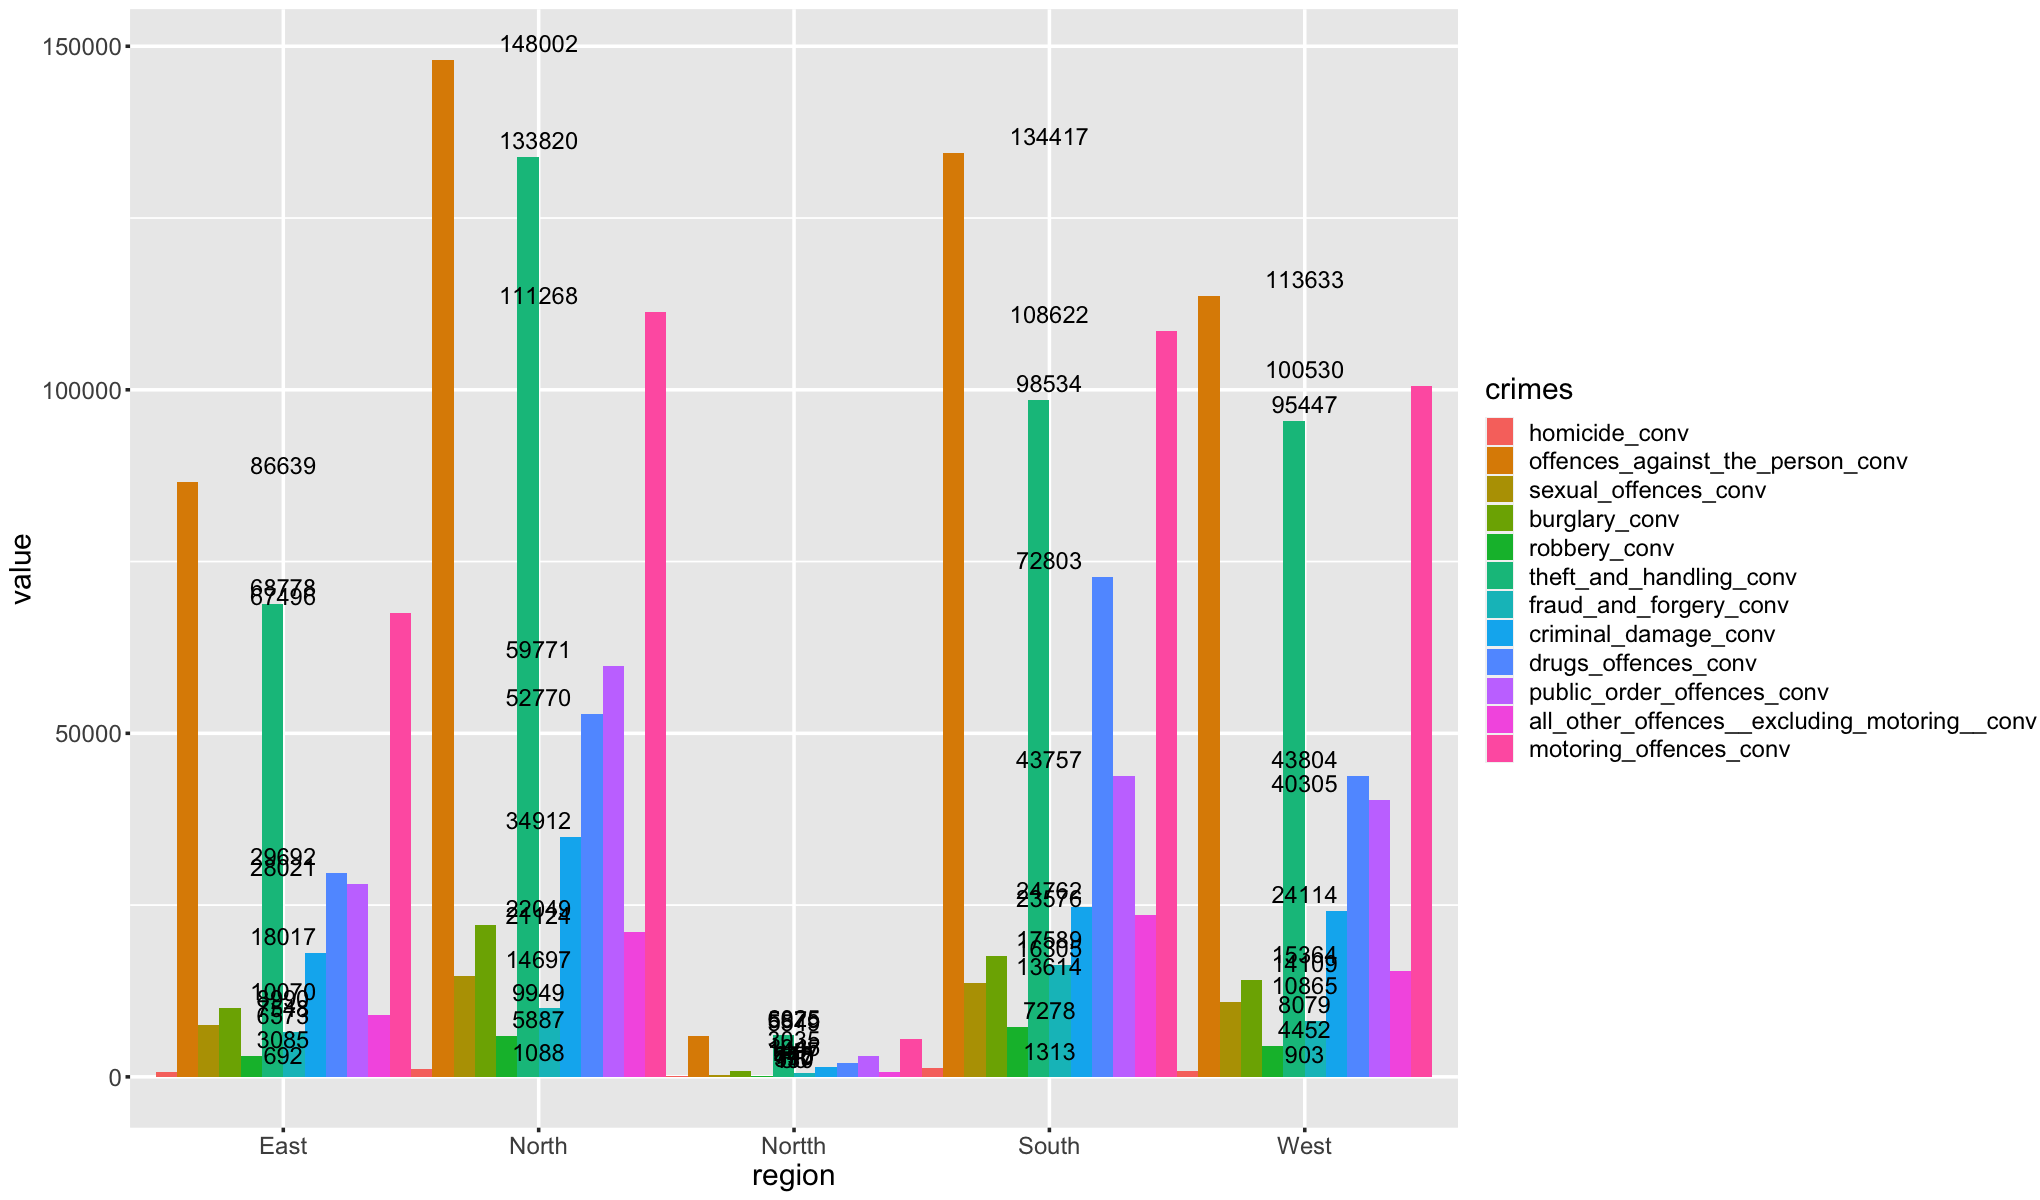

In [139]:
#This function takes a dataframe, groups it by region, and calculates the sum of each column within each region. 
dataframe <- melt(group_by_region(conv_crime_data), id.vars = "region", variable.name = "crimes")
options(repr.plot.width = 17, repr.plot.height = 10)
ggplot(dataframe, aes(x = region, y = value)) +
geom_bar(aes(fill = crimes), stat = "identity", position = "dodge", width = 1) +
geom_text(aes(label = value), vjust = -0.5, size = 5) +
theme(text = element_text(size = 18), element_line(linewidth = 1))

This plot is a grouped bar plot showing different crime categories (e.g., theft, assault, burglary) across different regions. Each region will have a set of bars representing the counts or values for each crime category. The text labels on top of the bars display the corresponding values.

In this plot for convictions crime data, `the highest convictions came from the North` being 148002 convictions in that region. The next is from the south region which has its highest number of convictions to be 134417. These convictions are in the category of `offences against the person`.

The Third highest falls into the category of convictions from theft and handling, it has a total number of 133820 convictions


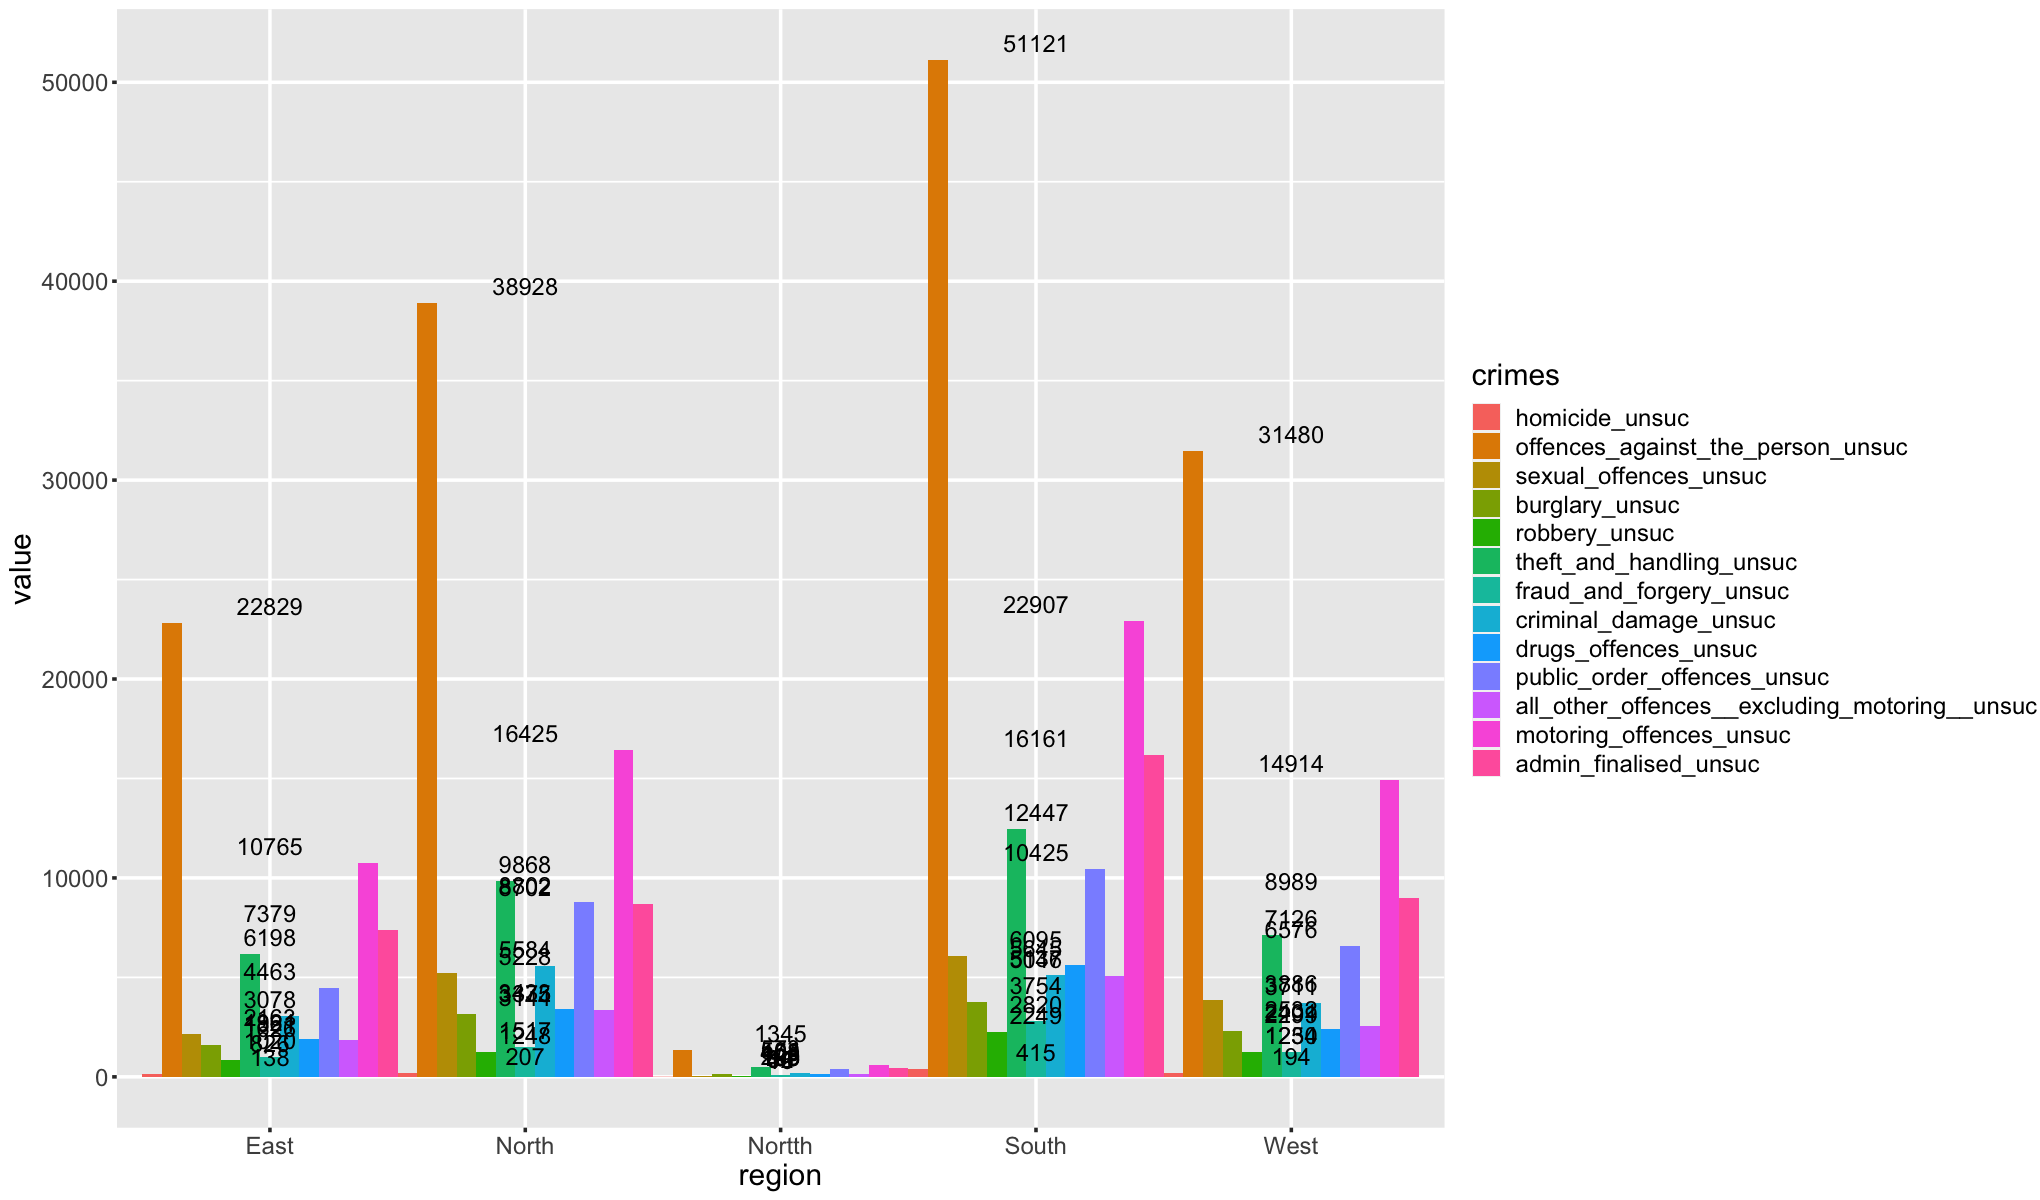

In [140]:
dataframe <- melt(group_by_region(unsuccesful_crime_data), id.vars = "region", variable.name = "crimes")
options(repr.plot.width = 17, repr.plot.height = 10)
ggplot(dataframe, aes(x = region, y = value)) +
geom_bar(aes(fill = crimes), stat = "identity", position = "dodge", width = 1) +
geom_text(aes(label = value), vjust = -0.5, size = 5) +
theme(text = element_text(size = 18), element_line(linewidth = 1))

In this plot for unsuccessful crime data, `the highest unsuccessful crime came from the South` being 51121 unsuccessful crimes in that region. The next is from the North region which has 134417 cases. These cases are in the category of `offences against the person`.

Note: According to CPS website (https://www.cps.gov.uk/publication/cps-case-outcomes-principal-offence), Convictions comprise guilty pleas, convictions after trial and cases proved in the absence of the defendant. Unsuccessful outcomes represent all outcomes other than a conviction, comprising discontinuances and withdrawals, discharged committals, dismissals and acquittals, and administrative finalisations.

### What are percentage of convictions by principal offence category in each region?

#### For Convictions

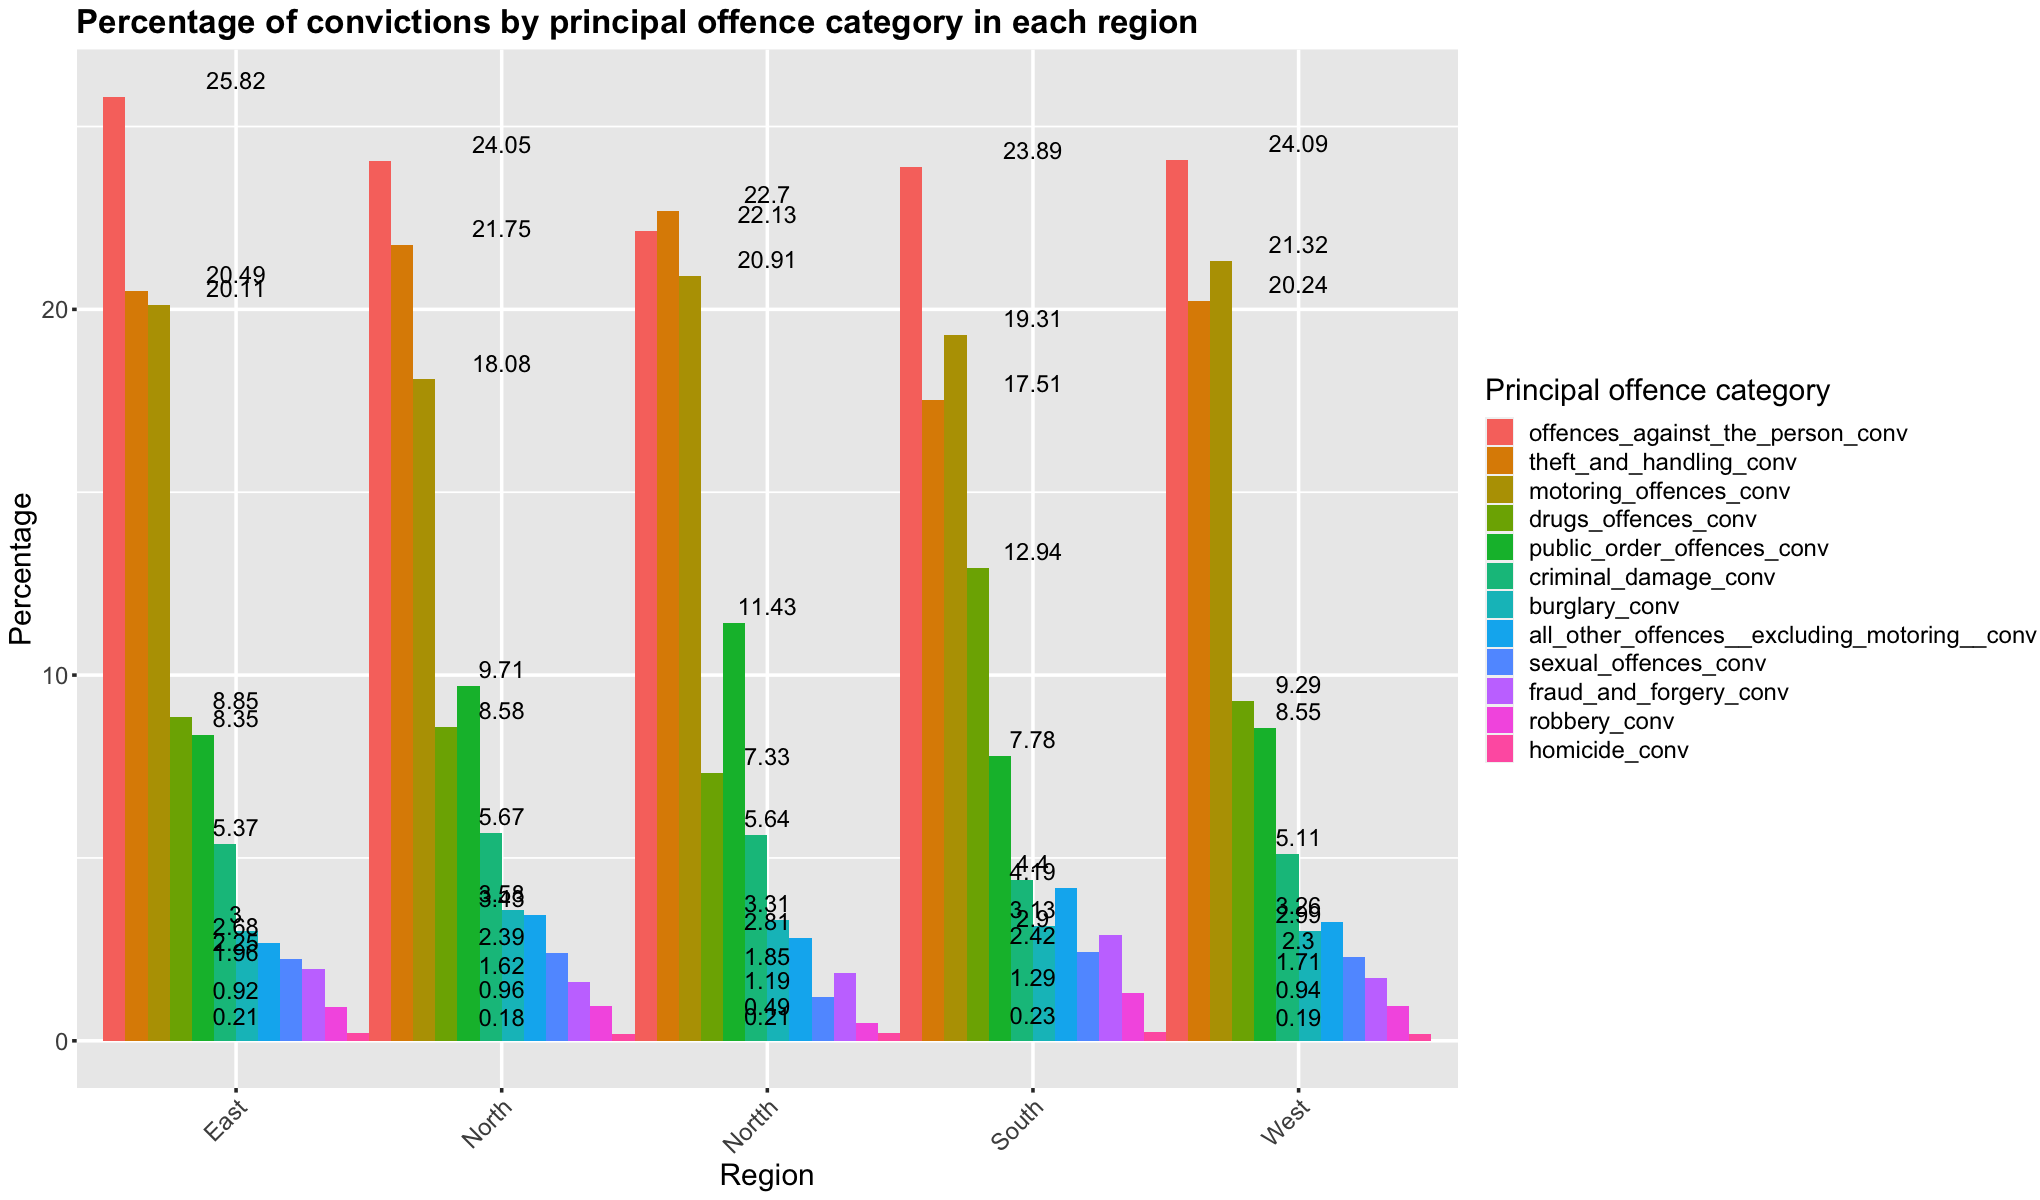

In [141]:

dataframe <- melt(group_by_region(conv_crime_data), id.vars = "region", variable.name = "crimes") %>%
  filter(crimes != "total") %>%
  group_by(region) %>%
  mutate(percentage = value / sum(value) * 100) %>%
  arrange(desc(percentage)) %>%
  mutate(crimes = factor(crimes, levels = unique(crimes))) %>% 
  mutate(region = factor(region, levels = unique(region))) 

options(repr.plot.width = 17, repr.plot.height = 10)
ggplot(dataframe, aes(x = region, y = percentage)) +
geom_bar(aes(fill = crimes), stat = "identity", position = "dodge", width = 1) +
geom_text(aes(label = round(percentage, 2)), vjust = -0.5, size = 5) +
theme(text = element_text(size = 18), element_line(linewidth = 1)) +
labs(title = "Percentage of convictions by principal offence category in each region", x = "Region", y = "Percentage") +
scale_fill_discrete(name = "Principal offence category") +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
theme(plot.title = element_text(size = 20, face = "bold"))

#### For Unsuccessful

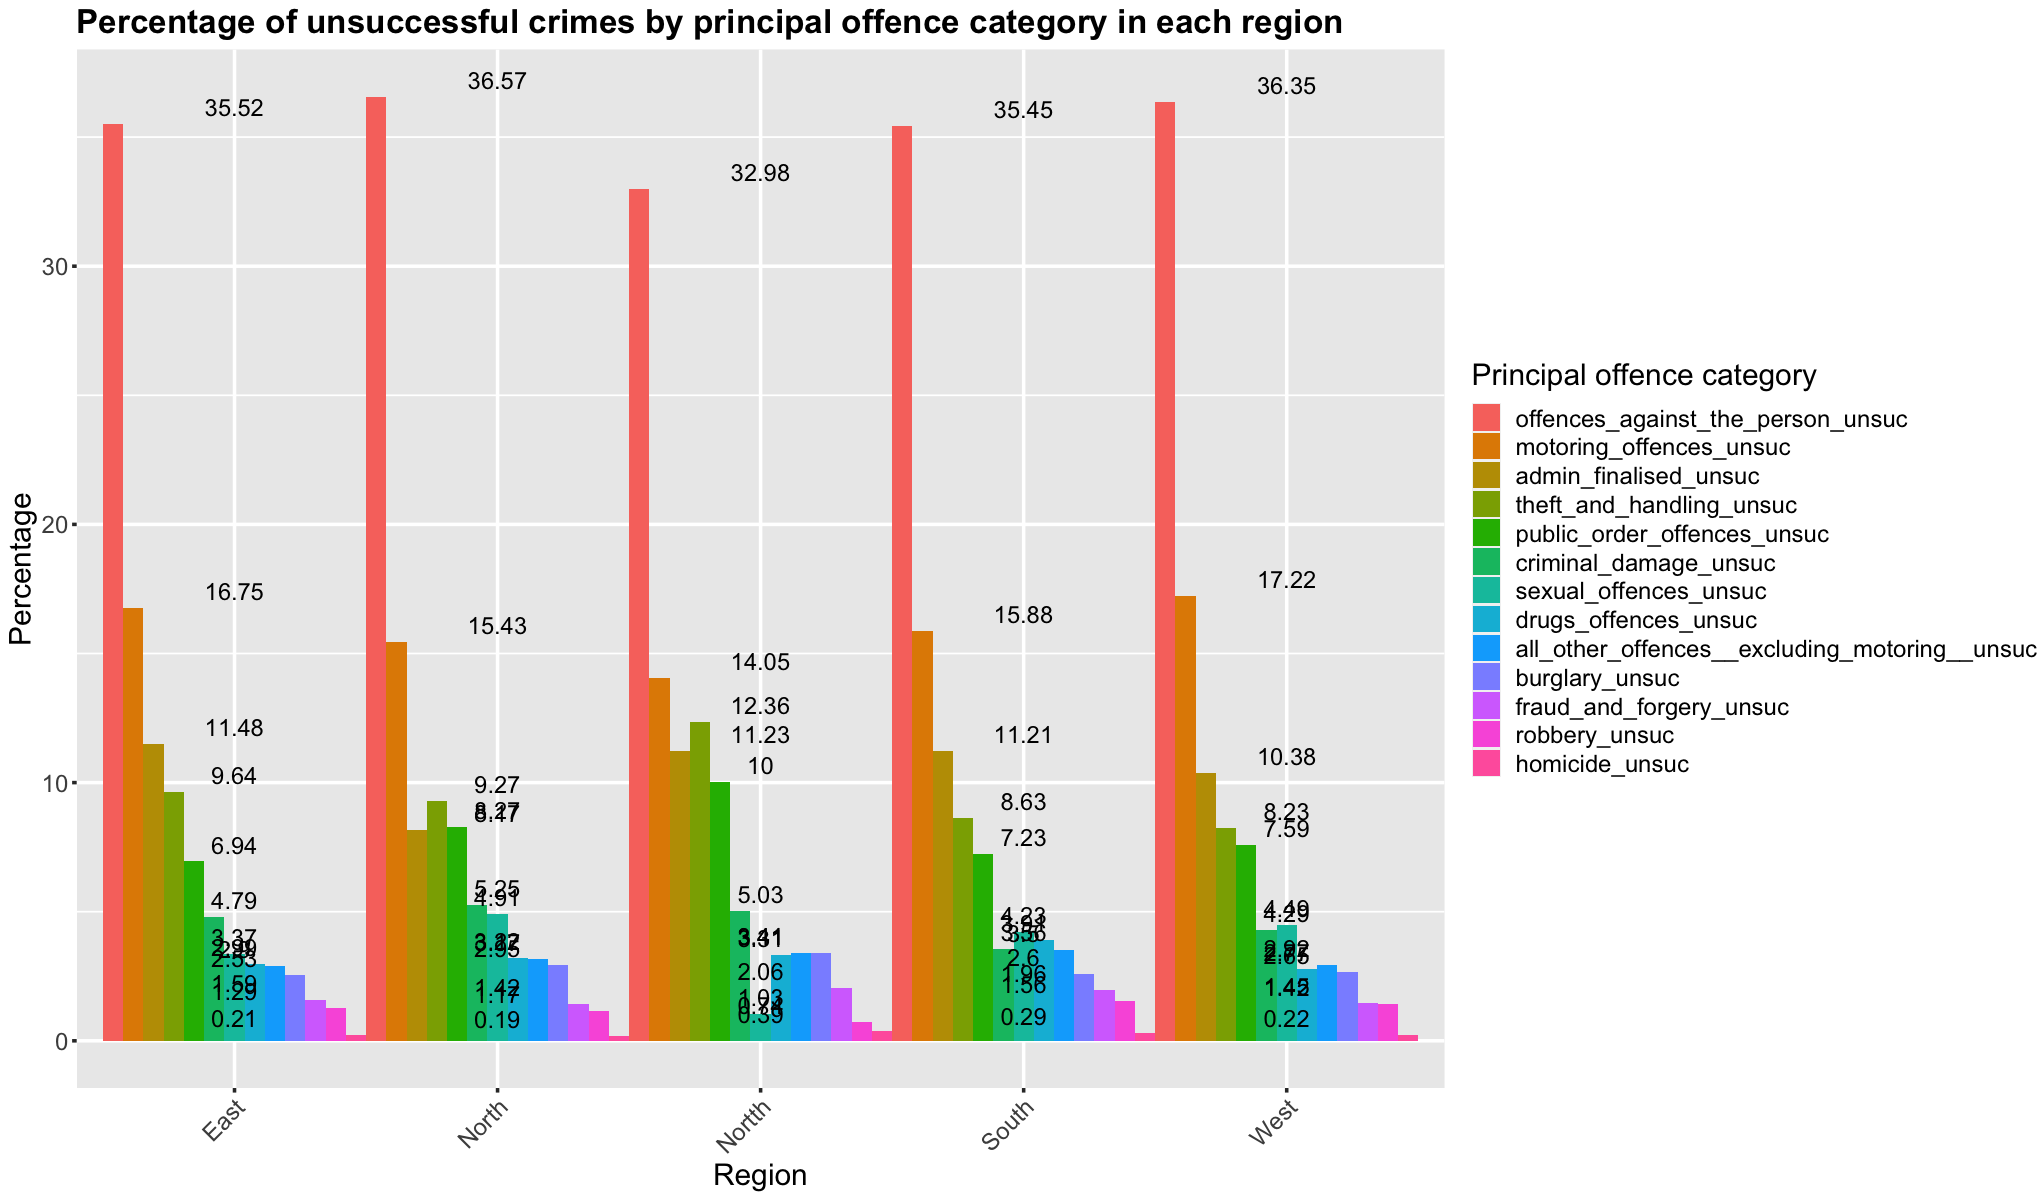

In [142]:
dataframe <- melt(group_by_region(unsuccesful_crime_data), id.vars = "region", variable.name = "crimes") %>%
  filter(crimes != "total") %>%
  group_by(region) %>%
  mutate(percentage = value / sum(value) * 100) %>%
  arrange(desc(percentage)) %>%
  mutate(crimes = factor(crimes, levels = unique(crimes))) %>% 
  mutate(region = factor(region, levels = unique(region))) 

options(repr.plot.width = 17, repr.plot.height = 10)
ggplot(dataframe, aes(x = region, y = percentage)) +
geom_bar(aes(fill = crimes), stat = "identity", position = "dodge", width = 1) +
geom_text(aes(label = round(percentage, 2)), vjust = -0.5, size = 5) +
theme(text = element_text(size = 18), element_line(linewidth = 1)) +
labs(title = "Percentage of unsuccessful crimes by principal offence category in each region", x = "Region", y = "Percentage") +
scale_fill_discrete(name = "Principal offence category") +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
theme(plot.title = element_text(size = 20, face = "bold"))

#### Sum of all crimes by region

In [143]:

group_by_region_all_crimes <- function(dataframe){
  dataframe <- dataframe[,-c(1:4)]
  dataframe$sum_of_all <- rowSums(dataframe[, sapply(dataframe, is.numeric)])
  dataframe <- dataframe[, c("region", "sum_of_all")]
  dataframe <- group_by(dataframe, region)
  summarise_all(dataframe, funs(sum))
}

group_by_region_all_crimes performs the following tasks:

Removes the first four columns from the dataframe using dataframe[,-c(1:4)]. This operation drops the first four columns from the dataframe.

Calculates the sum of all numeric columns for each row using rowSums(dataframe[, sapply(dataframe, is.numeric)]). This creates a new column called sum_of_all in the dataframe, which contains the sum of all numeric values for each row.

Selects only the "region" and "sum_of_all" columns using dataframe[, c("region", "sum_of_all")]. This reduces the dataframe to only these two columns.

Groups the dataframe by the "region" column using group_by(dataframe, region). This step prepares the dataframe for further summarization based on the "region" variable.

Summarizes all columns (except the "region" column) using summarise_all(dataframe, funs(sum)). This calculates the sum of each column for each region, resulting in a new dataframe where each row represents a region, and the values are the sums of the respective columns.

In summary, the code takes a dataframe, calculates the sum of all numeric values for each row, selects the "region" and "sum_of_all" columns, groups the dataframe by region, and finally calculates the sum of each column for each region. The resulting dataframe provides a summary of the total sum of all numeric variables grouped by region.

In [144]:
group_by_region_all_crimes(conv_crime_data)

region sum_of_all
1 All    2011655   
2 East    335601   
3 North   615337   
4 Nortth   26542   
5 South   562570   
6 West    471605

In [145]:
group_by_region_all_crimes(unsuccesful_crime_data)

region sum_of_all
1 All    405620    
2 East    64267    
3 North  106461    
4 Nortth   4078    
5 South  144222    
6 West    86592

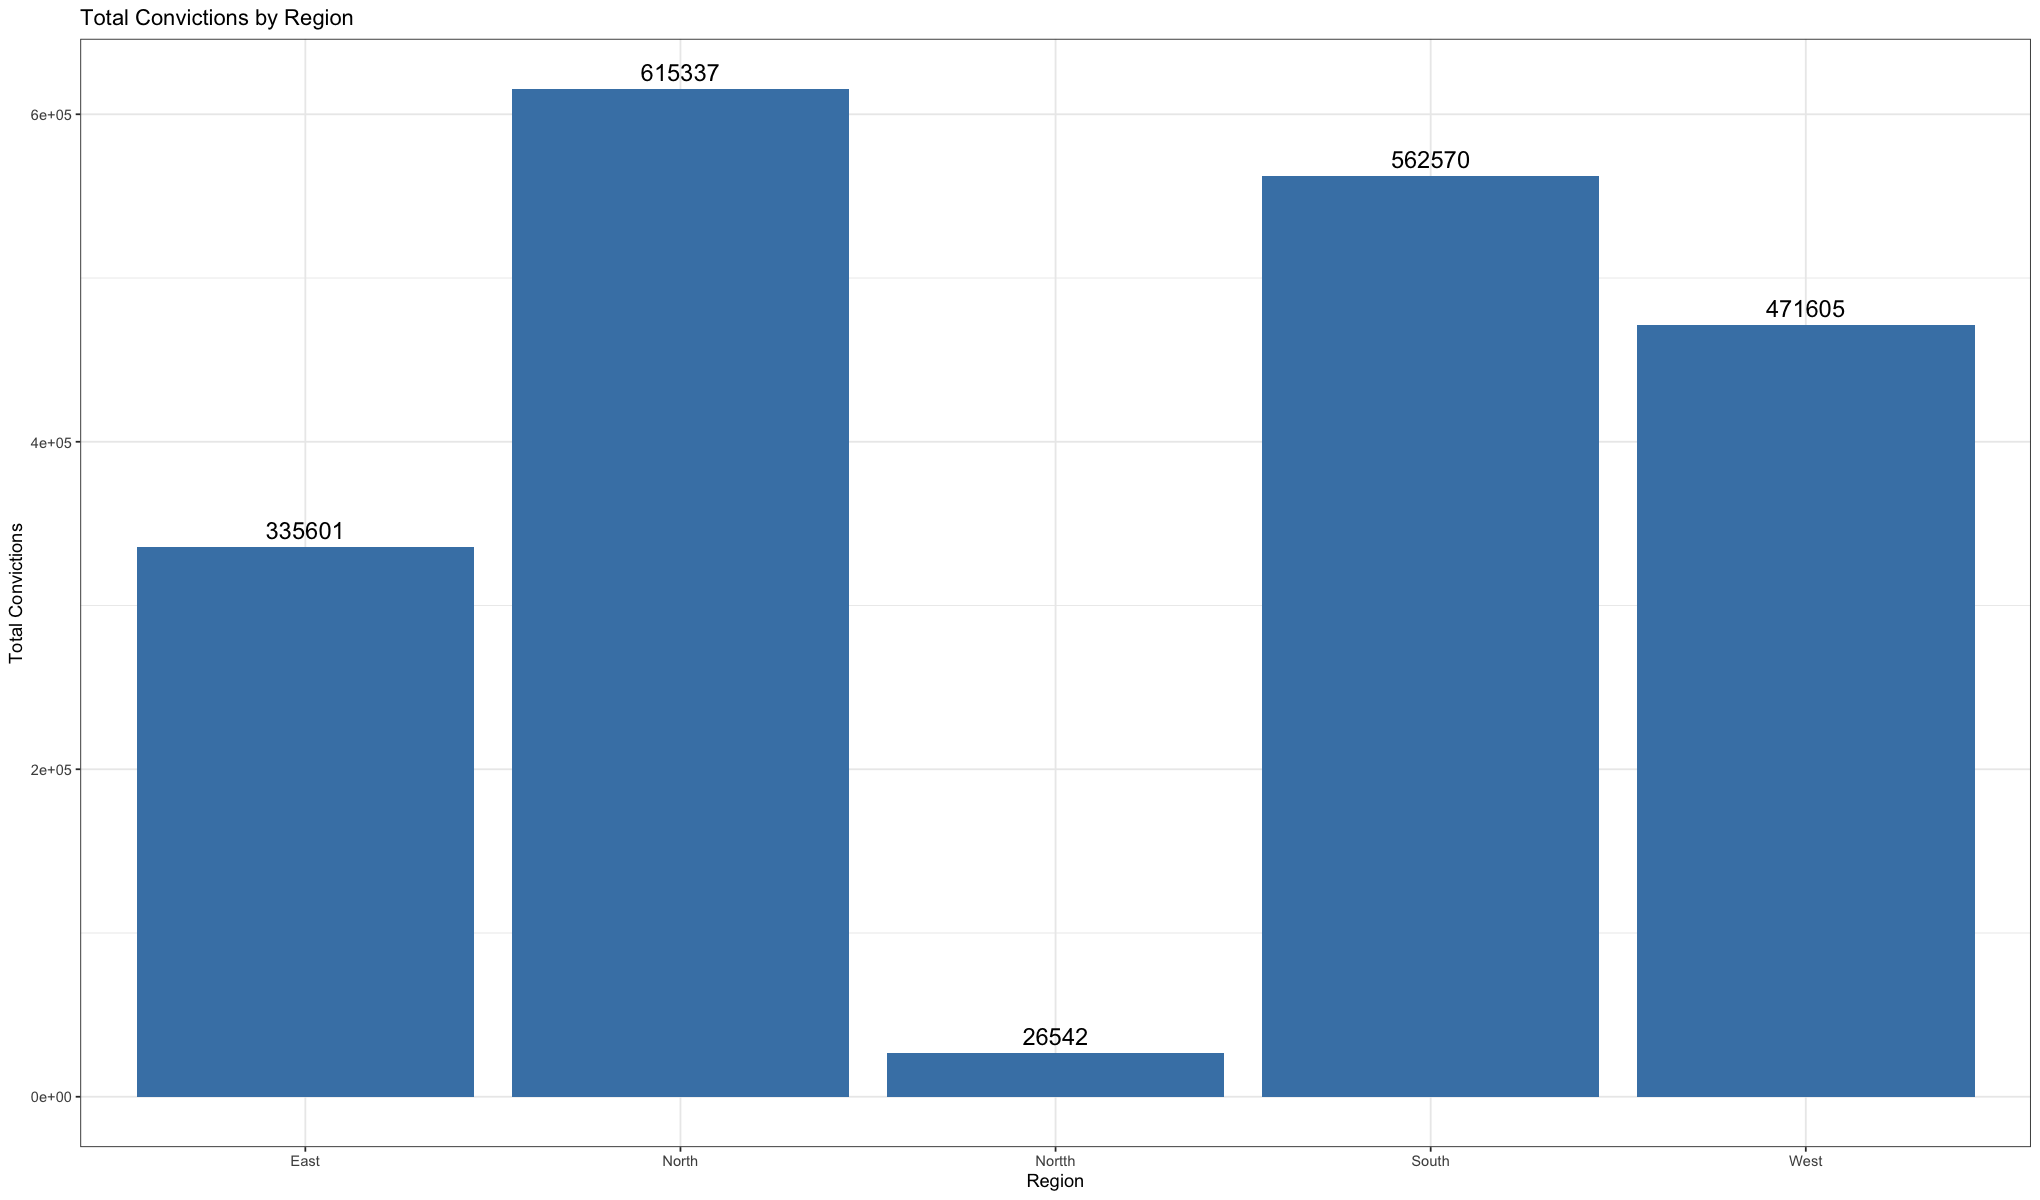

In [146]:
#plot the graph for the sum of all crimes in each region

conviction_totalsss <- group_by_region_all_crimes(conv_crime_data) %>%
  filter(region != "All")

ggplot(conviction_totalsss, aes(x = region, y = sum_of_all)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = sum_of_all), vjust = -0.5, size = 5) +
  xlab("Region") +
  ylab("Total Convictions") +
  ggtitle("Total Convictions by Region") +
  theme_bw()

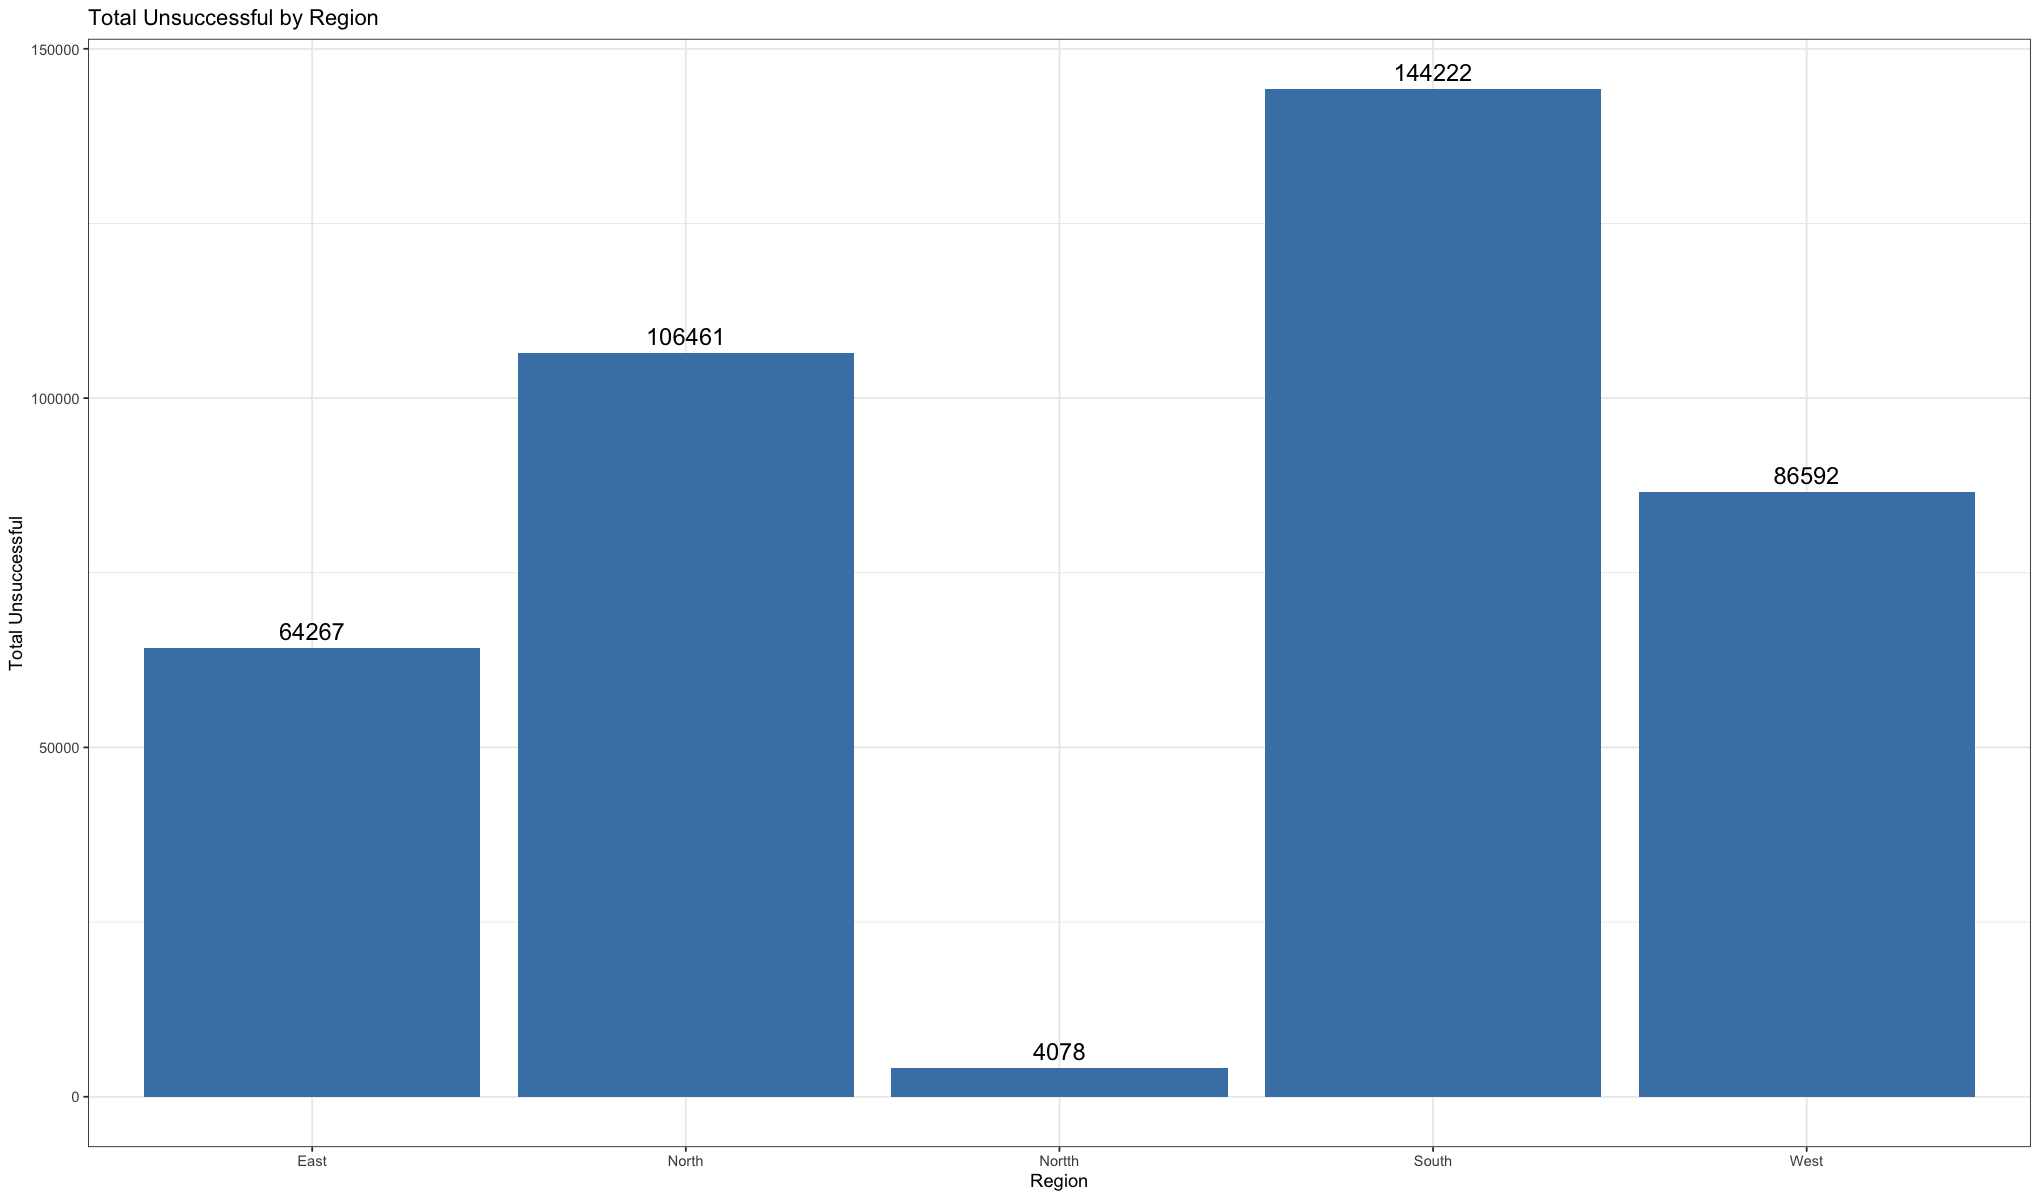

In [147]:
#plot the graph for the sum of all unsuccesful_crime_data in each region

unsuccessful_totalsss <- group_by_region_all_crimes(unsuccesful_crime_data) %>%
  filter(region != "All")

ggplot(unsuccessful_totalsss, aes(x = region, y = sum_of_all)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = sum_of_all), vjust = -0.5, size = 5) +
  xlab("Region") +
  ylab("Total Unsuccessful") +
  ggtitle("Total Unsuccessful by Region") +
  theme_bw()

### Are there significant differences in the conviction rates among different offence categories? 

There are significant difference between the offence categories

### Check if the principal offence category "homicide" has a significantly higher rate of convictions compared to other offence categories

In [148]:
# Function to calculate proportions of convictions
calculate_proportions <- function(data) {
  data %>%
    select(-c(year, month, yearandmonth, region, quarter)) %>%
    pivot_longer(cols = -county, names_to = "crime_category", values_to = "convictions", names_pattern = "(.*)_conv") %>%
    mutate(proportion = convictions / sum(convictions))
}

# Generate the proportions data
proportions <- calculate_proportions(conv_crime_data)

# Check if the "homicide" category has the highest proportion of convictions
if (proportions$crime_category[which.max(proportions$proportion)] == "homicide") {
  conclusion <- "The principal offence category 'homicide' has the highest rate of convictions compared to other offence categories."
} else {
  conclusion <- "The principal offence category 'homicide' does not have the highest rate of convictions compared to other offence categories."
}

# Print the conclusion
print(conclusion)


[1] "The principal offence category 'homicide' does not have the highest rate of convictions compared to other offence categories."


In [149]:
### Check if the principal offence category "homicide_unc" has a significantly higher rate compared to other offence categories

# Function to calculate proportions of unsuccessful crimes
calculate_proportions <- function(data) {
  data %>%
    select(-c(year, month, yearandmonth, region, quarter)) %>%
    pivot_longer(cols = -county, names_to = "crime_category", values_to = "unsuccessful", names_pattern = "(.*)_unsuc") %>%
    mutate(proportion = unsuccessful / sum(unsuccessful))
}

# Generate the proportions data
proportions <- calculate_proportions(unsuccesful_crime_data)

# Check if the "homicide" category has the highest proportion of unsuccessful crimes
if (proportions$crime_category[which.max(proportions$proportion)] == "homicide") {
  conclusion <- "The principal offence category 'homicide' has the highest rate of unsuccessful compared to other offence categories."
} else {
  conclusion <- "The principal offence category 'homicide' does not have the highest rate of unsuccessful compared to other offence categories."
}

# Print the conclusion
print(conclusion)


[1] "The principal offence category 'homicide' does not have the highest rate of unsuccessful compared to other offence categories."


### Check if there are significant/Not significant differences in the conviction rates among different principal offence categories. 

### Check if there are significant/Not significant differences in the unsuccessful rates among different principal offence categories. 

# A tibble: 13 x 5
   unsuc_category     unsuccessful_rate total_unsuccessful proportion comparison
   <chr>                          <int>              <int>      <dbl> <chr>     
 1 admin_finalised                83378             811240    0.103   Significa~
 2 all_other_offence~             25906             811240    0.0319  Not signi~
 3 burglary                       21924             811240    0.0270  Not signi~
 4 criminal_damage                35430             811240    0.0437  Not signi~
 5 drugs_offences                 27070             811240    0.0334  Not signi~
 6 fraud_and_forgery              13390             811240    0.0165  Not signi~
 7 homicide                        1940             811240    0.00239 Not signi~
 8 motoring_offences             131168             811240    0.162   Significa~
 9 offences_against_~            291406             811240    0.359   Significa~
10 public_order_offe~             61348             811240    0.0756  Not signi~
11 robber

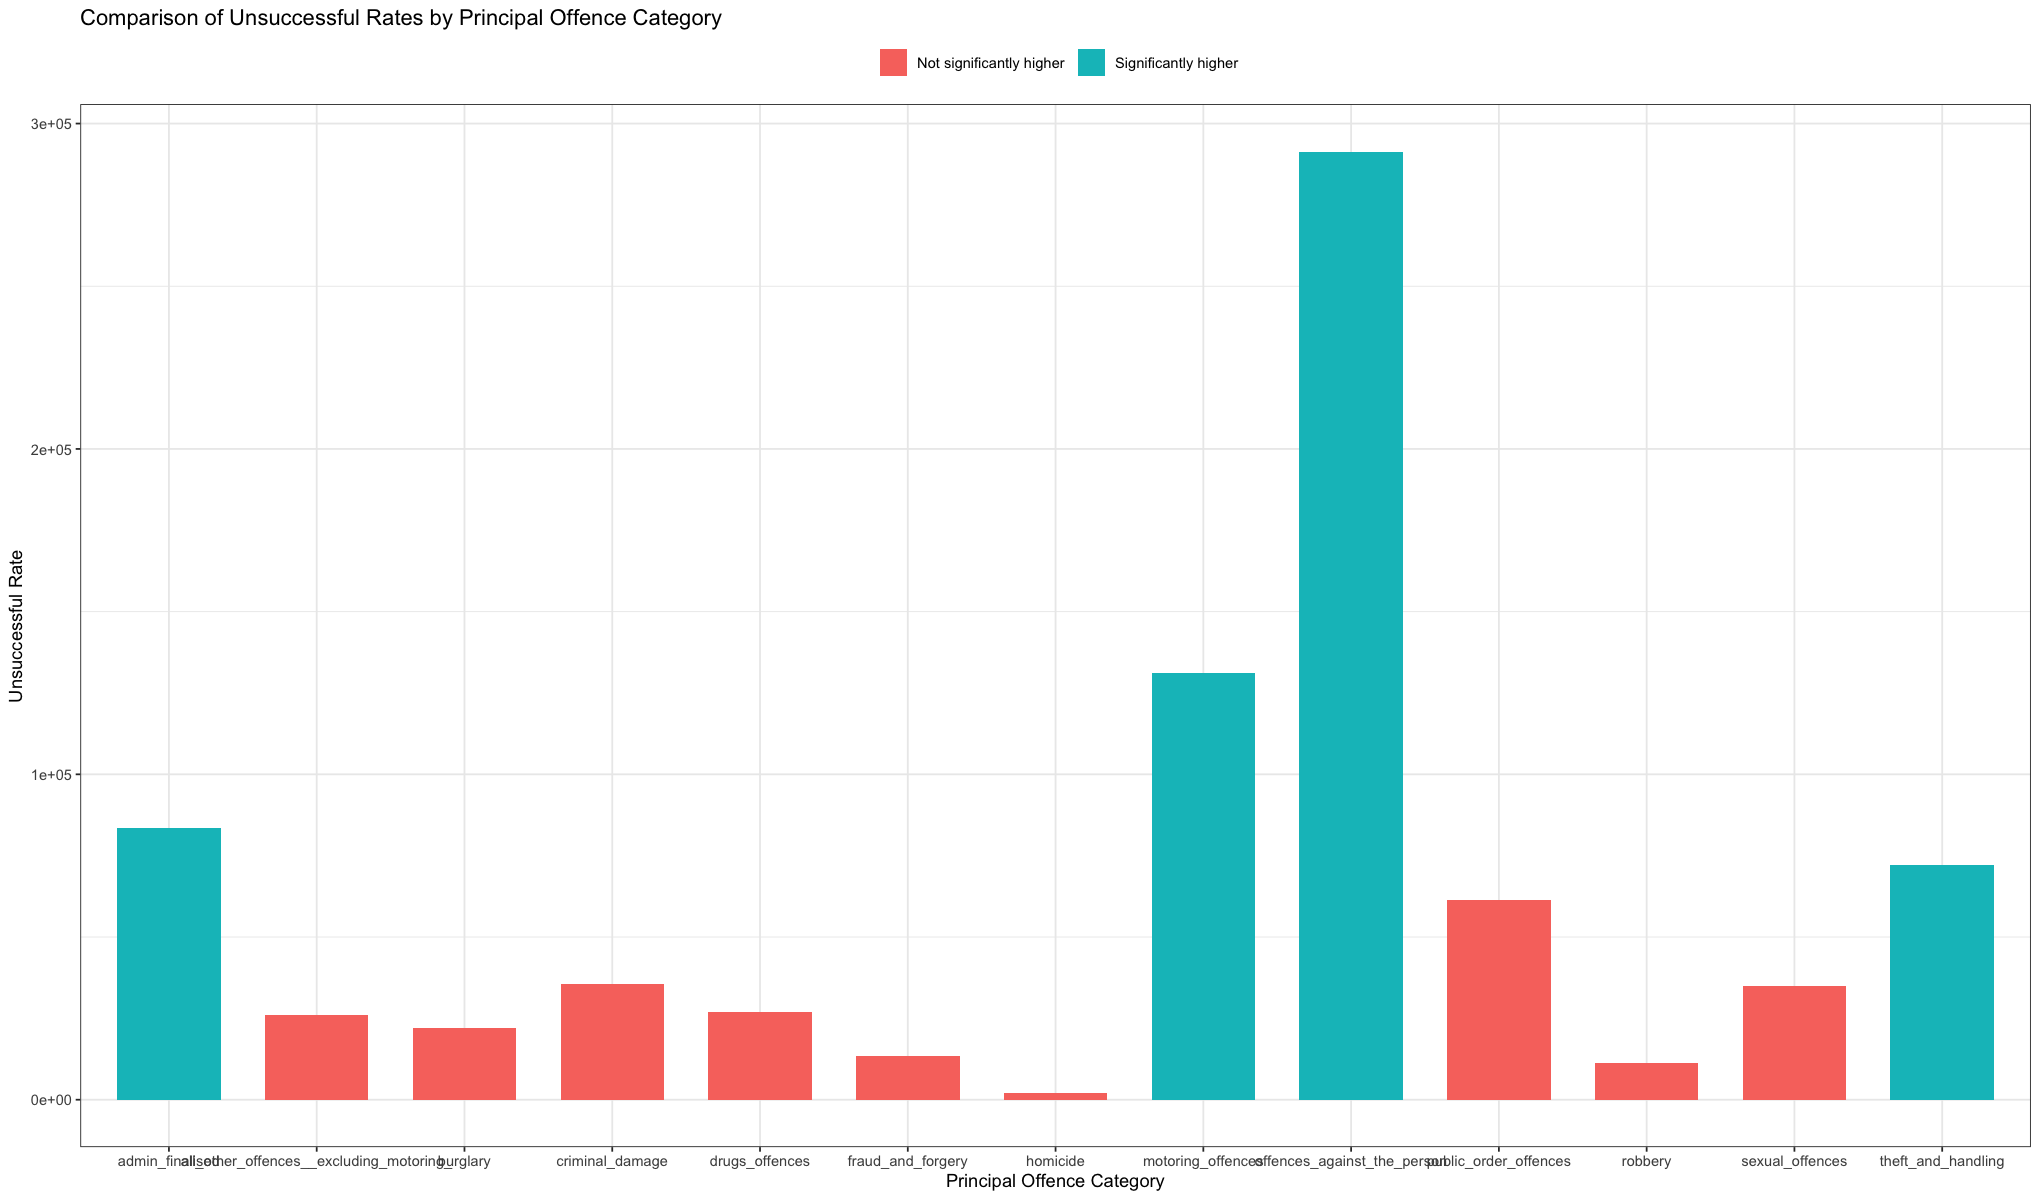

In [150]:

# Function to calculate proportions of convictions
calculate_proportions <- function(data) {
  data %>%
    select(-c(year, month, yearandmonth, region, quarter)) %>%
    pivot_longer(cols = -county, names_to = "unsuc_category", values_to = "unsuccessful", names_pattern = "(.*)_unsuc") %>%
    group_by(unsuc_category) %>%
    summarise(unsuccessful_rate = sum(unsuccessful)) %>%
    mutate(total_unsuccessful = sum(unsuccessful_rate),
           proportion = unsuccessful_rate / total_unsuccessful)
}

# Generate the proportions data
proportions <- calculate_proportions(unsuccesful_crime_data)

# Check if each principal offence category has a significantly higher rate of convictions compared to other categories
comparison <- proportions %>%
  mutate(comparison = ifelse(proportion > mean(proportion), "Significantly higher", "Not significantly higher"))

# Print the comparison results
print(comparison)


# Plotting the comparison results
ggplot(comparison, aes(x = unsuc_category, y = unsuccessful_rate, fill = comparison)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  labs(x = "Principal Offence Category", y = "Unsuccessful Rate", fill = "Comparison") +
  ggtitle("Comparison of Unsuccessful Rates by Principal Offence Category") +
  theme_bw() +
  theme(legend.position = "top", legend.title = element_blank())

In [151]:
# # Plotting the comparison results
# ggplot(comparison, aes(x = crime_category, y = conviction_rate, fill = comparison)) +
#   geom_bar(stat = "identity", position = "dodge", width = 0.7) +
#   labs(x = "Principal Offence Category", y = "Conviction Rate", fill = "Comparison") +
#   ggtitle("Comparison of Conviction Rates by Principal Offence Category") +
#   theme_bw() +
#   theme(legend.position = "top", legend.title = element_blank())

In the above plot, it is analysed that `offences_against_the_person` has the highest differences in the conviction rates compared to other principal offence categories

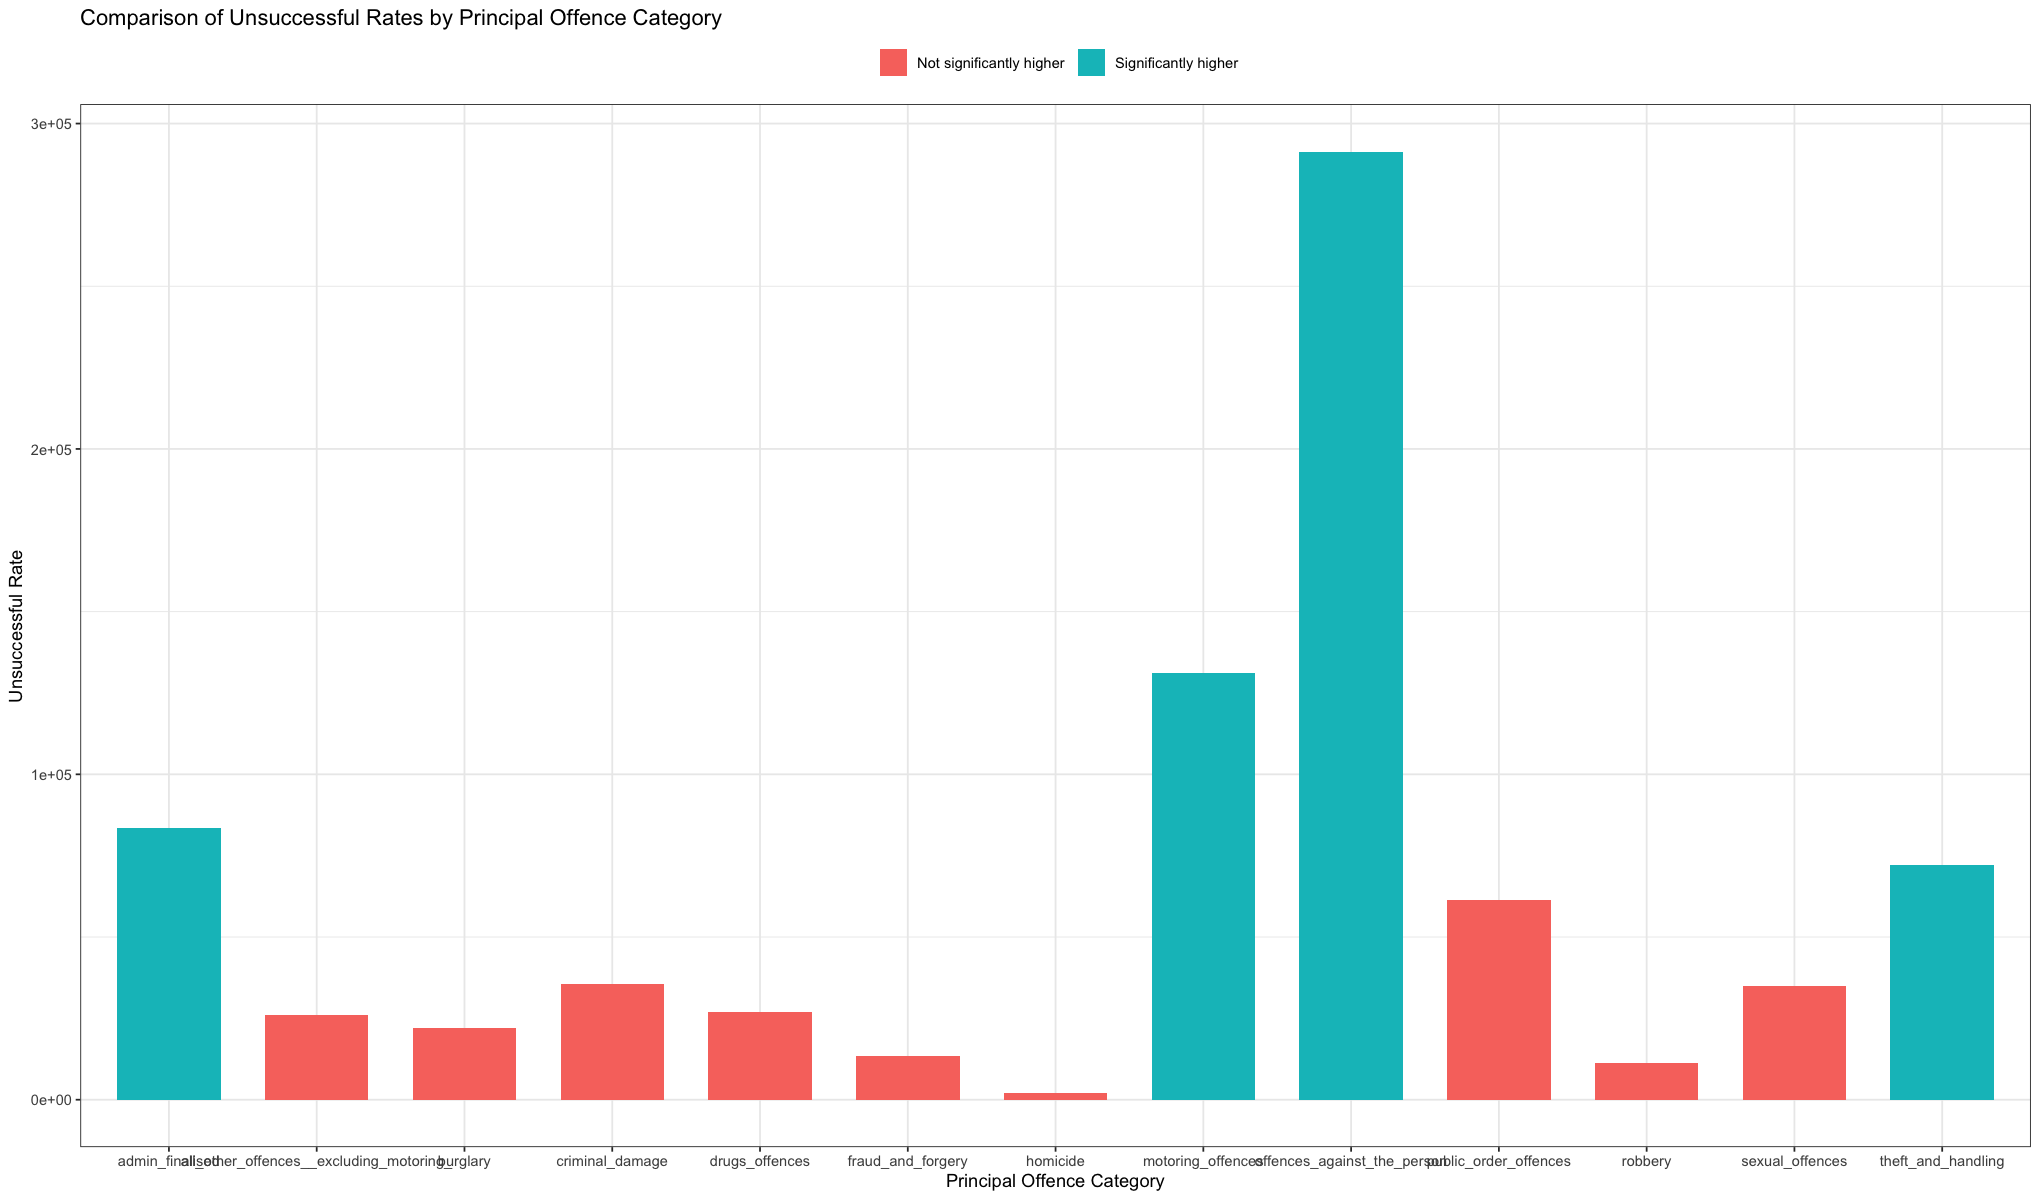

In [152]:
# Plotting the comparison results
ggplot(comparison, aes(x = unsuc_category, y = unsuccessful_rate, fill = comparison)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  labs(x = "Principal Offence Category", y = "Unsuccessful Rate", fill = "Comparison") +
  ggtitle("Comparison of Unsuccessful Rates by Principal Offence Category") +
  theme_bw() +
  theme(legend.position = "top", legend.title = element_blank())

In the above plot, it is analysed that `offences_against_the_person` has the highest differences in the unsuccessful rates compared to other principal offence categories

### Is there any seasonality or trend in the monthly or yearly counts of convictions? 

`summarise()` has grouped output by 'crime_category', 'year'. You can override
using the `.groups` argument.


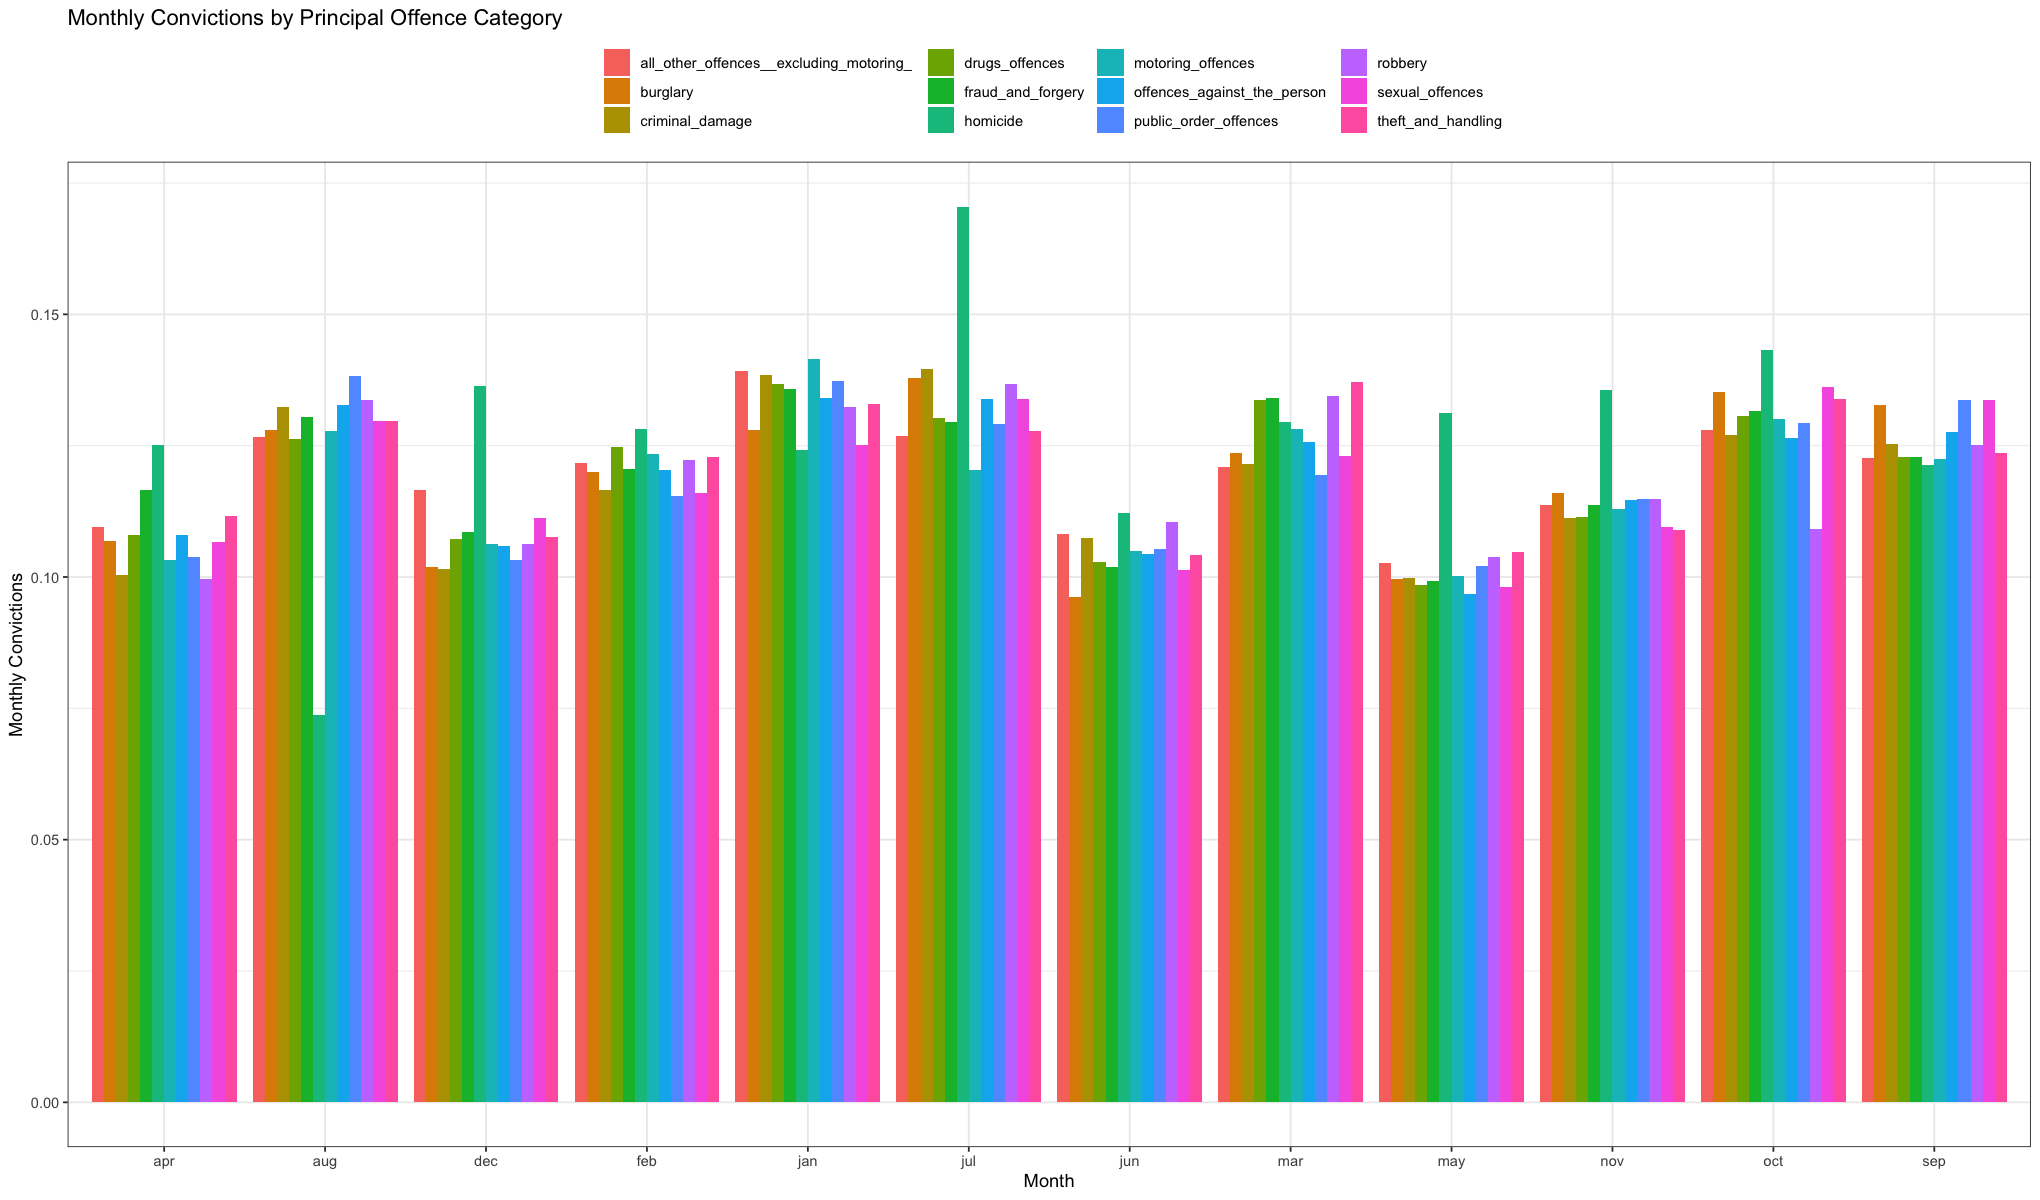

In [153]:
# Function to calculate the monthly and yearly counts of convictions for each principal offence category in each region 

calculate_monthly_yearly_counts <- function(data) {
  data %>%
    select(c(-yearandmonth, -region, -quarter)) %>%
    pivot_longer(cols = -c(county, year, month), names_to = "crime_category", values_to = "convictions", names_pattern = "(.*)_conv") %>%
    group_by(crime_category, year, month) %>%
    summarise(total_convictions = sum(convictions)) %>%
    mutate(yearly_convictions = sum(total_convictions)) %>%
    mutate(monthly_convictions = total_convictions / yearly_convictions)
} 

# Generate the monthly and yearly counts of convictions for each principal offence category in each region 
monthly_yearly_counts <- calculate_monthly_yearly_counts(conv_crime_data) 

# Plot the monthly counts of convictions for each principal offence category in each region
ggplot(monthly_yearly_counts, aes(x = month, y = monthly_convictions, fill = crime_category)) +
  geom_col(position = "dodge") +
  labs(x = "Month", y = "Monthly Convictions", fill = "Principal Offence Category") +
  ggtitle("Monthly Convictions by Principal Offence Category") +
  theme_bw() +
  theme(legend.position = "top", legend.title = element_blank())



### Is there any seasonality or trend in the monthly or yearly counts of Unsuccessful cases? 

`summarise()` has grouped output by 'unsuc_category', 'year'. You can override
using the `.groups` argument.


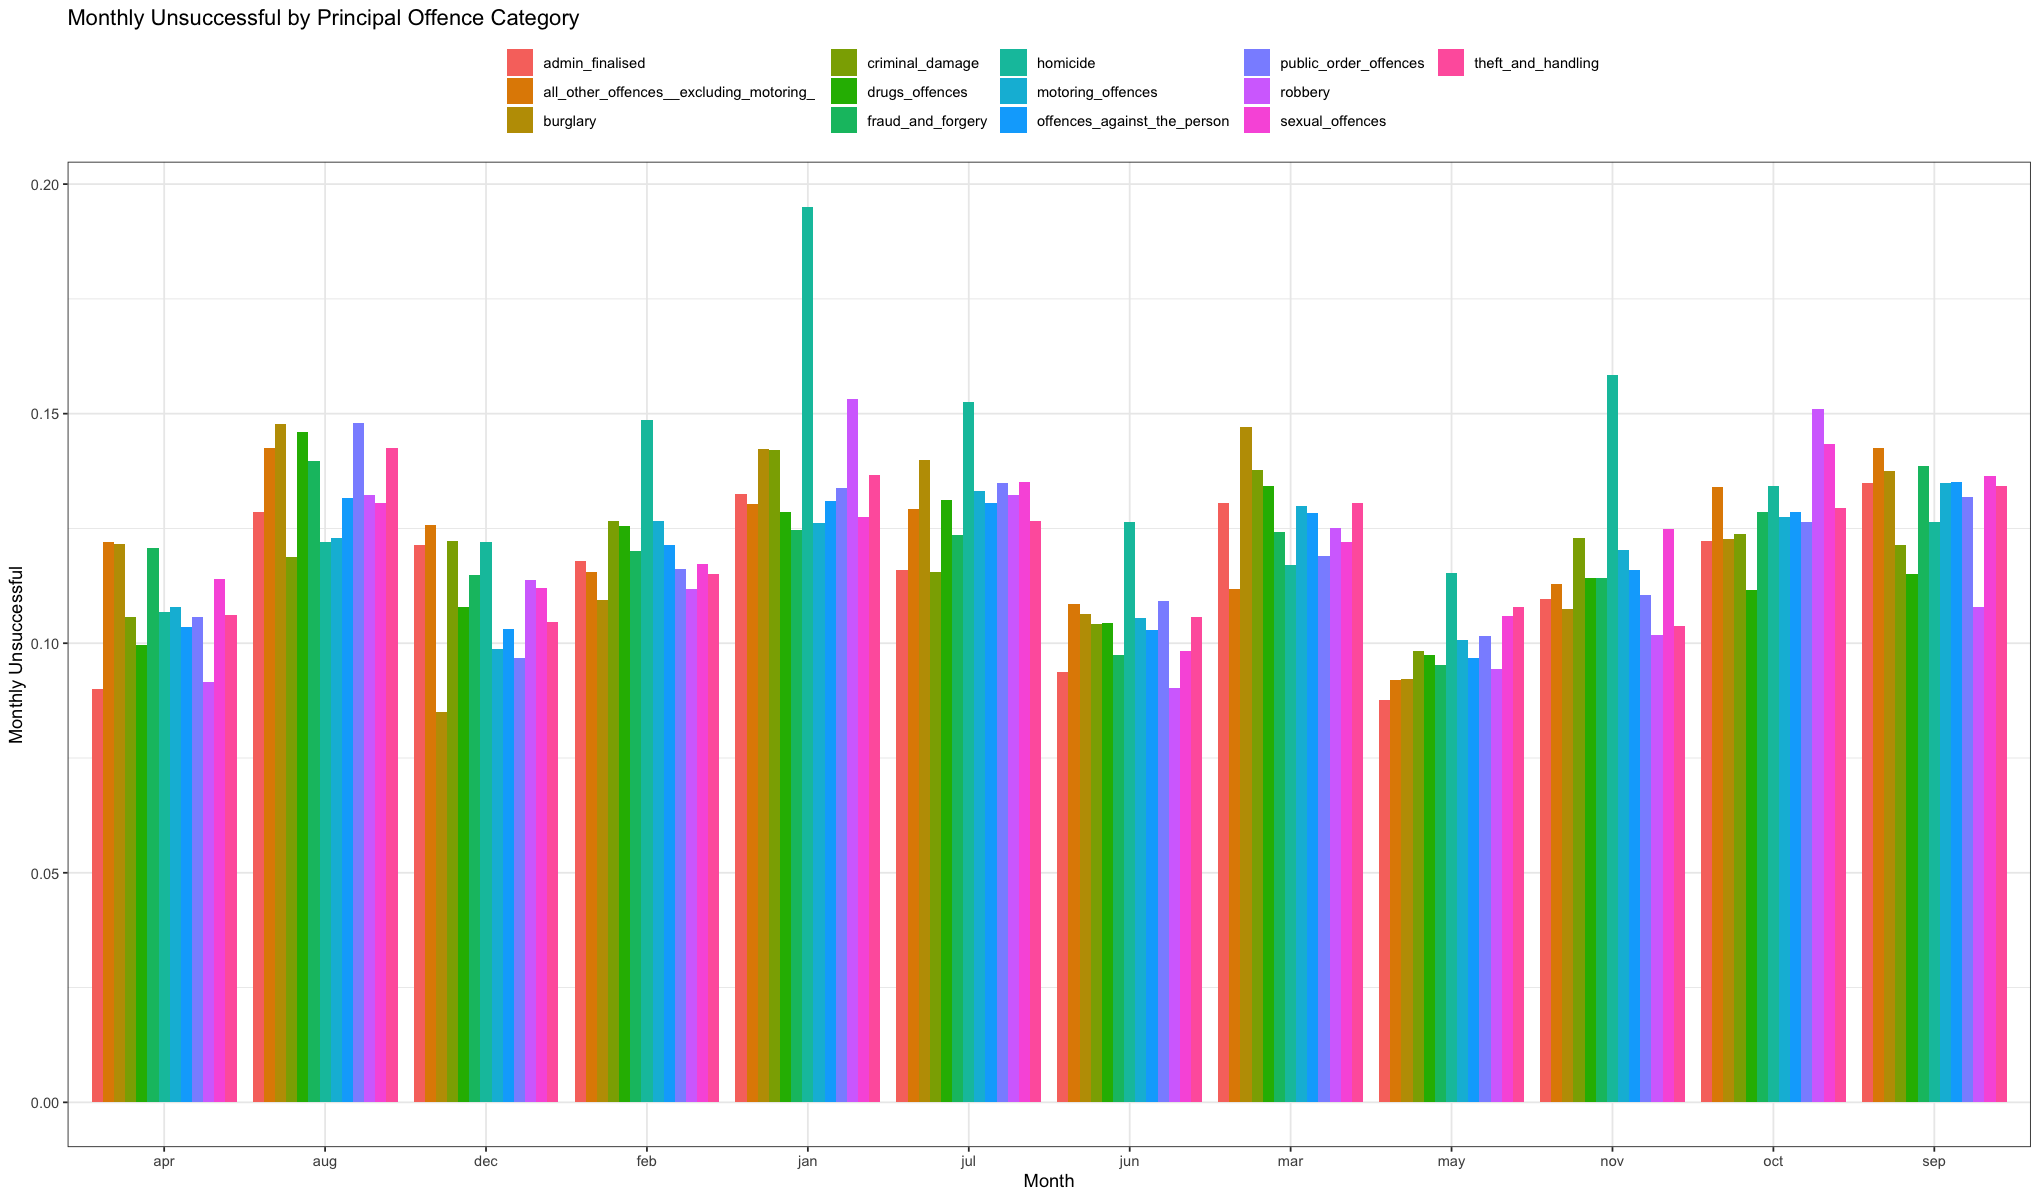

In [154]:
# Function to calculate the monthly and yearly counts of unsuccessful for each principal offence category in each region 

calculate_monthly_yearly_counts <- function(data) {
  data %>%
    select(c(-yearandmonth, -region, -quarter)) %>%
    pivot_longer(cols = -c(county, year, month), names_to = "unsuc_category", values_to = "unsuccessful", names_pattern = "(.*)_unsuc") %>%
    group_by(unsuc_category, year, month) %>%
    summarise(total_unsuccessful = sum(unsuccessful)) %>%
    mutate(yearly_unsuccessful = sum(total_unsuccessful)) %>%
    mutate(monthly_unsuccessful = total_unsuccessful / yearly_unsuccessful)
} 

# Generate the monthly and yearly counts of unsuccessful for each principal offence category in each region 
monthly_yearly_counts <- calculate_monthly_yearly_counts(unsuccesful_crime_data) 

# Plot the monthly counts of unsuccessful for each principal offence category in each region
ggplot(monthly_yearly_counts, aes(x = month, y = monthly_unsuccessful, fill = unsuc_category)) +
  geom_col(position = "dodge") +
  labs(x = "Month", y = "Monthly Unsuccessful", fill = "Principal Offence Category") +
  ggtitle("Monthly Unsuccessful by Principal Offence Category") +
  theme_bw() +
  theme(legend.position = "top", legend.title = element_blank())



`summarise()` has grouped output by 'crime_category', 'year'. You can override
using the `.groups` argument.


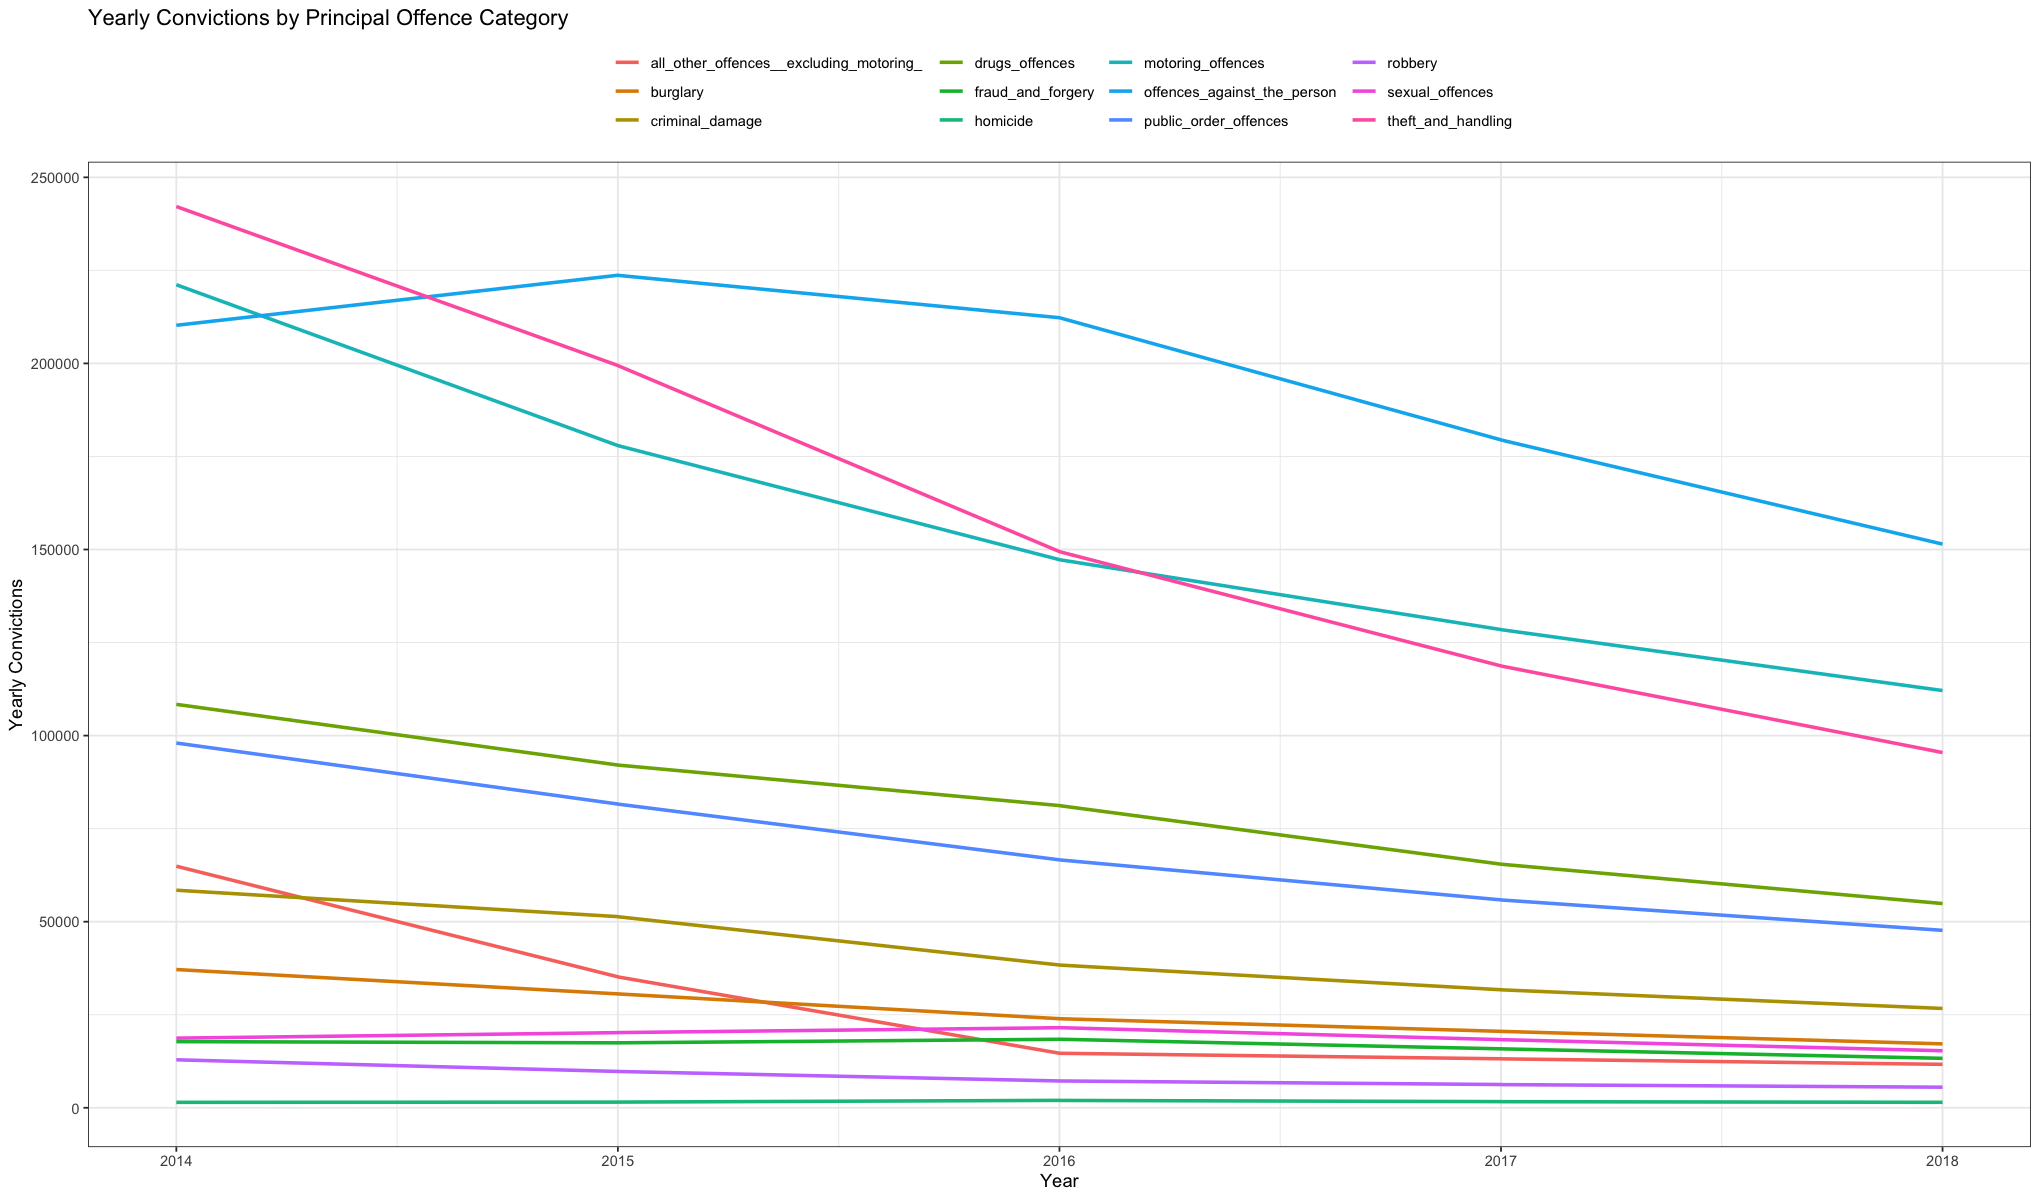

In [155]:
# Function to calculate the monthly and yearly counts of unsuccessful for each principal offence category in each region 

calculate_monthly_yearly_countss <- function(data) {
  data %>%
    select(c(-yearandmonth, -region, -quarter)) %>%
    pivot_longer(cols = -c(county, year, month), names_to = "crime_category", values_to = "convictions", names_pattern = "(.*)_conv") %>%
    group_by(crime_category, year, month) %>%
    summarise(total_convictions = sum(convictions)) %>%
    mutate(yearly_convictions = sum(total_convictions)) %>%
    mutate(monthly_convictions = total_convictions / yearly_convictions)
} 

# Generate the monthly and yearly counts of conviction for each principal offence category in each region 
monthly_yearly_countss <- calculate_monthly_yearly_countss(conv_crime_data)

# Plot the yearly counts of convictions for each principal offence category in each region

ggplot(monthly_yearly_countss, aes(x = year, y = yearly_convictions, group = crime_category, color = crime_category)) +
  geom_line(size = 1) +
  labs(x = "Year", y = "Yearly Convictions", color = "Principal Offence Category") +
  ggtitle("Yearly Convictions by Principal Offence Category") +
  theme_bw() +
  theme(legend.position = "top", legend.title = element_blank())

The provided code generates a plot that displays the yearly counts of convictions for each principal offence category in each region. Here's an explanation of the plot's result:

The x-axis represents the years, showing the progression of time.

The y-axis represents the yearly convictions, indicating the total number of convictions recorded for each year.

Each line in the plot represents a different principal offence category.

The color of each line corresponds to the respective principal offence category, aiding in distinguishing between categories.

The geom_line function is used to connect the data points for each category, visually showing the trend of convictions over the years.

The facet_wrap function is applied to create separate panels for each crime category, organizing the plot for better comparison and interpretation.

The plot includes a title, axis labels, and a legend to provide context and aid in understanding the information being presented.

The plot allows for the comparison of conviction trends across different principal offence categories and regions over time. By examining the lines' direction and relative positions, you can identify categories with increasing or decreasing convictions and observe any patterns or differences between the categories.

The plot can provide insights into the dynamics of convictions for each principal offence category and their changes over the years, enabling further analysis and exploration of the data.

### Are there specific months or years that stand out in terms of conviction rates?

`summarise()` has grouped output by 'crime_category', 'year'. You can override
using the `.groups` argument.


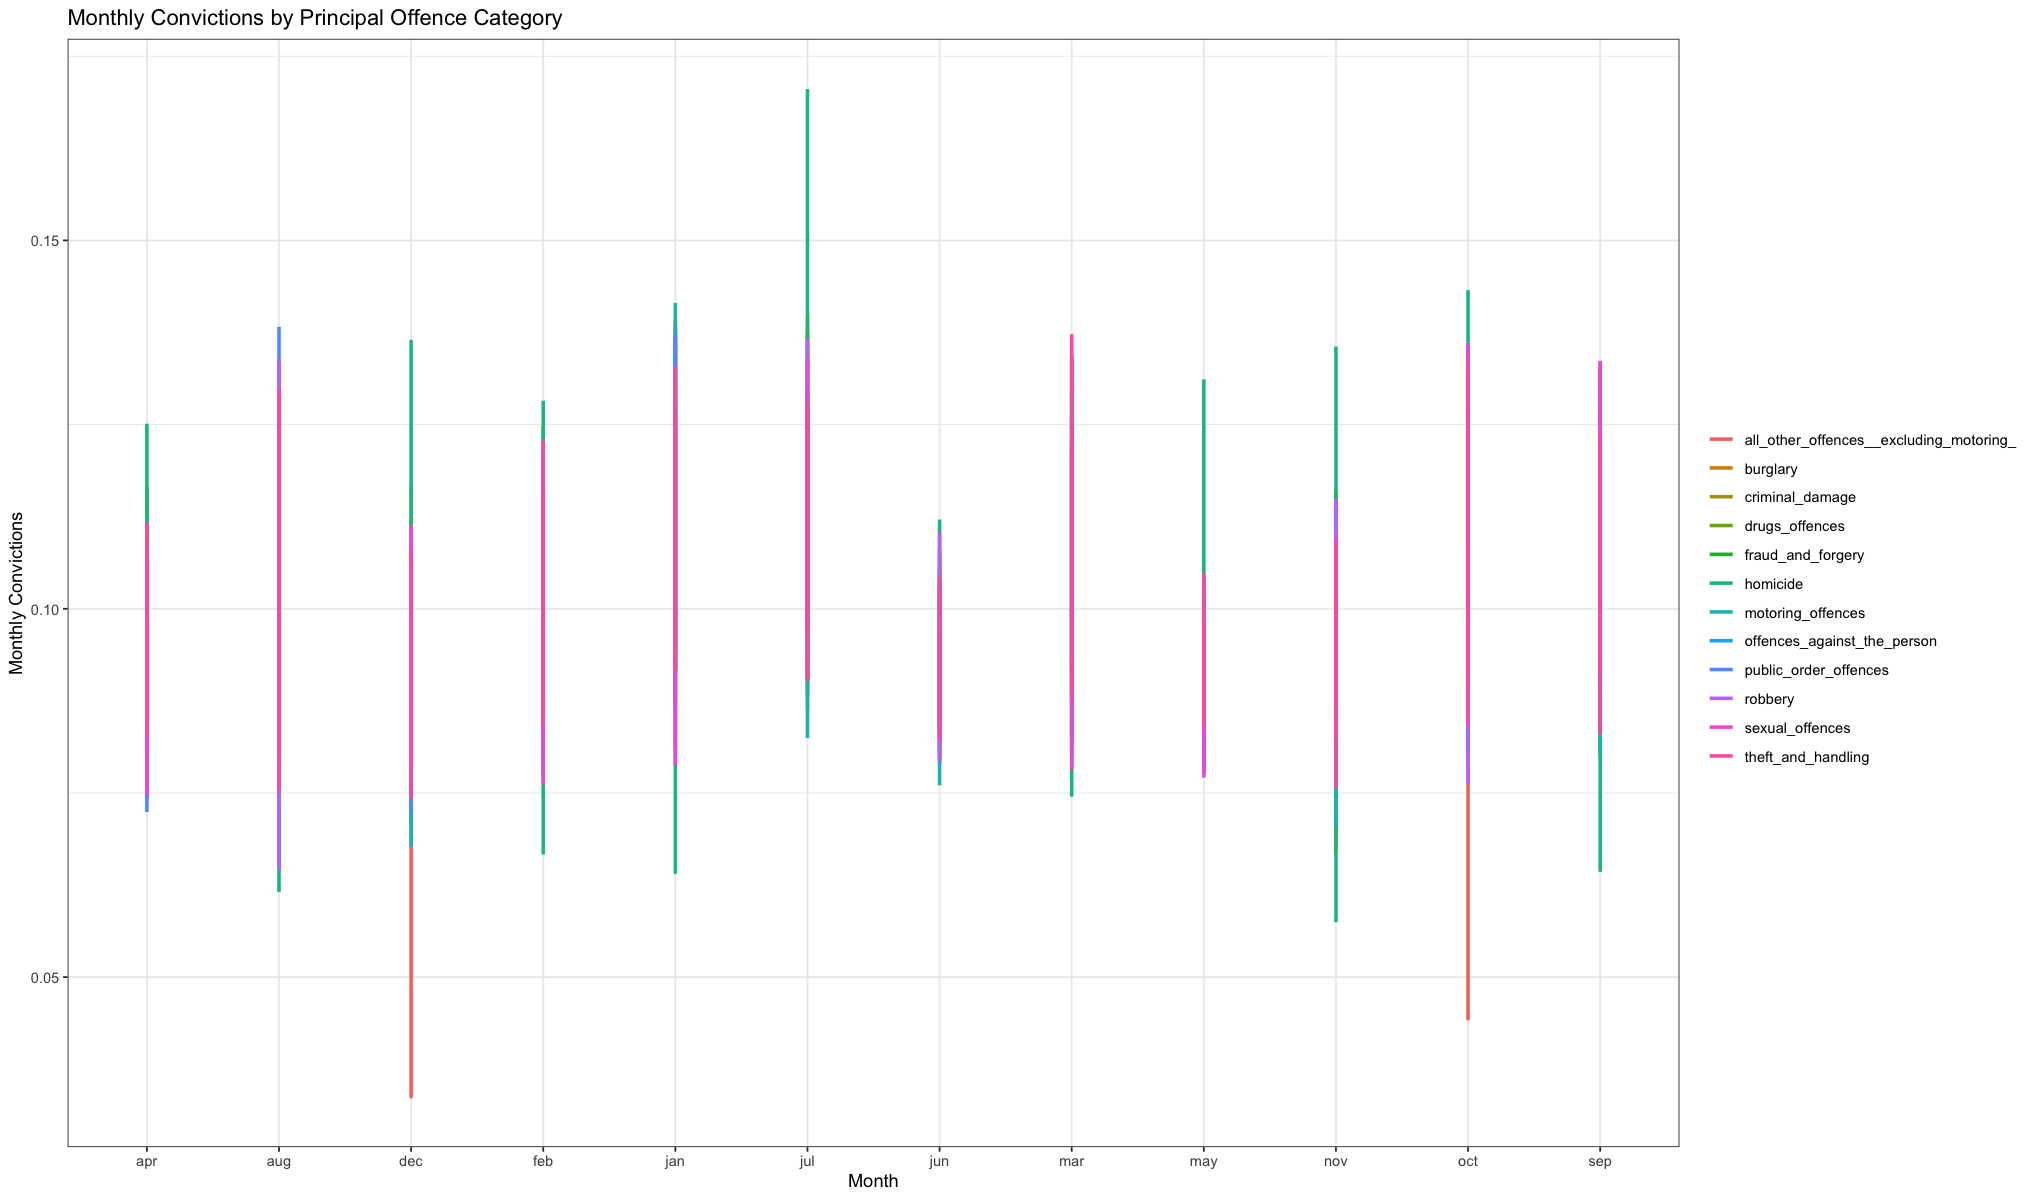

In [156]:
# Function to calculate the monthly and yearly counts of convictions for each principal offence category in each region 

calculate_monthly_yearly_counts <- function(data) {
  data %>%
    select(c(-yearandmonth, -region, -quarter)) %>%
    pivot_longer(cols = -c(county, year, month), names_to = "crime_category", values_to = "convictions", names_pattern = "(.*)_conv") %>%
    group_by(crime_category, year, month) %>%
    summarise(total_convictions = sum(convictions)) %>%
    mutate(yearly_convictions = sum(total_convictions)) %>%
    mutate(monthly_convictions = total_convictions / yearly_convictions)
} 

# Generate the monthly and yearly counts of convictions for each principal offence category in each region
monthly_yearly_counts <- calculate_monthly_yearly_counts(conv_crime_data) 

# Plot the monthly convictions for each principal offence category
ggplot(monthly_yearly_counts, aes(x = month, y = monthly_convictions, color = crime_category)) +
  geom_line(size = 1) +
  labs(x = "Month", y = "Monthly Convictions", color = "Principal Offence Category") +
  ggtitle("Monthly Convictions by Principal Offence Category") +
  theme_bw() +
  theme(legend.title = element_blank())


### Further Analysis on Region, Months, Year, and Value in order to get more insights on our data.

In [157]:
group_by_year_month <- function(dataframe, year) {
  filtered_dataframe <- subset(dataframe, year == year & county != "National")
  sum_of_all <- rowSums(filtered_dataframe[, sapply(filtered_dataframe, is.numeric)])
  grouped_df <- aggregate(sum_of_all ~ county + month, data = filtered_dataframe, FUN = sum)
  return(grouped_df)
}


In [158]:
plot_graph <- function(df, year) {
  grouped_df <- group_by_year_month(df, year)
  melt_df <- reshape2::melt(grouped_df, id.vars = c('county', 'month'), variable.name = 'crimes')
  
  options(repr.plot.width = 12, repr.plot.height = 8)
  
  normalized_df <- melt_df %>%
    group_by(month) %>%
    mutate(normalized_value = value / max(value) * 4000)
  
  ggplot(normalized_df, aes(x = normalized_value, y = reorder(county, normalized_value))) +
    geom_bar(aes(fill = month), stat = "identity", position = "stack", width = 0.9) +
    scale_x_continuous(labels = scales::comma) +
    labs(x = "Normalized Convictions (in thousands)", y = "County", fill = "Month") +
    ggtitle(paste("Normalized Convictions by County for Year", year)) +
    theme(text = element_text(size = 12))
}


The code defines a function called `plot_graph` that takes a data frame (`df`) and a year as input. 

Inside the function, the data frame is grouped and transformed using the `group_by_year_month` and `melt` functions. 

The plot dimensions are set to a width of 12 units and a height of 8 units. 

The data is further normalized by dividing the values by the maximum value and scaling it to a range of 0 to 4000. 

A bar plot is then created using `ggplot`, where the x-axis represents the normalized convictions, the y-axis represents the counties ordered by the normalized convictions, and the fill represents the months. 

The x-axis labels are formatted using the `comma` function from the `scales` package. 

The plot is labeled with a title and axis labels. 

Finally, the plot's visual appearance is adjusted with a text size of 12.




The scale of 0 to 4000 is used to visually represent the normalized values in the plot. By setting the maximum value of the normalized data to 4000, we ensure that the highest normalized value will correspond to the top of the plot's y-axis.

This scaling allows for better visualization of the relative differences in conviction rates among counties and months. It provides a consistent reference point for comparing the heights of the bars across different counties and months.

The specific choice of 4000 as the maximum value is somewhat arbitrary and can be adjusted based on the data and desired visual representation. The goal is to choose a scale that effectively displays the variations in conviction rates while maintaining clarity and readability in the plot.

In [159]:
head(group_by_year_month(conv_crime_data, "2014"))

county            month sum_of_all
1 Avon and Somerset apr   9264      
2 Bedfordshire      apr   7052      
3 Cambridgeshire    apr   7471      
4 Cheshire          apr   8597      
5 Cleveland         apr   8147      
6 Cumbria           apr   7418

### 2014

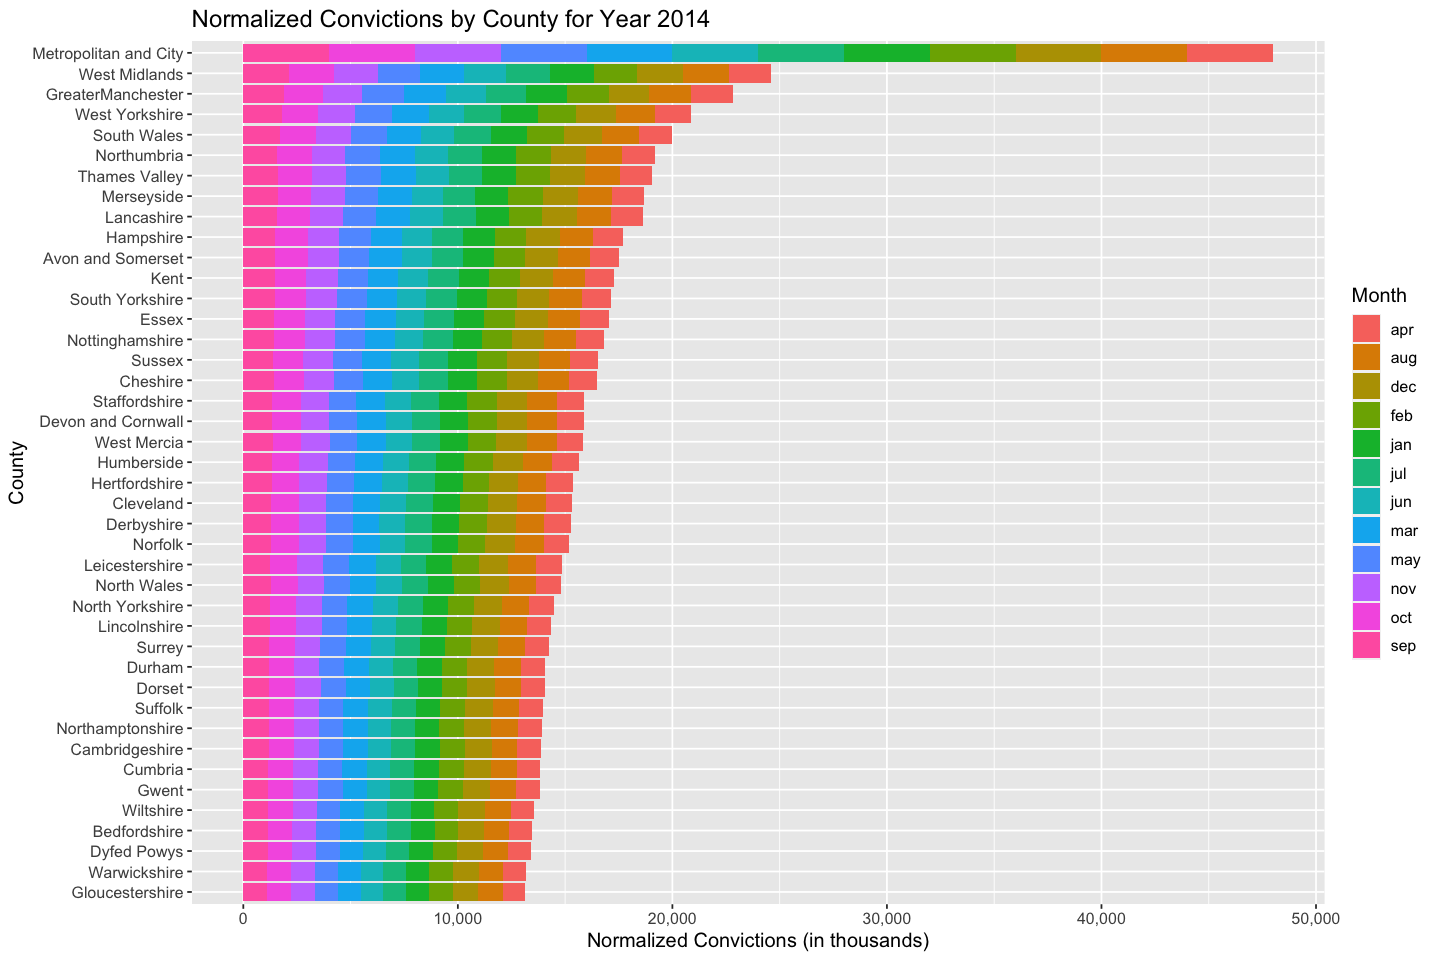

In [160]:
plot_graph(conv_crime_data, "2014")

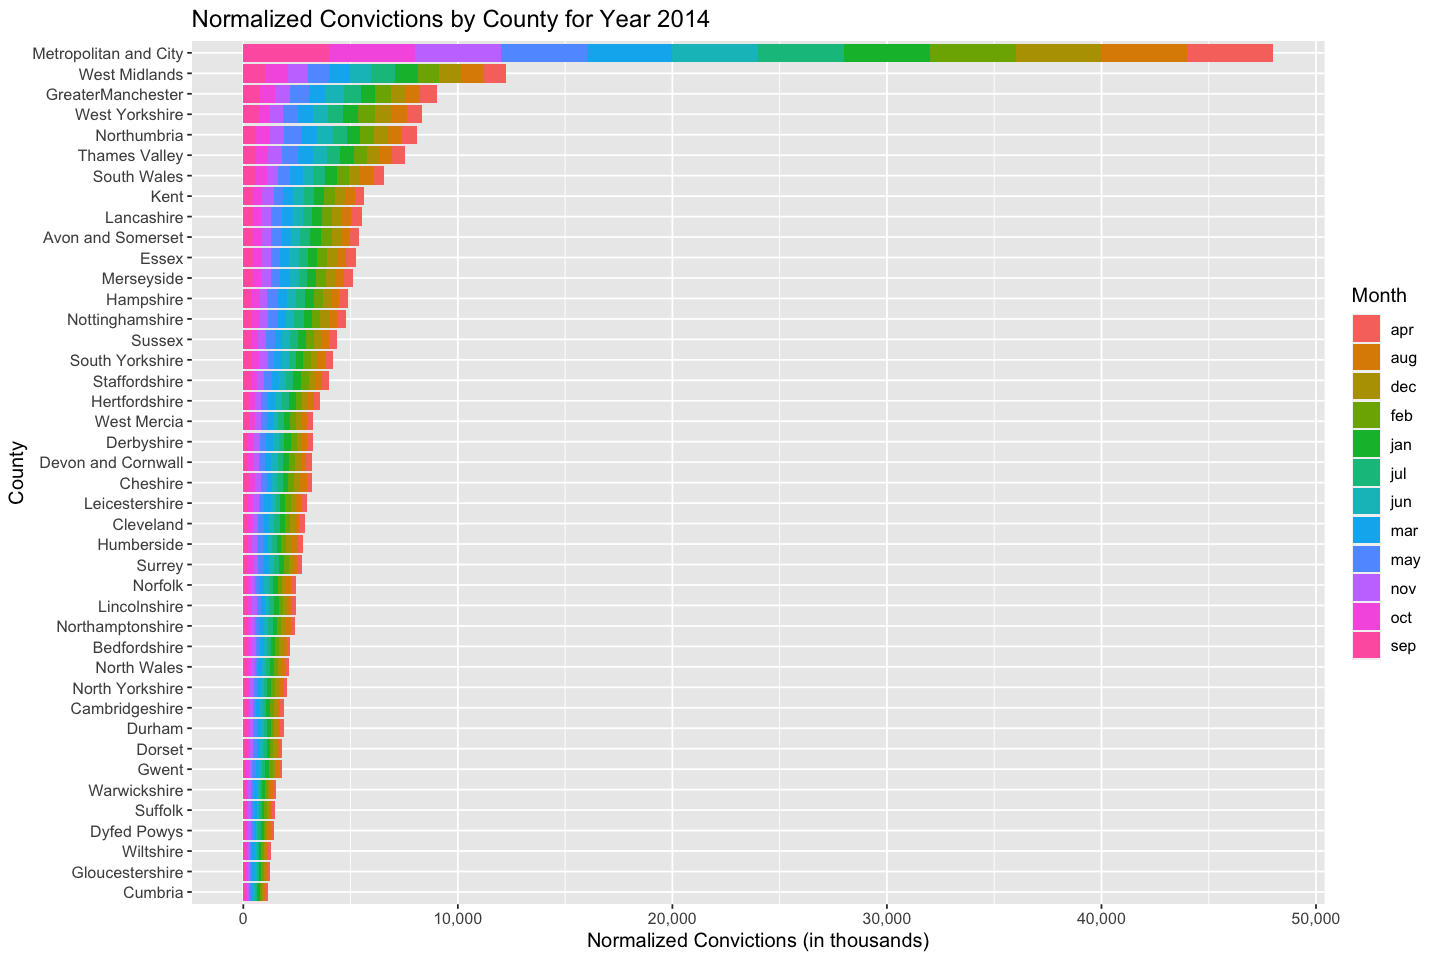

In [161]:
plot_graph(unsuccesful_crime_data, "2014")

### 2015

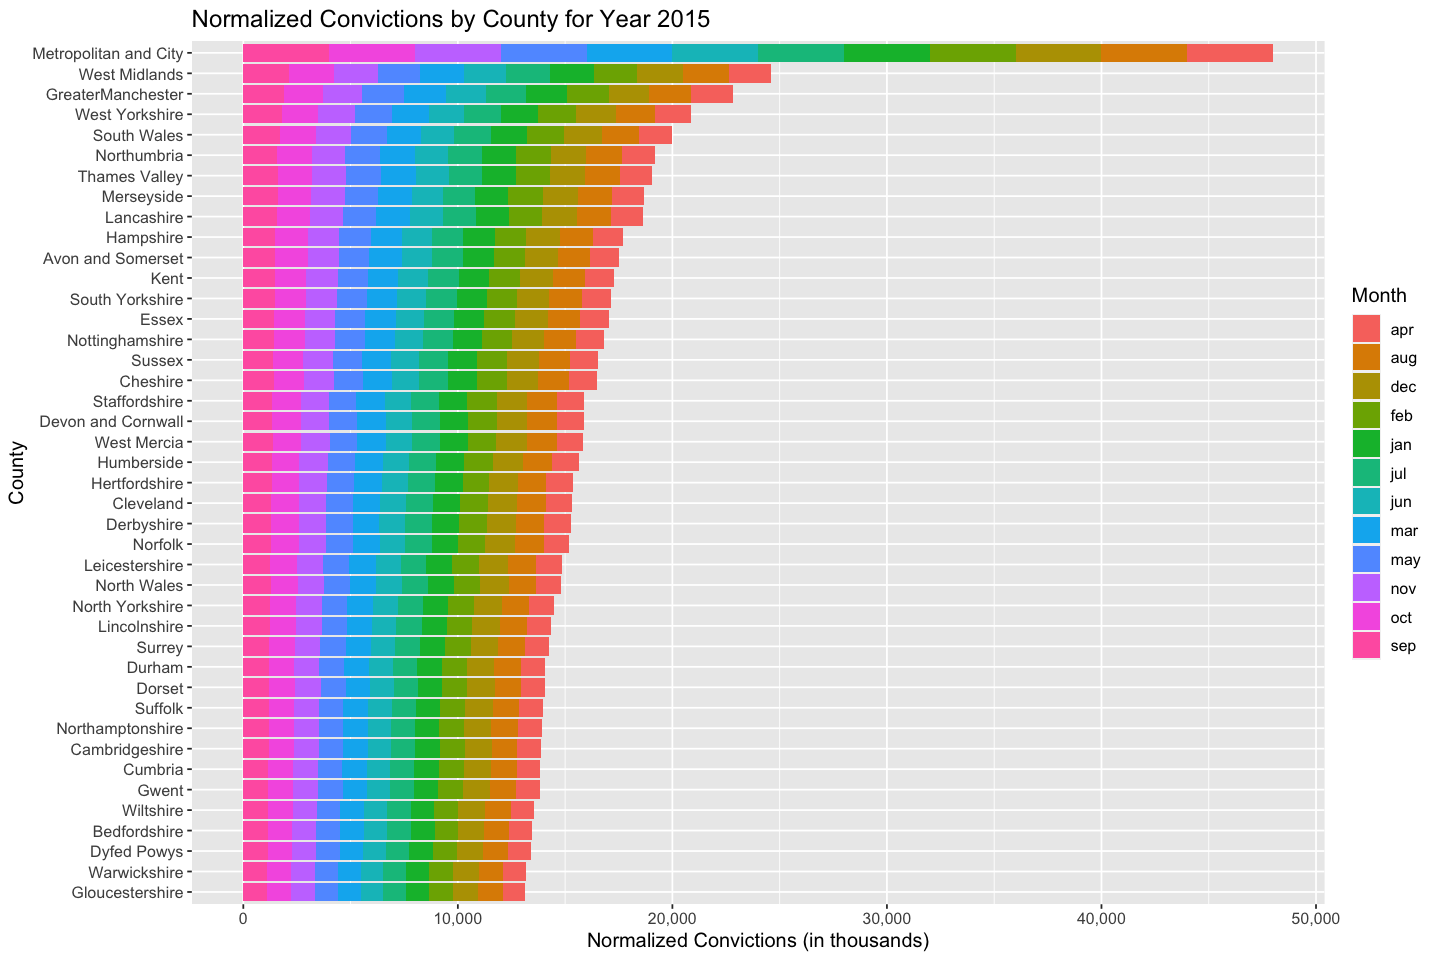

In [162]:
plot_graph(conv_crime_data, "2015")

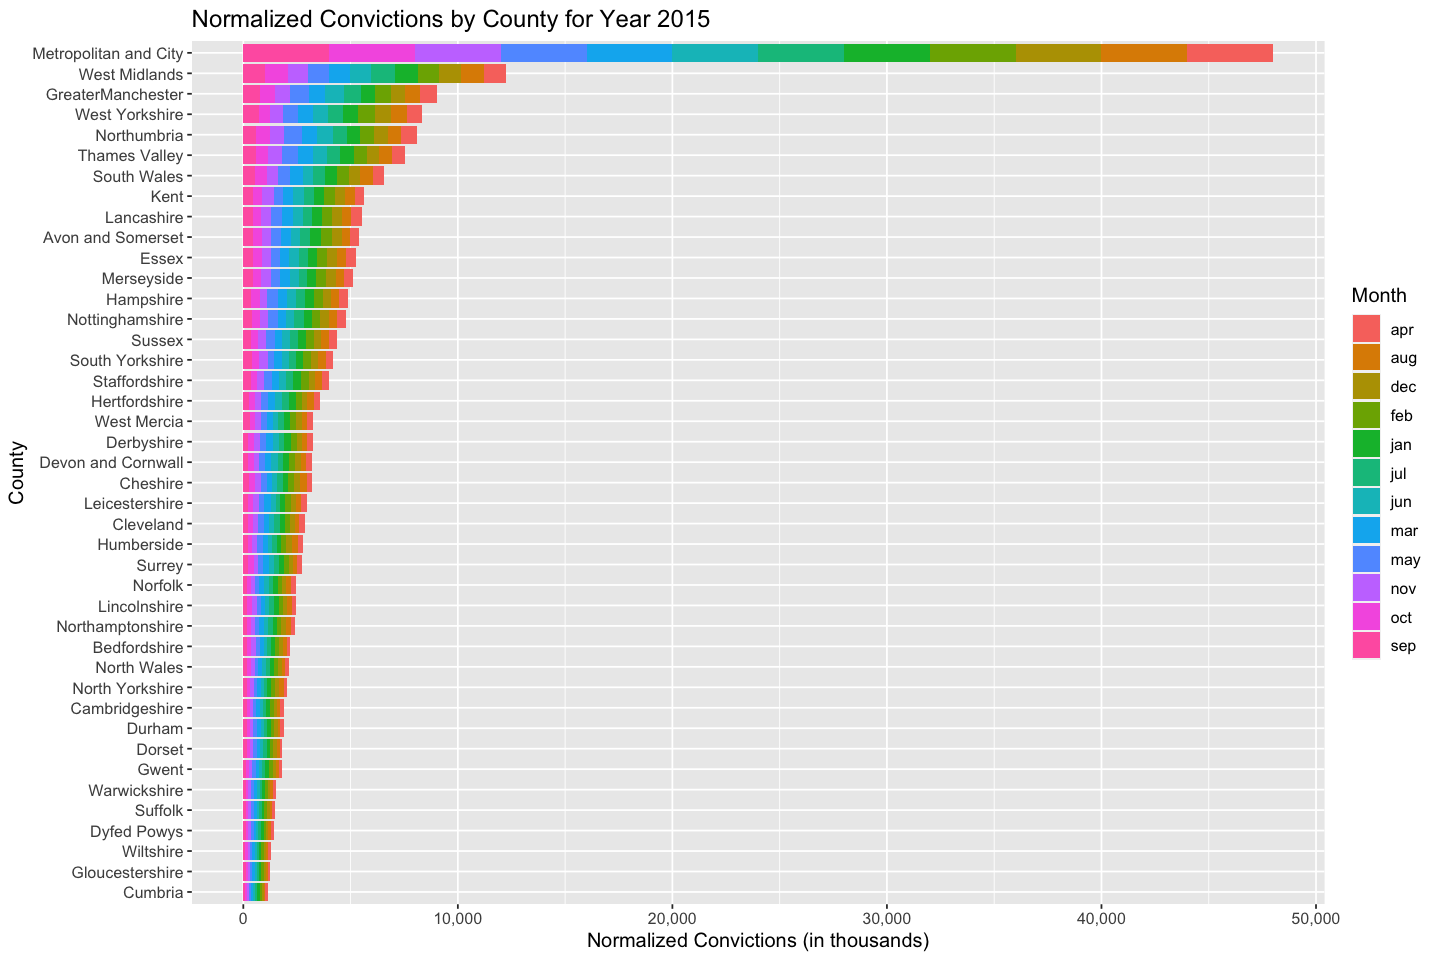

In [163]:
plot_graph(unsuccesful_crime_data, "2015")

### 2016

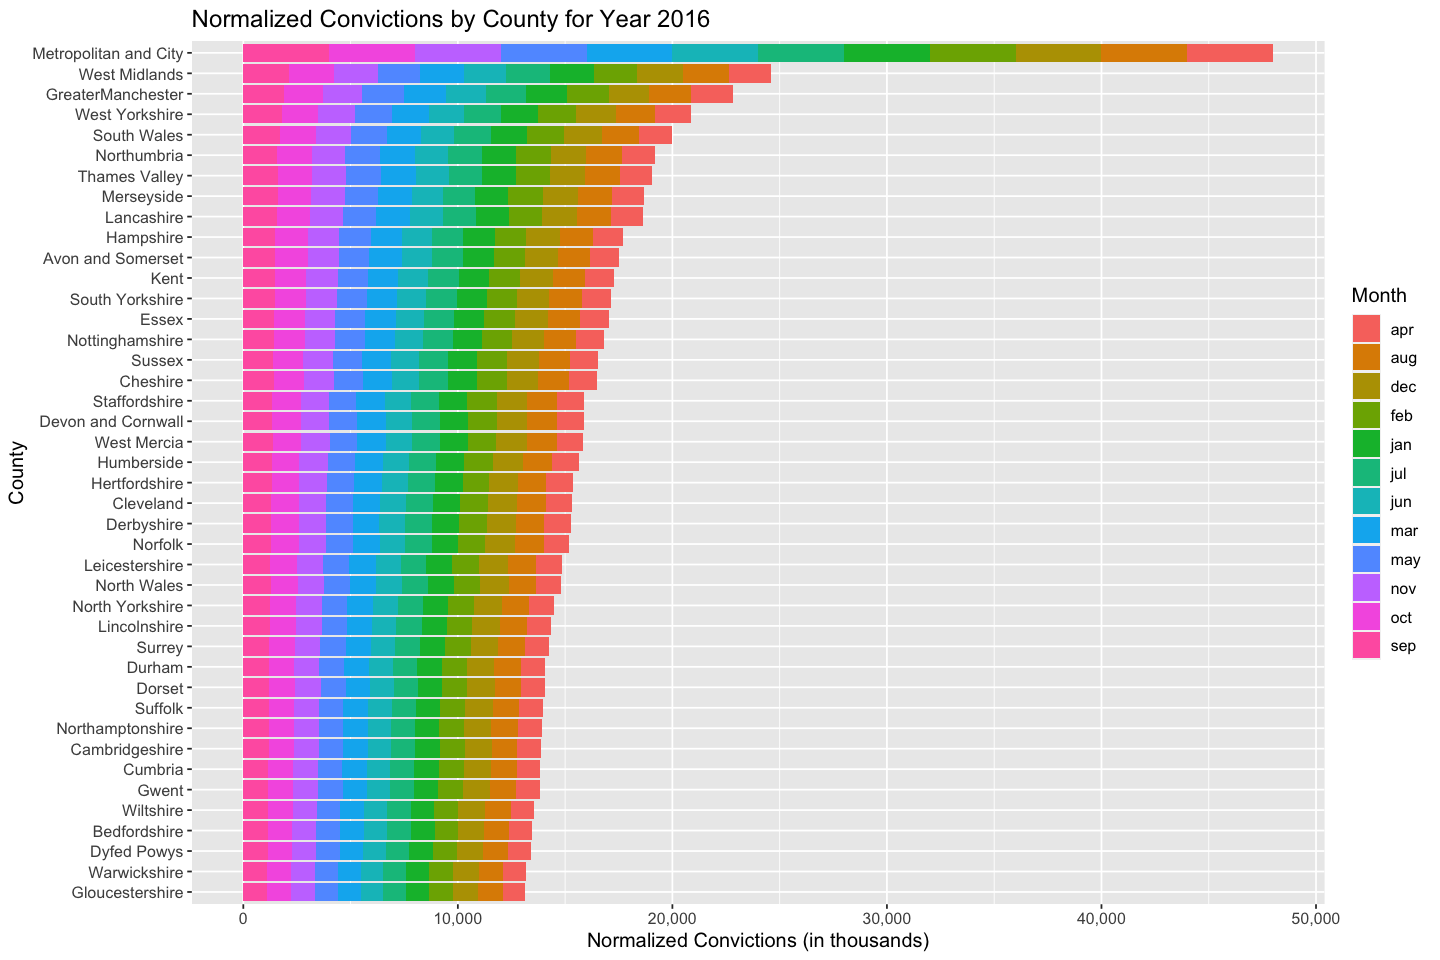

In [164]:
plot_graph(conv_crime_data, "2016")

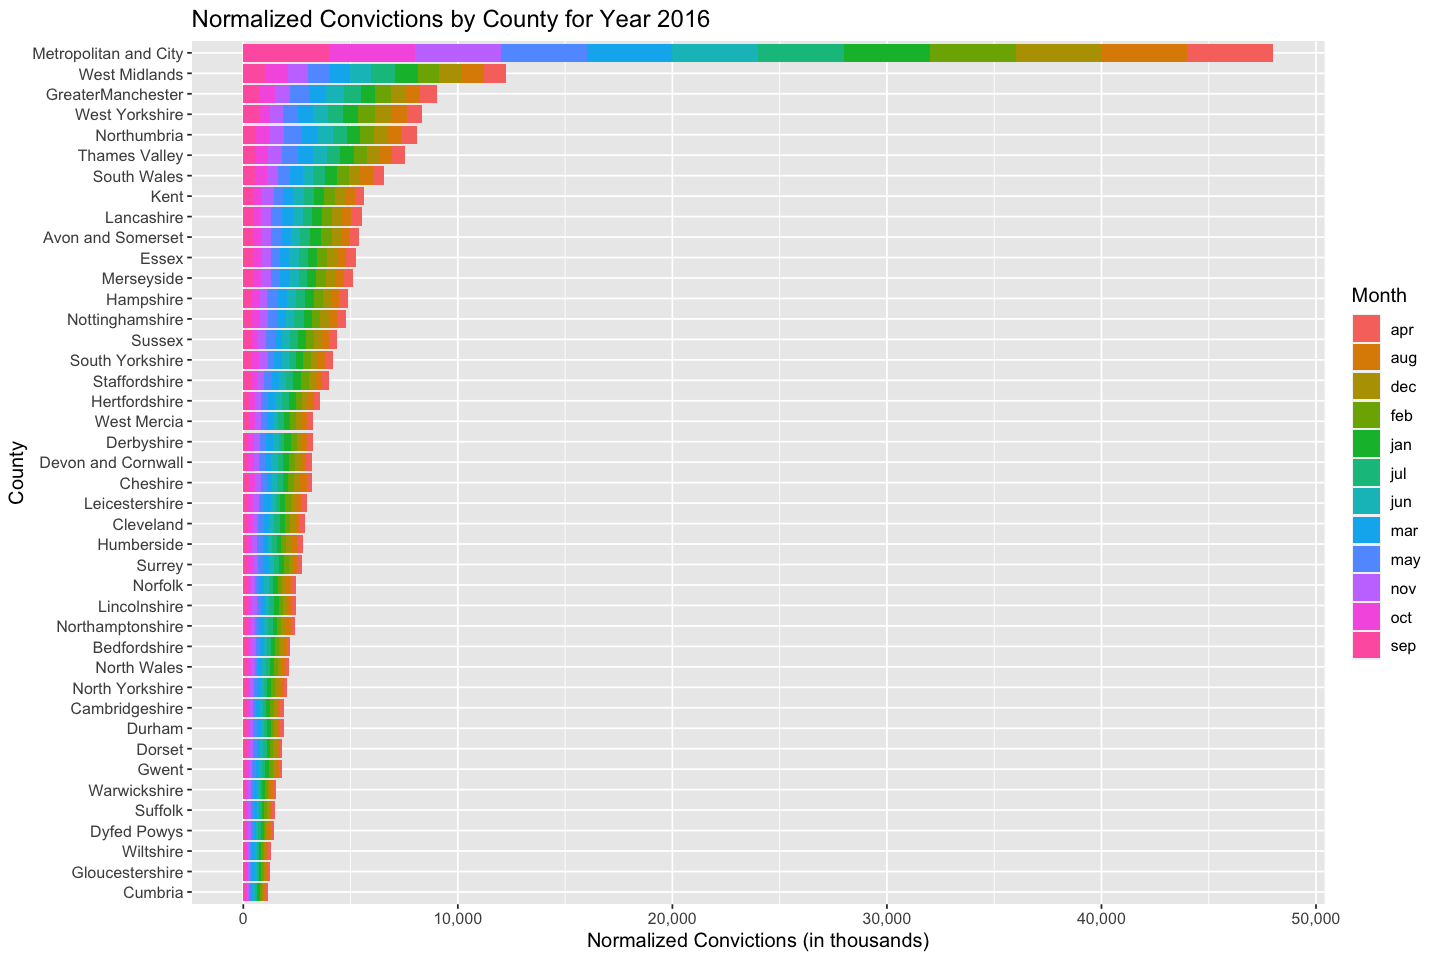

In [165]:
plot_graph(unsuccesful_crime_data, "2016")

### 2017

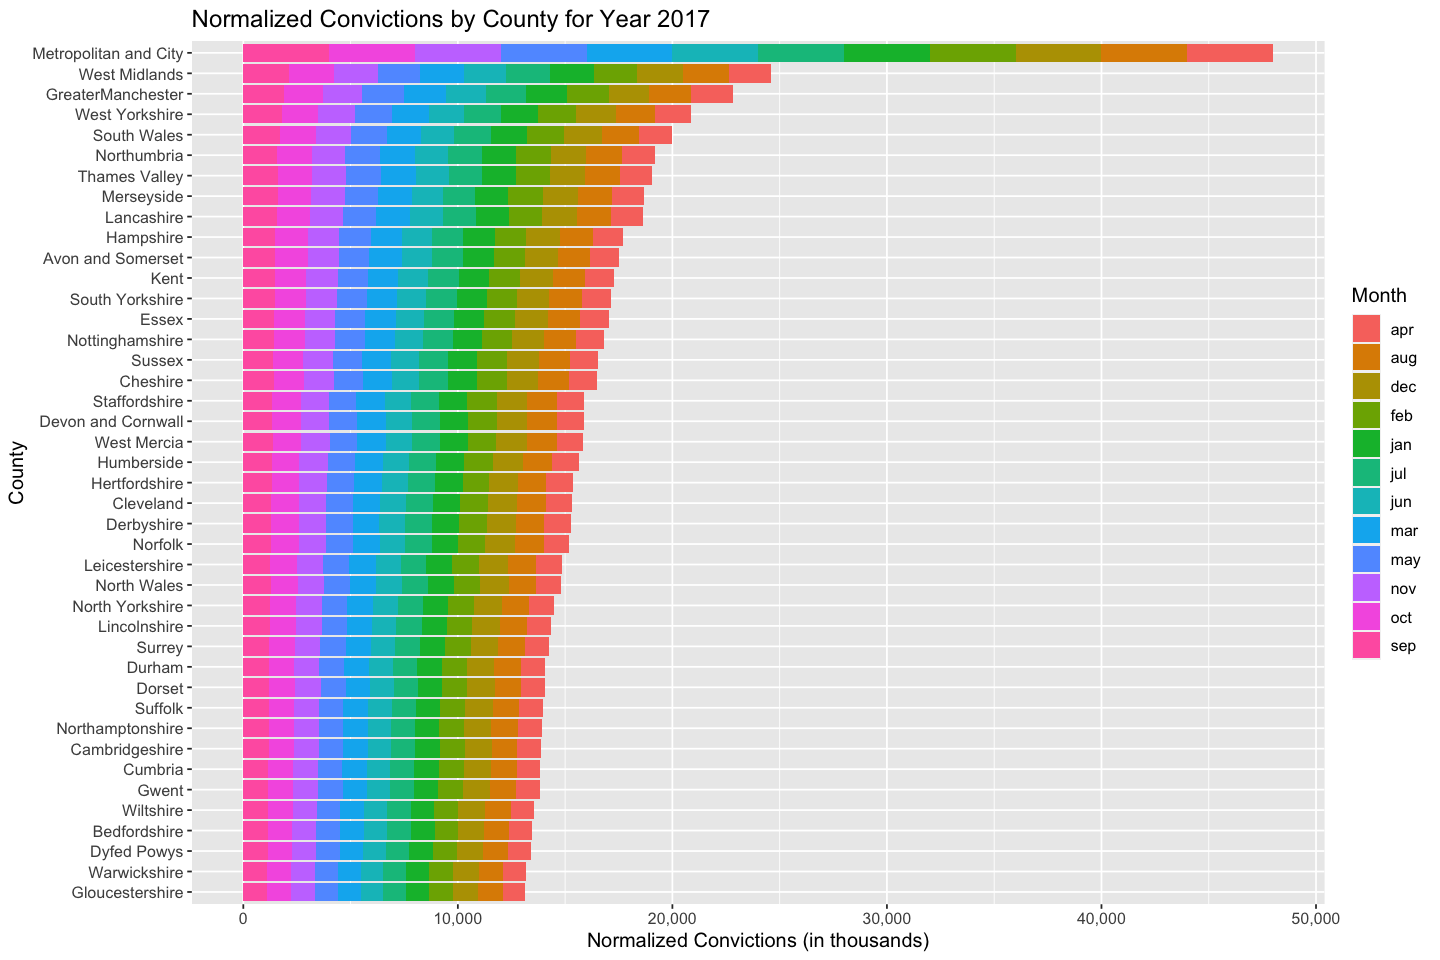

In [166]:
plot_graph(conv_crime_data, "2017")

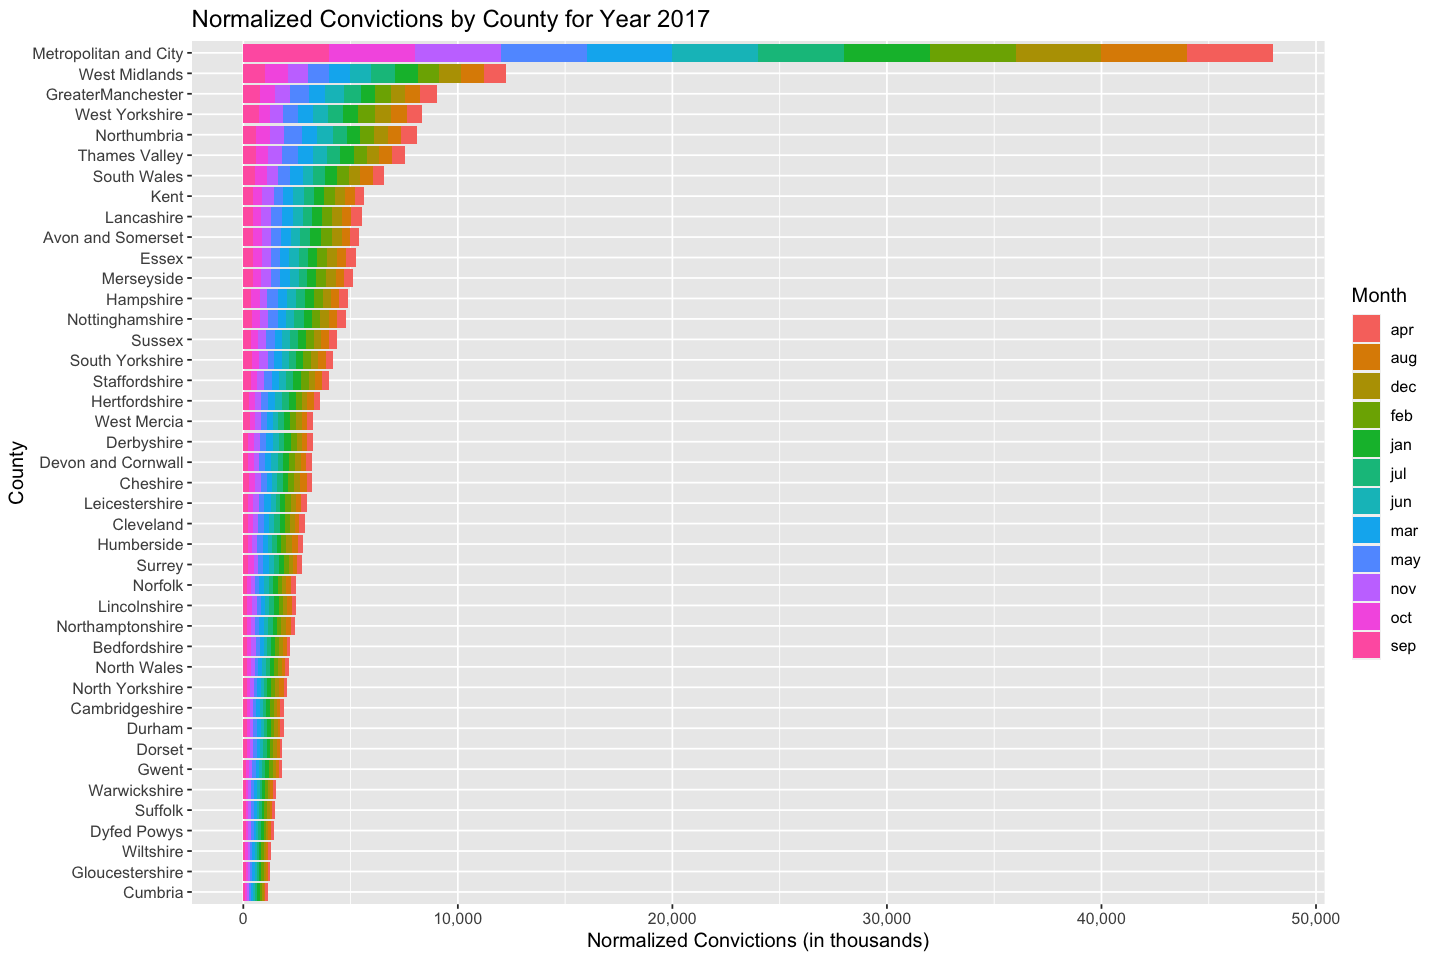

In [167]:
plot_graph(unsuccesful_crime_data, "2017")

### 2018

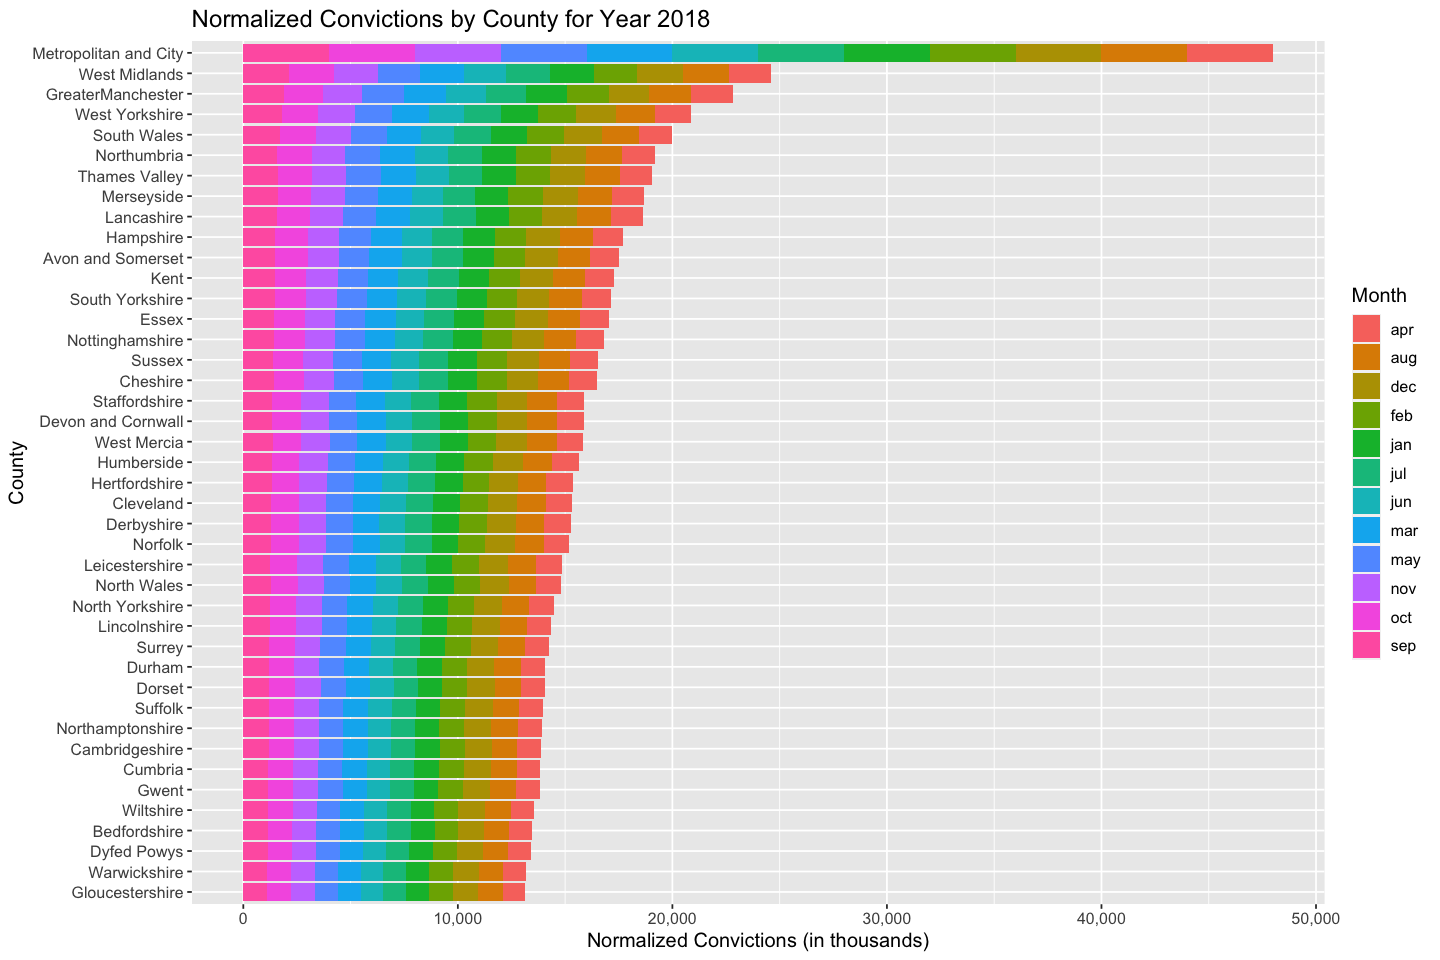

In [168]:
plot_graph(conv_crime_data, "2018")

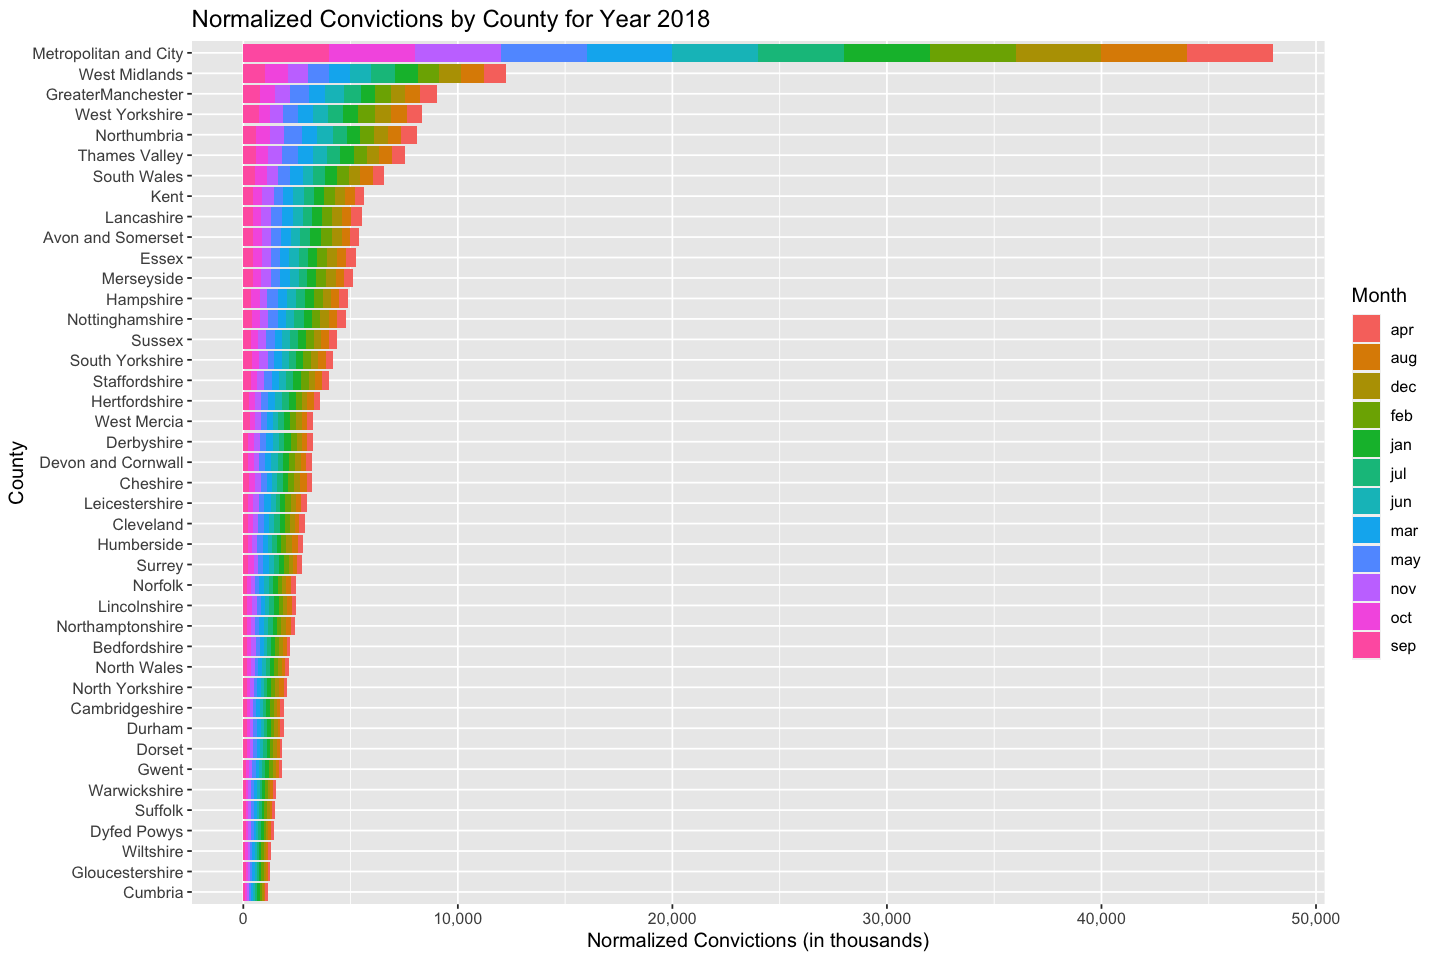

In [169]:
plot_graph(unsuccesful_crime_data, "2018")

In [170]:
#df from the manipualted 2014

df_total_sum_conv_dtframe

crimeoffence_category                        sum   
1  homicide_conv                                  1462
2  offences_against_the_person_conv             210246
3  sexual_offences_conv                          18708
4  burglary_conv                                 37148
5  robbery_conv                                  12912
6  theft_and_handling_conv                      242162
7  fraud_and_forgery_conv                        17786
8  criminal_damage_conv                          58484
9  drugs_offences_conv                          108420
10 public_order_offences_conv                    98016
11 all_other_offences__excluding_motoring__conv  64918
12 motoring_offences_conv                       221144

### Total Convictions - Offence Category for the 2014

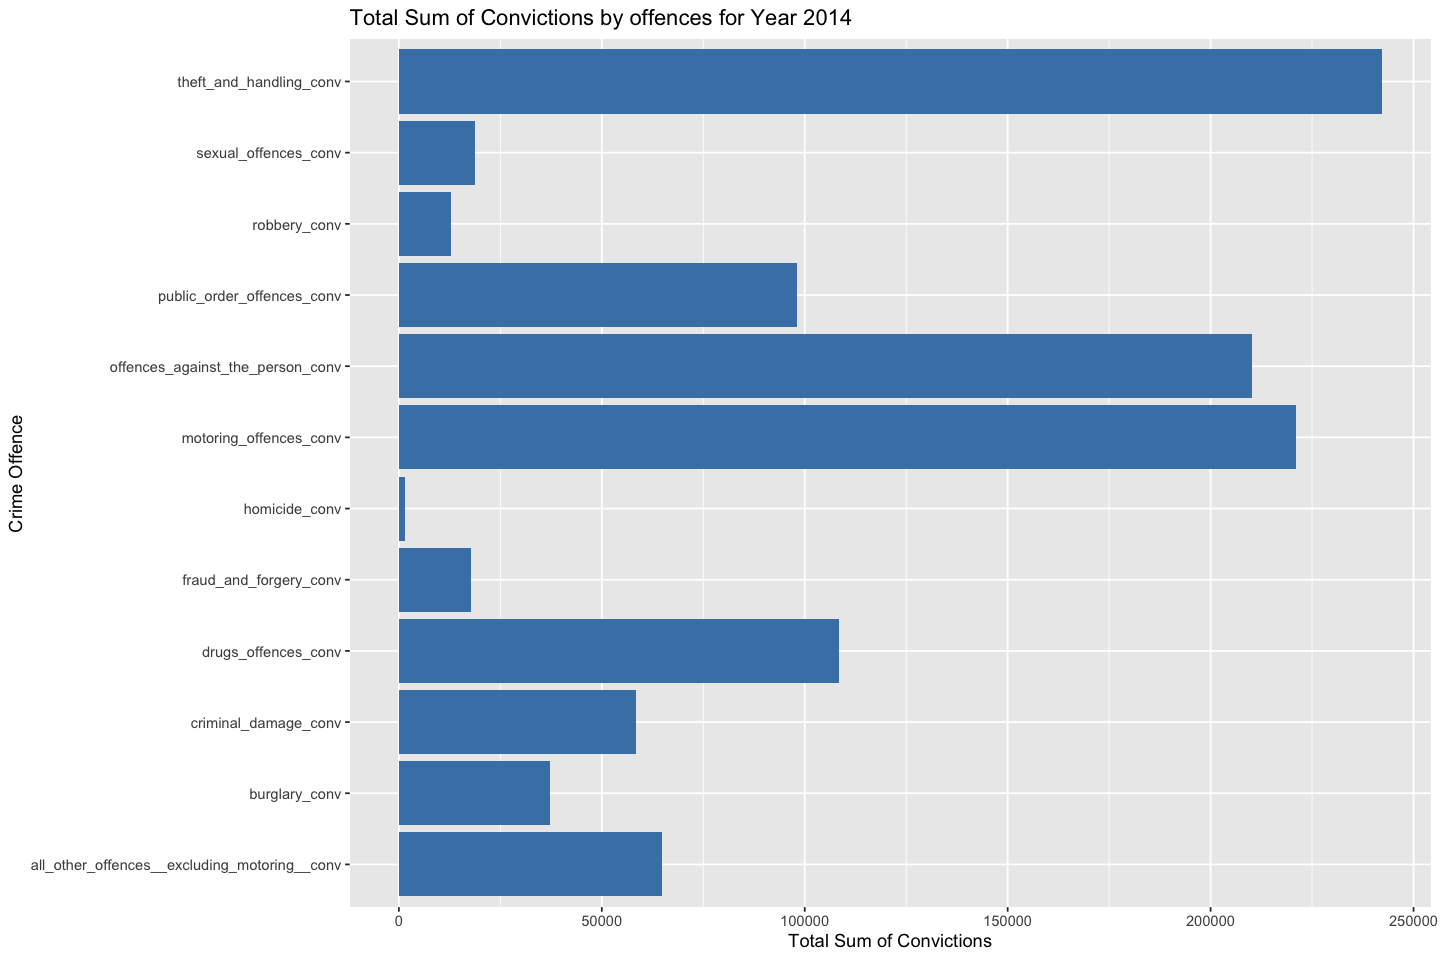

In [171]:
#plot the total sum of convictions for the year 2014

ggplot(df_total_sum_conv_dtframe, aes(x = sum, y = crimeoffence_category)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Total Sum of Convictions", y = "Crime Offence") +
  ggtitle("Total Sum of Convictions by offences for Year 2014")

According to the plot above, `theft and handling` highest convictions rate with 242,162 convictions in 2014, while `homicide` is the the lowest with 1,462

### Total Convictions - Offence Category for the 2015

In [172]:
df_total_sum_conv_dtframe2015

crimeoffence_category                        sum   
1  homicide_conv                                  1526
2  offences_against_the_person_conv             223694
3  sexual_offences_conv                          20204
4  burglary_conv                                 30598
5  robbery_conv                                   9764
6  theft_and_handling_conv                      199438
7  fraud_and_forgery_conv                        17452
8  criminal_damage_conv                          51360
9  drugs_offences_conv                           92088
10 public_order_offences_conv                    81610
11 all_other_offences__excluding_motoring__conv  35188
12 motoring_offences_conv                       177924

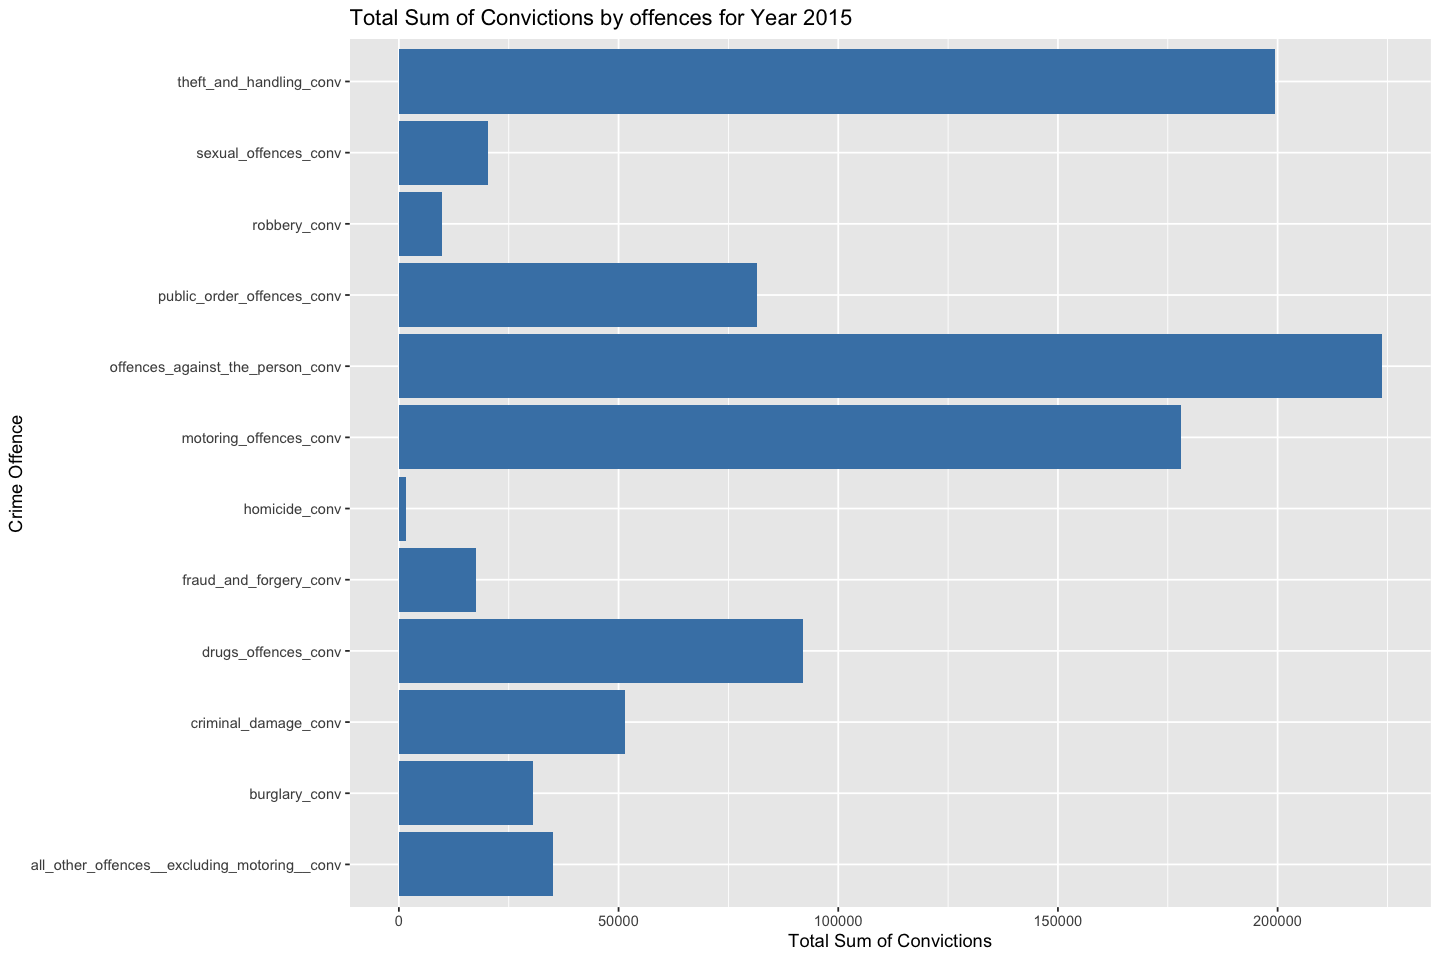

In [173]:
#plot the total sum of convictions for the year 2015

ggplot(df_total_sum_conv_dtframe2015, aes(x = sum, y = crimeoffence_category)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Total Sum of Convictions", y = "Crime Offence") +
  ggtitle("Total Sum of Convictions by offences for Year 2015")

The category with the highest convictions rate in 2015 is `offences against the person` with 223,694 convictions,  while `homicide` is the the lowest with 1,526

### Total Convictions - Offence Category for the 2016

In [174]:
df_total_sum_conv_dtframe2016

crimeoffence_category                        sum   
1  homicide_conv                                  1998
2  offences_against_the_person_conv             212282
3  sexual_offences_conv                          21536
4  burglary_conv                                 23936
5  robbery_conv                                   7206
6  theft_and_handling_conv                      149446
7  fraud_and_forgery_conv                        18430
8  criminal_damage_conv                          38358
9  drugs_offences_conv                           81194
10 public_order_offences_conv                    66618
11 all_other_offences__excluding_motoring__conv  14654
12 motoring_offences_conv                       147274

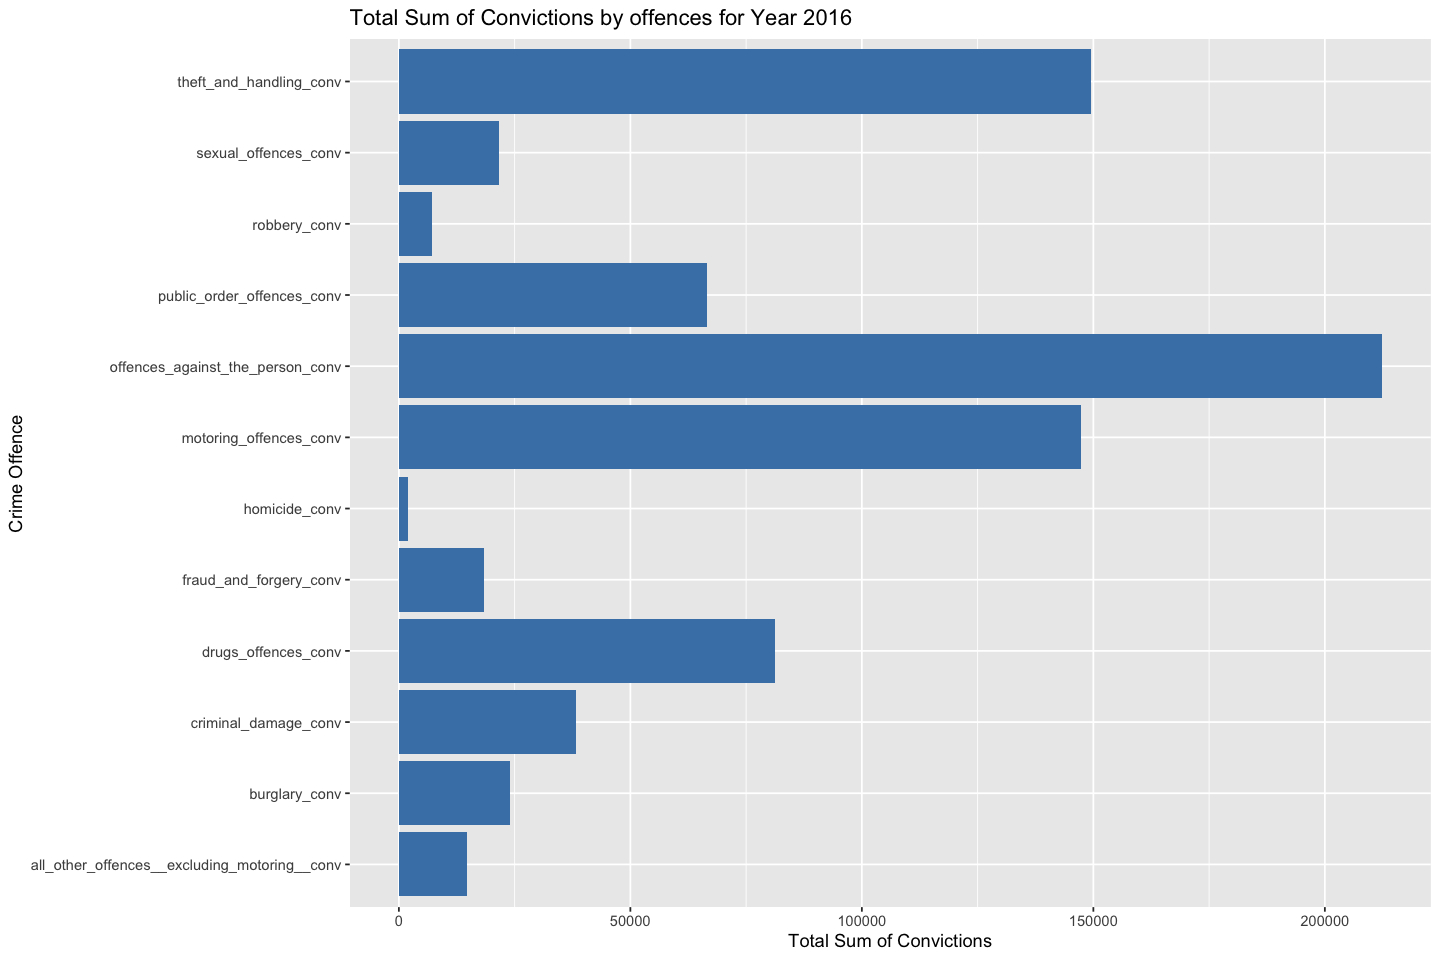

In [175]:
#plot the total sum of convictions for the year 2016

ggplot(df_total_sum_conv_dtframe2016, aes(x = sum, y = crimeoffence_category)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Total Sum of Convictions", y = "Crime Offence") +
  ggtitle("Total Sum of Convictions by offences for Year 2016")

The category with the highest convictions rate in 2016 is `offences against the person` with 212,282 convictions,  while `homicide` is the the lowest with 1,998

### Total Convictions - Offence Category for the 2017

In [176]:
df_total_sum_conv_dtframe2017

crimeoffence_category                        sum   
1  homicide_conv                                  1652
2  offences_against_the_person_conv             179458
3  sexual_offences_conv                          18310
4  burglary_conv                                 20538
5  robbery_conv                                   6250
6  theft_and_handling_conv                      118718
7  fraud_and_forgery_conv                        15838
8  criminal_damage_conv                          31714
9  drugs_offences_conv                           65454
10 public_order_offences_conv                    55860
11 all_other_offences__excluding_motoring__conv  13166
12 motoring_offences_conv                       128486

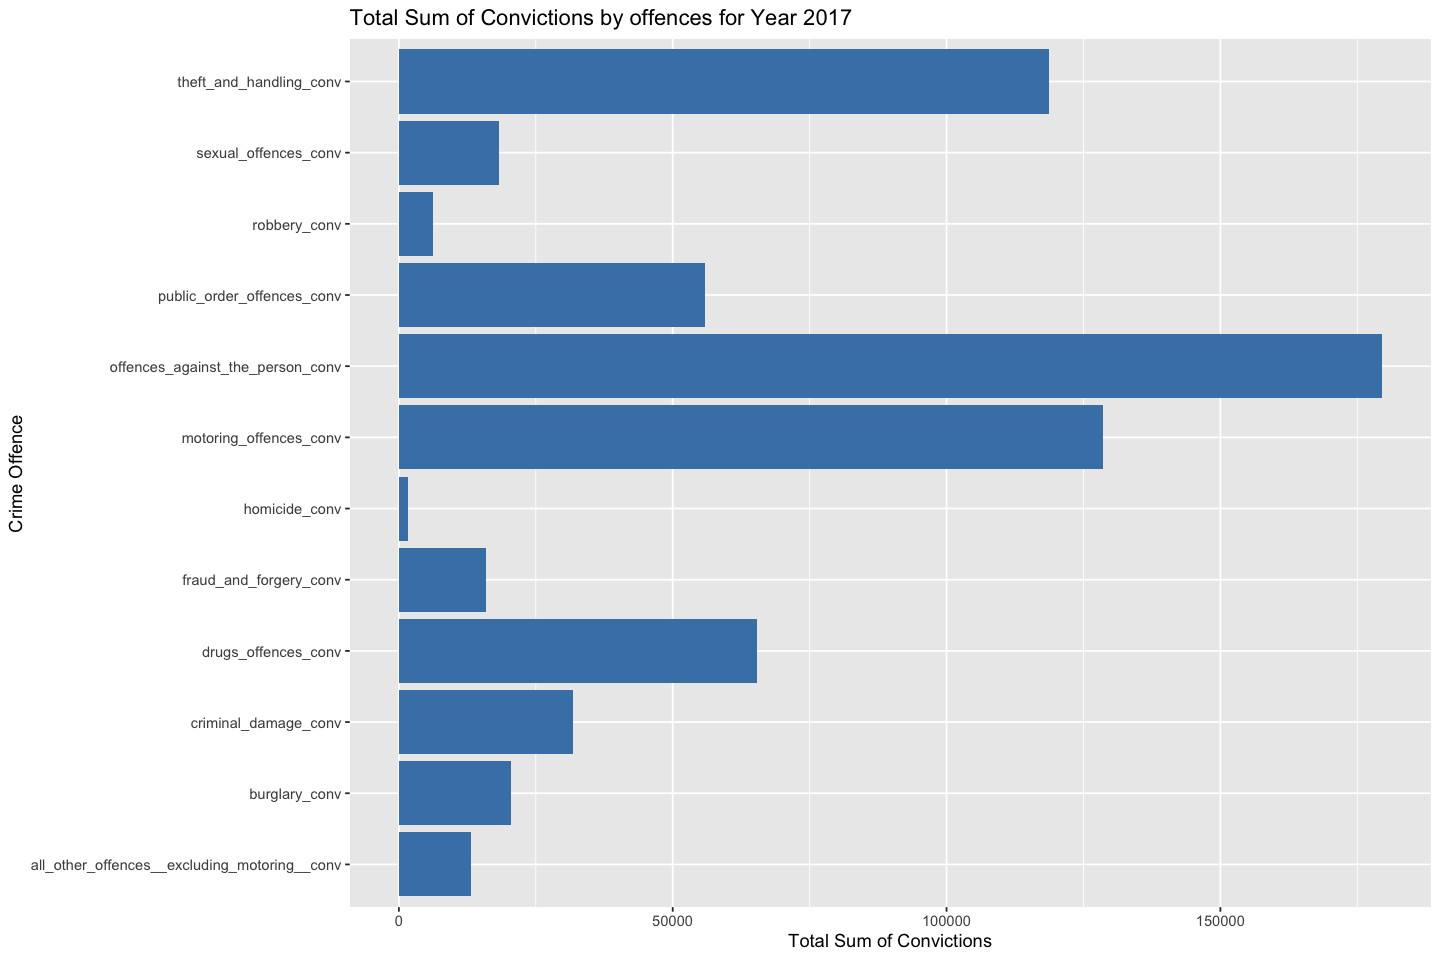

In [177]:
#plot the total sum of convictions for the year 2017

ggplot(df_total_sum_conv_dtframe2017, aes(x = sum, y = crimeoffence_category)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Total Sum of Convictions", y = "Crime Offence") +
  ggtitle("Total Sum of Convictions by offences for Year 2017")

The category with the highest convictions rate in 2017 is `offences against the person` with 179,458 convictions,  while `homicide` is the the lowest with 1,652

### Total Convictions - Offence Category for the 2018

In [178]:
df_total_sum_conv_dtframe2018

crimeoffence_category                        sum   
1  homicide_conv                                  1466
2  offences_against_the_person_conv             151452
3  sexual_offences_conv                          15324
4  burglary_conv                                 17170
5  robbery_conv                                   5532
6  theft_and_handling_conv                       95444
7  fraud_and_forgery_conv                        13286
8  criminal_damage_conv                          26688
9  drugs_offences_conv                           54872
10 public_order_offences_conv                    47674
11 all_other_offences__excluding_motoring__conv  11672
12 motoring_offences_conv                       112102

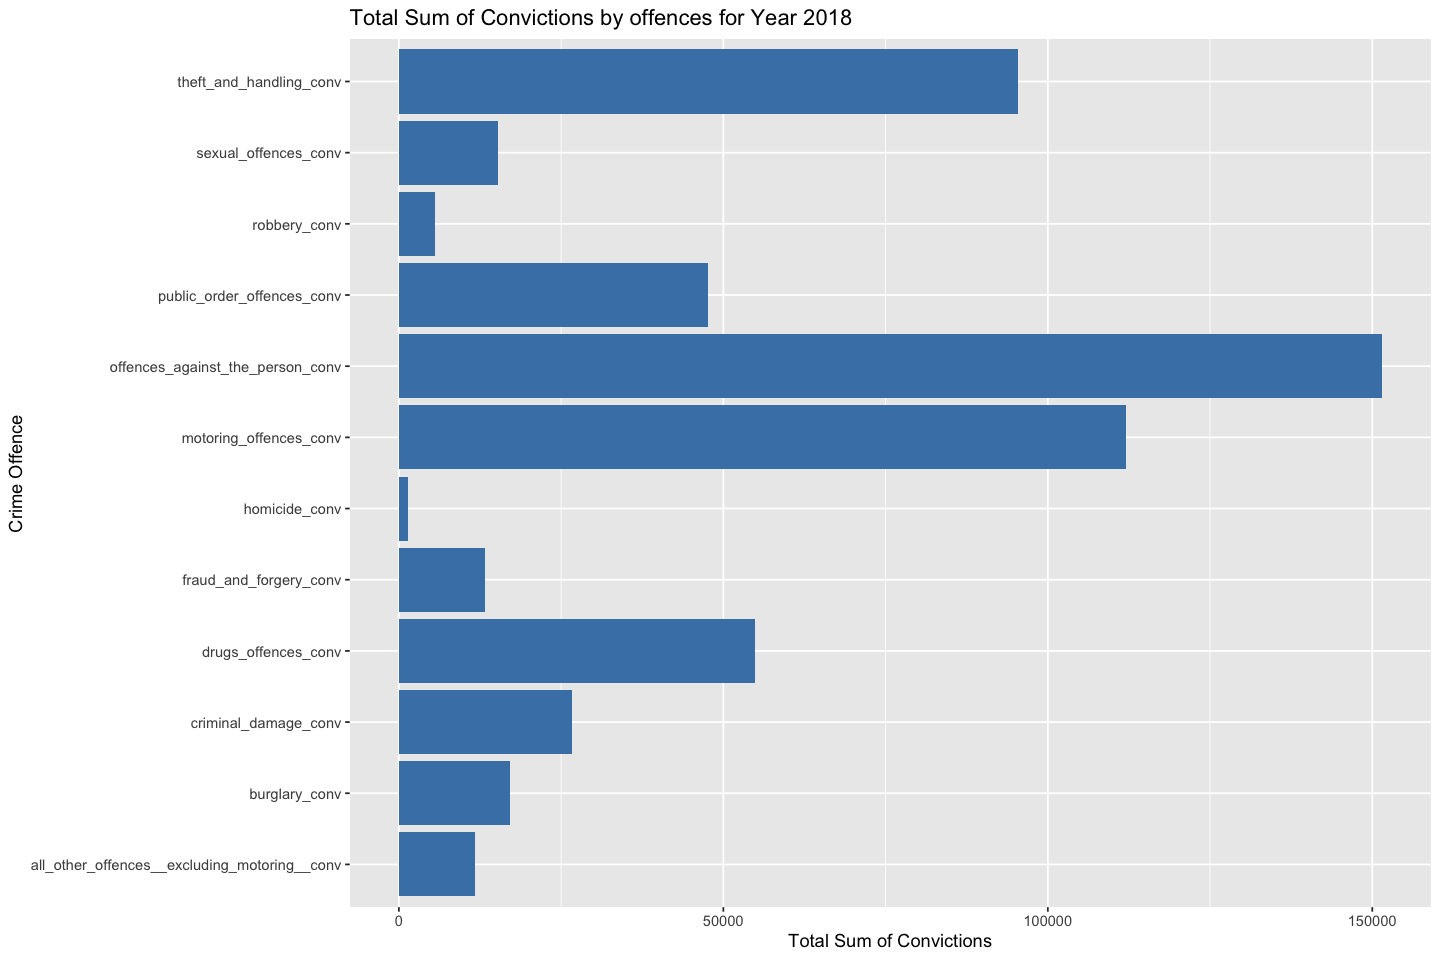

In [179]:
#plot the total sum of convictions for the year 2018

ggplot(df_total_sum_conv_dtframe2018, aes(x = sum, y = crimeoffence_category)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Total Sum of Convictions", y = "Crime Offence") +
  ggtitle("Total Sum of Convictions by offences for Year 2018")

The category with the highest convictions rate in 2017 is `offences against the person` with 151,452 convictions,  while `homicide` is the the lowest with 1,466

From 2014 to 2018, `offences against the person` is high comapred to other convictions category, while the `homicide is low across the years.

---------------------------------------------------------------------------------------------------------------------------------------------------------

### Total Unsuccessful Outcomes for Offences in 2014

In [180]:
df_total_sum_unsuc_dtframe2014

unsuccessful_crime_category                   sum  
1  homicide_unsuc                                  376
2  offences_against_the_person_unsuc             71716
3  sexual_offences_unsuc                          7658
4  burglary_unsuc                                 6510
5  robbery_unsuc                                  3540
6  theft_and_handling_unsuc                      22912
7  fraud_and_forgery_unsuc                        2886
8  criminal_damage_unsuc                         10284
9  drugs_offences_unsuc                           7188
10 public_order_offences_unsuc                   17318
11 all_other_offences__excluding_motoring__unsuc 12658
12 motoring_offences_unsuc                       33040
13 admin_finalised_unsuc                         18136

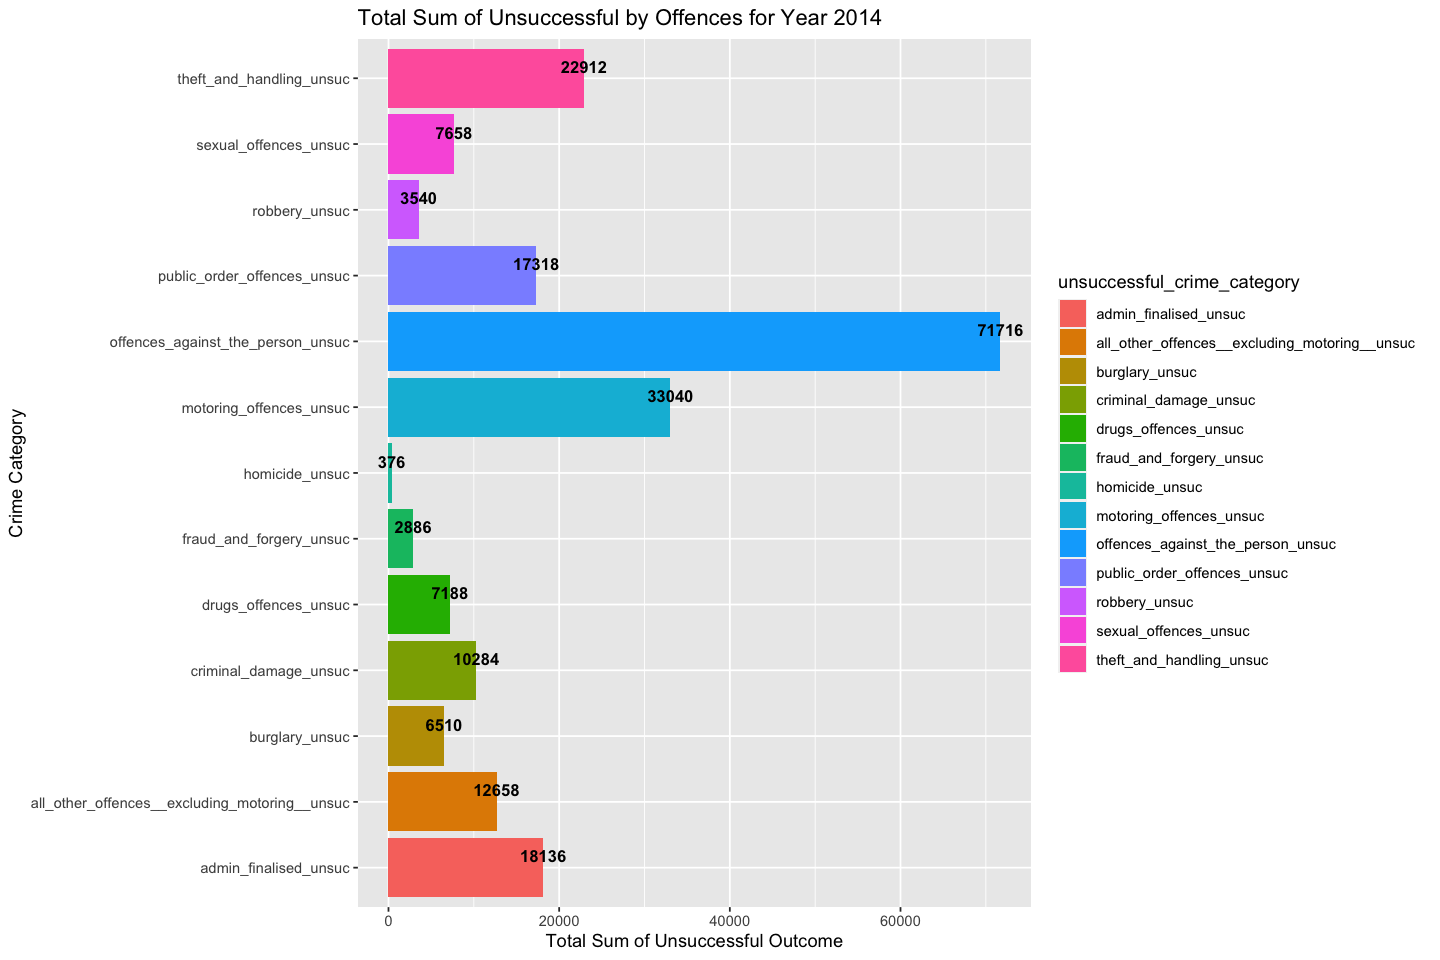

In [181]:
#Plot the total sum of unsuccessful outcome for the year 2014

ggplot(df_total_sum_unsuc_dtframe2014, aes(x = sum, y = unsuccessful_crime_category, fill = unsuccessful_crime_category)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sum), vjust = -0.5, color = "black", size = 3.5, fontface = "bold") +
  labs(x = "Total Sum of Unsuccessful Outcome", y = "Crime Category") +
  ggtitle("Total Sum of Unsuccessful by Offences for Year 2014")


From the plot above, we can see that the crime category that has the highest unsuccessful outcomes for 2014 is `offences against the person` with a total number of `71716`, while the lowest is `homicide` with `376`

### Total Unsuccessful Outcomes for Offences in 2015

In [182]:
df_total_sum_unsuc_dtframe2015

unsuccessful_crime_category                   sum  
1  homicide_unsuc                                  364
2  offences_against_the_person_unsuc             71472
3  sexual_offences_unsuc                          7828
4  burglary_unsuc                                 5588
5  robbery_unsuc                                  2684
6  theft_and_handling_unsuc                      18336
7  fraud_and_forgery_unsuc                        3098
8  criminal_damage_unsuc                          9040
9  drugs_offences_unsuc                           6170
10 public_order_offences_unsuc                   14918
11 all_other_offences__excluding_motoring__unsuc  7232
12 motoring_offences_unsuc                       32270
13 admin_finalised_unsuc                         18116

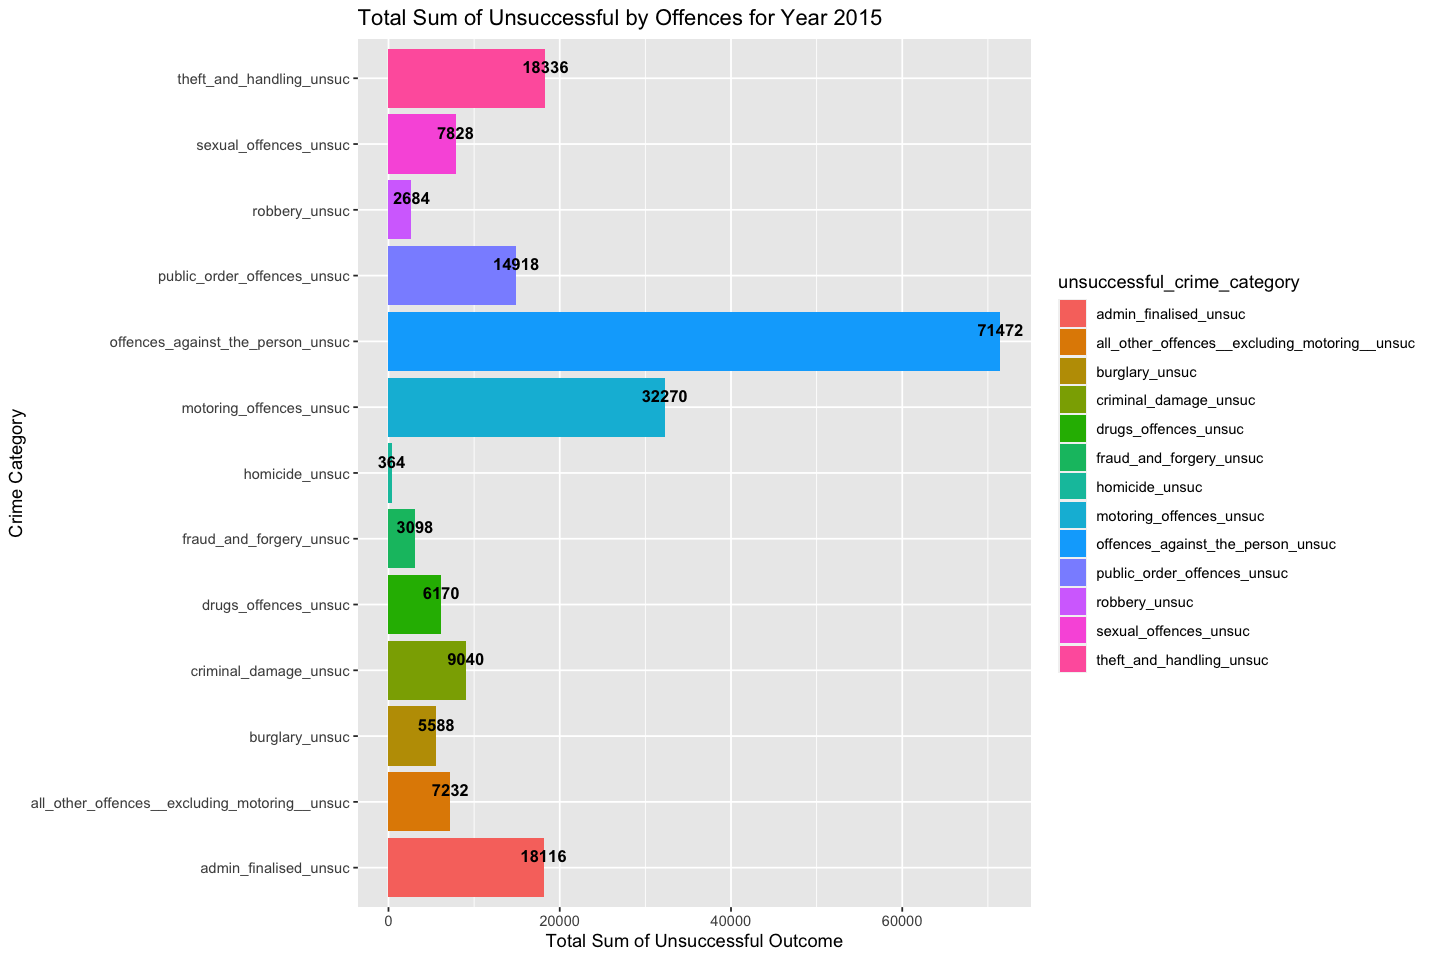

In [183]:
ggplot(df_total_sum_unsuc_dtframe2015, aes(x = sum, y = unsuccessful_crime_category, fill = unsuccessful_crime_category)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sum), vjust = -0.5, color = "black", size = 3.5, fontface = "bold") +
  labs(x = "Total Sum of Unsuccessful Outcome", y = "Crime Category") +
  ggtitle("Total Sum of Unsuccessful by Offences for Year 2015")

The above plot shows that the highest category of unsuccessful crime is `offences_agauinst_the_person` with the total number of `71472`, and the lowest is `homicide` with `364` cases

### Total Unsuccessful Outcomes for Offences in 2016

In [184]:
df_total_sum_unsuc_dtframe2016

unsuccessful_crime_category                   sum  
1  homicide_unsuc                                  468
2  offences_against_the_person_unsuc             59818
3  sexual_offences_unsuc                          7836
4  burglary_unsuc                                 4210
5  robbery_unsuc                                  1906
6  theft_and_handling_unsuc                      13006
7  fraud_and_forgery_unsuc                        2984
8  criminal_damage_unsuc                          7002
9  drugs_offences_unsuc                           5444
10 public_order_offences_unsuc                   12062
11 all_other_offences__excluding_motoring__unsuc  2378
12 motoring_offences_unsuc                       26192
13 admin_finalised_unsuc                         16444

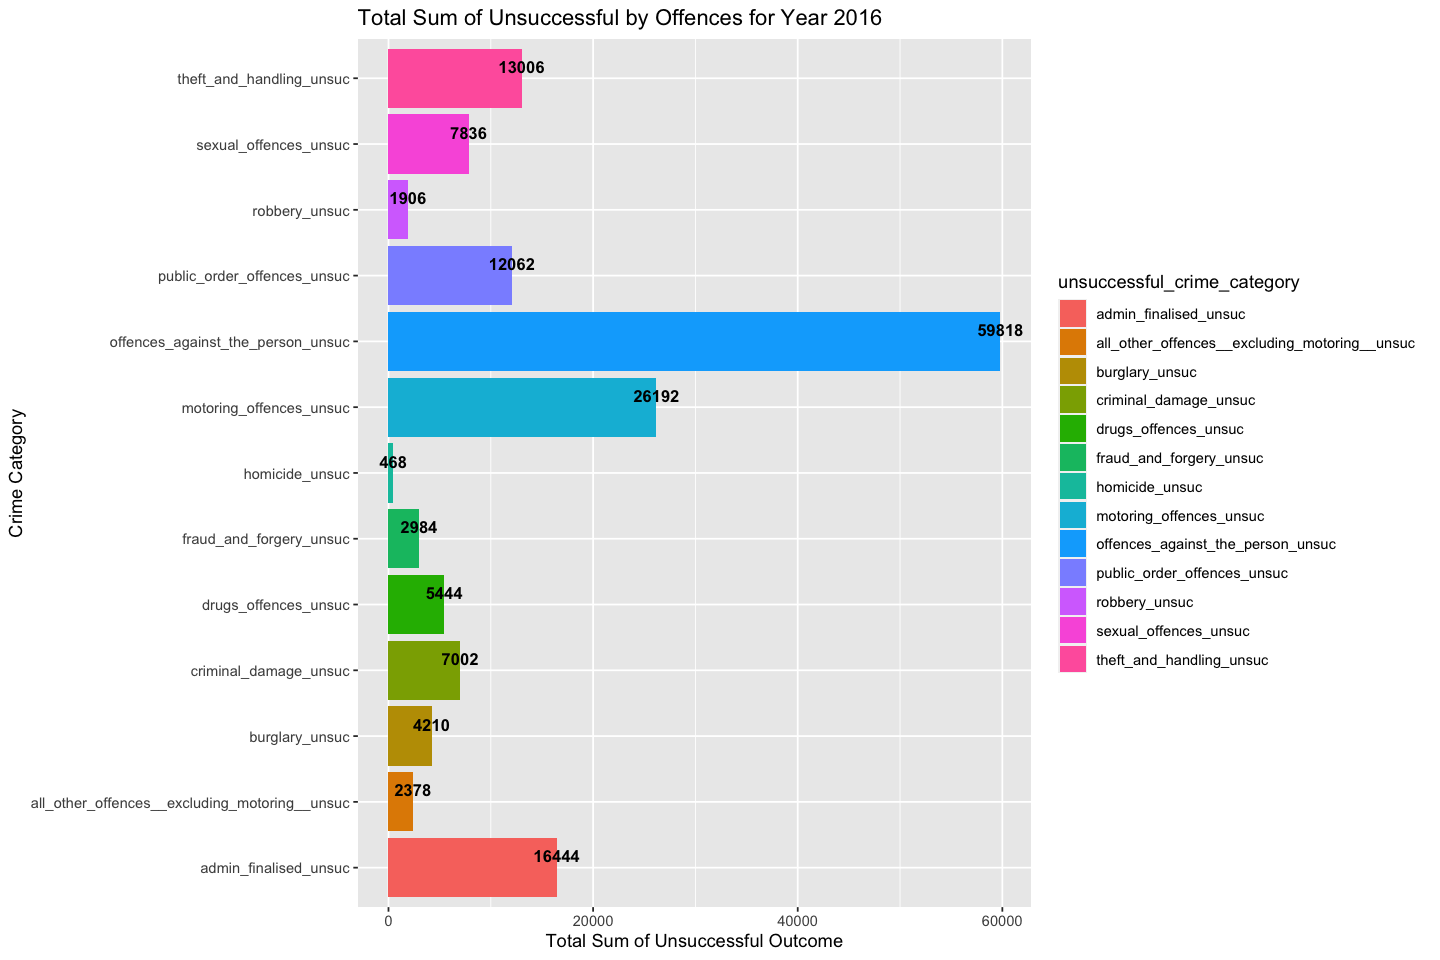

In [185]:
ggplot(df_total_sum_unsuc_dtframe2016, aes(x = sum, y = unsuccessful_crime_category, fill = unsuccessful_crime_category)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sum), vjust = -0.5, color = "black", size = 3.5, fontface = "bold") +
  labs(x = "Total Sum of Unsuccessful Outcome", y = "Crime Category") +
  ggtitle("Total Sum of Unsuccessful by Offences for Year 2016")

The above plot shows that the highest category of unsuccessful crime is `offences_agauinst_the_person` with the total number of `59818`, and the lowest is `homicide` with `468` cases

### Total Unsuccessful Outcomes for Offences in 2017

In [186]:
df_total_sum_unsuc_dtframe2017

unsuccessful_crime_category                   sum  
1  homicide_unsuc                                  404
2  offences_against_the_person_unsuc             48246
3  sexual_offences_unsuc                          6342
4  burglary_unsuc                                 3072
5  robbery_unsuc                                  1646
6  theft_and_handling_unsuc                       9902
7  fraud_and_forgery_unsuc                        2416
8  criminal_damage_unsuc                          4982
9  drugs_offences_unsuc                           4394
10 public_order_offences_unsuc                    9340
11 all_other_offences__excluding_motoring__unsuc  1968
12 motoring_offences_unsuc                       20784
13 admin_finalised_unsuc                         15940

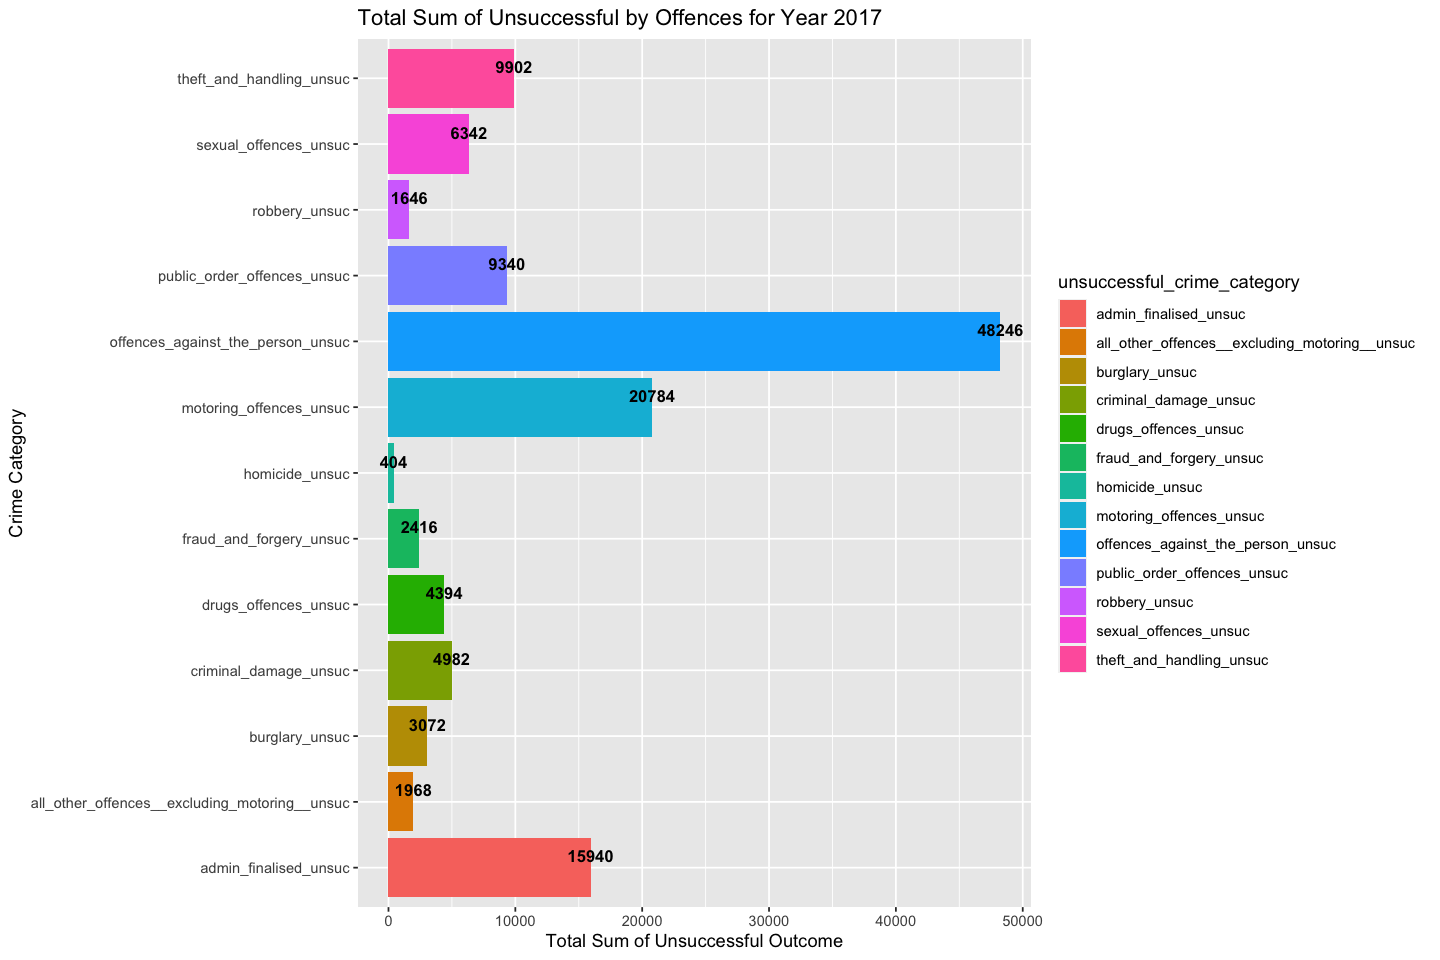

In [187]:
ggplot(df_total_sum_unsuc_dtframe2017, aes(x = sum, y = unsuccessful_crime_category, fill = unsuccessful_crime_category)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sum), vjust = -0.5, color = "black", size = 3.5, fontface = "bold") +
  labs(x = "Total Sum of Unsuccessful Outcome", y = "Crime Category") +
  ggtitle("Total Sum of Unsuccessful by Offences for Year 2017")

The above plot shows that the highest category of unsuccessful crime is `offences_agauinst_the_person` with the total number of `48246`, and the lowest is `homicide` with `404` cases

### Total Unsuccessful Outcomes for Offences in 2018

In [188]:
df_total_sum_unsuc_dtframe2018

unsuccessful_crime_category                   sum  
1  homicide_unsuc                                  328
2  offences_against_the_person_unsuc             40154
3  sexual_offences_unsuc                          5164
4  burglary_unsuc                                 2544
5  robbery_unsuc                                  1390
6  theft_and_handling_unsuc                       8130
7  fraud_and_forgery_unsuc                        2006
8  criminal_damage_unsuc                          4122
9  drugs_offences_unsuc                           3874
10 public_order_offences_unsuc                    7710
11 all_other_offences__excluding_motoring__unsuc  1670
12 motoring_offences_unsuc                       18882
13 admin_finalised_unsuc                         14742

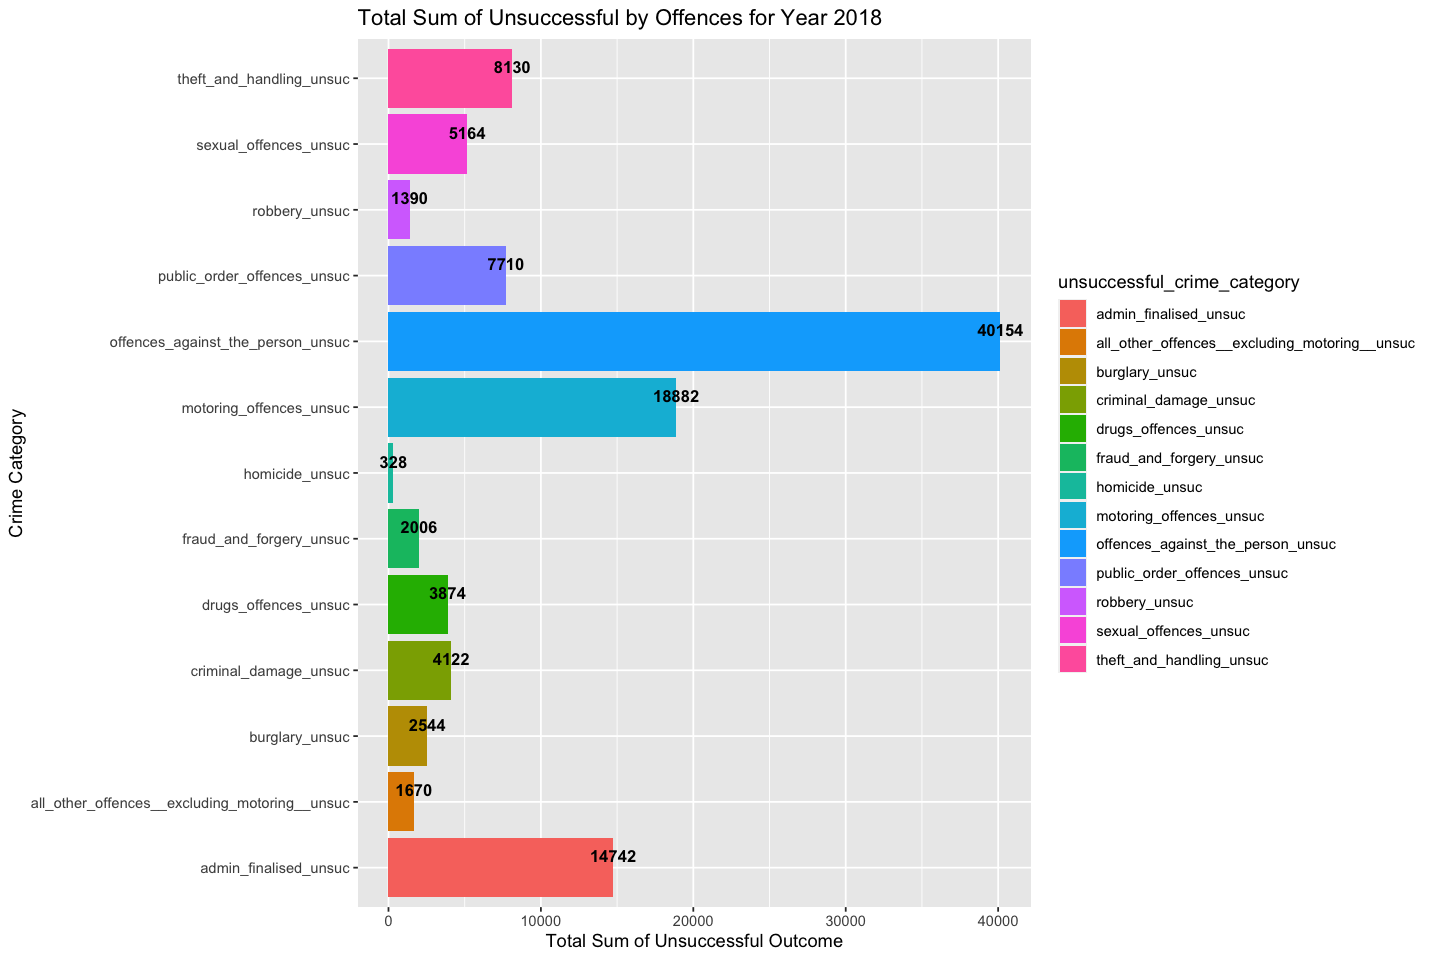

In [189]:
ggplot(df_total_sum_unsuc_dtframe2018, aes(x = sum, y = unsuccessful_crime_category, fill = unsuccessful_crime_category)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sum), vjust = -0.5, color = "black", size = 3.5, fontface = "bold") +
  labs(x = "Total Sum of Unsuccessful Outcome", y = "Crime Category") +
  ggtitle("Total Sum of Unsuccessful by Offences for Year 2018")

The above plot shows that the highest category of unsuccessful crime is `offences_agauinst_the_person` with the total number of `40154`, and the lowest is `homicide` with `328` cases

### Observation from the Unsuccessful category for 2014 - 2018

Based on the trends observed from 2014 to 2018, it can be seen that the highest unsuccessful crime category across these years is "offences against the person," while the lowest is "homicide." This observation suggests some interesting patterns in the data.

Firstly, the consistently high number of unsuccessful crimes related to offences against the person indicates a persistent problem in preventing and deterring such offenses over the years. This category likely includes crimes like assault, robbery, and harassment, which might be more prevalent or challenging to address effectively.

On the other hand, the consistently low number of unsuccessful crimes categorized as homicide suggests a relatively successful track record in solving or preventing this severe crime type. Homicide, being one of the most serious offenses, often receives significant attention and resources from law enforcement agencies, resulting in a higher rate of successful resolution or prevention.

These trends can have several implications. The high number of unsuccessful offences against the person may indicate a need for increased efforts in crime prevention, community safety, and law enforcement strategies. It highlights the importance of addressing underlying social issues, improving security measures, and enhancing investigation techniques to reduce crime rates in this category.

In contrast, the low number of unsuccessful homicides reflects the effectiveness of investigative processes, collaborative efforts, and specialized resources dedicated to handling such serious crimes. It signifies the significance of rigorous investigations, advanced forensic techniques, and dedicated law enforcement units working towards preventing and solving homicides.

Understanding these trends and the variations between different crime categories can aid policymakers, law enforcement agencies, and community organizations in formulating targeted strategies and allocating resources to address the specific challenges associated with different types of crimes.

## Getting Quarterly Insights

### Convicted

In [190]:
head(df_monthly_convicted)

county   region year quarter month yearandmonth homicide_conv
1   National All    2014 Q1 2014 jan   2014-01-01   51           
44  National All    2014 Q1 2014 feb   2014-02-01   61           
87  National All    2014 Q1 2014 mar   2014-03-01   57           
130 National All    2014 Q2 2014 apr   2014-04-01   81           
173 National All    2014 Q2 2014 may   2014-05-01   69           
216 National All    2014 Q2 2014 jun   2014-06-01   61           
    offences_against_the_person_conv sexual_offences_conv burglary_conv
1   9087                             736                  1715         
44  8366                             712                  1549         
87  8595                             731                  1618         
130 7805                             698                  1470         
173 8178                             721                  1562         
216 8444                             778                  1467         
    robbery_conv theft_and_handling_conv fraud_and_forgery_conv
1   522          11057                   846                   
44  541          10150                   758                   
87  569          10716                   814                   
130 517          10045                   666                   
173 532          10146                   754                   
216 512           9938                   708                   
    criminal_damage_conv drugs_offences_conv public_order_offences_conv
1   2693                 4988                4752                      
44  2455                 4565                3787                      
87  2413                 4649                3920                      
130 2259                 4536                3549                      
173 2403                 4510                4022                      
216 2466                 4563                4023                      
    all_other_offences__excluding_motoring__conv motoring_offences_conv
1   3291                                         12945                 
44  3208                                         12078                 
87  2994                                         11155                 
130 2640                                          8283                 
173 2753                                          8615                 
216 2743                                          8407

### Find the Sum of df_monthly_convicted by quarter using the column 7 to 18

In [191]:
#Assign variables by qaurter, sum the columns from 7 to 18 for each quarter

Q1_2014 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q1 2014",][, 7:18])
Q2_2014 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q2 2014",][, 7:18])
Q3_2014 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q3 2014",][, 7:18])
Q4_2014 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q4 2014",][, 7:18])

Q1_2015 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q1 2015",][, 7:18])
Q2_2015 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q2 2015",][, 7:18])
Q3_2015 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q3 2015",][, 7:18])
Q4_2015 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q4 2015",][, 7:18])

Q1_2016 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q1 2016",][, 7:18])
Q2_2016 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q2 2016",][, 7:18])
Q3_2016 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q3 2016",][, 7:18])
Q4_2016 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q4 2016",][, 7:18])

Q1_2017 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q1 2017",][, 7:18])
Q2_2017 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q2 2017",][, 7:18])
Q3_2017 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q3 2017",][, 7:18])
Q4_2017 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q4 2017",][, 7:18])

Q1_2018 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q1 2018",][, 7:18])
Q2_2018 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q2 2018",][, 7:18])
Q3_2018 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q3 2018",][, 7:18])
Q4_2018 <- colSums(df_monthly_convicted[df_monthly_convicted$quarter == "Q4 2018",][, 7:18])

In [192]:
#extract the columns names from df_monthly_convicted dataframe 
colnames(df_monthly_convicted)[7:18]

[1] "homicide_conv"                               
 [2] "offences_against_the_person_conv"            
 [3] "sexual_offences_conv"                        
 [4] "burglary_conv"                               
 [5] "robbery_conv"                                
 [6] "theft_and_handling_conv"                     
 [7] "fraud_and_forgery_conv"                      
 [8] "criminal_damage_conv"                        
 [9] "drugs_offences_conv"                         
[10] "public_order_offences_conv"                  
[11] "all_other_offences__excluding_motoring__conv"
[12] "motoring_offences_conv"

In [193]:
#remove the _conv from the column names
category_remove_conv_names <- colnames(df_monthly_convicted)[7:18] <- gsub("_conv", "", colnames(df_monthly_convicted)[7:18])

In [194]:
category_remove_conv_names

[1] "homicide"                               
 [2] "offences_against_the_person"            
 [3] "sexual_offences"                        
 [4] "burglary"                               
 [5] "robbery"                                
 [6] "theft_and_handling"                     
 [7] "fraud_and_forgery"                      
 [8] "criminal_damage"                        
 [9] "drugs_offences"                         
[10] "public_order_offences"                  
[11] "all_other_offences__excluding_motoring_"
[12] "motoring_offences"

In [195]:
#assigning the category_remove_conv_names to a new variable
crime_categoryy <- category_remove_conv_names

In [196]:
#creating a new dataframe with the variables created above
df_quarterly_conv <- data.frame(crime_categoryy = category_remove_conv_names, Q1_2014, Q2_2014, Q3_2014, Q4_2014, Q1_2015, Q2_2015, Q3_2015, Q4_2015, Q1_2016, Q2_2016, Q3_2016, Q4_2016, Q1_2017, Q2_2017, Q3_2017, Q4_2017, Q1_2018, Q2_2018, Q3_2018, Q4_2018, row.names = NULL)

### Dataframe for all quarters and crime category(Convicted)

In [197]:
df_quarterly_conv

crime_categoryy                         Q1_2014 Q2_2014 Q3_2014 Q4_2014
1  homicide                                  169     211     172     179  
2  offences_against_the_person             26048   24427   27373   27275  
3  sexual_offences                          2179    2197    2492    2486  
4  burglary                                 4882    4499    4694    4499  
5  robbery                                  1632    1561    1736    1527  
6  theft_and_handling                      31923   30129   30082   28947  
7  fraud_and_forgery                        2418    2128    2238    2109  
8  criminal_damage                          7561    7128    7438    7115  
9  drugs_offences                          14202   13609   13545   12854  
10 public_order_offences                   12459   11594   12926   12029  
11 all_other_offences__excluding_motoring_  9493    8136    7883    6947  
12 motoring_offences                       36178   25305   25116   23973  
   Q1_2015 Q2_2015 Q3_2015 Q4_2015 Q1_2016 ... Q3_2016 Q4_2016 Q1_2017 Q2_2017
1    157     219     193     194      88   ...   237     306     261   0      
2  29330   29338   31235   21944   11741   ... 31457   30132   31990   0      
3   2621    2669    2859    1953     971   ...  3290    3210    3248   0      
4   4520    3900    4065    2814    1371   ...  3510    3464    3620   0      
5   1485    1371    1230     796     419   ...  1091     962    1076   0      
6  29906   27635   26333   15845    8276   ... 21350   21130   23178   0      
7   2356    2195    2351    1824    1027   ...  2680    2579    2880   0      
8   7346    7016    7246    4072    2166   ...  5781    5333    5740   0      
9  13219   12198   12408    8219    4457   ... 12093   11491   12148   0      
10 12240   10954   10978    6633    3597   ... 10151    9195    9622   0      
11  5771    5419    5030    1374     710   ...  2175    2110    2212   0      
12 24531   23946   25455   15030    7962   ... 21683   21294   22973   0      
   Q3_2017 Q4_2017 Q1_2018 Q2_2018 Q3_2018 Q4_2018
1    268     297     280   0         268     185  
2  29859   27880   28269   0       29859   17598  
3   3044    2863    2722   0        3044    1896  
4   3421    3228    3128   0        3421    2036  
5   1094     955    1076   0        1094     596  
6  18189   17992   18008   0       18189   11525  
7   2543    2496    2505   0        2543    1595  
8   5302    4815    4992   0        5302    3050  
9  10411   10168   10502   0       10411    6523  
10  9557    8751    8737   0        9557    5543  
11  2195    2176    2214   0        2195    1427  
12 20777   20493   22033   0       20777   13241

### Unsuccessful

In [198]:
head(df_monthly_unsuccessful)

county   region year quarter month yearandmonth homicide_unsuc
1   National All    2014 Q1 2014 jan   2014-01-01   11            
44  National All    2014 Q1 2014 feb   2014-02-01   18            
87  National All    2014 Q1 2014 mar   2014-03-01   22            
130 National All    2014 Q2 2014 apr   2014-04-01   14            
173 National All    2014 Q2 2014 may   2014-05-01   17            
216 National All    2014 Q2 2014 jun   2014-06-01   18            
    offences_against_the_person_unsuc sexual_offences_unsuc burglary_unsuc
1   2930                              286                   284           
44  2891                              288                   284           
87  3133                              320                   239           
130 2722                              269                   226           
173 2684                              310                   267           
216 2927                              311                   277           
    robbery_unsuc theft_and_handling_unsuc fraud_and_forgery_unsuc
1   139            998                     137                    
44  163            945                     111                    
87  144            943                     114                    
130 116            840                     108                    
173 164           1017                     127                    
216 132            947                     110                    
    criminal_damage_unsuc drugs_offences_unsuc public_order_offences_unsuc
1   472                   305                  797                        
44  427                   292                  730                        
87  432                   295                  717                        
130 391                   279                  654                        
173 406                   312                  711                        
216 436                   311                  712                        
    all_other_offences__excluding_motoring__unsuc motoring_offences_unsuc
1   586                                           1466                   
44  597                                           1425                   
87  541                                           1425                   
130 513                                           1314                   
173 510                                           1446                   
216 547                                           1361                   
    admin_finalised_unsuc
1   890                  
44  816                  
87  633                  
130 718                  
173 726                  
216 664

### Total sum of columns by quarter

In [199]:
Q1_2014 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q1 2014",][, 7:18]) 
Q2_2014 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q2 2014",][, 7:18])
Q3_2014 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q3 2014",][, 7:18])
Q4_2014 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q4 2014",][, 7:18])

Q1_2015 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q1 2015",][, 7:18])
Q2_2015 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q2 2015",][, 7:18])
Q3_2015 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q3 2015",][, 7:18])
Q4_2015 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q4 2015",][, 7:18])

Q1_2016 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q1 2016",][, 7:18])
Q2_2016 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q2 2016",][, 7:18])
Q3_2016 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q3 2016",][, 7:18])
Q4_2016 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q4 2016",][, 7:18])

Q1_2017 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q1 2017",][, 7:18])
Q2_2017 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q2 2017",][, 7:18])
Q3_2017 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q3 2017",][, 7:18])
Q4_2017 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q4 2017",][, 7:18])

Q1_2018 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q1 2018",][, 7:18])
Q2_2018 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q2 2018",][, 7:18])
Q3_2018 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q3 2018",][, 7:18])
Q4_2018 <- colSums(df_monthly_unsuccessful[df_monthly_unsuccessful$quarter == "Q4 2018",][, 7:18])




In [200]:
#extract the columns names from df_monthly_unsuccessful dataframe 
colnames(df_monthly_unsuccessful)[7:18]

[1] "homicide_unsuc"                               
 [2] "offences_against_the_person_unsuc"            
 [3] "sexual_offences_unsuc"                        
 [4] "burglary_unsuc"                               
 [5] "robbery_unsuc"                                
 [6] "theft_and_handling_unsuc"                     
 [7] "fraud_and_forgery_unsuc"                      
 [8] "criminal_damage_unsuc"                        
 [9] "drugs_offences_unsuc"                         
[10] "public_order_offences_unsuc"                  
[11] "all_other_offences__excluding_motoring__unsuc"
[12] "motoring_offences_unsuc"

In [201]:
df_quarterly_unsuc <- data.frame(crime_categoryy = category_remove_conv_names, Q1_2014, Q2_2014, Q3_2014, Q4_2014, Q1_2015, Q2_2015, Q3_2015, Q4_2015, Q1_2016, Q2_2016, Q3_2016, Q4_2016, Q1_2017, Q2_2017, Q3_2017, Q4_2017, Q1_2018, Q2_2018, Q3_2018, Q4_2018, row.names = NULL)

### Dataframe for all quarters and crime category(Unsuccessful)

In [202]:
df_quarterly_unsuc

crime_categoryy                         Q1_2014 Q2_2014 Q3_2014 Q4_2014
1  homicide                                  51      49      48      40   
2  offences_against_the_person             8954    8333    9364    9207   
3  sexual_offences                          894     890    1000    1045   
4  burglary                                 807     770     866     812   
5  robbery                                  446     412     512     400   
6  theft_and_handling                      2886    2804    2975    2791   
7  fraud_and_forgery                        362     345     388     348   
8  criminal_damage                         1331    1233    1336    1242   
9  drugs_offences                           892     902     900     900   
10 public_order_offences                   2244    2077    2210    2128   
11 all_other_offences__excluding_motoring_ 1724    1570    1563    1472   
12 motoring_offences                       4316    4121    4120    3963   
   Q1_2015 Q2_2015 Q3_2015 Q4_2015 Q1_2016 ... Q3_2016 Q4_2016 Q1_2017 Q2_2017
1    34      46       61     41      20    ...   59      82      74    0      
2  9656    9645    10042   6393    3262    ... 9252    8326    8693    0      
3  1041    1020     1169    684     367    ... 1133    1176    1141    0      
4   842     733      742    477     242    ...  599     590     573    0      
5   432     333      396    181     114    ...  284     293     305    0      
6  2697    2470     2454   1547     757    ... 1959    1708    1846    0      
7   425     363      420    341     171    ...  463     399     433    0      
8  1288    1229     1225    778     369    ... 1066    1009     945    0      
9   873     800      814    598     303    ...  811     788     761    0      
10 2216    1949     1974   1320     722    ... 1772    1628    1696    0      
11 1287     996     1065    268     125    ...  376     307     310    0      
12 4316    4336     4742   2741    1509    ... 3874    3600    3313    0      
   Q3_2017 Q4_2017 Q1_2018 Q2_2018 Q3_2018 Q4_2018
1    54      74      68    0         54      42   
2  7980    7450    7446    0       7980    4651   
3  1038     992     885    0       1038     659   
4   541     422     468    0        541     263   
5   259     259     252    0        259     184   
6  1640    1465    1474    0       1640     951   
7   403     372     366    0        403     234   
8   733     813     821    0        733     507   
9   760     676     752    0        760     425   
10 1598    1376    1397    0       1598     860   
11  346     328     272    0        346     217   
12 3691    3388    3613    0       3691    2137

### Longer fomat of the crime_category, including columns quarter and sum

In [203]:
# Convert the data frame to long format

df_quarterly_conv <- pivot_longer(df_quarterly_conv, cols = -crime_categoryy, names_to = "quarter", values_to = "sum")

df_quarterly_conv

crime_categoryy                         quarter sum  
1   homicide                                Q1_2014   169
2   homicide                                Q2_2014   211
3   homicide                                Q3_2014   172
4   homicide                                Q4_2014   179
5   homicide                                Q1_2015   157
6   homicide                                Q2_2015   219
7   homicide                                Q3_2015   193
8   homicide                                Q4_2015   194
9   homicide                                Q1_2016    88
10  homicide                                Q2_2016   368
11  homicide                                Q3_2016   237
12  homicide                                Q4_2016   306
13  homicide                                Q1_2017   261
14  homicide                                Q2_2017     0
15  homicide                                Q3_2017   268
16  homicide                                Q4_2017   297
17  homicide                                Q1_2018   280
18  homicide                                Q2_2018     0
19  homicide                                Q3_2018   268
20  homicide                                Q4_2018   185
21  offences_against_the_person             Q1_2014 26048
22  offences_against_the_person             Q2_2014 24427
23  offences_against_the_person             Q3_2014 27373
24  offences_against_the_person             Q4_2014 27275
25  offences_against_the_person             Q1_2015 29330
26  offences_against_the_person             Q2_2015 29338
27  offences_against_the_person             Q3_2015 31235
28  offences_against_the_person             Q4_2015 21944
29  offences_against_the_person             Q1_2016 11741
30  offences_against_the_person             Q2_2016 32811
... ...                                     ...     ...  
211 all_other_offences__excluding_motoring_ Q3_2016  2175
212 all_other_offences__excluding_motoring_ Q4_2016  2110
213 all_other_offences__excluding_motoring_ Q1_2017  2212
214 all_other_offences__excluding_motoring_ Q2_2017     0
215 all_other_offences__excluding_motoring_ Q3_2017  2195
216 all_other_offences__excluding_motoring_ Q4_2017  2176
217 all_other_offences__excluding_motoring_ Q1_2018  2214
218 all_other_offences__excluding_motoring_ Q2_2018     0
219 all_other_offences__excluding_motoring_ Q3_2018  2195
220 all_other_offences__excluding_motoring_ Q4_2018  1427
221 motoring_offences                       Q1_2014 36178
222 motoring_offences                       Q2_2014 25305
223 motoring_offences                       Q3_2014 25116
224 motoring_offences                       Q4_2014 23973
225 motoring_offences                       Q1_2015 24531
226 motoring_offences                       Q2_2015 23946
227 motoring_offences                       Q3_2015 25455
228 motoring_offences                       Q4_2015 15030
229 motoring_offences                       Q1_2016  7962
230 motoring_offences                       Q2_2016 22698
231 motoring_offences                       Q3_2016 21683
232 motoring_offences                       Q4_2016 21294
233 motoring_offences                       Q1_2017 22973
234 motoring_offences                       Q2_2017     0
235 motoring_offences                       Q3_2017 20777
236 motoring_offences                       Q4_2017 20493
237 motoring_offences                       Q1_2018 22033
238 motoring_offences                       Q2_2018     0
239 motoring_offences                       Q3_2018 20777
240 motoring_offences                       Q4_2018 13241

### Wider format of the quarterly conviction data

In [204]:

# Convert the data frame back to wide format

df_quarterly_conv <- pivot_wider(df_quarterly_conv, names_from = crime_categoryy, values_from = sum)

# Print the final wide format data frame

df_quarterly_conv

quarter homicide offences_against_the_person sexual_offences burglary
1  Q1_2014 169      26048                       2179            4882    
2  Q2_2014 211      24427                       2197            4499    
3  Q3_2014 172      27373                       2492            4694    
4  Q4_2014 179      27275                       2486            4499    
5  Q1_2015 157      29330                       2621            4520    
6  Q2_2015 219      29338                       2669            3900    
7  Q3_2015 193      31235                       2859            4065    
8  Q4_2015 194      21944                       1953            2814    
9  Q1_2016  88      11741                        971            1371    
10 Q2_2016 368      32811                       3297            3623    
11 Q3_2016 237      31457                       3290            3510    
12 Q4_2016 306      30132                       3210            3464    
13 Q1_2017 261      31990                       3248            3620    
14 Q2_2017   0          0                          0               0    
15 Q3_2017 268      29859                       3044            3421    
16 Q4_2017 297      27880                       2863            3228    
17 Q1_2018 280      28269                       2722            3128    
18 Q2_2018   0          0                          0               0    
19 Q3_2018 268      29859                       3044            3421    
20 Q4_2018 185      17598                       1896            2036    
   robbery theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1  1632    31923              2418              7561            14202         
2  1561    30129              2128              7128            13609         
3  1736    30082              2238              7438            13545         
4  1527    28947              2109              7115            12854         
5  1485    29906              2356              7346            13219         
6  1371    27635              2195              7016            12198         
7  1230    26333              2351              7246            12408         
8   796    15845              1824              4072             8219         
9   419     8276              1027              2166             4457         
10 1131    23967              2929              5899            12556         
11 1091    21350              2680              5781            12093         
12  962    21130              2579              5333            11491         
13 1076    23178              2880              5740            12148         
14    0        0                 0                 0                0         
15 1094    18189              2543              5302            10411         
16  955    17992              2496              4815            10168         
17 1076    18008              2505              4992            10502         
18    0        0                 0                 0                0         
19 1094    18189              2543              5302            10411         
20  596    11525              1595              3050             6523         
   public_order_offences all_other_offences__excluding_motoring_
1  12459                 9493                                   
2  11594                 8136                                   
3  12926                 7883                                   
4  12029                 6947                                   
5  12240                 5771                                   
6  10954                 5419                                   
7  10978                 5030                                   
8   6633                 1374                                   
9   3597                  710                                   
10 10366                 2332                                   
11 10151                 2175                                   
12  9195                 2110  

In [205]:
# Convert the data frame to long format. This is 

df_quarterly_unsuc <- pivot_longer(df_quarterly_unsuc, cols = -crime_categoryy, names_to = "quarter", values_to = "sum")

df_quarterly_unsuc

crime_categoryy                         quarter sum  
1   homicide                                Q1_2014    51
2   homicide                                Q2_2014    49
3   homicide                                Q3_2014    48
4   homicide                                Q4_2014    40
5   homicide                                Q1_2015    34
6   homicide                                Q2_2015    46
7   homicide                                Q3_2015    61
8   homicide                                Q4_2015    41
9   homicide                                Q1_2016    20
10  homicide                                Q2_2016    73
11  homicide                                Q3_2016    59
12  homicide                                Q4_2016    82
13  homicide                                Q1_2017    74
14  homicide                                Q2_2017     0
15  homicide                                Q3_2017    54
16  homicide                                Q4_2017    74
17  homicide                                Q1_2018    68
18  homicide                                Q2_2018     0
19  homicide                                Q3_2018    54
20  homicide                                Q4_2018    42
21  offences_against_the_person             Q1_2014  8954
22  offences_against_the_person             Q2_2014  8333
23  offences_against_the_person             Q3_2014  9364
24  offences_against_the_person             Q4_2014  9207
25  offences_against_the_person             Q1_2015  9656
26  offences_against_the_person             Q2_2015  9645
27  offences_against_the_person             Q3_2015 10042
28  offences_against_the_person             Q4_2015  6393
29  offences_against_the_person             Q1_2016  3262
30  offences_against_the_person             Q2_2016  9069
... ...                                     ...     ...  
211 all_other_offences__excluding_motoring_ Q3_2016  376 
212 all_other_offences__excluding_motoring_ Q4_2016  307 
213 all_other_offences__excluding_motoring_ Q1_2017  310 
214 all_other_offences__excluding_motoring_ Q2_2017    0 
215 all_other_offences__excluding_motoring_ Q3_2017  346 
216 all_other_offences__excluding_motoring_ Q4_2017  328 
217 all_other_offences__excluding_motoring_ Q1_2018  272 
218 all_other_offences__excluding_motoring_ Q2_2018    0 
219 all_other_offences__excluding_motoring_ Q3_2018  346 
220 all_other_offences__excluding_motoring_ Q4_2018  217 
221 motoring_offences                       Q1_2014 4316 
222 motoring_offences                       Q2_2014 4121 
223 motoring_offences                       Q3_2014 4120 
224 motoring_offences                       Q4_2014 3963 
225 motoring_offences                       Q1_2015 4316 
226 motoring_offences                       Q2_2015 4336 
227 motoring_offences                       Q3_2015 4742 
228 motoring_offences                       Q4_2015 2741 
229 motoring_offences                       Q1_2016 1509 
230 motoring_offences                       Q2_2016 4113 
231 motoring_offences                       Q3_2016 3874 
232 motoring_offences                       Q4_2016 3600 
233 motoring_offences                       Q1_2017 3313 
234 motoring_offences                       Q2_2017    0 
235 motoring_offences                       Q3_2017 3691 
236 motoring_offences                       Q4_2017 3388 
237 motoring_offences                       Q1_2018 3613 
238 motoring_offences                       Q2_2018    0 
239 motoring_offences                       Q3_2018 3691 
240 motoring_offences                       Q4_2018 2137

pivot_longer function is applied to the dataframe df_quarterly_unsuc.

The cols = -crime_categoryy argument specifies that all columns except the "crime_categoryy" column should be pivoted.
The names_to = "quarter" argument specifies that the column names of the pivoted columns will be transformed into a new column called "quarter".
The values_to = "sum" argument specifies that the values of the pivoted columns will be stored in a new column called "sum".

In summary, the code reshapes the dataframe df_quarterly_unsuc by converting multiple columns (excluding the "crime_categoryy" column) into two columns: "quarter" and "sum". The "quarter" column contains the names of the original columns, and the "sum" column contains the corresponding values from the original columns. This transformation allows for a more flexible and efficient analysis of the data.

In [206]:
# Convert the data frame back to wide format

df_quarterly_unsuc <- pivot_wider(df_quarterly_unsuc, names_from = crime_categoryy, values_from = sum)

# Print the final wide format data frame

df_quarterly_unsuc

quarter homicide offences_against_the_person sexual_offences burglary
1  Q1_2014 51        8954                        894            807     
2  Q2_2014 49        8333                        890            770     
3  Q3_2014 48        9364                       1000            866     
4  Q4_2014 40        9207                       1045            812     
5  Q1_2015 34        9656                       1041            842     
6  Q2_2015 46        9645                       1020            733     
7  Q3_2015 61       10042                       1169            742     
8  Q4_2015 41        6393                        684            477     
9  Q1_2016 20        3262                        367            242     
10 Q2_2016 73        9069                       1242            674     
11 Q3_2016 59        9252                       1133            599     
12 Q4_2016 82        8326                       1176            590     
13 Q1_2017 74        8693                       1141            573     
14 Q2_2017  0           0                          0              0     
15 Q3_2017 54        7980                       1038            541     
16 Q4_2017 74        7450                        992            422     
17 Q1_2018 68        7446                        885            468     
18 Q2_2018  0           0                          0              0     
19 Q3_2018 54        7980                       1038            541     
20 Q4_2018 42        4651                        659            263     
   robbery theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1  446     2886               362               1331            892           
2  412     2804               345               1233            902           
3  512     2975               388               1336            900           
4  400     2791               348               1242            900           
5  432     2697               425               1288            873           
6  333     2470               363               1229            800           
7  396     2454               420               1225            814           
8  181     1547               341                778            598           
9  114      757               171                369            303           
10 262     2079               459               1057            820           
11 284     1959               463               1066            811           
12 293     1708               399               1009            788           
13 305     1846               433                945            761           
14   0        0                 0                  0              0           
15 259     1640               403                733            760           
16 259     1465               372                813            676           
17 252     1474               366                821            752           
18   0        0                 0                  0              0           
19 259     1640               403                733            760           
20 184      951               234                507            425           
   public_order_offences all_other_offences__excluding_motoring_
1  2244                  1724                                   
2  2077                  1570                                   
3  2210                  1563                                   
4  2128                  1472                                   
5  2216                  1287                                   
6  1949                   996                                   
7  1974                  1065                                   
8  1320                   268                                   
9   722                   125                                   
10 1909                   381                                   
11 1772                   376                                   
12 1628                   307  

In [207]:
category_names <- crime_categoryy
category_names

[1] "homicide"                               
 [2] "offences_against_the_person"            
 [3] "sexual_offences"                        
 [4] "burglary"                               
 [5] "robbery"                                
 [6] "theft_and_handling"                     
 [7] "fraud_and_forgery"                      
 [8] "criminal_damage"                        
 [9] "drugs_offences"                         
[10] "public_order_offences"                  
[11] "all_other_offences__excluding_motoring_"
[12] "motoring_offences"

### Process_quarterly_data

The code below defines a function called process_quarterly_data that takes inputs including a quarter, category names, and data frames for convictions and unsuccessful prosecutions. It filters the data for the given quarter, computes total convictions and unsuccessful prosecutions, calculates conviction and unsuccessful rates, and creates a data frame with relevant information for a bar chart. If the quarter is "Q2_2017" or "Q2_2018," the function sets the rates to 0. The function then prints the quarter and returns the created data frame.

In [208]:
process_quarterly_data <- function(quarter, category_names, df_quarterly_conv, df_quarterly_unsuc) {

  # Filter the convictions data for the given quarter

  filtered_convictions_data <- df_quarterly_conv[df_quarterly_conv$quarter == quarter, ]

  # Filter the unsuccessful prosecutions data for the given quarter

  filtered_unsuccessful_data <- df_quarterly_unsuc[df_quarterly_unsuc$quarter == quarter, ]

  # Compute total convictions

  no_of_convictions <- colSums(filtered_convictions_data[, 2:13])

  # Compute total unsuccessful prosecutions

  no_of_unsuccessful <- colSums(filtered_unsuccessful_data[, 2:13])

  # Compute total prosecutions

  total_prosecutions <- no_of_convictions + no_of_unsuccessful

  # compute conviction rate

  conviction_rate <- round(no_of_convictions / total_prosecutions * 100, 2)

  # compute unsuccessful rate

  unsuccessful_rate <- round(no_of_unsuccessful / total_prosecutions * 100, 2)

   #If unique_quarter == "Q2_2017" | unique_quarter == "Q2_2018", set unsuccessful rate to 0

  if (quarter == "Q2_2017" | quarter == "Q2_2018") {

    conviction_rate <- 0
    unsuccessful_rate <- 0

  }

  # Create the data frame for the bar chart
  print(quarter)

  quarterly_prosecutions_df <- data.frame(

    crime_categoryy = category_names,

    quarter = quarter,

    no_of_convictions = no_of_convictions,

    no_of_unsuccessful = no_of_unsuccessful,

    total_prosecutions = total_prosecutions,

    conviction_rate = conviction_rate,

    unsuccessful_rate = unsuccessful_rate,

    row.names = NULL

  )

  # Return the data frame

  return(quarterly_prosecutions_df)

}

In [209]:
unique_quarter <- unique(df_quarterly_conv$quarter)

print(unique_quarter)

 [1] "Q1_2014" "Q2_2014" "Q3_2014" "Q4_2014" "Q1_2015" "Q2_2015" "Q3_2015"
 [8] "Q4_2015" "Q1_2016" "Q2_2016" "Q3_2016" "Q4_2016" "Q1_2017" "Q2_2017"
[15] "Q3_2017" "Q4_2017" "Q1_2018" "Q2_2018" "Q3_2018" "Q4_2018"


The next cell create a function that take unique_quarter, category_names, df_quarterly_conv, df_quarterly_unsuc, inorder to group quarter, no_of_convictions,no_of_unsuccessful	total_prosecutions, conviction_rate, and unsuccessful_rate

In [210]:
category_names

[1] "homicide"                               
 [2] "offences_against_the_person"            
 [3] "sexual_offences"                        
 [4] "burglary"                               
 [5] "robbery"                                
 [6] "theft_and_handling"                     
 [7] "fraud_and_forgery"                      
 [8] "criminal_damage"                        
 [9] "drugs_offences"                         
[10] "public_order_offences"                  
[11] "all_other_offences__excluding_motoring_"
[12] "motoring_offences"

In [211]:
#This function will process all the quarters and return a list of data frames

process_all_quarters <- function(unique_quarter, category_names, df_quarterly_conv, df_quarterly_unsuc) {
  # Create an empty list to store the data frames
  quarterly_prosecutions_list <- list()
  # Loop through all the quarters
  for (quarter in unique_quarter) {
    # Process the data for the given quarter
    quarterly_prosecutions_df <- process_quarterly_data(quarter, category_names, df_quarterly_conv, df_quarterly_unsuc)


    # Append the data frame to the list
    quarterly_prosecutions_list[[quarter]] <- quarterly_prosecutions_df
  }
  # Return the list
  return(quarterly_prosecutions_list)
}

# Call the function to process all the quarters and store the list of data frames in a variable
quarterly_prosecutions_list <- process_all_quarters(unique_quarter, category_names, df_quarterly_conv, df_quarterly_unsuc)

quarterly_prosecutions_list

[1] "Q1_2014"
[1] "Q2_2014"
[1] "Q3_2014"
[1] "Q4_2014"
[1] "Q1_2015"
[1] "Q2_2015"
[1] "Q3_2015"
[1] "Q4_2015"
[1] "Q1_2016"
[1] "Q2_2016"
[1] "Q3_2016"
[1] "Q4_2016"
[1] "Q1_2017"
[1] "Q2_2017"
[1] "Q3_2017"
[1] "Q4_2017"
[1] "Q1_2018"
[1] "Q2_2018"
[1] "Q3_2018"
[1] "Q4_2018"


$Q1_2014
                           crime_categoryy quarter no_of_convictions
1                                 homicide Q1_2014               169
2              offences_against_the_person Q1_2014             26048
3                          sexual_offences Q1_2014              2179
4                                 burglary Q1_2014              4882
5                                  robbery Q1_2014              1632
6                       theft_and_handling Q1_2014             31923
7                        fraud_and_forgery Q1_2014              2418
8                          criminal_damage Q1_2014              7561
9                           drugs_offences Q1_2014             14202
10                   public_order_offences Q1_2014             12459
11 all_other_offences__excluding_motoring_ Q1_2014              9493
12                       motoring_offences Q1_2014             36178
   no_of_unsuccessful total_prosecutions conviction_rate unsuccessful_rate
1                  51                220           76.82             23.18
2                8954              35002           74.42             25.58
3                 894               3073           70.91             29.09
4                 807               5689           85.81             14.19
5                 446               2078           78.54             21.46
6                2886              34809           91.71              8.29
7                 362               2780           86.98             13.02
8                1331               8892           85.03             14.97
9                 892              15094           94.09              5.91
10               2244              14703           84.74             15.26
11               1724              11217           84.63             15.37
12               4316              40494           89.34             10.66

$Q2_2014
                           crime_categoryy quarter no_of_convictions
1                                 homicide Q2_2014               211
2              offences_against_the_person Q2_2014             24427
3                          sexual_offences Q2_2014              2197
4                                 burglary Q2_2014              4499
5                                  robbery Q2_2014              1561
6                       theft_and_handling Q2_2014             30129
7                        fraud_and_forgery Q2_2014              2128
8                          criminal_damage Q2_2014              7128
9                           drugs_offences Q2_2014             13609
10                   public_order_offences Q2_2014             11594
11 all_other_offences__excluding_motoring_ Q2_2014              8136
12                       motoring_offences Q2_2014             25305
   no_of_unsuccessful total_prosecutions conviction_rate unsuccessful_rate
1                  49                260           81.15             18.85
2                8333              32760           74.56             25.44
3                 890               3087           71.17             28.83
4                 770               5269           85.39             14.61
5                 412               1973           79.12             20.88
6                2804              32933           91.49              8.51
7                 345               2473           86.05             13.95
8                1233               8361           85.25             14.75
9                 902              14511           93.78              6.22
10               2077              13671           84.81             15.19
11               1570               9706           83.82             16.18
12               4121              29426           86.00             14.00

$Q3_2014
                           crime_categoryy quarter no_of_convictions
1                                 homicide Q3_2014               172
2              offences_against_the_person Q3_2014             27373
3                   

The code below selects specific columns (1, 2, and 6) from each data frame in quarterly_prosecutions_list,
and combines them into a new data frame called df_quarter_rates_convicted. The resulting data frame will
contain the selected columns from all quarters stacked vertically.

In [212]:
# Select columns 1, 2, and 6 for all quarters
selected_columns <- c(1, 2, 6)
df_quarter_rates_convicted <- do.call(rbind, setNames(lapply(quarterly_prosecutions_list, function(df) df[, selected_columns]), NULL))

In [213]:
df_quarter_rates_convicted

crime_categoryy                         quarter conviction_rate
1   homicide                                Q1_2014 76.82          
2   offences_against_the_person             Q1_2014 74.42          
3   sexual_offences                         Q1_2014 70.91          
4   burglary                                Q1_2014 85.81          
5   robbery                                 Q1_2014 78.54          
6   theft_and_handling                      Q1_2014 91.71          
7   fraud_and_forgery                       Q1_2014 86.98          
8   criminal_damage                         Q1_2014 85.03          
9   drugs_offences                          Q1_2014 94.09          
10  public_order_offences                   Q1_2014 84.74          
11  all_other_offences__excluding_motoring_ Q1_2014 84.63          
12  motoring_offences                       Q1_2014 89.34          
13  homicide                                Q2_2014 81.15          
14  offences_against_the_person             Q2_2014 74.56          
15  sexual_offences                         Q2_2014 71.17          
16  burglary                                Q2_2014 85.39          
17  robbery                                 Q2_2014 79.12          
18  theft_and_handling                      Q2_2014 91.49          
19  fraud_and_forgery                       Q2_2014 86.05          
20  criminal_damage                         Q2_2014 85.25          
21  drugs_offences                          Q2_2014 93.78          
22  public_order_offences                   Q2_2014 84.81          
23  all_other_offences__excluding_motoring_ Q2_2014 83.82          
24  motoring_offences                       Q2_2014 86.00          
25  homicide                                Q3_2014 78.18          
26  offences_against_the_person             Q3_2014 74.51          
27  sexual_offences                         Q3_2014 71.36          
28  burglary                                Q3_2014 84.42          
29  robbery                                 Q3_2014 77.22          
30  theft_and_handling                      Q3_2014 91.00          
... ...                                     ...     ...            
211 fraud_and_forgery                       Q2_2018  0.00          
212 criminal_damage                         Q2_2018  0.00          
213 drugs_offences                          Q2_2018  0.00          
214 public_order_offences                   Q2_2018  0.00          
215 all_other_offences__excluding_motoring_ Q2_2018  0.00          
216 motoring_offences                       Q2_2018  0.00          
217 homicide                                Q3_2018 83.23          
218 offences_against_the_person             Q3_2018 78.91          
219 sexual_offences                         Q3_2018 74.57          
220 burglary                                Q3_2018 86.35          
221 robbery                                 Q3_2018 80.86          
222 theft_and_handling                      Q3_2018 91.73          
223 fraud_and_forgery                       Q3_2018 86.32          
224 criminal_damage                         Q3_2018 87.85          
225 drugs_offences                          Q3_2018 93.20          
226 public_order_offences                   Q3_2018 85.67          
227 all_other_offences__excluding_motoring_ Q3_2018 86.38          
228 motoring_offences                       Q3_2018 84.91          
229 homicide                                Q4_2018 81.50          
230 offences_against_the_person             Q4_2018 79.10          
231 sexual_offences                         Q4_2018 74.21          
232 burglary                                Q4_2018 88.56          
233 robbery                                 Q4_2018 76.41          
234 theft_and_handling                      Q4_2018 92.38          
235 fraud_and_forgery                       Q4_2018 87.21          
236 criminal_damage                         Q4_2018 85.75          
237 drugs_offences                          Q4_2018 93.88   

In [214]:
# Convert the data frame back to wide format
df_quarter_rates_convicted_wide <- pivot_wider(df_quarter_rates_convicted, names_from = crime_categoryy, values_from = conviction_rate)

In [215]:
# Print the final wide format data frame
df_quarter_rates_convicted_wide <- df_quarter_rates_convicted_wide[!(grepl("2017|2018", df_quarter_rates_convicted_wide$quarter)), ]

function (x, y, ...) 
UseMethod("plot")
<bytecode: 0x111fc8e60>
<environment: namespace:base>

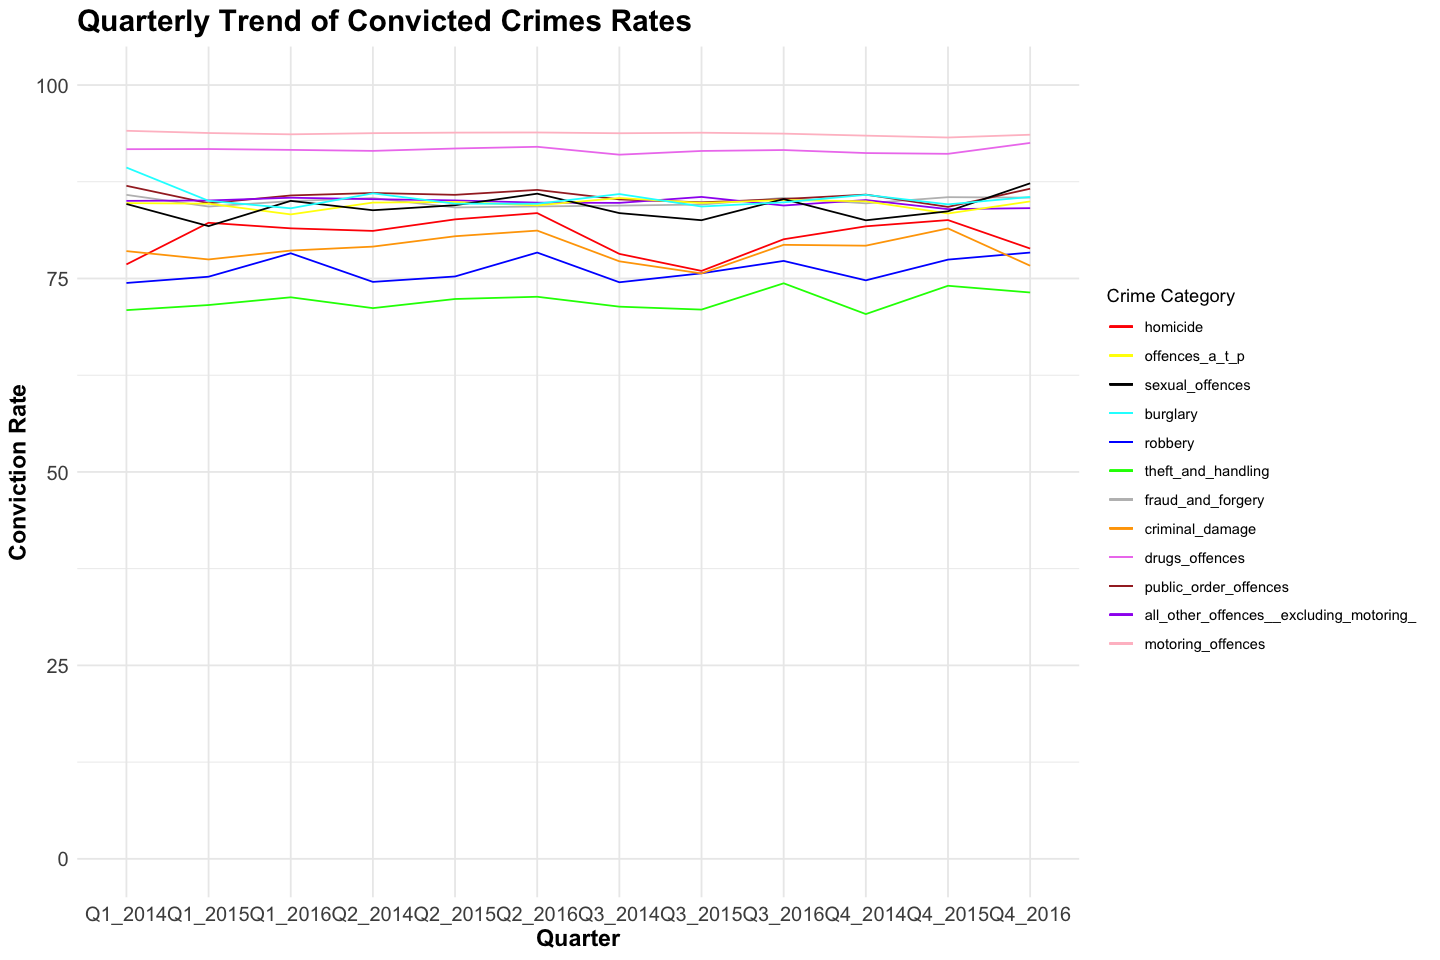

In [216]:
#This plot all the columns in the data frame as regards the quarters in the data frame, excluding 2017 and 2018

ggplot(df_quarter_rates_convicted_wide, aes(x = quarter, group = 1)) +

  geom_line(aes(y = homicide, color = "Column 1"), size = 0.5) +

  geom_line(aes(y = offences_against_the_person, color = "Column 2"), size = 0.5) +

  geom_line(aes(y = sexual_offences, color = "Column 3"), size = 0.5) +

  geom_line(aes(y = burglary, color = "Column 4"), size = 0.5) +

  geom_line(aes(y = robbery, color = "Column 5"), size = 0.5) +
  
  geom_line(aes(y = theft_and_handling, color = "Column 6"), size = 0.5) +

  geom_line(aes(y = fraud_and_forgery, color = "Column 7"), size = 0.5) +

  geom_line(aes(y = criminal_damage, color = "Column 8"), size = 0.5) +

  geom_line(aes(y = drugs_offences, color = "Column 9"), size = 0.5) +

  geom_line(aes(y = public_order_offences, color = "Column 10"), size = 0.5) +

  geom_line(aes(y = all_other_offences__excluding_motoring_, color = "Column 11"), size = 0.5) +

  geom_line(aes(y = motoring_offences, color = "Column 12"), size = 0.5) +


  labs(x = "Quarter", y = "Conviction Rate", title = "Quarterly Trend of Convicted Crimes Rates") +

  scale_color_manual(

    values = c("Column 1" = "red", "Column 2" = "blue", "Column 3" = "green", "Column 4" = "grey",
    "Column 5" = "orange", "Column 6" = "violet", "Column 7" = "brown", "Column 8" = "purple",
    "Column 9" = "pink", "Column 10" = "yellow", "Column 11" = "black", "Column 12" = "cyan"),

    labels = c("homicide", "offences_a_t_p", "sexual_offences", "burglary", "robbery", "theft_and_handling", 
    "fraud_and_forgery", "criminal_damage", "drugs_offences", "public_order_offences", "all_other_offences__excluding_motoring_", "motoring_offences"),

    name = "Crime Category"

  ) +

  coord_cartesian(ylim = c(0, 100)) +

  theme_minimal() +

  theme(

    legend.position = "right",

    plot.title = element_text(size = 18, face = "bold"),

    axis.title = element_text(size = 14, face = "bold"),

    axis.text = element_text(size = 12)

  )

  plot

### Dataframe for Unsuccessful quarter rate

In [217]:
# Select columns 1, 2, and 6 for all quarters
selected_columns_for_unsuc <- c(1, 2, 7)
df_quarter_rates_unsuccessful <- do.call(rbind, setNames(lapply(quarterly_prosecutions_list, function(df) df[, selected_columns_for_unsuc]), NULL))

In [218]:
df_quarter_rates_unsuccessful

crime_categoryy                         quarter unsuccessful_rate
1   homicide                                Q1_2014 23.18            
2   offences_against_the_person             Q1_2014 25.58            
3   sexual_offences                         Q1_2014 29.09            
4   burglary                                Q1_2014 14.19            
5   robbery                                 Q1_2014 21.46            
6   theft_and_handling                      Q1_2014  8.29            
7   fraud_and_forgery                       Q1_2014 13.02            
8   criminal_damage                         Q1_2014 14.97            
9   drugs_offences                          Q1_2014  5.91            
10  public_order_offences                   Q1_2014 15.26            
11  all_other_offences__excluding_motoring_ Q1_2014 15.37            
12  motoring_offences                       Q1_2014 10.66            
13  homicide                                Q2_2014 18.85            
14  offences_against_the_person             Q2_2014 25.44            
15  sexual_offences                         Q2_2014 28.83            
16  burglary                                Q2_2014 14.61            
17  robbery                                 Q2_2014 20.88            
18  theft_and_handling                      Q2_2014  8.51            
19  fraud_and_forgery                       Q2_2014 13.95            
20  criminal_damage                         Q2_2014 14.75            
21  drugs_offences                          Q2_2014  6.22            
22  public_order_offences                   Q2_2014 15.19            
23  all_other_offences__excluding_motoring_ Q2_2014 16.18            
24  motoring_offences                       Q2_2014 14.00            
25  homicide                                Q3_2014 21.82            
26  offences_against_the_person             Q3_2014 25.49            
27  sexual_offences                         Q3_2014 28.64            
28  burglary                                Q3_2014 15.58            
29  robbery                                 Q3_2014 22.78            
30  theft_and_handling                      Q3_2014  9.00            
... ...                                     ...     ...              
211 fraud_and_forgery                       Q2_2018  0.00            
212 criminal_damage                         Q2_2018  0.00            
213 drugs_offences                          Q2_2018  0.00            
214 public_order_offences                   Q2_2018  0.00            
215 all_other_offences__excluding_motoring_ Q2_2018  0.00            
216 motoring_offences                       Q2_2018  0.00            
217 homicide                                Q3_2018 16.77            
218 offences_against_the_person             Q3_2018 21.09            
219 sexual_offences                         Q3_2018 25.43            
220 burglary                                Q3_2018 13.65            
221 robbery                                 Q3_2018 19.14            
222 theft_and_handling                      Q3_2018  8.27            
223 fraud_and_forgery                       Q3_2018 13.68            
224 criminal_damage                         Q3_2018 12.15            
225 drugs_offences                          Q3_2018  6.80            
226 public_order_offences                   Q3_2018 14.33            
227 all_other_offences__excluding_motoring_ Q3_2018 13.62            
228 motoring_offences                       Q3_2018 15.09            
229 homicide                                Q4_2018 18.50            
230 offences_against_the_person             Q4_2018 20.90            
231 sexual_offences                         Q4_2018 25.79            
232 burglary                                Q4_2018 11.44            
233 robbery                                 Q4_2018 23.59            
234 theft_and_handling                      Q4_2018  7.62            
235 fraud_and_forgery                       Q4_2018 12.79            
236 criminal_d

In [219]:
# Convert the data frame back to wide format
df_quarter_rates_unsuccessful_wide <- pivot_wider(df_quarter_rates_unsuccessful, names_from = crime_categoryy, values_from = unsuccessful_rate)

In [220]:
# Print the final wide format data frame
df_quarter_rates_unsuccessful_wide <- df_quarter_rates_unsuccessful_wide[!(grepl("2017|2018", df_quarter_rates_unsuccessful_wide$quarter)), ]

function (x, y, ...) 
UseMethod("plot")
<bytecode: 0x111fc8e60>
<environment: namespace:base>

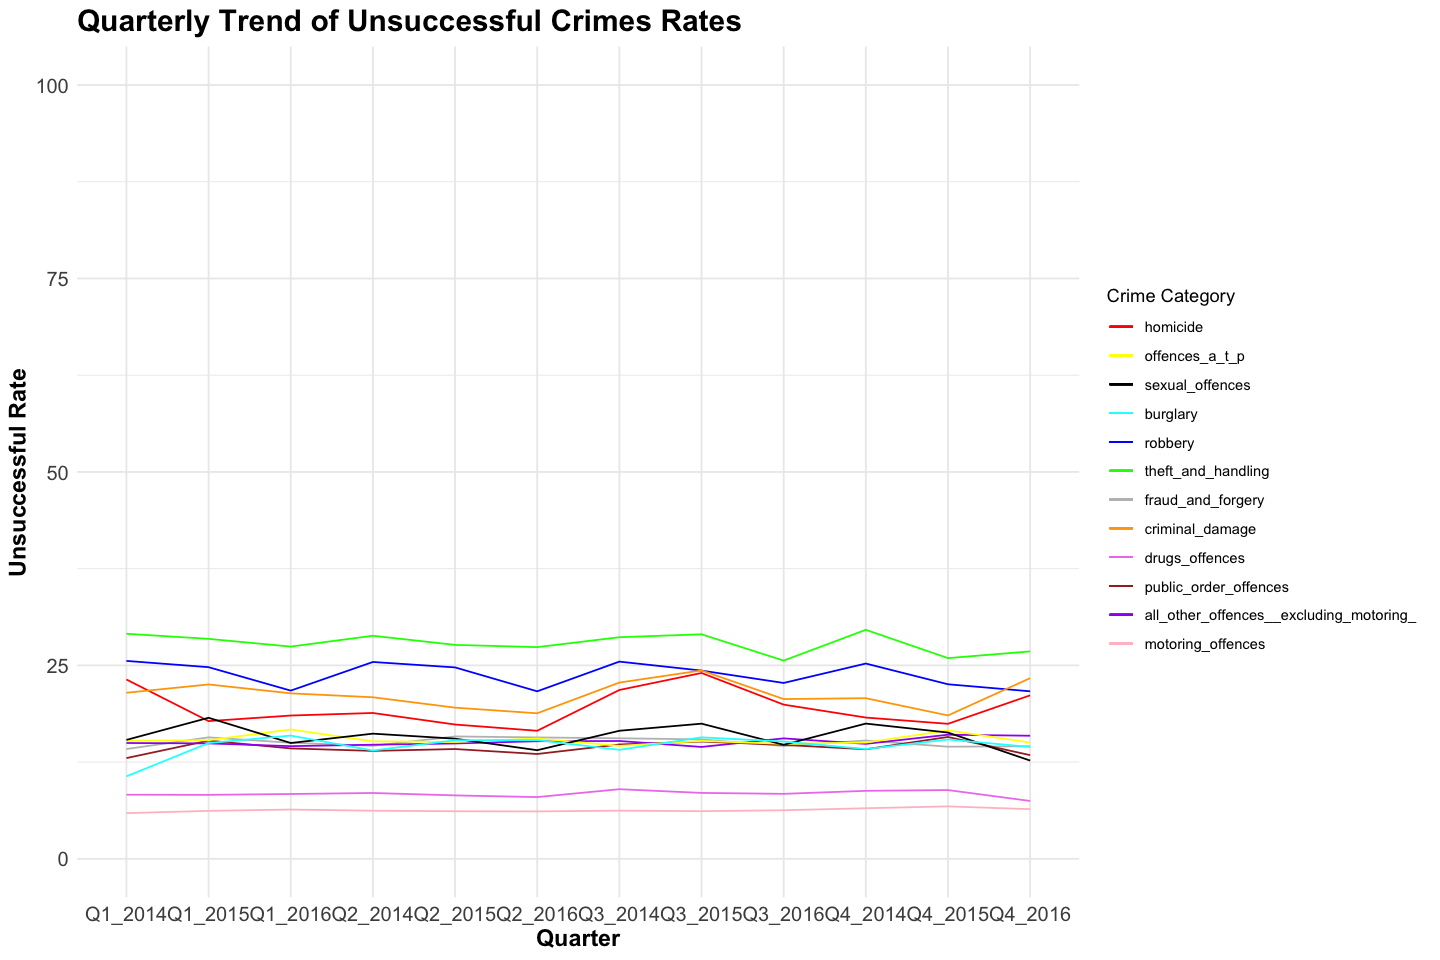

In [221]:
ggplot(df_quarter_rates_unsuccessful_wide, aes(x = quarter, group = 1)) +

  geom_line(aes(y = homicide, color = "Column 1"), size = 0.5) +

  geom_line(aes(y = offences_against_the_person, color = "Column 2"), size = 0.5) +

  geom_line(aes(y = sexual_offences, color = "Column 3"), size = 0.5) +

  geom_line(aes(y = burglary, color = "Column 4"), size = 0.5) +

  geom_line(aes(y = robbery, color = "Column 5"), size = 0.5) +
  
  geom_line(aes(y = theft_and_handling, color = "Column 6"), size = 0.5) +

  geom_line(aes(y = fraud_and_forgery, color = "Column 7"), size = 0.5) +

  geom_line(aes(y = criminal_damage, color = "Column 8"), size = 0.5) +

  geom_line(aes(y = drugs_offences, color = "Column 9"), size = 0.5) +

  geom_line(aes(y = public_order_offences, color = "Column 10"), size = 0.5) +

  geom_line(aes(y = all_other_offences__excluding_motoring_, color = "Column 11"), size = 0.5) +

  geom_line(aes(y = motoring_offences, color = "Column 12"), size = 0.5) +


  labs(x = "Quarter", y = "Unsuccessful Rate", title = "Quarterly Trend of Unsuccessful Crimes Rates") +

  scale_color_manual(

    values = c("Column 1" = "red", "Column 2" = "blue", "Column 3" = "green", "Column 4" = "grey",
    "Column 5" = "orange", "Column 6" = "violet", "Column 7" = "brown", "Column 8" = "purple",
    "Column 9" = "pink", "Column 10" = "yellow", "Column 11" = "black", "Column 12" = "cyan"),

    labels = c("homicide", "offences_a_t_p", "sexual_offences", "burglary", "robbery", "theft_and_handling", 
    "fraud_and_forgery", "criminal_damage", "drugs_offences", "public_order_offences", "all_other_offences__excluding_motoring_", "motoring_offences"),

    name = "Crime Category"

  ) +

  coord_cartesian(ylim = c(0, 100)) +

  theme_minimal() +

  theme(

    legend.position = "right",

    plot.title = element_text(size = 18, face = "bold"),

    axis.title = element_text(size = 14, face = "bold"),

    axis.text = element_text(size = 12)

  )

  plot

## Correlation & Covariance analysis

### Using pairwise complete observations

The cor() function is applied to the new data frame to calculate the correlation matrix. The argument use = "complete.obs" indicates that the correlation should be computed using pairwise complete observations, excluding any rows with missing values.

In [222]:
correln_with_categories_conv <- conv_crime_data[conv_crime_data$county != "National", 7:18] %>%
cor(use = "complete.obs") %>%
round(2)



In [223]:
correln_with_categories_conv

homicide_conv
homicide_conv                                1.00         
offences_against_the_person_conv             0.78         
sexual_offences_conv                         0.74         
burglary_conv                                0.72         
robbery_conv                                 0.71         
theft_and_handling_conv                      0.67         
fraud_and_forgery_conv                       0.77         
criminal_damage_conv                         0.68         
drugs_offences_conv                          0.75         
public_order_offences_conv                   0.70         
all_other_offences__excluding_motoring__conv 0.53         
motoring_offences_conv                       0.67         
                                             offences_against_the_person_conv
homicide_conv                                0.78                            
offences_against_the_person_conv             1.00                            
sexual_offences_conv                         0.92                            
burglary_conv                                0.92                            
robbery_conv                                 0.86                            
theft_and_handling_conv                      0.88                            
fraud_and_forgery_conv                       0.93                            
criminal_damage_conv                         0.91                            
drugs_offences_conv                          0.93                            
public_order_offences_conv                   0.92                            
all_other_offences__excluding_motoring__conv 0.68                            
motoring_offences_conv                       0.87                            
                                             sexual_offences_conv burglary_conv
homicide_conv                                0.74                 0.72         
offences_against_the_person_conv             0.92                 0.92         
sexual_offences_conv                         1.00                 0.84         
burglary_conv                                0.84                 1.00         
robbery_conv                                 0.78                 0.91         
theft_and_handling_conv                      0.79                 0.93         
fraud_and_forgery_conv                       0.84                 0.88         
criminal_damage_conv                         0.82                 0.94         
drugs_offences_conv                          0.82                 0.90         
public_order_offences_conv                   0.83                 0.93         
all_other_offences__excluding_motoring__conv 0.60                 0.80         
motoring_offences_conv                       0.79                 0.88         
                                             robbery_conv
homicide_conv                                0.71        
offences_against_the_person_conv             0.86        
sexual_offences_conv                         0.78        
burglary_conv                                0.91        
robbery_conv                                 1.00        
theft_and_handling_conv                      0.89        
fraud_and_forgery_conv                       0.86        
criminal_damage_conv                         0.88        
drugs_offences_conv                          0.90        
public_order_offences_conv                   0.89        
all_other_offences__excluding_motoring__conv 0.83        
motoring_offences_conv                       0.85        
                                             theft_and_handling_conv
homicide_conv                                0.67                   
offences_against_the_person_conv             0.88                   
sexual_offences_conv                         0.79                   
burglary_conv                                0.93                   
robbery_conv                                 0.89                   
theft_and_handling_conv                      1.00       

In [224]:
correln_with_categories_unsuc <- unsuccesful_crime_data[unsuccesful_crime_data$county != "National", 7:18] %>%
cor(use = "complete.obs") %>%
round(2)

In [225]:
correln_with_categories_unsuc

homicide_unsuc
homicide_unsuc                                1.00          
offences_against_the_person_unsuc             0.71          
sexual_offences_unsuc                         0.64          
burglary_unsuc                                0.62          
robbery_unsuc                                 0.60          
theft_and_handling_unsuc                      0.66          
fraud_and_forgery_unsuc                       0.71          
criminal_damage_unsuc                         0.65          
drugs_offences_unsuc                          0.70          
public_order_offences_unsuc                   0.68          
all_other_offences__excluding_motoring__unsuc 0.47          
motoring_offences_unsuc                       0.66          
                                              offences_against_the_person_unsuc
homicide_unsuc                                0.71                             
offences_against_the_person_unsuc             1.00                             
sexual_offences_unsuc                         0.88                             
burglary_unsuc                                0.91                             
robbery_unsuc                                 0.85                             
theft_and_handling_unsuc                      0.94                             
fraud_and_forgery_unsuc                       0.92                             
criminal_damage_unsuc                         0.91                             
drugs_offences_unsuc                          0.95                             
public_order_offences_unsuc                   0.95                             
all_other_offences__excluding_motoring__unsuc 0.72                             
motoring_offences_unsuc                       0.94                             
                                              sexual_offences_unsuc
homicide_unsuc                                0.64                 
offences_against_the_person_unsuc             0.88                 
sexual_offences_unsuc                         1.00                 
burglary_unsuc                                0.80                 
robbery_unsuc                                 0.76                 
theft_and_handling_unsuc                      0.81                 
fraud_and_forgery_unsuc                       0.82                 
criminal_damage_unsuc                         0.80                 
drugs_offences_unsuc                          0.84                 
public_order_offences_unsuc                   0.84                 
all_other_offences__excluding_motoring__unsuc 0.63                 
motoring_offences_unsuc                       0.84                 
                                              burglary_unsuc robbery_unsuc
homicide_unsuc                                0.62           0.60         
offences_against_the_person_unsuc             0.91           0.85         
sexual_offences_unsuc                         0.80           0.76         
burglary_unsuc                                1.00           0.86         
robbery_unsuc                                 0.86           1.00         
theft_and_handling_unsuc                      0.90           0.85         
fraud_and_forgery_unsuc                       0.83           0.79         
criminal_damage_unsuc                         0.86           0.79         
drugs_offences_unsuc                          0.87           0.82         
public_order_offences_unsuc                   0.89           0.83         
all_other_offences__excluding_motoring__unsuc 0.77           0.79         
motoring_offences_unsuc                       0.88           0.86         
                                              theft_and_handling_unsuc
homicide_unsuc                                0.66                    
offences_against_the_person_unsuc             0.94                    
sexual_offences_unsuc                         0.81                    
burglary_unsuc                                0.90                    

### Using correlation matrix

#### Correlation for Convictions

In [226]:
#convert convictions crime data to integer type for correlation analysis 

conv_crime_data_corr <- conv_crime_data[conv_crime_data$county != "National", 7:18]

In [227]:
# Calculate correlation for convictions crime data
con_crime_correl <- cor(conv_crime_data_corr)
round(con_crime_correl , 2)

homicide_conv
homicide_conv                                1.00         
offences_against_the_person_conv             0.78         
sexual_offences_conv                         0.74         
burglary_conv                                0.72         
robbery_conv                                 0.71         
theft_and_handling_conv                      0.67         
fraud_and_forgery_conv                       0.77         
criminal_damage_conv                         0.68         
drugs_offences_conv                          0.75         
public_order_offences_conv                   0.70         
all_other_offences__excluding_motoring__conv 0.53         
motoring_offences_conv                       0.67         
                                             offences_against_the_person_conv
homicide_conv                                0.78                            
offences_against_the_person_conv             1.00                            
sexual_offences_conv                         0.92                            
burglary_conv                                0.92                            
robbery_conv                                 0.86                            
theft_and_handling_conv                      0.88                            
fraud_and_forgery_conv                       0.93                            
criminal_damage_conv                         0.91                            
drugs_offences_conv                          0.93                            
public_order_offences_conv                   0.92                            
all_other_offences__excluding_motoring__conv 0.68                            
motoring_offences_conv                       0.87                            
                                             sexual_offences_conv burglary_conv
homicide_conv                                0.74                 0.72         
offences_against_the_person_conv             0.92                 0.92         
sexual_offences_conv                         1.00                 0.84         
burglary_conv                                0.84                 1.00         
robbery_conv                                 0.78                 0.91         
theft_and_handling_conv                      0.79                 0.93         
fraud_and_forgery_conv                       0.84                 0.88         
criminal_damage_conv                         0.82                 0.94         
drugs_offences_conv                          0.82                 0.90         
public_order_offences_conv                   0.83                 0.93         
all_other_offences__excluding_motoring__conv 0.60                 0.80         
motoring_offences_conv                       0.79                 0.88         
                                             robbery_conv
homicide_conv                                0.71        
offences_against_the_person_conv             0.86        
sexual_offences_conv                         0.78        
burglary_conv                                0.91        
robbery_conv                                 1.00        
theft_and_handling_conv                      0.89        
fraud_and_forgery_conv                       0.86        
criminal_damage_conv                         0.88        
drugs_offences_conv                          0.90        
public_order_offences_conv                   0.89        
all_other_offences__excluding_motoring__conv 0.83        
motoring_offences_conv                       0.85        
                                             theft_and_handling_conv
homicide_conv                                0.67                   
offences_against_the_person_conv             0.88                   
sexual_offences_conv                         0.79                   
burglary_conv                                0.93                   
robbery_conv                                 0.89                   
theft_and_handling_conv                      1.00       

In [228]:
correlation_conv_df <- melt(con_crime_correl)

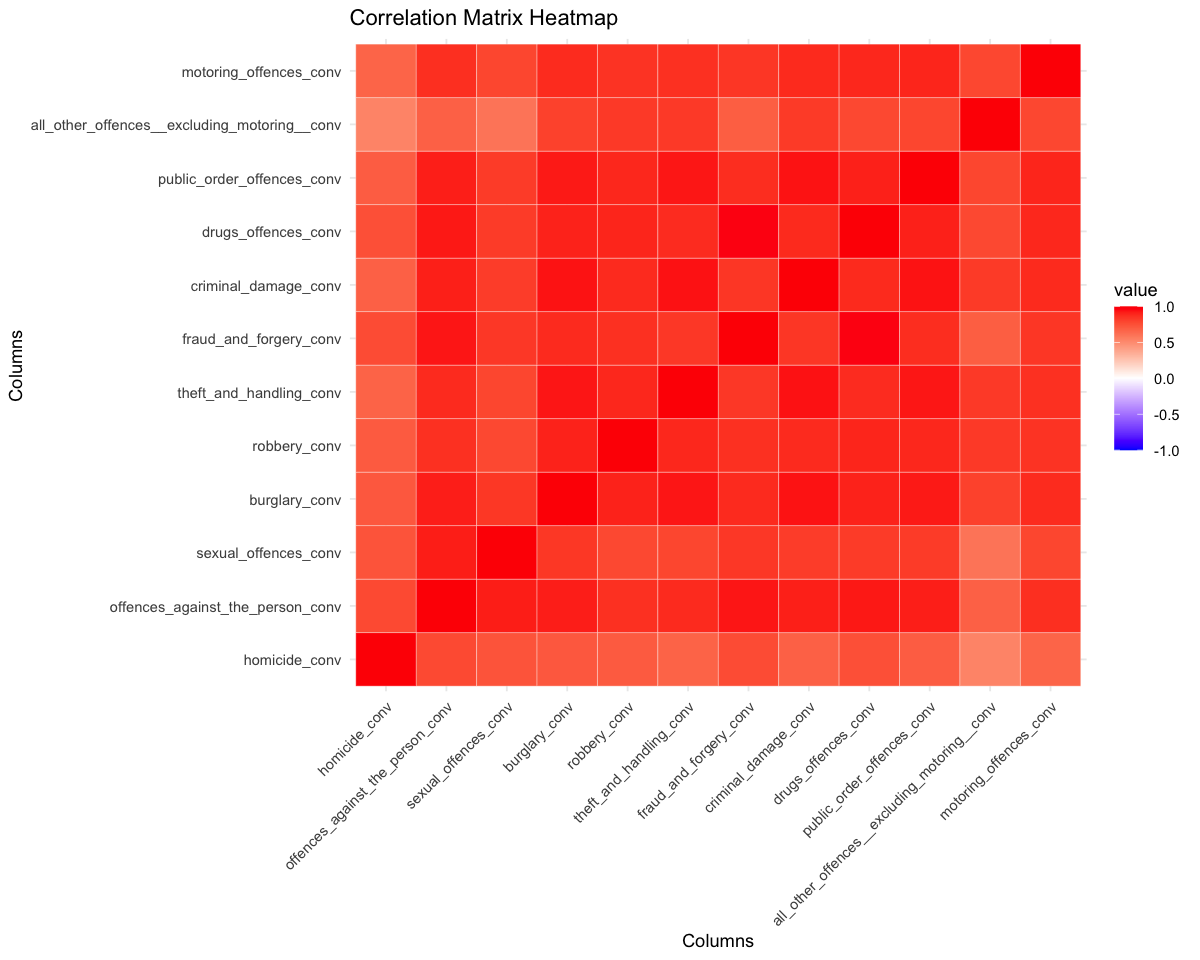

In [229]:
# Create the heatmap plot using ggplot2
options(repr.plot.width = 10)  # Set the width of the plot

ggplot(correlation_conv_df, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red",
                       limits = c(-1, 1), na.value = "white") +
  labs(title = "Correlation Matrix Heatmap",
       x = "Columns",
       y = "Columns") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Plot the network graph using the pairwise.complete.obs

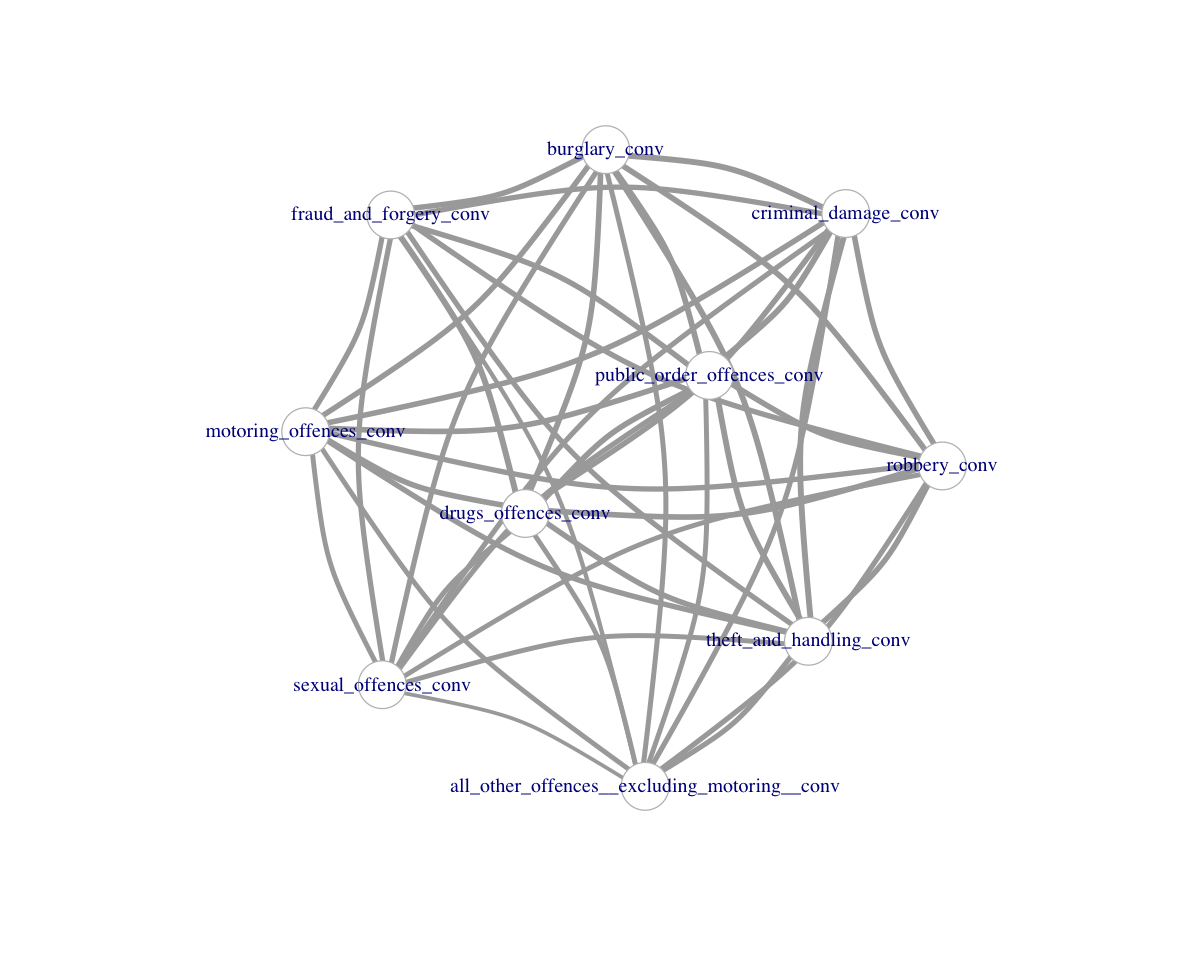

In [230]:
# Calculate the correlation matrix
cor_matrix <- cor(conv_crime_data_corr[, -c(1, 2)], use = "pairwise.complete.obs")

# Convert correlation matrix to a graph
graph <- graph.adjacency(cor_matrix, mode = "undirected", diag = FALSE, weighted = TRUE)

# Set up the plot
plot_layout <- layout_with_fr(graph)

# Plot the network graph
plot(graph, layout = plot_layout, vertex.label = V(graph)$name, edge.width = E(graph)$weight * 5, 
     edge.arrow.size = 0.5, edge.curved = 0.2, vertex.color = "white", vertex.frame.color = "gray")


The network graph visualizes the correlation structure among the variables in the dataset. From the graph, we can make several observations and interpretations:

Node Proximity: Variables that are close to each other in the graph are more strongly correlated. For example, we can see that "homicide_conv" and "offences_against_the_person_conv" are closely connected, indicating a strong positive correlation between these two variables.

Clusters or Communities: The graph exhibits clusters or communities of variables that are densely connected within themselves. This suggests that certain groups of variables have higher correlations among themselves compared to correlations with variables outside their cluster. These clusters can represent specific types of crimes or related aspects.

Positive and Negative Correlations: The direction of the edges in the graph indicates the nature of the correlation. A positive correlation is represented by an edge pointing from one node to another, while a negative correlation is indicated by an edge pointing in the opposite direction. This helps us understand the relationships between variables in terms of their positive or negative associations.

Central Nodes: Nodes that have many connections (high degree) in the graph can be considered central or influential variables. These variables have strong correlations with multiple other variables, suggesting their importance in understanding the overall crime patterns.

Overall, the graph provides a visual representation of the correlation structure among the selected variables. It helps identify clusters of variables with similar patterns, highlight strong positive or negative associations, and identify influential variables in the dataset. This information can guide further analysis and interpretation of the relationships between different crime variables.

#### Correlation for Unsuccessful

In [231]:
#convert unsuccessful crime data to integer type for correlation analysis 
unsuccesful_crime_data_correlation <- unsuccesful_crime_data[unsuccesful_crime_data$county != "National", 7:18]

In [232]:
# Calculate correlation for unsuccesful crime data
unsuc_crime_correl <- cor(unsuccesful_crime_data_correlation)
unsuc_crime_correl <- round(unsuc_crime_correl, 2)
unsuc_crime_correl

homicide_unsuc
homicide_unsuc                                1.00          
offences_against_the_person_unsuc             0.71          
sexual_offences_unsuc                         0.64          
burglary_unsuc                                0.62          
robbery_unsuc                                 0.60          
theft_and_handling_unsuc                      0.66          
fraud_and_forgery_unsuc                       0.71          
criminal_damage_unsuc                         0.65          
drugs_offences_unsuc                          0.70          
public_order_offences_unsuc                   0.68          
all_other_offences__excluding_motoring__unsuc 0.47          
motoring_offences_unsuc                       0.66          
                                              offences_against_the_person_unsuc
homicide_unsuc                                0.71                             
offences_against_the_person_unsuc             1.00                             
sexual_offences_unsuc                         0.88                             
burglary_unsuc                                0.91                             
robbery_unsuc                                 0.85                             
theft_and_handling_unsuc                      0.94                             
fraud_and_forgery_unsuc                       0.92                             
criminal_damage_unsuc                         0.91                             
drugs_offences_unsuc                          0.95                             
public_order_offences_unsuc                   0.95                             
all_other_offences__excluding_motoring__unsuc 0.72                             
motoring_offences_unsuc                       0.94                             
                                              sexual_offences_unsuc
homicide_unsuc                                0.64                 
offences_against_the_person_unsuc             0.88                 
sexual_offences_unsuc                         1.00                 
burglary_unsuc                                0.80                 
robbery_unsuc                                 0.76                 
theft_and_handling_unsuc                      0.81                 
fraud_and_forgery_unsuc                       0.82                 
criminal_damage_unsuc                         0.80                 
drugs_offences_unsuc                          0.84                 
public_order_offences_unsuc                   0.84                 
all_other_offences__excluding_motoring__unsuc 0.63                 
motoring_offences_unsuc                       0.84                 
                                              burglary_unsuc robbery_unsuc
homicide_unsuc                                0.62           0.60         
offences_against_the_person_unsuc             0.91           0.85         
sexual_offences_unsuc                         0.80           0.76         
burglary_unsuc                                1.00           0.86         
robbery_unsuc                                 0.86           1.00         
theft_and_handling_unsuc                      0.90           0.85         
fraud_and_forgery_unsuc                       0.83           0.79         
criminal_damage_unsuc                         0.86           0.79         
drugs_offences_unsuc                          0.87           0.82         
public_order_offences_unsuc                   0.89           0.83         
all_other_offences__excluding_motoring__unsuc 0.77           0.79         
motoring_offences_unsuc                       0.88           0.86         
                                              theft_and_handling_unsuc
homicide_unsuc                                0.66                    
offences_against_the_person_unsuc             0.94                    
sexual_offences_unsuc                         0.81                    
burglary_unsuc                                0.90                    

In [233]:
correlation_unsuc_df <- melt(unsuc_crime_correl)

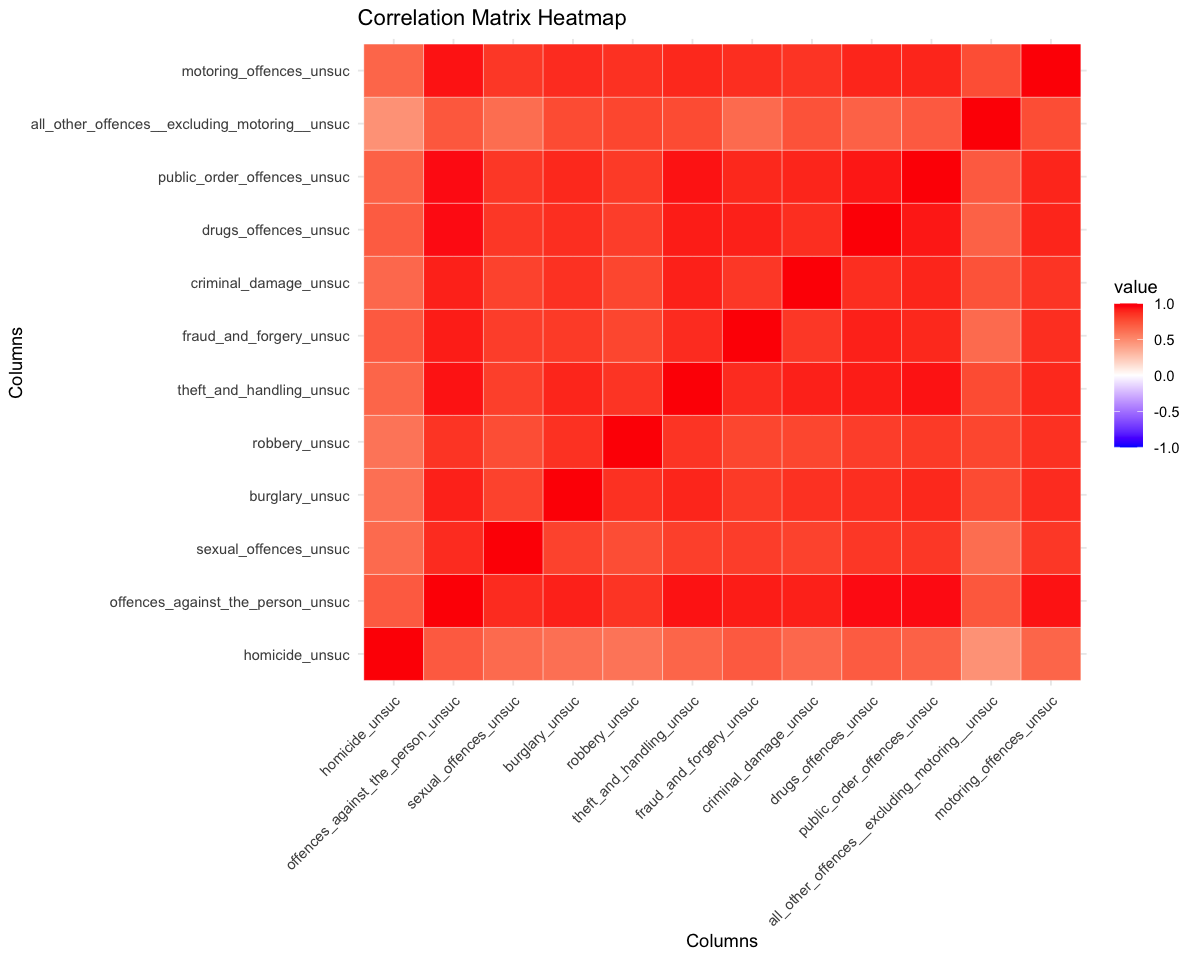

In [234]:
# Create the heatmap plot using ggplot2
options(repr.plot.width = 10)  # Set the width of the plot

ggplot(correlation_unsuc_df, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red",
                       limits = c(-1, 1), na.value = "white") +
  labs(title = "Correlation Matrix Heatmap",
       x = "Columns",
       y = "Columns") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Covariance

### Covariance for Conviction

In [235]:
#convert Convixtion crime data to integer type for covariance analysis 
conv_crime_data_covar <- conv_crime_data[conv_crime_data$county != "National", 7:18]


In [236]:
#Getting the covariance for conviction crime data using Spearman's method 
covale_conv_crime_data <- cov(conv_crime_data_covar, method = "spearman")
covale_conv_crime_data

homicide_conv
homicide_conv                                342063.63    
offences_against_the_person_conv             175308.92    
sexual_offences_conv                         163416.11    
burglary_conv                                153848.04    
robbery_conv                                 142000.51    
theft_and_handling_conv                      138643.09    
fraud_and_forgery_conv                       152862.58    
criminal_damage_conv                         143561.41    
drugs_offences_conv                          147124.06    
public_order_offences_conv                   136208.03    
all_other_offences__excluding_motoring__conv  87562.82    
motoring_offences_conv                       151805.47    
                                             offences_against_the_person_conv
homicide_conv                                175308.9                        
offences_against_the_person_conv             367668.9                        
sexual_offences_conv                         305734.4                        
burglary_conv                                287772.3                        
robbery_conv                                 247139.1                        
theft_and_handling_conv                      298116.2                        
fraud_and_forgery_conv                       288932.7                        
criminal_damage_conv                         311863.7                        
drugs_offences_conv                          310415.4                        
public_order_offences_conv                   301330.7                        
all_other_offences__excluding_motoring__conv 209781.7                        
motoring_offences_conv                       317950.3                        
                                             sexual_offences_conv burglary_conv
homicide_conv                                163416.1             153848.0     
offences_against_the_person_conv             305734.4             287772.3     
sexual_offences_conv                         367288.0             251270.7     
burglary_conv                                251270.7             367485.0     
robbery_conv                                 219052.4             249683.1     
theft_and_handling_conv                      252890.2             313971.7     
fraud_and_forgery_conv                       257925.2             251776.5     
criminal_damage_conv                         262420.7             300566.6     
drugs_offences_conv                          269481.3             274142.8     
public_order_offences_conv                   254711.8             285383.9     
all_other_offences__excluding_motoring__conv 185700.4             235586.1     
motoring_offences_conv                       278305.7             272266.9     
                                             robbery_conv
homicide_conv                                142000.5    
offences_against_the_person_conv             247139.1    
sexual_offences_conv                         219052.4    
burglary_conv                                249683.1    
robbery_conv                                 365858.0    
theft_and_handling_conv                      252029.8    
fraud_and_forgery_conv                       225537.9    
criminal_damage_conv                         248729.9    
drugs_offences_conv                          241728.6    
public_order_offences_conv                   228591.6    
all_other_offences__excluding_motoring__conv 199642.3    
motoring_offences_conv                       229376.7    
                                             theft_and_handling_conv
homicide_conv                                138643.1               
offences_against_the_person_conv             298116.2               
sexual_offences_conv                         252890.2               
burglary_conv                                313971.7               
robbery_conv                                 252029.8               
theft_and_handling_conv                      367667.9   

### Covariance for Unsuccessful

In [237]:
#convert unsuccessful crime data to integer type for covariance analysis 
unsuccesful_crime_data_covar <- unsuccesful_crime_data[unsuccesful_crime_data$county != "National", 7:18]

In [238]:
#Getting the covariance for unsuccesful crime data using Spearman's method 
covale_unsuc_crime_data <- cov(unsuccesful_crime_data_covar, method = "spearman")
covale_unsuc_crime_data

homicide_unsuc
homicide_unsuc                                204694.77     
offences_against_the_person_unsuc              89862.63     
sexual_offences_unsuc                          77007.61     
burglary_unsuc                                 69612.59     
robbery_unsuc                                  68358.35     
theft_and_handling_unsuc                       63762.54     
fraud_and_forgery_unsuc                        70138.98     
criminal_damage_unsuc                          70988.14     
drugs_offences_unsuc                           76527.18     
public_order_offences_unsuc                    75904.74     
all_other_offences__excluding_motoring__unsuc  47498.97     
motoring_offences_unsuc                        82200.03     
                                              offences_against_the_person_unsuc
homicide_unsuc                                 89862.63                        
offences_against_the_person_unsuc             367621.43                        
sexual_offences_unsuc                         257633.76                        
burglary_unsuc                                238920.65                        
robbery_unsuc                                 194346.69                        
theft_and_handling_unsuc                      273348.48                        
fraud_and_forgery_unsuc                       206286.46                        
criminal_damage_unsuc                         276104.70                        
drugs_offences_unsuc                          258787.75                        
public_order_offences_unsuc                   285302.13                        
all_other_offences__excluding_motoring__unsuc 194002.06                        
motoring_offences_unsuc                       280181.67                        
                                              sexual_offences_unsuc
homicide_unsuc                                 77007.61            
offences_against_the_person_unsuc             257633.76            
sexual_offences_unsuc                         365114.46            
burglary_unsuc                                182165.06            
robbery_unsuc                                 143285.72            
theft_and_handling_unsuc                      190900.61            
fraud_and_forgery_unsuc                       170141.14            
criminal_damage_unsuc                         202996.20            
drugs_offences_unsuc                          204295.12            
public_order_offences_unsuc                   209241.65            
all_other_offences__excluding_motoring__unsuc 147153.98            
motoring_offences_unsuc                       226492.64            
                                              burglary_unsuc robbery_unsuc
homicide_unsuc                                 69612.59       68358.35    
offences_against_the_person_unsuc             238920.65      194346.69    
sexual_offences_unsuc                         182165.06      143285.72    
burglary_unsuc                                363325.96      164805.06    
robbery_unsuc                                 164805.06      343000.52    
theft_and_handling_unsuc                      230868.47      166492.79    
fraud_and_forgery_unsuc                       149078.87      120379.10    
criminal_damage_unsuc                         223697.45      166669.33    
drugs_offences_unsuc                          199061.91      159366.74    
public_order_offences_unsuc                   225577.24      169742.89    
all_other_offences__excluding_motoring__unsuc 165681.75      126938.50    
motoring_offences_unsuc                       190519.18      157964.19    
                                              theft_and_handling_unsuc
homicide_unsuc                                 63762.54               
offences_against_the_person_unsuc             273348.48               
sexual_offences_unsuc                         190900.61               
burglary_unsuc                                230868.47               

## Hypothesis Testing

I am going to test my Hypothesis based on crime categories on how the conviction rate relate to Unsuccessful rate.

##### Hypothesis analysing

Null Hypothesis (H0): There is no relationship between the conviction rate and the unsuccessful rate for different crime categories.

Alternative Hypothesis (H1): There is a relationship between the conviction rate and the unsuccessful rate for different crime categories.


In this hypothesis, you are examining the relationship between the conviction rate and the unsuccessful rate for different crime categories. The null hypothesis assumes that there is no relationship between these two variables, suggesting that the conviction rate and unsuccessful rate are independent of each other across crime categories. The alternative hypothesis, on the other hand, proposes that there is indeed a relationship between the conviction rate and unsuccessful rate, indicating that changes in one variable are associated with changes in the other variable for different crime categories.

In [239]:
#call the variable and filter the data for Conviction crime rate and unsuccesful crime rate

# Select columns 1, 2, and 6 for all quarters
selected_columns <- c(1, 6, 7)
df_hypoth_tes <- do.call(rbind, setNames(lapply(quarterly_prosecutions_list, function(df) df[, selected_columns]), NULL))

In [240]:
head(df_hypoth_tes)

crime_categoryy             conviction_rate unsuccessful_rate
1 homicide                    76.82           23.18            
2 offences_against_the_person 74.42           25.58            
3 sexual_offences             70.91           29.09            
4 burglary                    85.81           14.19            
5 robbery                     78.54           21.46            
6 theft_and_handling          91.71            8.29

In [241]:
conviction_rate_tes <- df_hypoth_tes$conviction_rate

In [242]:
unsuccessful_rate_tes <- df_hypoth_tes$unsuccessful_rate

### Performing correlation analysis based on conviction rate and unsuccesful rate

In [243]:
# Perform correlation analysis
correlation <- cor(conviction_rate_tes, unsuccessful_rate_tes)

# Calculate test statistic and p-value
n <- length(conviction_rate_tes)
test_statistic <- correlation * sqrt((n - 2) / (1 - correlation^2))
p_value <- 2 * (1 - pt(abs(test_statistic), df = n - 2))

# Set significance level (alpha)
alpha <- 0.05

# Make a decision based on the p-value
if (p_value < alpha) {
  decision <- "Reject the null hypothesis"
} else {
  decision <- "Fail to reject the null hypothesis"
}

# Interpret the results
if (decision == "Reject the null hypothesis") {
  conclusion <- "There is a significant relationship between the conviction rate and the unsuccessful rate for different crime categories."
} else {
  conclusion <- "There is no significant relationship between the conviction rate and the unsuccessful rate for different crime categories."
}

# Print the test statistic, p-value, decision, and conclusion
cat("Test Statistic:", test_statistic, "\n")
cat("P-value:", p_value, "\n")
cat("Decision:", decision, "\n")
cat("Conclusion:", conclusion, "\n")


Test Statistic: 8.553957 
P-value: 1.332268e-15 
Decision: Reject the null hypothesis 
Conclusion: There is a significant relationship between the conviction rate and the unsuccessful rate for different crime categories. 


##### Explanation from Result

The test statistic represents the strength and direction of the correlation, while the p-value indicates the probability of obtaining such a correlation by chance. The decision is based on whether the p-value is less than the chosen significance level (alpha). Finally, the conclusion interprets the results in the context of your research question and hypothesis.

If the null hypothesis is rejected (p-value < alpha), it suggests that there is a significant relationship between the conviction rate and the unsuccessful rate for different crime categories. This implies that as the conviction rate increases or decreases, the unsuccessful rate tends to change accordingly.
If the null hypothesis is not rejected (p-value >= alpha), it indicates that there is no significant relationship between the conviction rate and the unsuccessful rate for different crime categories. This implies that changes in the conviction rate do not correspond to predictable changes in the unsuccessful rate.

In [244]:
# Perform correlation test
cor_test <- cor.test(conviction_rate_tes, unsuccessful_rate_tes)

# Extract the p-value from the test result
p_value <- cor_test$p.value
round(p_value)

# Print the p-value
cat("P-value:", p_value, "\n")


[1] 0

P-value: 1.471385e-15 


Based on the `p-value obtained (P-value: 1.471385e-15)`, which is very small, we can conclude that there is strong evidence to reject the null hypothesis. `The p-value is much smaller than the typical significance level of 0.05, suggesting that the correlation between conviction rate and unsuccessful rate is statistically significant.`

Therefore, we can infer that there is a significant relationship between the conviction rate and unsuccessful rate for the crime categories analyzed. The p-value indicates that the probability of observing such a strong correlation by chance alone, assuming no true relationship, is extremely low.

These findings imply that as the conviction rate increases or decreases, there is a corresponding pattern in the unsuccessful rate for different crime categories. The direction and strength of the correlation can be determined by the sign and magnitude of the correlation coefficient.

It is important to note that correlation does not imply causation. Although there is a significant relationship between conviction rate and unsuccessful rate, further research is needed to investigate the underlying factors and mechanisms driving this relationship. Additionally, it is crucial to consider any limitations of the data and potential confounding variables that may influence the observed correlation.

## Prediction Analysis - Machine Learning

In [245]:
#data = read_csv('combined_cps_data.csv')
data_mach <- combined_cps_data

head(data_mach)

county            region year quarter month yearandmonth homicide_conv
173 National          All    2014 Q1 2014 jan   2014-01-01   51           
174 Avon and Somerset West   2014 Q1 2014 jan   2014-01-01    0           
175 Bedfordshire      East   2014 Q1 2014 jan   2014-01-01    0           
176 Cambridgeshire    East   2014 Q1 2014 jan   2014-01-01    0           
177 Cheshire          North  2014 Q1 2014 jan   2014-01-01    0           
178 Cleveland         North  2014 Q1 2014 jan   2014-01-01    2           
    homicide_unsuc offences_against_the_person_conv
173 11             9087                            
174  0              228                            
175  1               68                            
176  0              101                            
177  0              170                            
178  3              119                            
    offences_against_the_person_unsuc ... criminal_damage_unsuc
173 2930                              ... 472                  
174   62                              ...  14                  
175   29                              ...   8                  
176   21                              ...   3                  
177   40                              ...   3                  
178   44                              ...  13                  
    drugs_offences_conv drugs_offences_unsuc public_order_offences_conv
173 4988                305                  4752                      
174  148                  4                   123                      
175   31                  3                    30                      
176   47                  1                    37                      
177   64                  3                    77                      
178   65                  2                   123                      
    public_order_offences_unsuc all_other_offences__excluding_motoring__conv
173 797                         3291                                        
174  28                           63                                        
175   9                           13                                        
176   2                           28                                        
177   8                           50                                        
178  27                           34                                        
    all_other_offences__excluding_motoring__unsuc motoring_offences_conv
173 586                                           12945                 
174   9                                             256                 
175   2                                             171                 
176   9                                             103                 
177   5                                             264                 
178  14                                             228                 
    motoring_offences_unsuc admin_finalised_unsuc
173 1466                    890                  
174   40                     20                  
175   13                     12                  
176   16                     14                  
177   16                     13                  
178   16                      3

## Linear Regression Techniques

### Ordinary Least Squares (OLS) Regression Technique (Convictions)

In [246]:
# Select the relevant variables for the prediction
predictors <- data_mach[, 2:31]

# Convert categorical variables to factors if needed
predictors$region <- as.factor(predictors$region)
predictors$quarter <- as.factor(predictors$quarter)
predictors$month <- as.factor(predictors$month)

# Perform OLS regression
model <- lm(homicide_conv ~ ., data = predictors)

# Print the summary of the model
summary(model)

# Evaluate model performance
# Residual Sum of Squares (RSS)
RSS <- sum(model$residuals^2)

# Total Sum of Squares (TSS)
TSS <- sum((predictors$homicide_conv - mean(predictors$homicide_conv))^2)

# R-squared
R_squared <- 1 - (RSS / TSS)

# Adjusted R-squared
n <- nrow(predictors)
p <- length(model$coefficients) - 1
adjusted_R_squared <- 1 - ((1 - R_squared) * (n - 1) / (n - p - 1))

# Print the performance metrics
cat("R-squared:", R_squared, "\n")
cat("Adjusted R-squared:", adjusted_R_squared, "\n")



Call:
lm(formula = homicide_conv ~ ., data = predictors)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.8430  -1.1853  -0.1640   0.9668  30.3445 

Coefficients: (8 not defined because of singularities)
                                                Estimate Std. Error t value
(Intercept)                                    6.5634296  4.2401115   1.548
regionEast                                    -6.4367019  4.1462294  -1.552
regionNorth                                   -6.5461142  4.0977439  -1.597
regionNortth                                  -5.9035912  4.1686031  -1.416
regionSouth                                   -6.4040311  4.1134653  -1.557
regionWest                                    -6.4907308  4.1358024  -1.569
year2015                                       0.1361050  0.4652948   0.293
year2016                                       0.1629418  0.4409313   0.370
year2017                                       0.3969653  0.4400629   0.902
year2018              

R-squared: 0.952176 
Adjusted R-squared: 0.9507553 


Selecting Predictors:
The predictors object is created to store the variables that will be used as predictors in the linear regression model. You need to specify the relevant variables based on your analysis goals. In the provided code, a subset of variables such as region, year, quarter, month, yearandmonth, homicide_unsuc, offences_against_the_person_conv, offences_against_the_person_unsuc, etc., are selected as predictors.

Converting Categorical Variables to Factors:
If any of the selected predictors are categorical variables, they need to be converted to factors using the as.factor() function. This step is necessary for the regression model to treat categorical variables appropriately.

Performing OLS Regression:
The OLS (Ordinary Least Squares) regression model is built using the lm() function. The dependent variable (homicide_conv) is regressed on all the predictors specified in the data argument. Adjust the formula based on your specific analysis.

Printing Model Summary:
The summary() function is used to print the summary of the OLS regression model. It provides information about the model coefficients, standard errors, t-values, and p-values. This summary helps in interpreting the significance and relationship of the predictors with the dependent variable.

Evaluating Model Performance:
To measure the performance of the model, two common metrics are calculated: R-squared and adjusted R-squared. These metrics assess how well the model fits the data and the proportion of variance explained by the predictors.

R-squared: It represents the proportion of the variance in the dependent variable (homicide_conv) that can be explained by the predictors. A higher R-squared value indicates a better fit of the model to the data.
Adjusted R-squared: It adjusts the R-squared value for the number of predictors and the sample size. It penalizes the addition of unnecessary predictors and provides a more reliable measure of model fit.
Interpretation of Results:
The model summary provides information about the significance of each predictor. Look for low p-values (typically below 0.05) to identify predictors that have a significant impact on the dependent variable. Coefficients with p-values below the chosen significance level indicate a statistically significant relationship between the predictor and the response variable.

Additionally, the R-squared and adjusted R-squared values indicate the proportion of the variance in the dependent variable explained by the predictors. Higher values suggest that the model is effective in capturing the variability in the data.

Effectiveness of the Technique:
OLS regression is a widely used technique for predicting a continuous dependent variable based on a set of predictors. It assumes a linear relationship between the predictors and the response variable. OLS regression provides interpretable coefficients and can help identify the most influential predictors.

However, it is important to note that OLS regression assumes certain assumptions, such as linearity, independence of errors, constant variance (homoscedasticity), and absence of multicollinearity. Violations of these assumptions can affect the accuracy and reliability of the results.

Alternative Solutions:
Depending on the nature of your analysis and the specific goals, alternative techniques can be considered. Some alternatives to OLS regression for prediction analysis include:

Ridge Regression,
Lasso Regression,
Decision Trees,
Random Forest,
Support Vector Machines (SVM).

Strengths and Weaknesses:
OLS regression has several strengths:
It provides interpretable coefficients that represent the direction and magnitude of the relationship between predictors and the response variable.
It can handle both continuous and categorical predictors.
It is widely used and well-understood, with many diagnostic tools available.
However, OLS regression also has limitations:

It assumes a linear relationship between predictors and the response variable, which may not always hold.
It assumes independence of errors, constant variance, and absence of multicollinearity, which may not be met in real-world datasets.
It may not perform well with high-dimensional data or when there are many correlated predictors.
Alternative techniques, such as ridge regression, lasso regression, decision trees, random forests, and SVM, have their own strengths and weaknesses. These techniques can handle non-linear relationships, perform feature selection, handle complex datasets, and are more robust to violations of assumptions.

### Linear Regression Model for Convictions

In [247]:
head(conv_crime_data)

county            year quarter month region yearandmonth homicide_conv
1 National          2014 Q1 2014 jan   All    2014-01-01   51           
2 Avon and Somerset 2014 Q1 2014 jan   West   2014-01-01    0           
3 Bedfordshire      2014 Q1 2014 jan   East   2014-01-01    0           
4 Cambridgeshire    2014 Q1 2014 jan   East   2014-01-01    0           
5 Cheshire          2014 Q1 2014 jan   North  2014-01-01    0           
6 Cleveland         2014 Q1 2014 jan   North  2014-01-01    2           
  offences_against_the_person_conv sexual_offences_conv burglary_conv
1 9087                             736                  1715         
2  228                              35                    49         
3   68                               2                     7         
4  101                              10                    18         
5  170                              15                    38         
6  119                              11                    36         
  robbery_conv theft_and_handling_conv fraud_and_forgery_conv
1 522          11057                   846                   
2   8            338                    18                   
3  16             75                    17                   
4   6            148                    10                   
5  10            205                    14                   
6   3            334                    11                   
  criminal_damage_conv drugs_offences_conv public_order_offences_conv
1 2693                 4988                4752                      
2   93                  148                 123                      
3   22                   31                  30                      
4   30                   47                  37                      
5   39                   64                  77                      
6   46                   65                 123                      
  all_other_offences__excluding_motoring__conv motoring_offences_conv
1 3291                                         12945                 
2   63                                           256                 
3   13                                           171                 
4   28                                           103                 
5   50                                           264                 
6   34                                           228

MAE: 1.590419 
MSE: 8.850538 
RMSE: 2.974985 


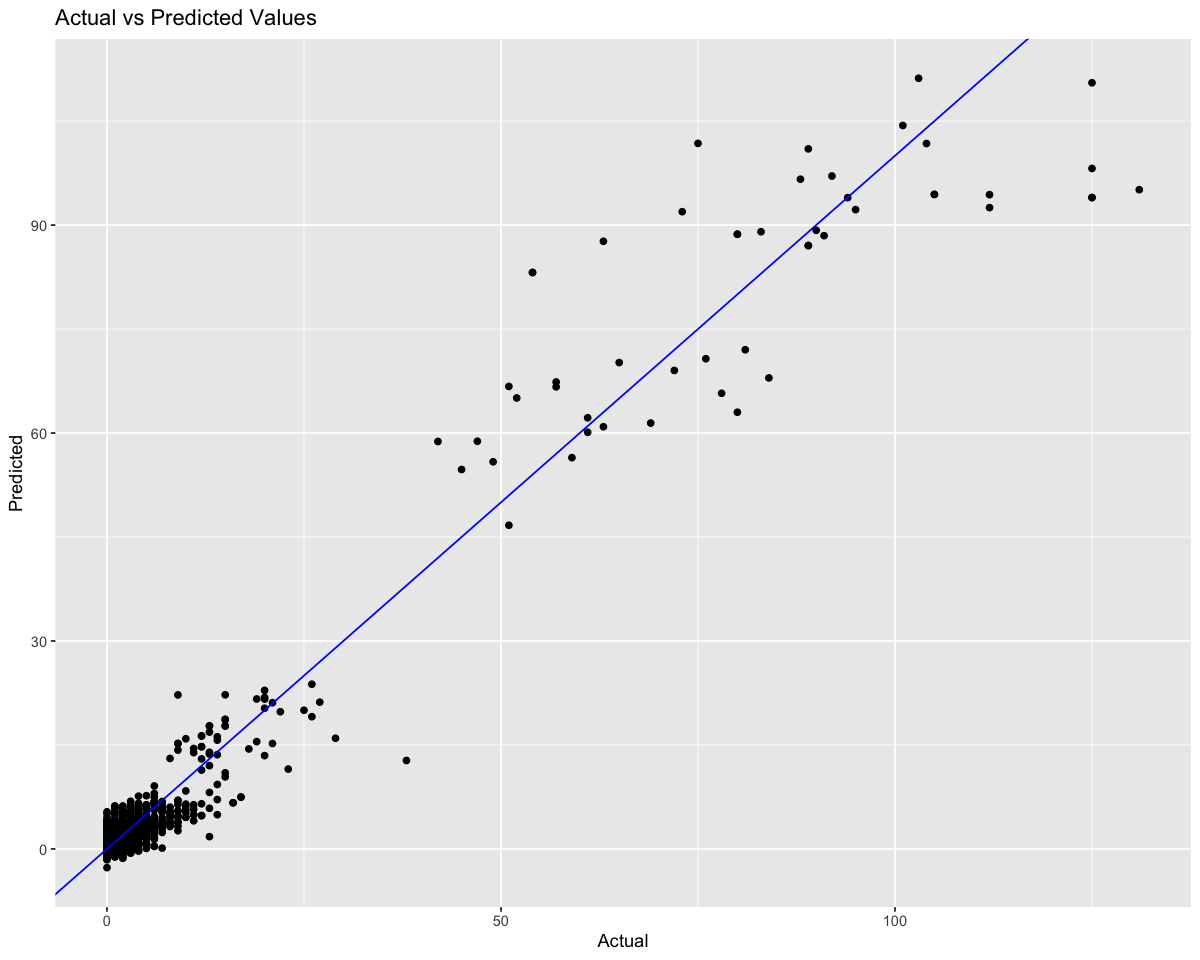

In [248]:
# Fit the linear regression model
model <- lm(homicide_conv ~ ., data = conv_crime_data)

# Predict the values
predictions <- predict(model, newdata = conv_crime_data)

# Create a data frame with actual and predicted values
predictions_df <- data.frame(Actual = conv_crime_data$homicide_conv, Predicted = predictions)

# Plot the actual vs predicted values
ggplot(predictions_df, aes(x = Actual, y = Predicted)) +
  geom_point() +
  geom_abline(color = "blue") +
  labs(x = "Actual", y = "Predicted", title = "Actual vs Predicted Values")

# Calculate MAE
mae <- Metrics::mae(predictions, conv_crime_data$homicide_conv)

# Calculate MSE
mse <- Metrics::mse(predictions, conv_crime_data$homicide_conv)

# Calculate RMSE
rmse <- Metrics::rmse(predictions, conv_crime_data$homicide_conv)

# Print the MAE, MSE, and RMSE
cat("MAE:", mae, "\n")
cat("MSE:", mse, "\n")
cat("RMSE:", rmse, "\n")

The model's performance was evaluated using three error metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). The MAE of 1.590419 indicates that, on average, the model's predictions deviate from the actual values by approximately 1.59 units. Similarly, the MSE of 8.850538 suggests that, on average, the squared errors between the predicted and actual values amount to approximately 8.85 units. The RMSE value of 2.974985, which is the square root of MSE, indicates that the model's predictions have an average error of around 2.97 units in the original scale of the data.

This code performs a linear regression analysis to predict the 'homicide_conv' variable based on the other variables in the dataset. Here's an explanation of the results obtained:

Actual vs Predicted Values Plot:
The plot shows the relationship between the actual values (x-axis) and the predicted values (y-axis).
Each point represents a data point in the dataset, indicating the actual value and the corresponding predicted value.
The blue line represents the fitted line, showing the overall trend of the predicted values compared to the actual values.
By visually comparing the points to the line, you can assess how well the model's predictions align with the actual values.

Mean Absolute Error (MAE):
MAE is a metric that measures the average absolute difference between the actual values and the predicted values.
In this case, it represents the average absolute deviation of the predicted 'homicide_conv' values from the actual 'homicide_conv' values.
The lower the MAE, the better the model's performance. A smaller MAE indicates that the model's predictions are closer to the actual values on average.
Mean Squared Error (MSE):

MSE is a metric that measures the average squared difference between the actual values and the predicted values.
It calculates the average of the squared deviations, giving higher weight to larger errors.
MSE is useful for assessing the spread of errors and penalizes larger errors more than MAE.
Similar to MAE, a lower MSE indicates better model performance. However, since it squares the errors, MSE values are generally larger than MAE values.
Root Mean Squared Error (RMSE):

RMSE is the square root of the MSE and provides a metric in the same unit as the dependent variable.
It is an absolute measure of the average magnitude of errors between the actual values and the predicted values.
Like MAE and MSE, a lower RMSE indicates better model performance. It signifies that the model's predictions have smaller average errors.


By examining the results, you can assess the effectiveness of the linear regression model in predicting the 'homicide_conv' variable. Lower values of MAE, MSE, and RMSE indicate that the model has a better fit to the data and produces more accurate predictions

### Fit the Linear Regression Model for Unsuccessful crimes

In [249]:
forregres_unsuccesful_crime_data <- unsuccesful_crime_data

In [250]:
head(forregres_unsuccesful_crime_data)

county            year quarter month region yearandmonth homicide_unsuc
1 National          2014 Q1 2014 jan   All    2014-01-01   11            
2 Avon and Somerset 2014 Q1 2014 jan   West   2014-01-01    0            
3 Bedfordshire      2014 Q1 2014 jan   East   2014-01-01    1            
4 Cambridgeshire    2014 Q1 2014 jan   East   2014-01-01    0            
5 Cheshire          2014 Q1 2014 jan   North  2014-01-01    0            
6 Cleveland         2014 Q1 2014 jan   North  2014-01-01    3            
  offences_against_the_person_unsuc sexual_offences_unsuc burglary_unsuc
1 2930                              286                   284           
2   62                               17                     1           
3   29                                1                     4           
4   21                                3                     4           
5   40                                1                     5           
6   44                                6                     2           
  robbery_unsuc theft_and_handling_unsuc fraud_and_forgery_unsuc
1 139           998                      137                    
2   0            32                        0                    
3   7             4                        3                    
4   4            15                        4                    
5   0             5                        1                    
6   2            31                        3                    
  criminal_damage_unsuc drugs_offences_unsuc public_order_offences_unsuc
1 472                   305                  797                        
2  14                     4                   28                        
3   8                     3                    9                        
4   3                     1                    2                        
5   3                     3                    8                        
6  13                     2                   27                        
  all_other_offences__excluding_motoring__unsuc motoring_offences_unsuc
1 586                                           1466                   
2   9                                             40                   
3   2                                             13                   
4   9                                             16                   
5   5                                             16                   
6  14                                             16                   
  admin_finalised_unsuc
1 890                  
2  20                  
3  12                  
4  14                  
5  13                  
6   3

Mean Absolute Error (MAE): 0.6220738 
Mean Squared Error (MSE): 1.369988 
Root Mean Squared Error (RMSE): 1.170465 


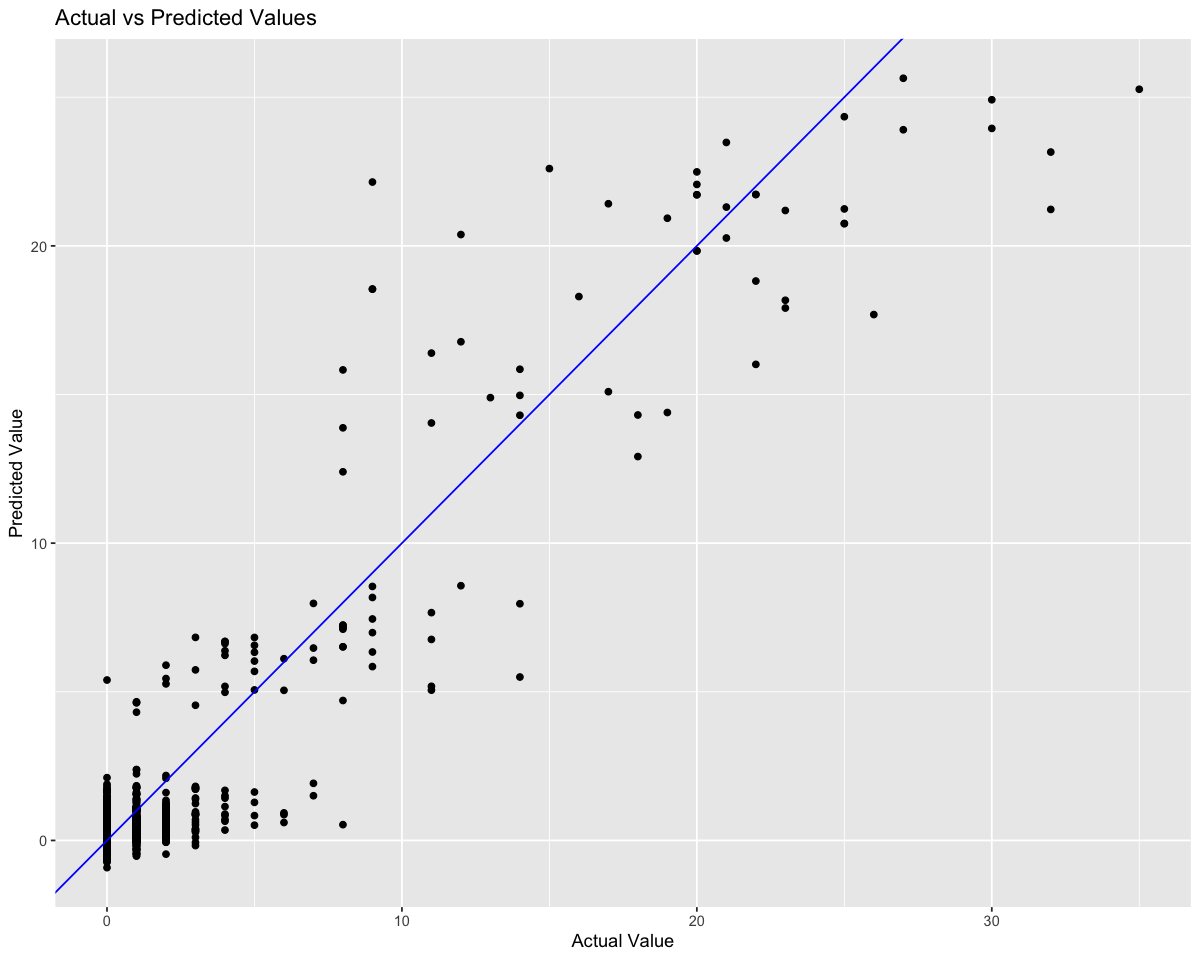

In [251]:
# Perform linear regression on unsuccessful_crime_data
model <- lm(homicide_unsuc ~ ., data = unsuccesful_crime_data)

# Get the predicted values
predicted <- predict(model)

# Create a data frame with actual and predicted values
results <- data.frame(Actual = unsuccesful_crime_data$homicide_unsuc, Predicted = predicted)

# Plot actual vs predicted values
library(ggplot2)
ggplot(results, aes(x = Actual, y = Predicted)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "blue") +
  labs(x = "Actual Value", y = "Predicted Value", title = "Actual vs Predicted Values")

# Calculate Mean Absolute Error (MAE)
MAE <- mean(abs(results$Actual - results$Predicted))

# Calculate Mean Squared Error (MSE)
MSE <- mean((results$Actual - results$Predicted)^2)

# Calculate Root Mean Squared Error (RMSE)
RMSE <- sqrt(MSE)

# Print the MAE, MSE, and RMSE
cat("Mean Absolute Error (MAE):", MAE, "\n")
cat("Mean Squared Error (MSE):", MSE, "\n")
cat("Root Mean Squared Error (RMSE):", RMSE, "\n")


The code performs linear regression analysis on the 'unsuccessful_crime_data' dataset and provides some evaluation metrics to assess the model's performance. Here's an explanation of the results:

Actual vs Predicted Values Plot:

The plot shows the relationship between the actual values and the predicted values obtained from the linear regression model.
Each point represents a data point where the x-coordinate represents the actual value and the y-coordinate represents the predicted value.
The blue line represents the ideal scenario where the predicted values perfectly match the actual values.

Mean Absolute Error (MAE):
The MAE is a metric that measures the average absolute difference between the actual values and the predicted values.
It provides a measure of how far, on average, the predicted values deviate from the actual values.
A lower MAE indicates better model performance.

Mean Squared Error (MSE):
The MSE is a metric that measures the average squared difference between the actual values and the predicted values.
It penalizes larger errors more than the MAE and provides a measure of the overall variance between the actual and predicted values.
A lower MSE indicates better model performance.
Root Mean Squared Error (RMSE):

The RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors in the predicted values.
It is in the same unit as the dependent variable and is easier to interpret than the MSE.
A lower RMSE indicates better model performance.
By examining these evaluation metrics, you can assess how well the linear regression model fits the data and makes predictions. Lower values for MAE, MSE, and RMSE indicate better performance, indicating that the model is accurately predicting the 'homicide_conv' variable based on the other predictors in the dataset.

To summarize, the model has an MAE of 0.6220738, an MSE of 1.369988, and an RMSE of 1.170465. Lower values for these metrics indicate better performance, implying that the model's predictions are generally close to the actual values.

## Linear Regression for `combined_cps_data`

In [252]:
pre_status_data <- combined_cps_data

In [253]:
# Create conviction_status column, set it to 1 if homicide_conv > 0, 0 otherwise 
pre_status_data$conviction_status <- ifelse(pre_status_data$homicide_conv > 0, 1, 0)

In [254]:
head(pre_status_data)

county            region year quarter month yearandmonth homicide_conv
173 National          All    2014 Q1 2014 jan   2014-01-01   51           
174 Avon and Somerset West   2014 Q1 2014 jan   2014-01-01    0           
175 Bedfordshire      East   2014 Q1 2014 jan   2014-01-01    0           
176 Cambridgeshire    East   2014 Q1 2014 jan   2014-01-01    0           
177 Cheshire          North  2014 Q1 2014 jan   2014-01-01    0           
178 Cleveland         North  2014 Q1 2014 jan   2014-01-01    2           
    homicide_unsuc offences_against_the_person_conv
173 11             9087                            
174  0              228                            
175  1               68                            
176  0              101                            
177  0              170                            
178  3              119                            
    offences_against_the_person_unsuc ... drugs_offences_conv
173 2930                              ... 4988               
174   62                              ...  148               
175   29                              ...   31               
176   21                              ...   47               
177   40                              ...   64               
178   44                              ...   65               
    drugs_offences_unsuc public_order_offences_conv public_order_offences_unsuc
173 305                  4752                       797                        
174   4                   123                        28                        
175   3                    30                         9                        
176   1                    37                         2                        
177   3                    77                         8                        
178   2                   123                        27                        
    all_other_offences__excluding_motoring__conv
173 3291                                        
174   63                                        
175   13                                        
176   28                                        
177   50                                        
178   34                                        
    all_other_offences__excluding_motoring__unsuc motoring_offences_conv
173 586                                           12945                 
174   9                                             256                 
175   2                                             171                 
176   9                                             103                 
177   5                                             264                 
178  14                                             228                 
    motoring_offences_unsuc admin_finalised_unsuc conviction_status
173 1466                    890                   1                
174   40                     20                   0                
175   13                     12                   0                
176   16                     14                   0                
177   16                     13                   0                
178   16                      3                   1

In [255]:
# Split the data into training and test sets
set.seed(123)  # Set a seed for reproducibility
train_indices <- sample.split(pre_status_data$conviction_status, SplitRatio = 0.7)
train_data <- pre_status_data[train_indices, ]
test_data <- pre_status_data[!train_indices, ]


# Fit the linear regression model
linear_model <- lm(conviction_status ~ ., data = train_data)

# Make predictions on the test set
predicted_values <- predict(linear_model, newdata = test_data)

# Convert predicted values to binary classes
predicted_classes <- ifelse(predicted_values >= 0.5, 1, 0)

# Calculate accuracy
accuracy <- sum(predicted_classes == test_data$conviction_status) / length(test_data$conviction_status)

# Calculate evaluation metrics
mae <- mae(test_data$conviction_status, predicted_values)
mse <- mse(test_data$conviction_status, predicted_values)
rmse <- rmse(test_data$conviction_status, predicted_values)

# Print the evaluation metrics and accuracy
cat("Mean Absolute Error (MAE):", mae, "\n")
cat("Mean Squared Error (MSE):", mse, "\n")
cat("Root Mean Squared Error (RMSE):", rmse, "\n")
cat("Accuracy:", accuracy, "\n")



Mean Absolute Error (MAE): 0.3492691 
Mean Squared Error (MSE): 0.1674913 
Root Mean Squared Error (RMSE): 0.409257 
Accuracy: 0.7503876 


## Clustering Technique

### K-Means Clustering

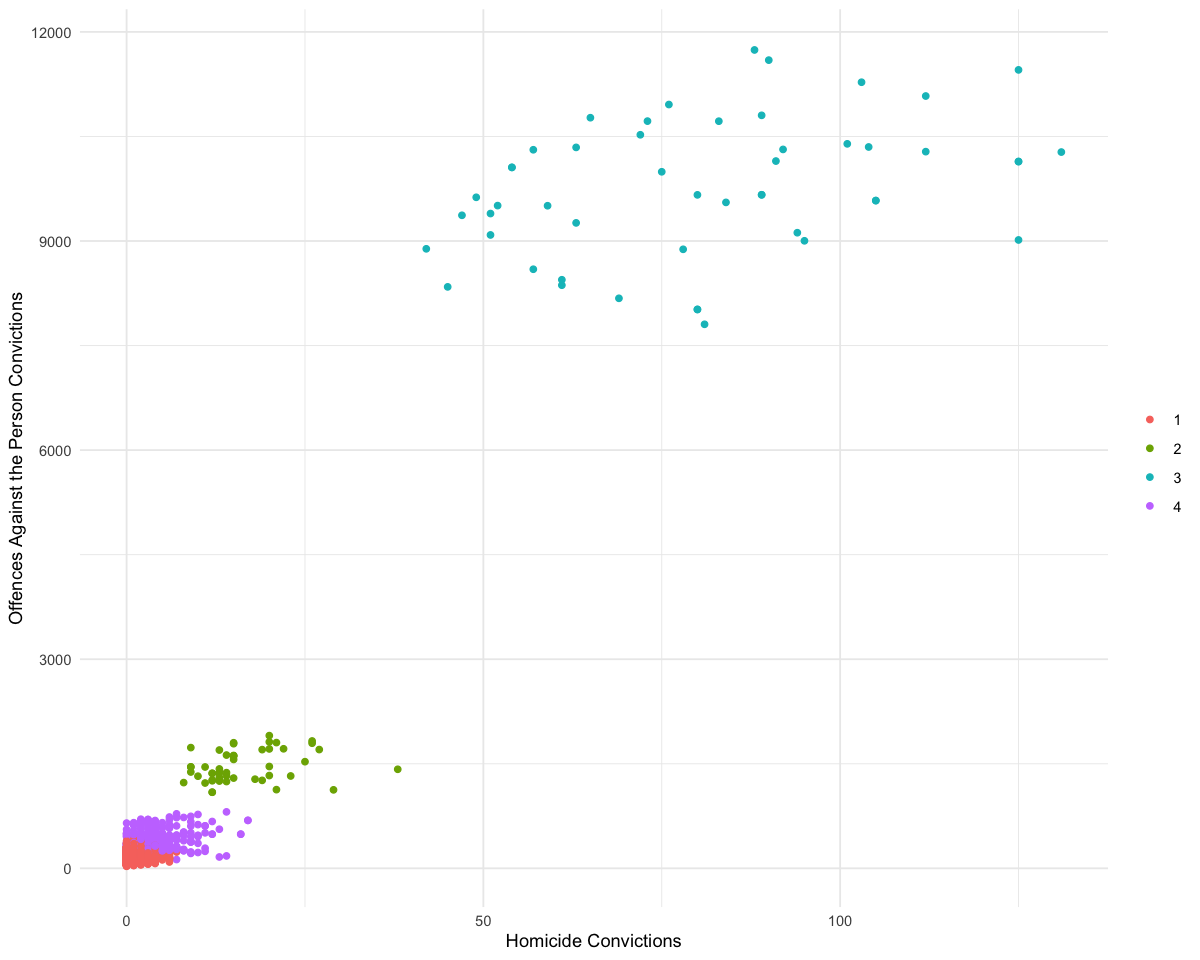

In [256]:
# Select the columns for clustering
crime_datas <- combined_cps_data %>%
  select(county, region, homicide_conv, offences_against_the_person_conv, criminal_damage_conv, all_other_offences__excluding_motoring__conv,
  burglary_conv, fraud_and_forgery_conv, motoring_offences_conv, robbery_conv, sexual_offences_conv, theft_and_handling_conv)

# Remove missing values if any
crime_datas <- na.omit(crime_datas)

# Scale the numerical variables
scaled_data <- scale(crime_datas[, -c(1, 2)])

# Perform K-means clustering
k <- 4  # Number of clusters
kmeans_result <- kmeans(scaled_data, centers = k, nstart = 25)

# Add cluster labels to the original dataset
clustered_data <- crime_datas %>%
  mutate(cluster = as.factor(kmeans_result$cluster))

# Plot the clusters
ggplot(clustered_data, aes(x = homicide_conv, y = offences_against_the_person_conv, color = cluster)) +
  geom_point() +
  labs(x = "Homicide Convictions", y = "Offences Against the Person Convictions", color = "Cluster", size = "All other offences excluding Motoring Convictions") +
  theme_minimal() +
  theme(legend.position = "right", legend.title = element_blank())


In [257]:
#remove non-numerical columns in the dataframe
remo_non_num_cols <- function(dataframe) {
  dataframe <- dataframe %>%
    select(-c(county, year, month, region, yearandmonth, quarter))
  return(dataframe)
}

In [258]:
#scale the dataframe and perform kmeans clustering with the specified number of clusters and number of iterations

kmeans_clustg <- function(dataframe, clusters) {
  scaled_dataframe <- scale(dataframe)
  model <- kmeans(scaled_dataframe, centers = clusters, nstart = 25)
  return(model)
}

### Clustering for Conviction Crime Data

In [259]:

km_clustg_data = remo_non_num_cols(conv_crime_data)

In [260]:

summary(km_clustg_data)

 homicide_conv     offences_against_the_person_conv sexual_offences_conv
 Min.   :  0.000   Min.   :   29.0                  Min.   :   0.00     
 1st Qu.:  0.000   1st Qu.:  115.0                  1st Qu.:   8.00     
 Median :  1.000   Median :  178.0                  Median :  15.00     
 Mean   :  3.769   Mean   :  454.5                  Mean   :  43.76     
 3rd Qu.:  3.000   3rd Qu.:  272.0                  3rd Qu.:  29.00     
 Max.   :131.000   Max.   :11741.0                  Max.   :1179.00     
 burglary_conv      robbery_conv    theft_and_handling_conv
 Min.   :   1.00   Min.   :  0.00   Min.   :   13.0        
 1st Qu.:  14.00   1st Qu.:  2.00   1st Qu.:   96.0        
 Median :  23.00   Median :  5.00   Median :  147.5        
 Mean   :  60.18   Mean   : 19.38   Mean   :  374.5        
 3rd Qu.:  38.00   3rd Qu.: 10.00   3rd Qu.:  239.8        
 Max.   :1715.00   Max.   :650.00   Max.   :11057.0        
 fraud_and_forgery_conv criminal_damage_conv drugs_offences_conv
 Min

In [261]:
#using 4 clusters
kmodels = kmeans_clustg(km_clustg_data, 4)

In [262]:
summary(kmodels)

             Length Class  Mode   
cluster      2150   -none- numeric
centers        48   -none- numeric
totss           1   -none- numeric
withinss        4   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            4   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

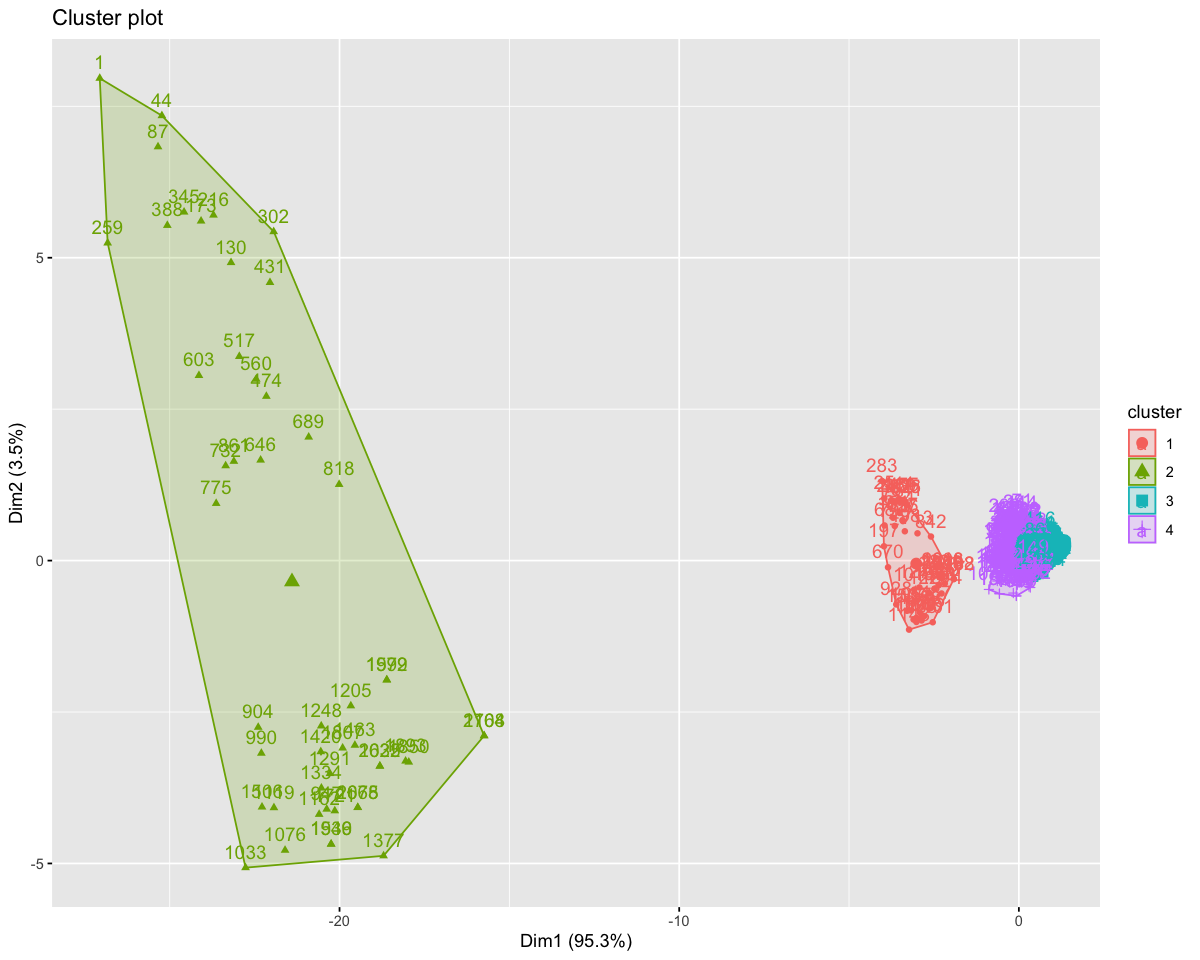

In [263]:
fviz_cluster(kmodels, data = km_clustg_data)

### Clustering for Unsuccesful Convictions

In [264]:
km_clustg_data_unsuc = remo_non_num_cols(unsuccesful_crime_data)

In [265]:
summary(km_clustg_data_unsuc)

 homicide_unsuc    offences_against_the_person_unsuc sexual_offences_unsuc
 Min.   : 0.0000   Min.   :   5.0                    Min.   :  0.0        
 1st Qu.: 0.0000   1st Qu.:  27.0                    1st Qu.:  2.0        
 Median : 0.0000   Median :  46.0                    Median :  4.0        
 Mean   : 0.9023   Mean   : 135.5                    Mean   : 16.2        
 3rd Qu.: 1.0000   3rd Qu.:  77.0                    3rd Qu.: 11.0        
 Max.   :35.0000   Max.   :3568.0                    Max.   :489.0        
 burglary_unsuc  robbery_unsuc     theft_and_handling_unsuc
 Min.   :  0.0   Min.   :  0.000   Min.   :   0.00         
 1st Qu.:  1.0   1st Qu.:  0.000   1st Qu.:   6.00         
 Median :  3.0   Median :  1.000   Median :  11.00         
 Mean   : 10.2   Mean   :  5.193   Mean   :  33.62         
 3rd Qu.:  6.0   3rd Qu.:  3.000   3rd Qu.:  19.00         
 Max.   :317.0   Max.   :188.000   Max.   :1025.00         
 fraud_and_forgery_unsuc criminal_damage_unsuc drugs_of

In [266]:
#using 4 clusters
kmodels_unsuc = kmeans_clustg(km_clustg_data_unsuc, 4)

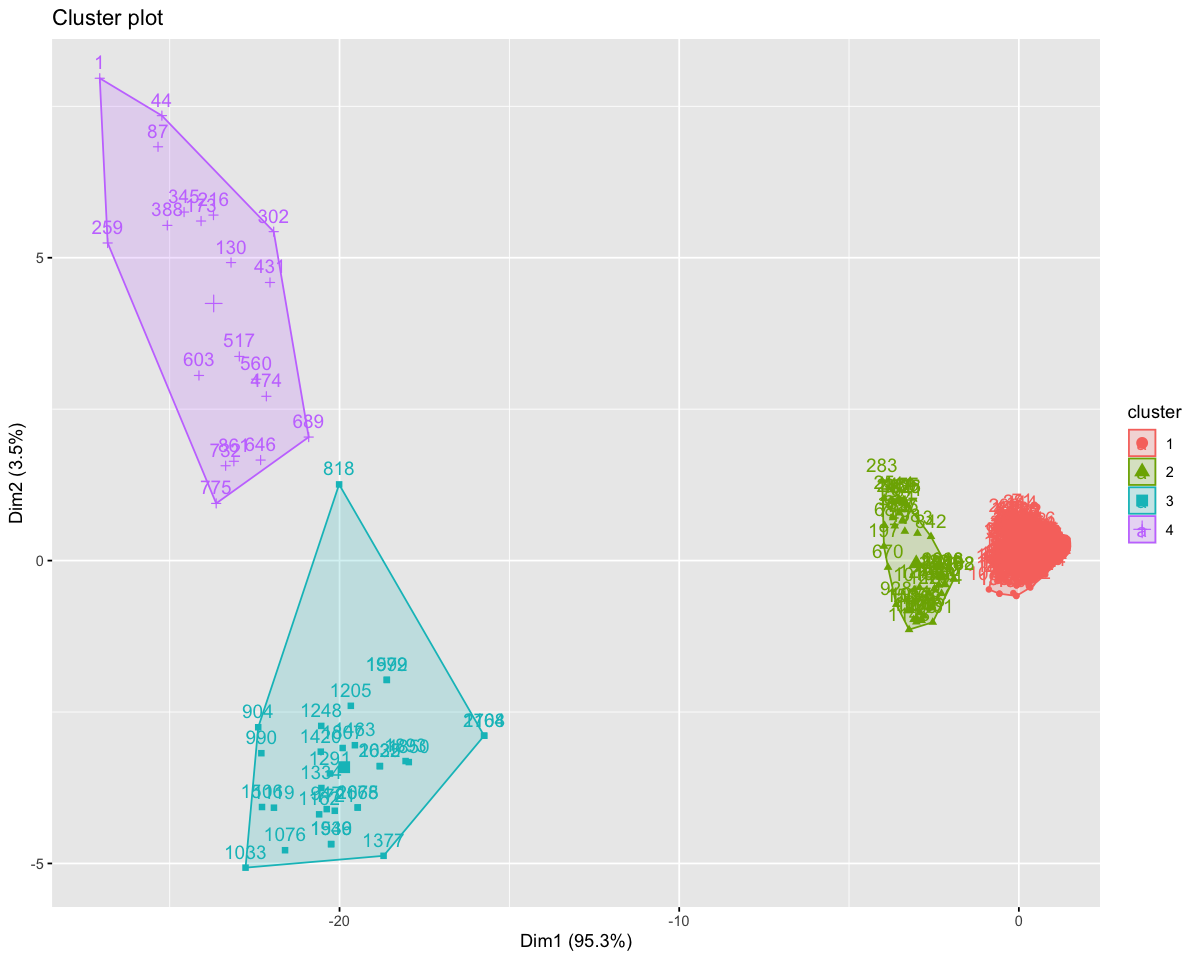

In [267]:
fviz_cluster(kmodels_unsuc, data = km_clustg_data)

In [268]:
#create a new variable called pre_status and set it to the combined_cps_data
pre_status <- combined_cps_data

## Hierarchical Clustering

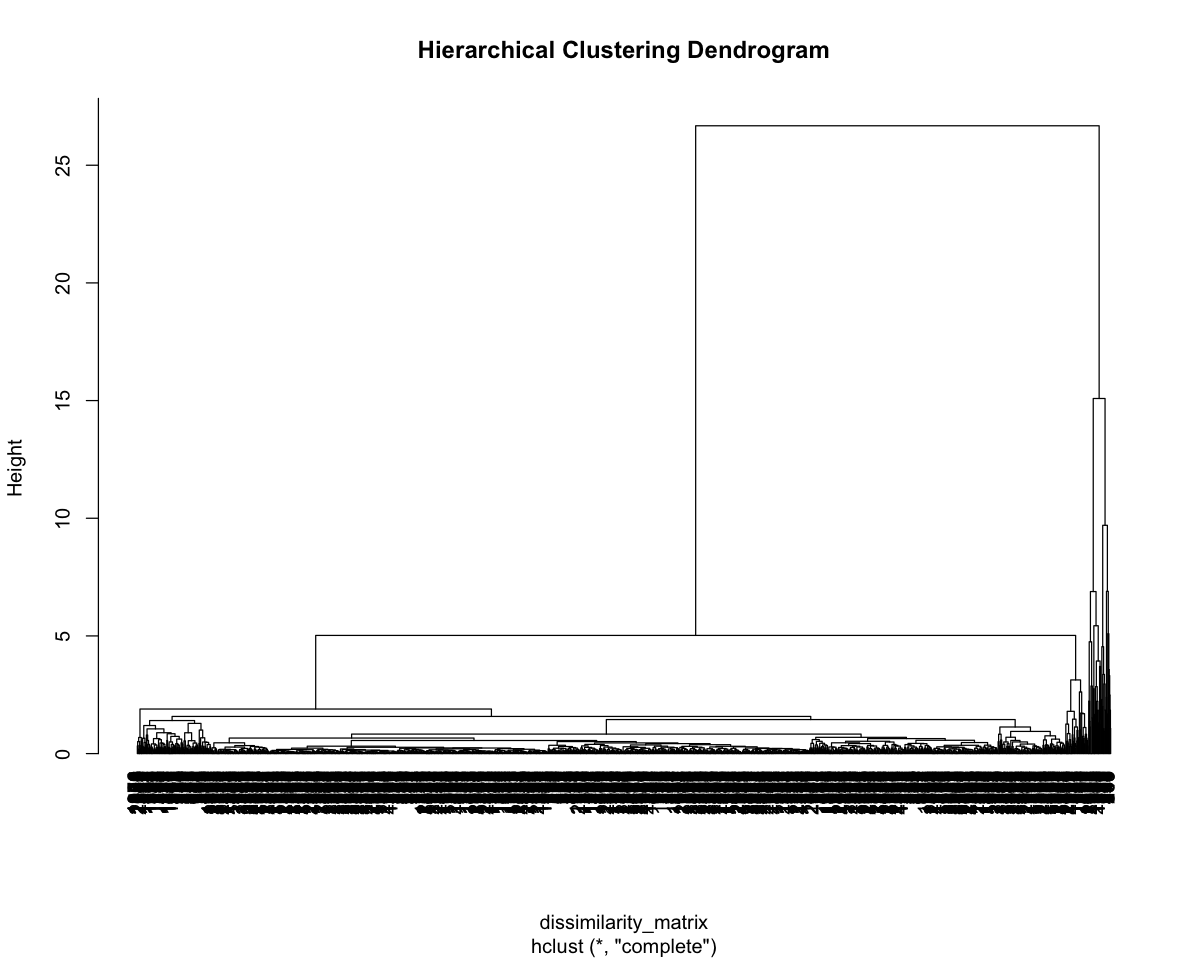

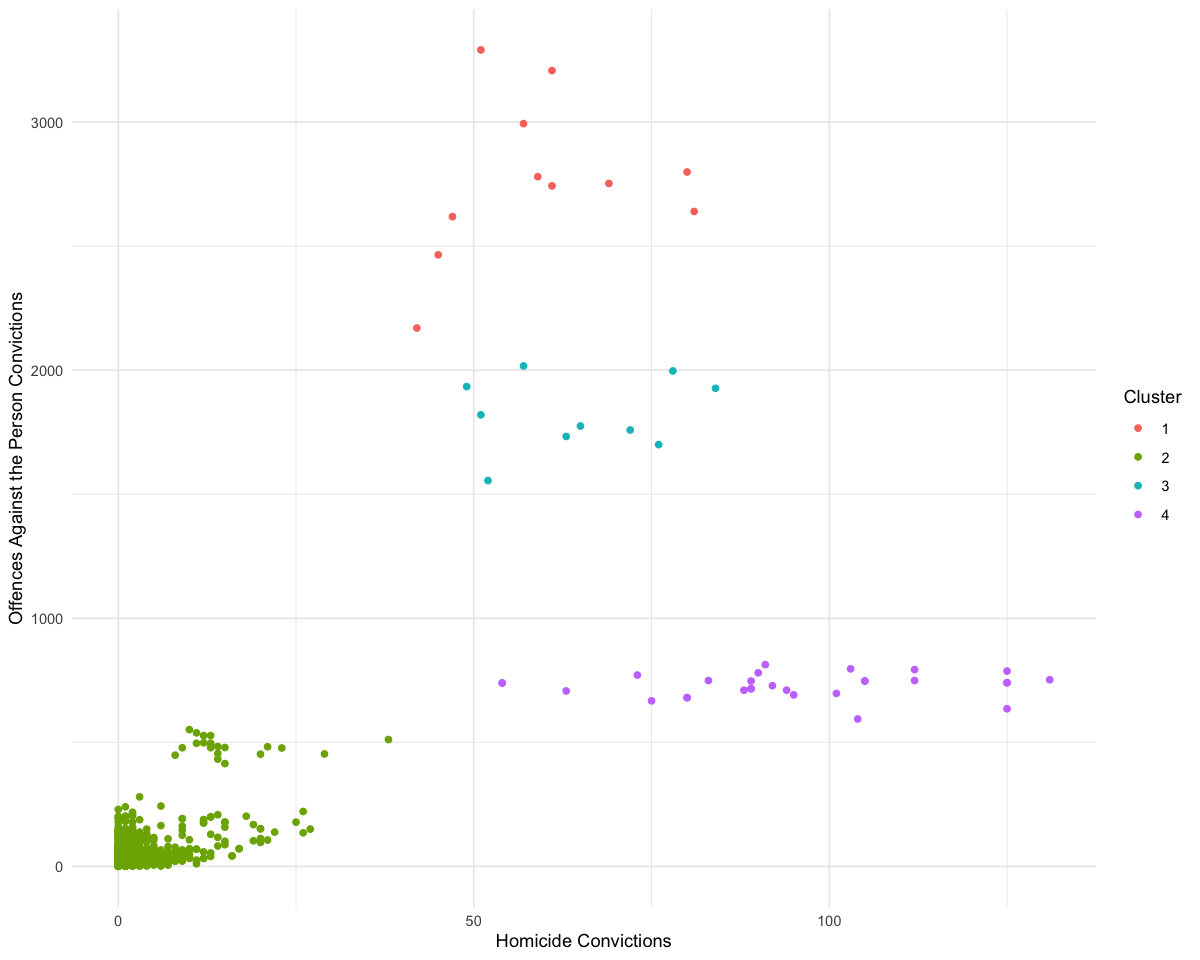

In [269]:
# Select the columns for clustering
crime_datas_Hclus <- combined_cps_data %>%
  select(county, region, homicide_conv, offences_against_the_person_conv, criminal_damage_conv, all_other_offences__excluding_motoring__conv,
  burglary_conv, fraud_and_forgery_conv, motoring_offences_conv, robbery_conv, sexual_offences_conv, theft_and_handling_conv)

# Remove missing values if any
crime_datas_Hclus <- na.omit(crime_datas_Hclus)

# Scale the numerical variables
scaled_data <- scale(crime_datas_Hclus[, -c(1, 2)])

# Compute the dissimilarity matrix using Euclidean distance
dissimilarity_matrix <- dist(scaled_data)

# Apply hierarchical clustering using complete linkage
hierarchical_clusters <- hclust(dissimilarity_matrix, method = "complete")

# Plot the dendrogram
plot(hierarchical_clusters, hang = -1, main = "Hierarchical Clustering Dendrogram")

# Cut the dendrogram to obtain clusters
k <- 4  # Number of clusters
clusters <- cutree(hierarchical_clusters, k = k)

# Add cluster labels to the original dataset
clustered_data <- crime_datas_Hclus %>%
  mutate(cluster = as.factor(clusters))

# Plot the clusters
ggplot(clustered_data, aes(x = homicide_conv, y = all_other_offences__excluding_motoring__conv, color = cluster)) +
  geom_point() +
  labs(x = "Homicide Convictions", y = "Offences Against the Person Convictions", color = "Cluster") +
  theme_minimal()

## Classification Techniques

### Logistic Regression Model on `combined_cps_data`

In [270]:
#create a new variable called pre_status and set it to the combined_cps_data
pre_status <- combined_cps_data

In [271]:
# Create conviction_status column, set it to 1 if homicide_conv > 0, 0 otherwise 
pre_status$conviction_status <- ifelse(pre_status$homicide_conv > 0, 1, 0)

In [272]:
evaluateLogisticRegression <- function(data, splitRatio = 0.7, maxit = NULL) {
  set.seed(123)  # Set a seed for reproducibility
  
  # Split the data into training and test sets
  train_indices <- sample.split(data$conviction_status, SplitRatio = splitRatio)
  train_data <- data[train_indices, ]
  test_data <- data[!train_indices, ]
  
  # Fit the logistic regression model with default or specified hyperparameter settings
  if (is.null(maxit)) {
    logistic_model <- glm(conviction_status ~ ., data = train_data, family = "binomial")
  } else {
    logistic_model <- glm(conviction_status ~ ., data = train_data, family = "binomial", maxit = maxit)
  }
  
  # Make predictions on the test set
  predicted_probs <- predict(logistic_model, newdata = test_data, type = "response")
  predicted_classes <- ifelse(predicted_probs >= 0.5, 1, 0)
  
  # Calculate evaluation metrics
  mae <- mae(test_data$conviction_status, predicted_classes)
  mse <- mse(test_data$conviction_status, predicted_classes)
  rmse <- rmse(test_data$conviction_status, predicted_classes)
  accuracy <- mean(test_data$conviction_status == predicted_classes)
  
  # Print the evaluation metrics
  cat("Mean Absolute Error (MAE):", mae, "\n")
  cat("Mean Squared Error (MSE):", mse, "\n")
  cat("Root Mean Squared Error (RMSE):", rmse, "\n")
  cat("Accuracy:", accuracy, "\n")

  # Plot the confusion matrix
# Calculate the confusion matrix
  confusion_matrix <- caret::confusionMatrix(as.factor(predicted_classes), as.factor(test_data$conviction_status))
  
  # Plot the confusion matrix as a heatmap
  ggplot(confusion_matrix$table, aes(x = Reference, y = Prediction, fill = log(Freq + 1))) +
    geom_tile() +
    geom_text(aes(label = Freq), color = "white", size = 4) +
    scale_fill_gradient(low = "white", high = "steelblue") +
    labs(x = "Reference", y = "Prediction") +
    theme_minimal() +
    ggtitle("Confusion Matrix Heatmap")

}

Mean Absolute Error (MAE): 0.2620155 
Mean Squared Error (MSE): 0.2620155 
Root Mean Squared Error (RMSE): 0.5118745 
Accuracy: 0.7379845 


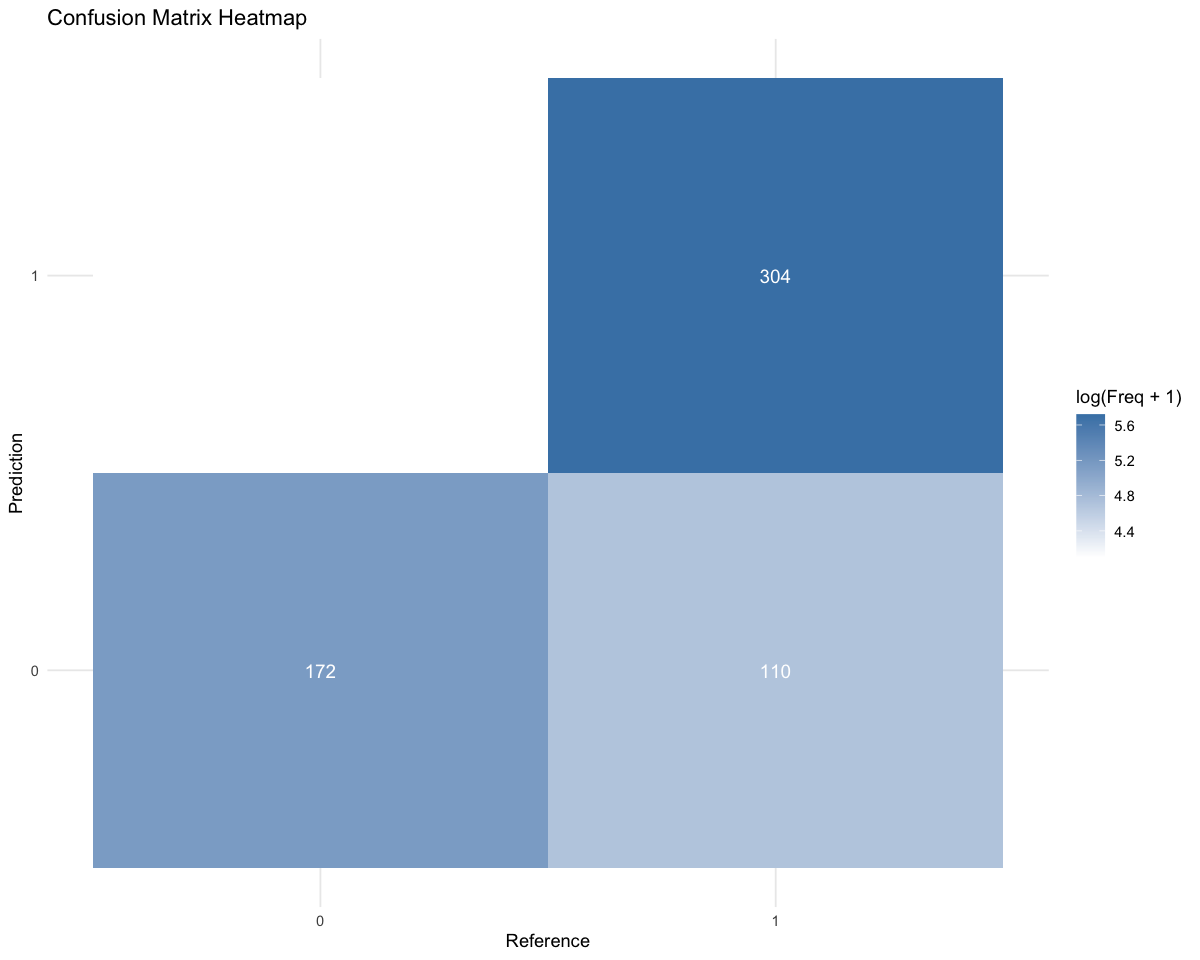

In [273]:
evaluateLogisticRegression(pre_status, splitRatio = 0.7, maxit = NULL)

The model evaluation metrics provide information about the performance of the logistic regression model on the test dataset. Here's the interpretation of the metrics:

In this case, the MAE value of 0.2620155 suggests that, on average, the model's predictions differ from the actual values by approximately 0.26. This indicates that the model's predictions have a moderate level of error.

The MSE value of 0.2620155 implies that, on average, the squared differences between the predicted and actual values are approximately 0.26. It provides a measure of the average squared error of the model's predictions.

The RMSE value of 0.5118745 suggests that, on average, the model's predictions deviate from the actual values by approximately 0.51. It provides a similar measure of error as the MAE but is more sensitive to larger errors.

In summary, the evaluation metrics indicate that the logistic regression model has some level of prediction error, with the MAE, MSE, and RMSE values indicating a moderate level of deviation between the predicted and actual values.

### Random Forest Technique

In [274]:
#create a new variable called pre_status and set it to the combined_cps_data
pre_status_rand <- combined_cps_data
# Create conviction_status column, set it to 1 if homicide_conv > 0, 0 otherwise 
pre_status_rand$conviction_status <- ifelse(pre_status$homicide_conv > 0, 1, 0)

In [275]:
#create a new variable called pre_status and set it to the combined_cps_data
pre_status <- combined_cps_data

In [276]:
# Create conviction_status column, set it to 1 if homicide_conv > 0, 0 otherwise 
pre_status$conviction_status <- ifelse(pre_status$homicide_conv > 0, 1, 0)

In [277]:
# Prepare the data
# Split the data into training and testing sets (same as above)

set.seed(123)
train_indices <- sample.split(pre_status_rand$conviction_status, SplitRatio = 0.7)
train_data <- pre_status_rand[train_indices, ]
test_data <- pre_status_rand[!train_indices, ]
# Fit the random forest model
random_forest_model <- randomForest(conviction_status ~ ., data = train_data)
# Make predictions on the test set
predicted_classes_rf <- predict(random_forest_model, newdata = test_data)

# Calculate evaluation metrics
mae <- mae(test_data$conviction_status, predicted_classes)
mse <- mse(test_data$conviction_status, predicted_classes)
rmse <- rmse(test_data$conviction_status, predicted_classes)
accuracy <- mean(test_data$conviction_status == predicted_classes)

# Print the evaluation metrics
cat("Mean Absolute Error (MAE):", mae, "\n")
cat("Mean Squared Error (MSE):", mse, "\n")
cat("Root Mean Squared Error (RMSE):", rmse, "\n")

Mean Absolute Error (MAE): 0.2496124 
Mean Squared Error (MSE): 0.2496124 
Root Mean Squared Error (RMSE): 0.4996123 
